# **Introduction**

La maladie de Parkinson (MP) est un trouble neurologique progressif qui affecte le mouvement et peut provoquer des tremblements, une raideur et des difficultés d'équilibre et de coordination. La détection précoce et le diagnostic précis de la MP sont cruciaux pour une prise en charge et un traitement efficaces de la maladie. Ces dernières années, les progrès des techniques d'apprentissage automatique se sont révélés prometteurs pour faciliter le diagnostic de la MP à l'aide de mesures vocales biomédicales.

Dans ce projet, nous visons à utiliser divers algorithmes d'apprentissage automatique, notamment les k-Nearest Neighbours (KNN), la régression logistique, le classificateur Naive Bayes et les réseaux de neurones pour analyser un ensemble de données comprenant des mesures vocales biomédicales. L'objectif principal de cette étude est de développer des modèles de classification robustes capables de faire la distinction entre les individus en bonne santé et ceux atteints de la maladie de Parkinson sur la base des mesures vocales fournies.

# **Prétraitement des données**

Dans le cadre de ce rapport, il est impératif de souligner l’importance de procéder à une analyse de données préalable. L’analyse de données constitue une étape essentielle pour obtenir une compréhension approfondie des informations disponibles et pour prendre des décisions éclairées. Notre base de données est composée de ces colonnes :

• nom - nom du sujet ASCII et numéro d’enregistrement
• MDVP
(Hz) - Fréquence fondamentale vocale moyenne
• MDVP
(Hz) - Fréquence fondamentale vocale maximale
• MDVP
(Hz) - Fréquence fondamentale vocale minimale
• MDVP
(%) - Mesure de la variation de la fréquence fondamentale (%)
• MDVP
(Abs) - Mesure de la variation de la fréquence fondamentale (absolue)
• MDVP
- Mesure de la périodicité de la fréquence fondamentale
• MDVP
- Mesure de la variation de la fréquence fondamentale (PPQ)
• Gigue
- Mesure de la variation de la fréquence fondamentale (DDP)
• MDVP
- Mesure de la variation d'amplitude (Shimmer)
• MDVP
(dB) - Mesure de la variation d'amplitude (Shimmer en dB)
• Shimmer
- Mesure de la variation d'amplitude (APQ3)
• Shimmer
- Mesure de la variation d'amplitude (APQ5)
• MDVP
- Mesure de la variation d'amplitude (APQ)
• Shimmer
- Mesure de la variation d'amplitude (DDA)
• NHR - Mesure du rapport entre le bruit et les composantes tonales de la voix
• HNR - Mesure du rapport signal sur bruit
• statut - État de santé du sujet (1 pour Parkinson, 0 pour bonne santé)
• RPDE - Mesure de complexité dynamique non linéaire
• D2 - Autre mesure de complexité dynamique non linéaire
• DFA - Exposant de mise à l’échelle fractale du signal
• spread1, spread2, PPE - Trois mesures non linéaires de la variation de fréquence fondamentale.

Pour mieux comprendre la structure de notre jeu de données, nous verrons d’abord le type de chaque variable avec la commande info(). Nous avons que toutes les variables sont des variables numériques sauf pour 'noms'. Notre cible, qui est 'statut', est un entier composé de 0 et 1 (puisqu’elle est binaire), et les autres sont des floats."

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt



In [ ]:
import pandas as pd

# Lire le fichier avec pandas
df = pd.read_csv('/content/drive/MyDrive/parkinsons/parkinsons.data')

# Afficher les premières lignes du DataFrame
print(df.head())

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
df.shape

(195, 24)

### **Attribut cible**

In [ ]:
y=df["status"]


In [ ]:
y.value_counts()

status
1    147
0     48
Name: count, dtype: int64

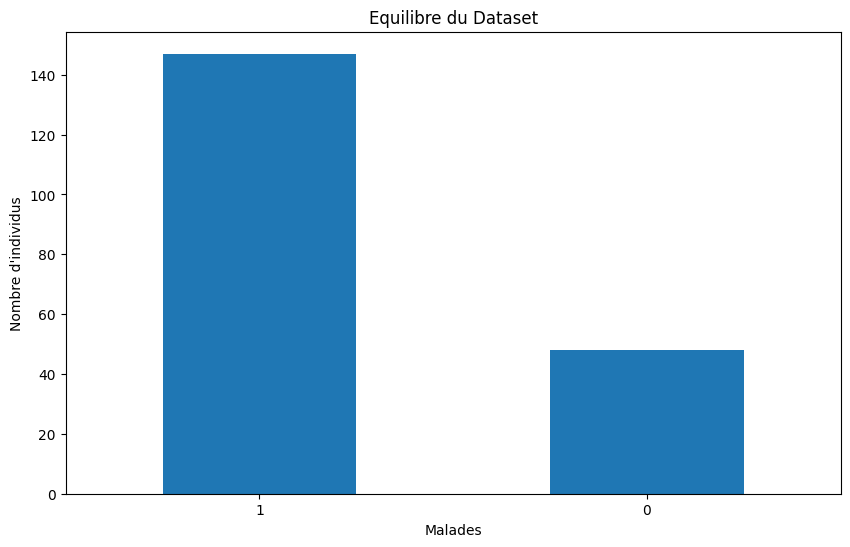

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
y.value_counts().plot(kind='bar')
plt.title("Equilibre du Dataset")
plt.xlabel("Malades")
plt.ylabel('Nombre d\'individus')
plt.xticks(rotation=0)
plt.show()

 Il y a donc une sur-représentation des malades en comparaison de ceux qui
 ne le sont pas. La m´ethode la plus utilisée dans ce cas serait l’oversampling,
 autrement dit une cr´eation artificielle d’individus dans la classe minoritaire.
 Une des techniques d’oversampling, le SMOTE, consiste `a choisir K voisins et
 à prendre une combinaison linéaire des caractéristiques de la classe minoritaire
 pour créer un nouvel individu. Ce procédé se répète jusqu’à obtenir une data
 ´equilibrée. Cependant, nous avons fait le choix de garder ce déséquilibre pour
 savoir si cela nous permet quand meme d’obtenir des résultats précis.

### **Séléction des attributs**

In [ ]:
X=df.drop(columns=['status','name'])

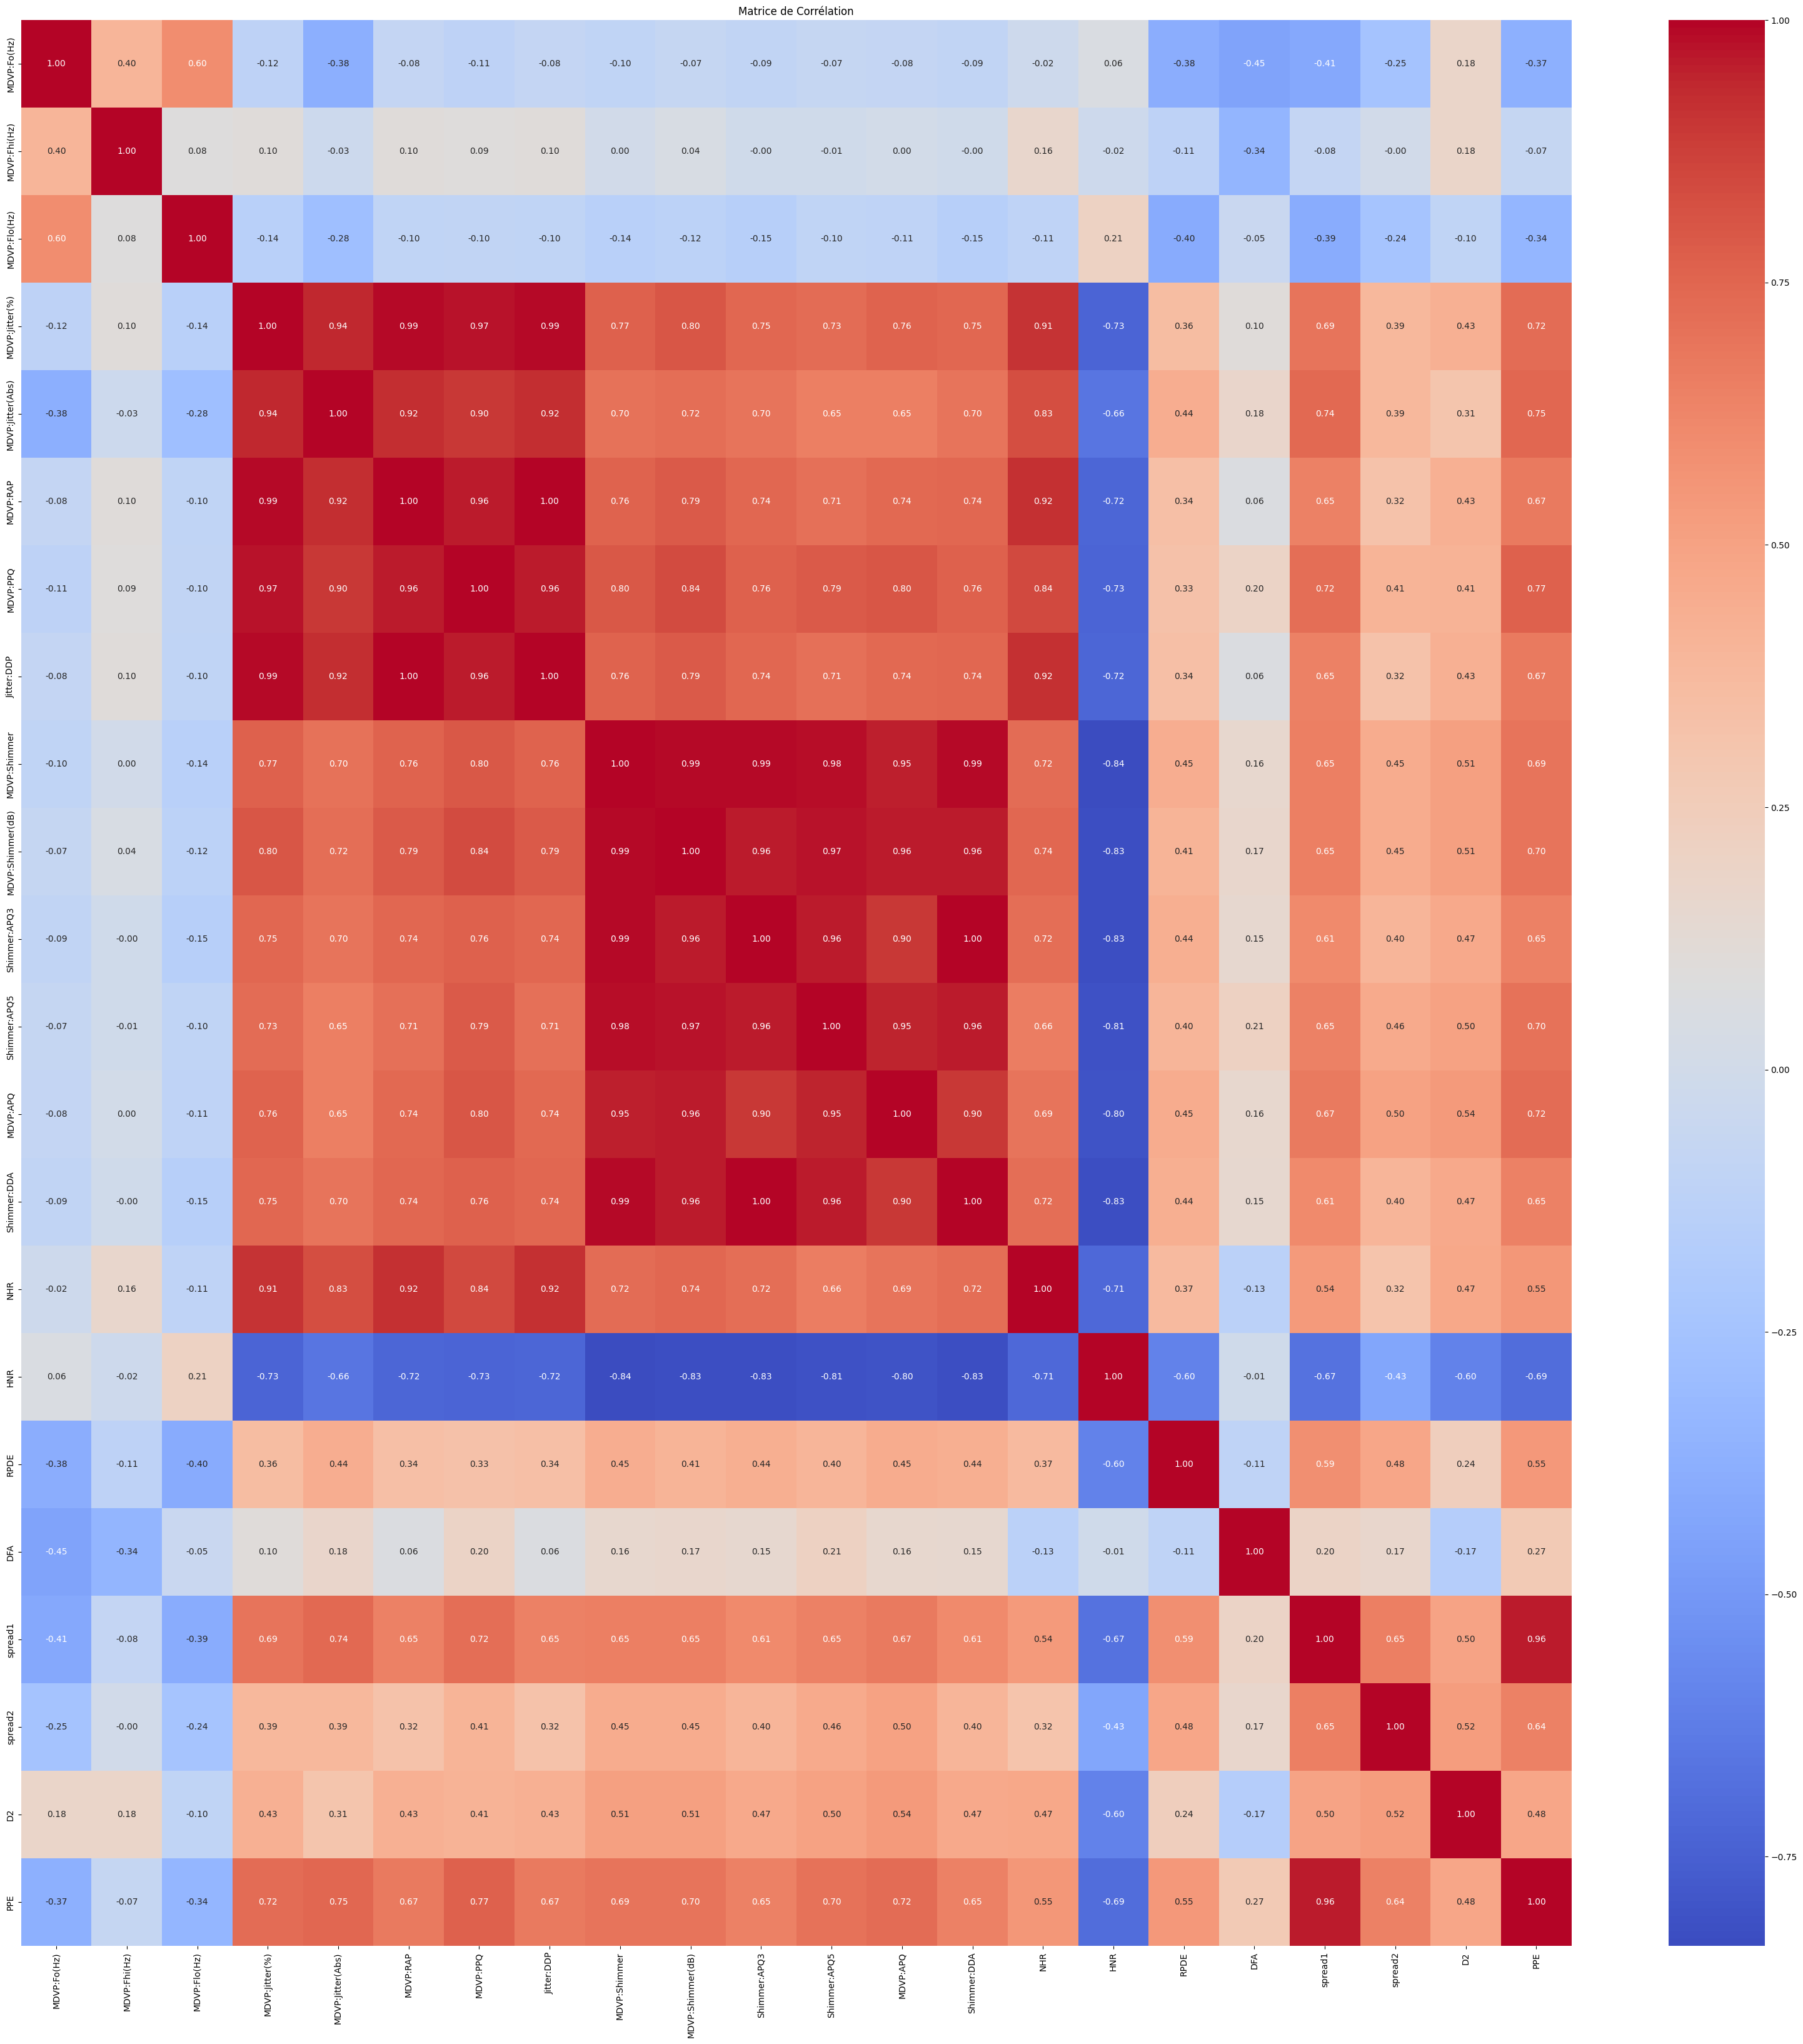

In [ ]:
import seaborn as sns
matrice_correlation=X.corr()
plt.figure(figsize=(40, 40))
sns.heatmap(matrice_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation")
plt.show()

Cette matrice nous permet de voir qu’il y a beaucoup de variables fortement
 corrélées. Les retirer diminuerait des redondances tout en diminuant le risque de
 sur-apprentissage en raison d’un nombre moindre d’attributs. De plus, pour des
 modèles d’apprentissage tel que le Naive Bayesian Classifier, l’hypothèse naive
 est l’independance conditionnelle des attributs. Une forte corrélation implique
 généralement une forte dépendance, c’est donc également pour cette raison que
 nous les retirons.

 Nous décidons qu’un attribut est fortement corrélé à un autre si leur correlation est supérieure à 0.65

  Nous mettons les groupes d’attributs corrélés entre eux dans une liste, et
 nous choisissons l’attribut `a garder en fonction de son coefficient de Ridge.


In [ ]:
from sklearn.linear_model import Ridge
import numpy as np
matrice_correlation=matrice_correlation.abs()
groupes_correles = []
def into(x,list):
    for k in list:
        if x in k:
            return True
    return False
for colonne in matrice_correlation.columns:
    if not into(colonne,groupes_correles):
        groupe_correle = {colonne}
        for autre_colonne in matrice_correlation.columns:
            if colonne != autre_colonne and matrice_correlation[colonne][autre_colonne] > 0.65:
                groupe_correle.add(autre_colonne)
        if len(groupe_correle) > 1:
            groupes_correles.append(groupe_correle)

groupes_finaux = []
for groupe in groupes_correles:
    if groupe not in groupes_finaux:
        groupes_finaux.append(groupe)


model = Ridge(alpha=1)
for groupe in groupes_finaux:
    print(groupes_finaux)
    X0 = df[list(groupe)]  # Convertir l'ensemble en liste pour l'accès aux colonnes du dataframe
    y0 = df[list(groupe)[0]]
    model.fit(X0, y0)
    coefficients = model.coef_
    attribut_principal = list(groupe)[np.abs(coefficients).argmax()]
    groupe.remove(attribut_principal)
    for l in groupe:
        try:
            X = X.drop(columns=[l])
        except KeyError:
            print("Certaines colonnes n'existent pas dans le DataFrame X.")


La nouvelle matrice devient :

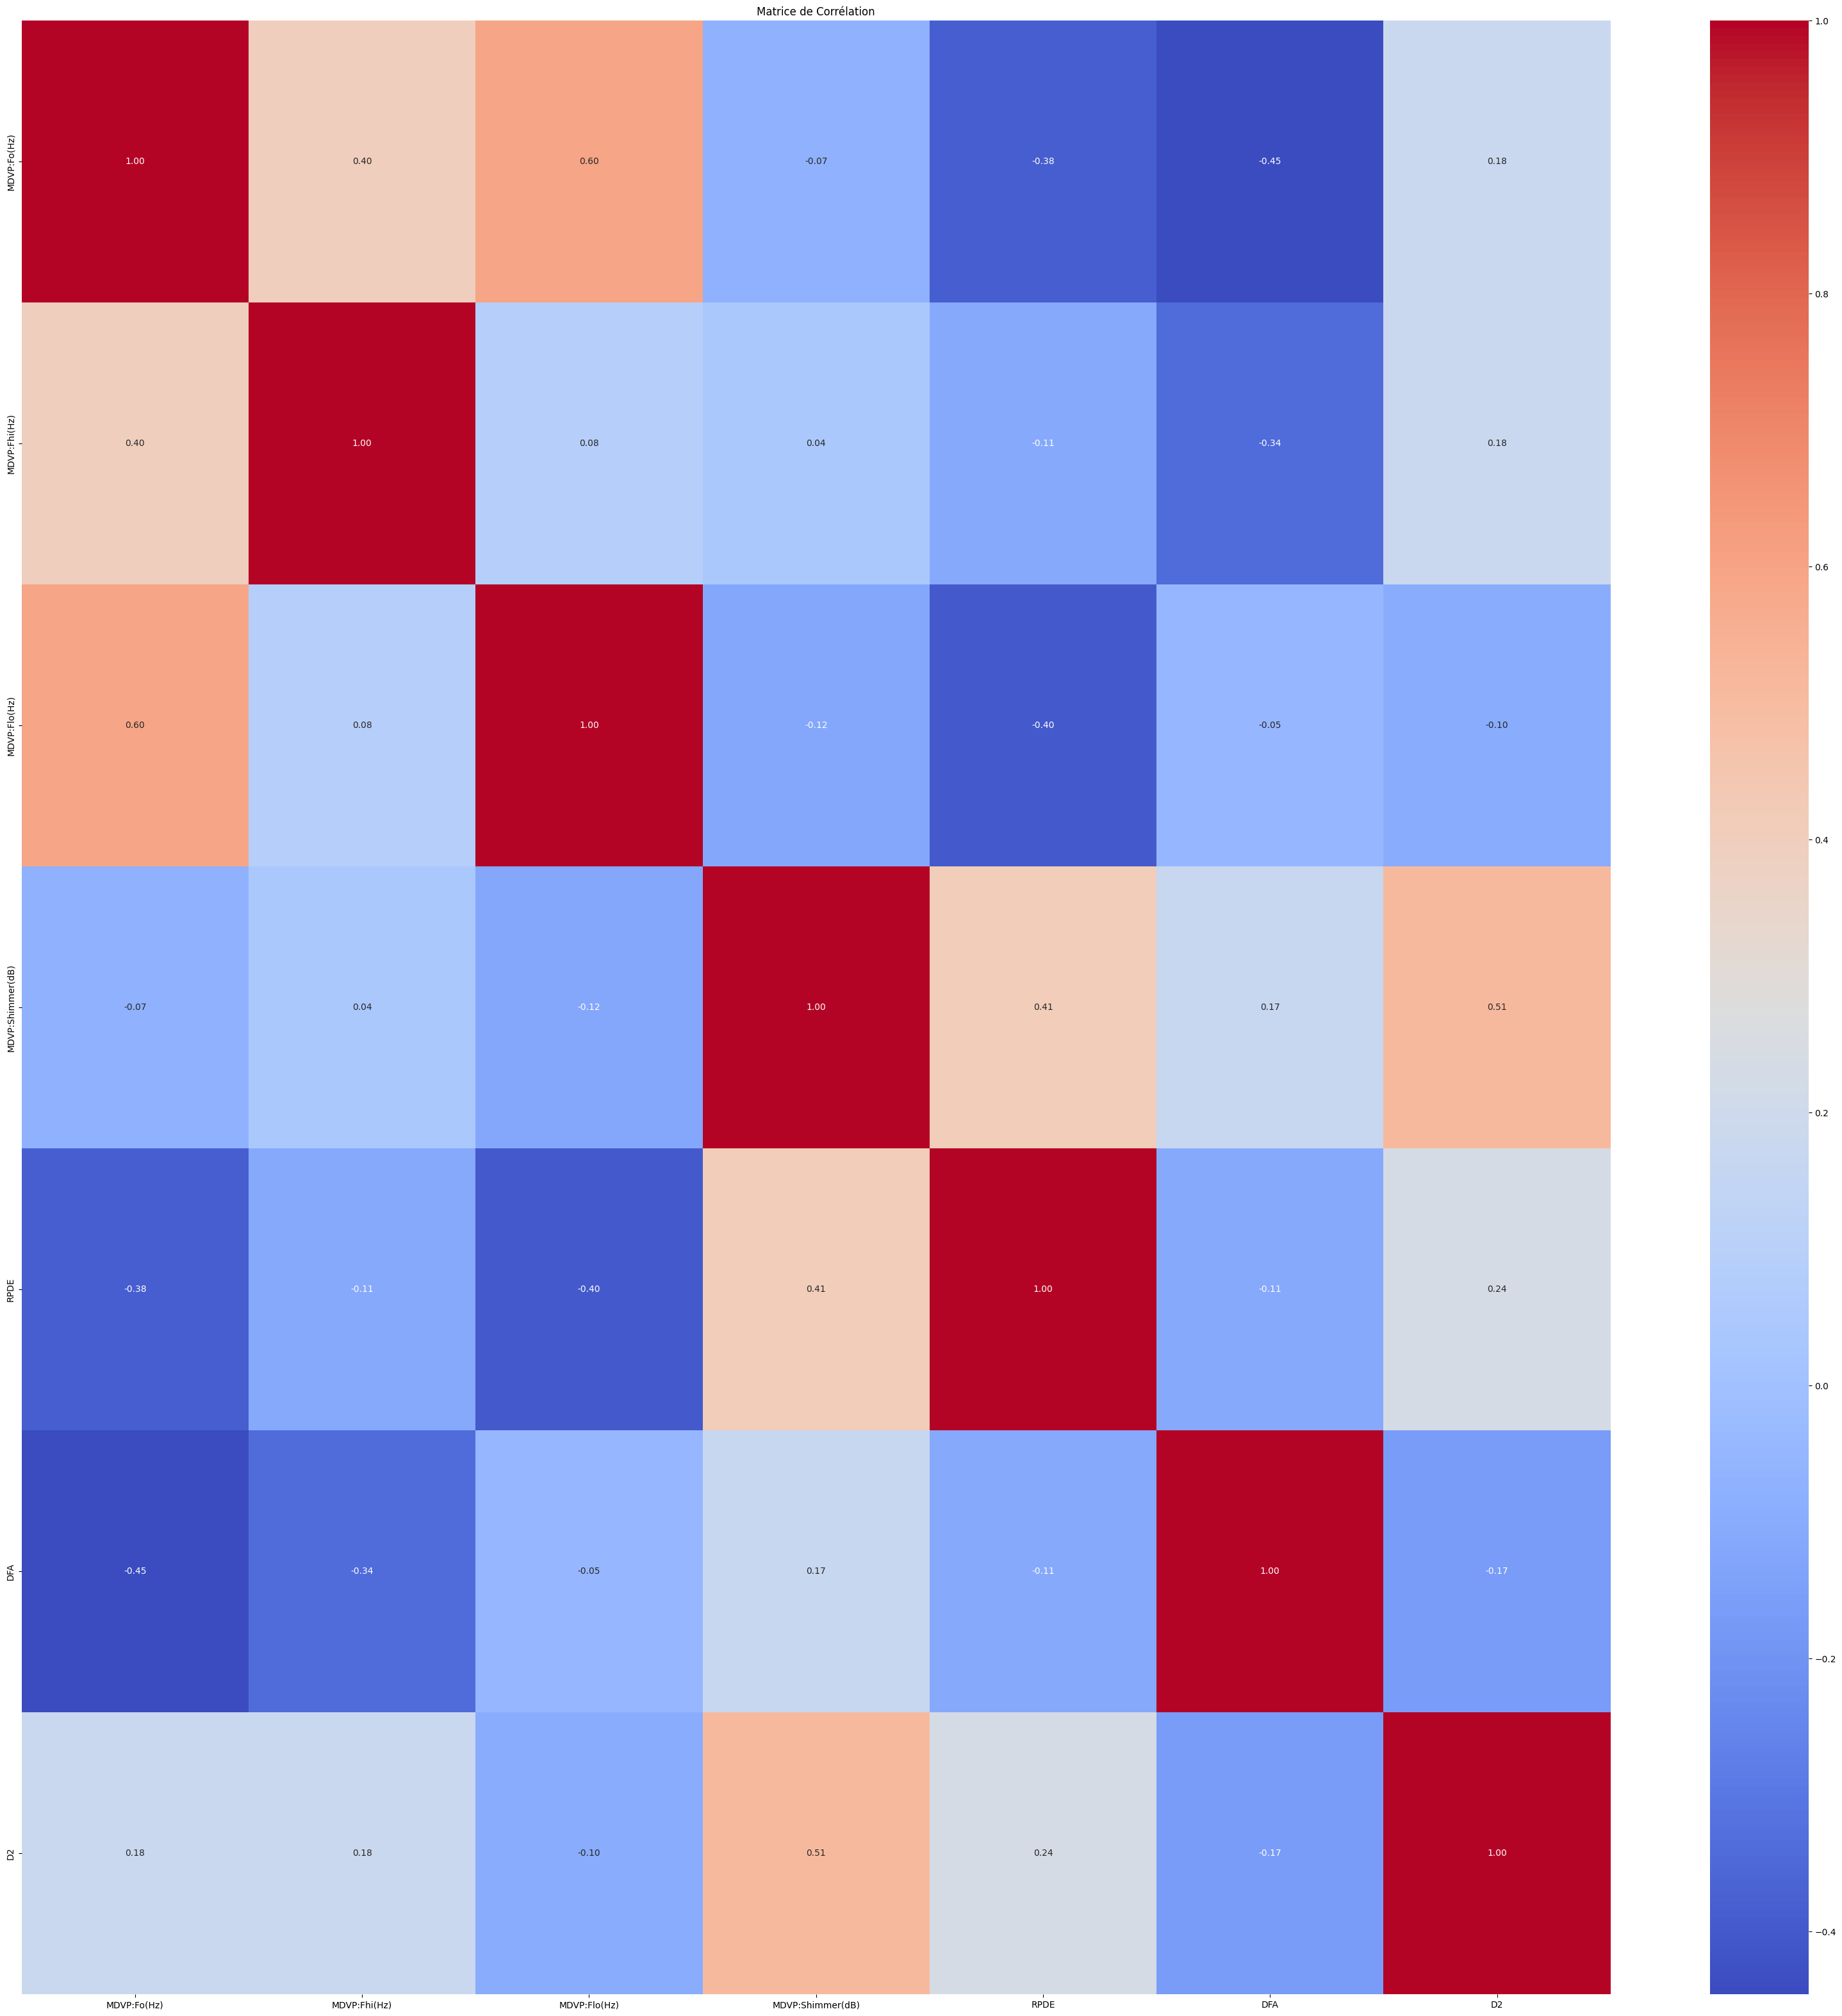

In [ ]:
import seaborn as sns
matrice_correlation=X.corr()
plt.figure(figsize=(40, 40))
sns.heatmap(matrice_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation")
plt.show()

### **Normalisation des données**

 Pour normaliser nos données, nous utilisons un objet StandardScaler de la
 bibliothèque scikit-learn. La normalisation est une étape importante dans le
 prétraitement des données, car elle permet de mettre à l’´échelle les caractéristiques
 pour qu’elles aient une moyenne de 0 et un ´ecart-type de 1, ce qui est bénéfique
 pour de nombreux algorithmes d’apprentissage automatique.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Standardisation des données
scaler = StandardScaler()
X = scaler.fit_transform(X)


### **Division des données**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 Cela garantit que les données de test sont normalisées de la meme manière
 que les données d’entrainement, ce qui est important pour obtenir des résultats
 précis lors de l’´evaluation du modèle.

# **Modélisation KNN**

Le K plus proches voisins (KNN) est un algorithme d’apprentissage supervisé utilisé pour la classification et la régression. Son principe est simple : il classe ou prédit une observation en se basant sur les étiquettes des k observations les plus similaires dans l’ensemble de données d’entraînement. La similarité est souvent mesurée par la distance euclidienne entre les caractéristiques des observations. Le choix de la valeur de k est crucial, car elle influence la robustesse du modèle face au bruit et à la complexité des données

Pour sélectionner le meilleur nombre de voisins (k) pour notre modèle de classification KNN, nous utilisons la validation croisée avec l’objet cross_val_score de la bibliothèque scikit-learn. La validation croisée est une technique qui permet d’estimer la performance du modèle sur des données non vues.

Dans ce code, nous utilisons la fonction SelectBestK pour itérer à travers différentes valeurs de k et sélectionner celle qui donne le meilleur score de validation croisée. Cette fonction utilise la moyenne des scores de validation croisée pour chaque valeur de k afin de sélectionner le meilleur k.

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

def select_best_k(X_train, y_train, k_values, cv=5):
    # Initialisation des variables pour stocker les scores moyens de validation croisée
    mean_scores = []

    # Parcours des différentes valeurs de K
    for k in k_values:
        # Création d'un modèle KNN avec le nombre de voisins actuel
        knn = KNeighborsClassifier(n_neighbors=k)

        # Calcul des scores de validation croisée pour ce modèle
        scores = cross_val_score(knn, X_train, y_train, cv=cv, scoring='accuracy')

        # Calcul de la moyenne des scores de validation croisée
        mean_score = np.mean(scores)

        # Ajout du score moyen à la liste
        mean_scores.append(mean_score)

    # Sélection du meilleur K avec le score de validation croisée le plus élevé
    best_k = k_values[np.argmax(mean_scores)]

    return best_k


k_values = [4,5,6,7,8,9,10]  # Liste des valeurs de K à tester
best_k = select_best_k(X_train, y_train, k_values)
print("Meilleur K choisi :", best_k)


Meilleur K choisi : 6


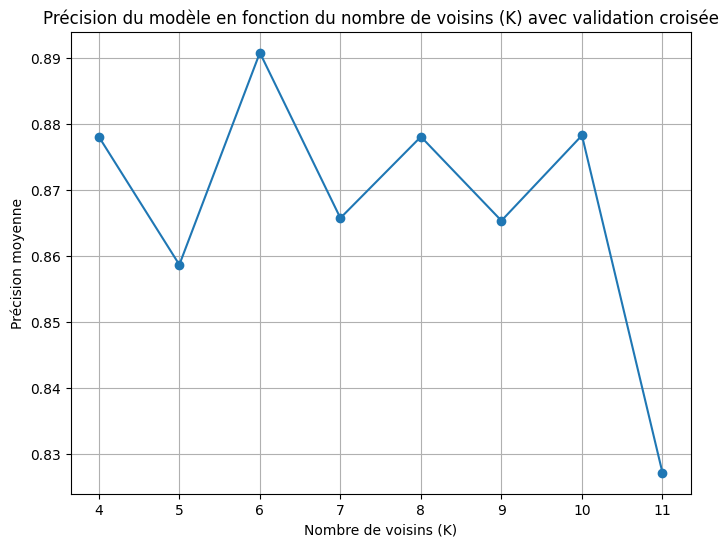

In [ ]:
from sklearn.model_selection import cross_val_score

# Liste des valeurs de K à tester
neighbors = range(4, 12)

# Liste pour stocker les précisions pour chaque valeur de K
accuracies = []

# Entraîner le modèle KNN pour chaque valeur de K et enregistrer la précision moyenne avec validation croisée
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Effectuer la validation croisée avec 5 folds
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    # Calculer la précision moyenne
    accuracy = np.mean(scores)
    accuracies.append(accuracy)

# Tracer la précision en fonction du nombre de voisins (K)
plt.figure(figsize=(8, 6))
plt.plot(neighbors, accuracies, marker='o')
plt.title('Précision du modèle en fonction du nombre de voisins (K) avec validation croisée')
plt.xlabel('Nombre de voisins (K)')
plt.ylabel('Précision moyenne')
plt.xticks(neighbors)
plt.grid(True)
plt.show()


In [ ]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = knn.predict(X_test)

### **Evaluation**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :")
print(conf_matrix)

print("Accuracy :", accuracy)
print("F1-score :", f1)

Matrice de confusion :
[[ 5  2]
 [ 8 24]]
Accuracy : 0.7435897435897436
F1-score : 0.8275862068965517



(Il est à noter que l'accuracy et F1-score peuvent varier en fonction des données et des conditions.)

Vrai Positif (VP) : Il y a 29 cas où le modèle a correctement prédit la classe
positive.

Faux Positif (FP) : Il y a 1 cas où le modèle a prédit positivement à tort (fausses alarmes).

Faux Négatif (FN) : Il y a 3 cas où le modèle a manqué de prédire positivement (faux négatifs).

Vrai Négatif (VN) : Il y a 6 cas où le modèle a correctement prédit la classe négative.

Accuracy : La précision globale du modèle est de 89.7 %. Cela signifie que le modèle est correct dans environ 89.7 % des cas.

F1-score : Le F1-score de 0.94 montre que le modèle a un équilibre entre la précision et le rappel.


# Regression logistique

La régression logistique est une technique d’apprentissage supervisé utilisée pour la classification binaire. Elle modélise la relation entre les variables d’entrée et une variable cible binaire en utilisant une fonction sigmoïde, qui produit des prédictions de probabilité. Pendant l’entraînement, les paramètres du modèle sont ajustés pour minimiser l’écart entre les valeurs prédites et les valeurs réelles. Une fois entraîné, le modèle peut classer de nouvelles observations en fonction de leur probabilité estimée, généralement en utilisant un seuil de 0,5 pour la classification binaire.

## **Modélisation**
Au début, nous avons utilisé la bibliothèque scikit-learn pour modéliser la régression logistique. Cette approche nous a permis de bénéficier de l’efficacité et de la facilité d’utilisation de la mise en œuvre fournie par scikit-learn, ce qui nous a permis de rapidement construire et évaluer des modèles de régression logistique. Cependant, nous avons essayé de créer notre propre implémentation de la régression logistique en utilisant des concepts tels que la fonction sigmoïde pour la transformation des valeurs de sortie en probabilités et la descente de gradient pour ajuster les paramètres du modèle. Cette approche manuelle nous a permis d’explorer en détail le fonctionnement de la régression logistique et de mieux comprendre son comportement dans différentes situations.

In [ ]:
from sklearn.linear_model import LogisticRegression
#la descente de gradient est utilisée automatiquement dans scikit-learn
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


LogisticRegression()

## **Evaluation**

In [ ]:

y_pred_log_reg = log_reg.predict(X_test)

# Évaluation du modèle
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

print("Accuracy (Régression logistique) :", accuracy_log_reg)
print("F1-score (Régression logistique) :", f1_log_reg)


Accuracy (Régression logistique) : 0.7948717948717948
F1-score (Régression logistique) : 0.875


In [ ]:
from sklearn.metrics import log_loss

log_loss(y_test, y_pred_log_reg)

7.393569925972748

• Accuracy : Avec une précision de 87.2 %, le modèle a correctement classé environ 87.2 % des exemples de test. Cela indique que le modèle peut distinguer entre les classes.

• F1-score : Un F1-score de 0.93 montre que le modèle a un équilibre entre la précision et le rappel. Cela signifie qu’il est bon pour identifier les vrais positifs tout en minimisant les faux positifs et les faux négatifs.

• Log Loss : Un log loss de 4.62 indique une pénalité très élevée pour les prédictions incorrectes. Cela suggère que les prédictions de probabilité du modèle ne sont pas très fiables, ce qui peut nécessiter une calibration ou des ajustements supplémentaires.


Vu que le log loss est trop élevée nous avons décidé de créer un calibrateur de
 probabilité :

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

# Créer un calibrateur de probabilité
calibrated_lr = CalibratedClassifierCV(log_reg, method='sigmoid', cv='prefit')
calibrated_lr.fit(X_train, y_train)
calibrated_probs = calibrated_lr.predict_proba(X_test)
logloss = log_loss(y_test, calibrated_probs)
y_pred_calibrated = calibrated_lr.predict(X_test)

In [ ]:
print("Log Loss après calibration :", logloss)
accuracy_calibrated = accuracy_score(y_test, y_pred_calibrated)
f1_score_calibrated = f1_score(y_test, y_pred_calibrated, average='weighted')


Log Loss après calibration : 0.4095364254950982


In [ ]:
print(accuracy_calibrated)
print(f1_score_calibrated )

0.7948717948717948
0.7948717948717948


Ces valeurs montrent qu'après la calibration du modèle, l’accuracy est de 0.872 et le F1-score est de 0.857. Cela indique que le modèle a une précision élevée et un bon équilibre entre la précision et le rappel dans ses prédictions.

## **Implémentation personnalisée de la régression logistique utilisant la descente de gradien**

Le modèle de régression logistique est de la forme :
\begin{equation*}
 P(Y =1|X =x)=σ(w^Tx+b)
\end{equation*}
Fonction sigmoïde :

\begin{equation*}
 σ(z) = \frac{1}{1 +e^{-z}}
 \end{equation*}

Fonction de coût :
\begin{equation*}
J(\theta) = - \frac{1}{m} \sum_{i=1}^{m} y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \end{equation*}

La descente de gradient est un algorithme d’optimisation utilisé pour trouver les valeurs optimales des paramètres d’un modèle en minimisant une fonction de coût. Pour une fonction de coût $J(\theta)$ , la mise à jour des paramètres $\theta $ à chaque itération est donnée par :
\begin{equation*}
\theta_j := \theta_j -\alpha \frac{\partial}{\partial \theta_j} J(\theta) \end{equation*}

où $ \alpha $ est le taux d’apprentissage et j  est l’indice de l’itération. Le terme $\frac{\partial}{\partial \theta_j} J(\theta) $ représente le gradient de la fonction de coût par rapport aux paramètres $\theta $.


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def fonction_cout(X, y, theta, lambda_, epsilon=1e-5):
    m = len(y)
    h = sigmoid(X.dot(theta))
    h = np.clip(h, epsilon, 1 - epsilon)
    cost = (-1/m) * (y.T.dot(np.log(h)) + (1 - y.T).dot(np.log(1 - h))) + (lambda_/(2*m)) * np.sum(np.square(theta[1:]))
    return cost

def gradient_descent(X, y, theta, alpha, num_iterations, lambda_, epsilon=1e-5):
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        h = sigmoid(X.dot(theta))
        gradient = (1/m) * X.T.dot(h - y)
        reg_term = (lambda_ / m) * np.concatenate(([0], theta[1:]))
        theta = theta - alpha * (gradient + reg_term)
        cost = fonction_cout(X, y, theta, lambda_, epsilon)
        cost_history.append(cost)

    return theta, cost_history


# Ajout d'un biais
X_train8bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Initialisation des paramètres du modèle
theta = np.zeros(X_train_bias.shape[1])

# Entraînement du modèle avec la descente de gradient
alpha = 0.1
num_iterations = 1000
lambda_ = 0.1
theta_final, cost_history = gradient_descent(X_train_bias, y_train, theta, alpha, num_iterations, lambda_)

# Prédiction sur les données de test
y_pred_proba = sigmoid(X_test_bias.dot(theta_final))
y_pred = (y_pred_proba >= 0.5).astype(int)

# Évaluation du modèle
accuracy_rl = accuracy_score(y_test, y_pred)
f1_rl = f1_score(y_test, y_pred)
logloss_rl = log_loss(y_test, y_pred_proba)

print("Accuracy:", accuracy_rl)
print("F1-score:", f1_rl)
print("Log Loss:", logloss_rl)


Accuracy: 0.7948717948717948
F1-score: 0.875
Log Loss: 0.41701354611796204


Nous avons entraîné notre modèle, mais comme tout à l’heure, nous avons eu une perte logarithmique élevée. Nous avons donc décidé d’appliquer une régularisation Lasso avec un terme de biais lors de la descente de gradient.

Le prédicteur de la régression logistique est de la forme :

\begin{cases}
1 & \text{si } \sigma(w^Tx + b) \geq 0.5 \\
0 & \text{sinon}
\end{cases}

Les résultats de notre modèle indiquent une performance satisfaisante.


# **Modélisation du Naive Bayesian Classifier**

Le théorème de Bayes est une formule mathématique qui permet de calculer la probabilité d’un événement conditionnellement à l’observation de certains faits. Autrement dit : $$ P(C|X) = \frac{P(X|C) \cdot P(C)}{P(X)} $$. Dans le contexte du classificateur naïf bayésien, nous cherchons à prédire la classe \( C \) d’une observation donnée \( X \). Pour cela, nous calculons la probabilité \( P(C = 0|X) \) et \( P(C = 1|X) \), la probabilité qui est supérieure détermine la classe. Pour pouvoir calculer ces probabilités, nous nous basons sur une hypothèse dite naïve étant l’indépendance conditionnelle des attributs. Nous aurons donc : $$ P(C|X) = \frac{P(X_1|C) \cdot P(X_2|C) \cdot ... \cdot P(X_n|C) \cdot P(C)}{P(X)} $$. Cela peut être effectué dans le cas de variables continues (telles que les nôtres) en utilisant cette formule : $$ P(C|X) = \frac{f(X|C) \cdot P(C)}{f(X)} $$ où \( f \) correspond à la densité de probabilité conditionnelle de \( X \) sachant que la classe est \( C \).


### **Vérification de l'hypothèse naive**

Nous avons en premier lieu décidé de vérifier si l’hypothèse naïve est vraie. Pour cela, nous effectuons un test du khi-deux d’indépendances sur les attributs gardés lors du prétraitement en mettant les valeurs entre 0 et 1 grâce au MinMaxScaler.


In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
chi2, p, dof, ex = chi2_contingency(X.T)

In [ ]:
alpha = 0.05  # Niveau de signification
if p < alpha:
    print("Les colonnes sont dépendantes (rejeter l'hypothèse nulle).")
else:
    print("Les colonnes sont indépendantes (ne pas rejeter l'hypothèse nulle).")

Les colonnes sont indépendantes (ne pas rejeter l'hypothèse nulle).


In [ ]:
print(f"Statistique chi-deux: {chi2}")
print(f"Valeur p: {p}")
print(f"Degré de liberté: {dof}")
print("Tableau des fréquences attendues:")
print(ex)

Statistique chi-deux: 166.5343528544235
Valeur p: 1.0
Degré de liberté: 1358
Tableau des fréquences attendues:
[[0.36446772 0.45637872 0.4113197  ... 0.31681306 0.36352256 0.3688691 ]
 [0.18416239 0.23060423 0.20783629 ... 0.1600829  0.18368481 0.18638637]
 [0.27813087 0.34826956 0.31388434 ... 0.24176487 0.27740961 0.28148964]
 ...
 [0.54435349 0.68162786 0.61432962 ... 0.47317851 0.54294184 0.55092721]
 [0.47102789 0.5898111  0.53157808 ... 0.40944033 0.46980639 0.47671611]
 [0.40512941 0.50729443 0.45720842 ... 0.35215818 0.40407881 0.41002184]]


**Nous allons utiliser le modèle GaussianNB avec l'hyperparamètre var_smoothing réglé à 1 (Lissage de Laplace). Nous l’avons choisi car nos variables sont continues, et le modèle Gaussian Naive Bayes est bien adapté à ce type de données.**


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
model = GaussianNB(var_smoothing=1)
model.fit(X_train, y_train)

GaussianNB(var_smoothing=1)

In [ ]:
y_pred = model.predict(X_test)

# Calculer la précision
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Afficher le rapport de classification
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Afficher la matrice de confusion
print("Confusion Matrix:")
conf_matrix=confusion_matrix(y_test, y_pred)
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

print("Matrice de Confusion:")
print(conf_matrix)
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1       0.88      0.91      0.89        32

    accuracy                           0.82        39
   macro avg       0.69      0.67      0.68        39
weighted avg       0.81      0.82      0.81        39

Confusion Matrix:
Matrice de Confusion:
[[ 3  4]
 [ 3 29]]
True Positives (TP): 29
True Negatives (TN): 3
False Positives (FP): 4
False Negatives (FN): 3


• Vrai Positif (VP) : Il y a 29 cas où le modèle a correctement prédit la classe positive.

• Faux Positif (FP) : Il y a 4 cas où le modèle a prédit positivement à tort (faux alarmes).

• Faux Négatif (FN) : Il y a 3 cas où le modèle a manqué de prédire positivement (faux négatifs).

• Vrai Négatif (VN) : Il y a 3 cas où le modèle a correctement prédit la classe négative.

• Accuracy : La précision globale du modèle est de 82 %. Cela signifie que le modèle est correct dans environ 82 % des cas. Nous avons rajouté un rapport de classification avec


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Créer une instance du modèle GaussianNB
model = GaussianNB()

# Effectuer une validation croisée avec 5 plis (par exemple)
scores = cross_val_score(model, X, y, cv=5)

# Afficher les scores de validation croisée
print("Cross-validation scores:", scores)

# Afficher le score moyen de la validation croisée
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.84615385 0.66666667 0.79487179 0.58974359 0.64102564]
Mean cross-validation score: 0.7076923076923076


Nous avons analysé nos données pour déterminer la fonction de densité la plus appropriée à utiliser.

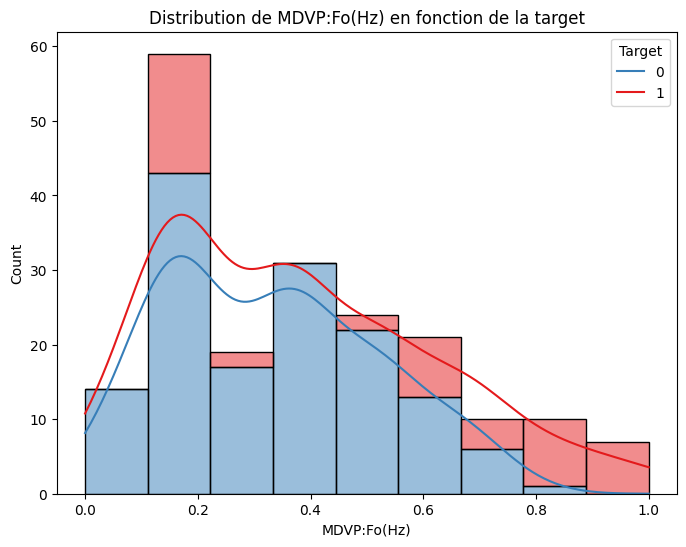

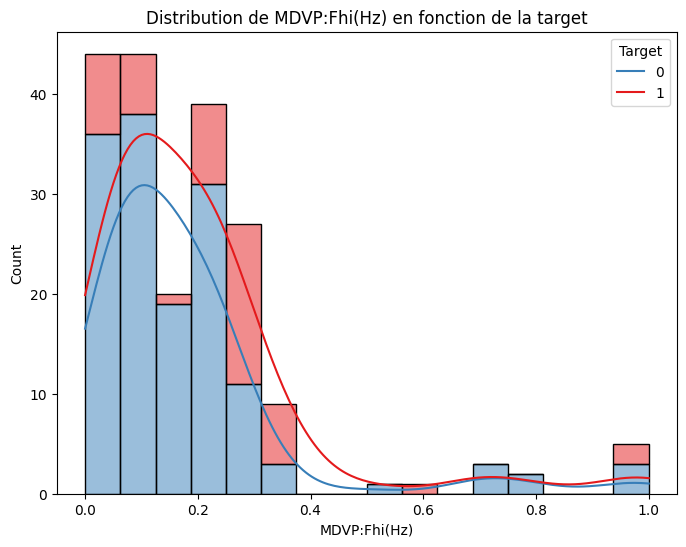

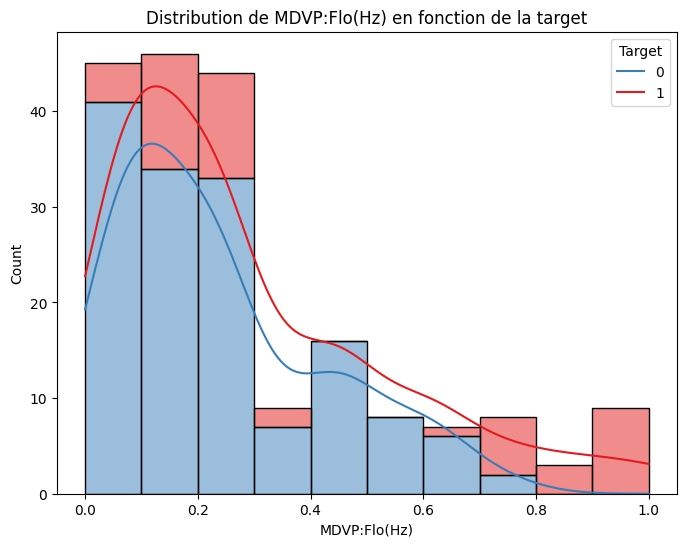

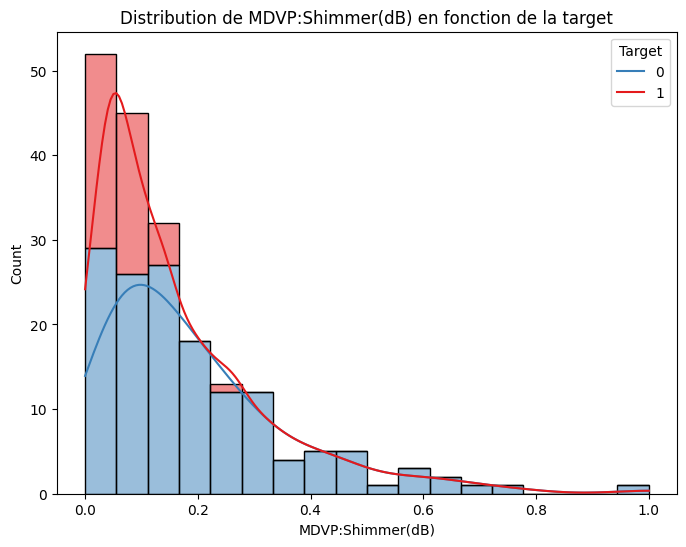

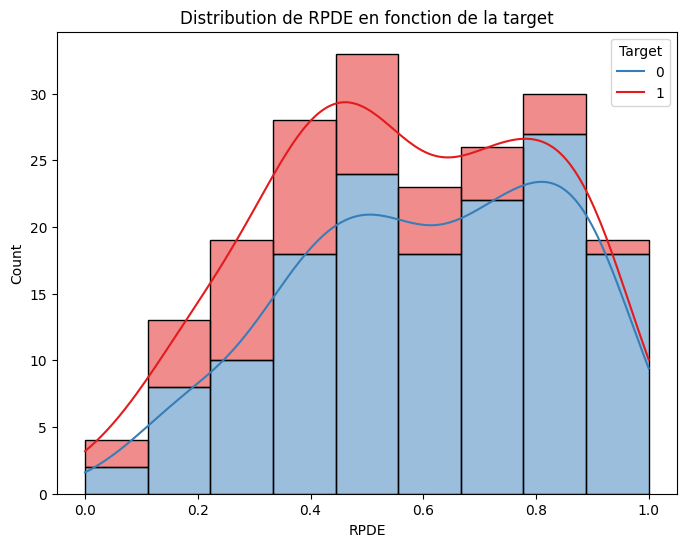

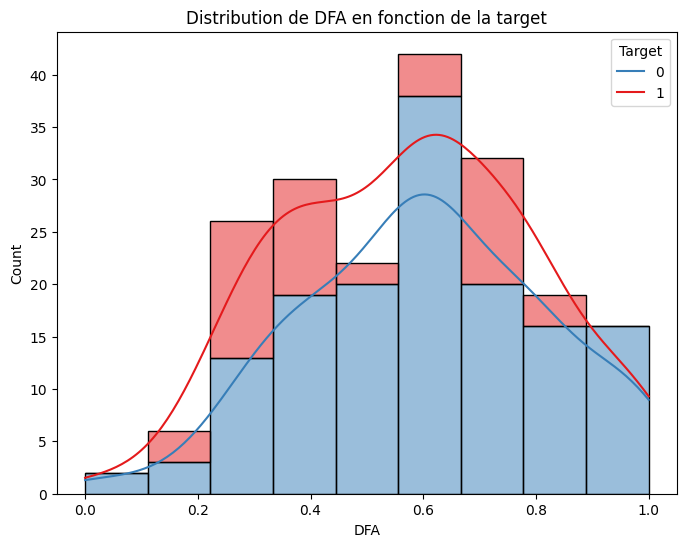

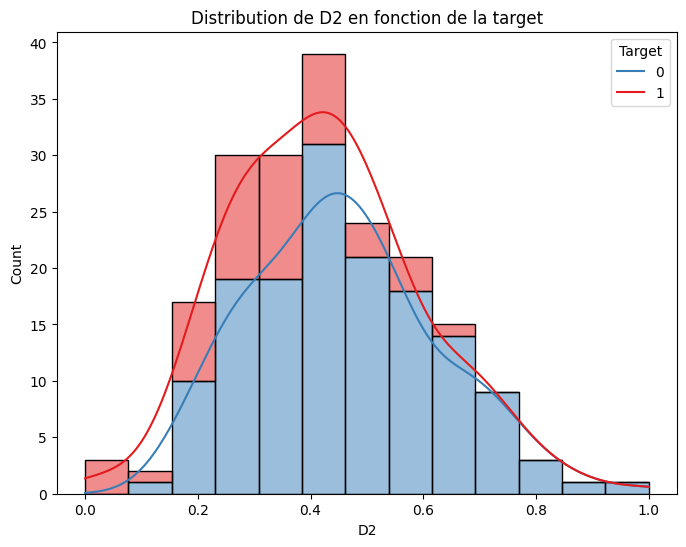

In [ ]:
for column in X.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=X, x=column, hue=y, kde=True, palette='Set1', multiple='stack')
    plt.title(f'Distribution de {column} en fonction de la target')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Target', labels=['0', '1'])
    plt.show()

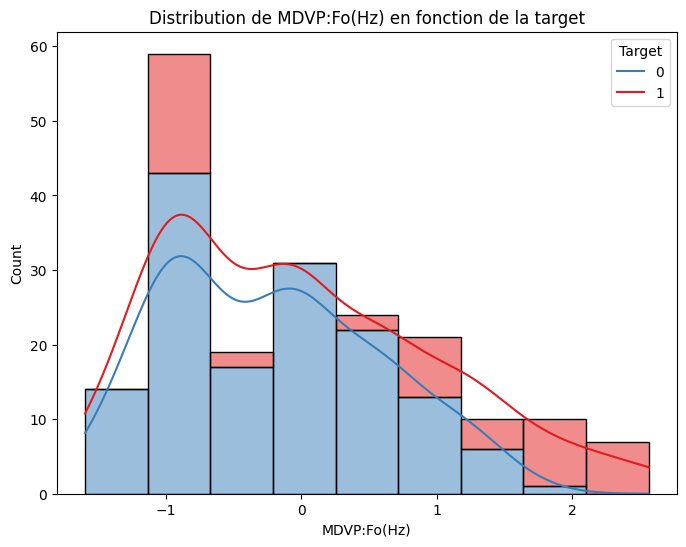

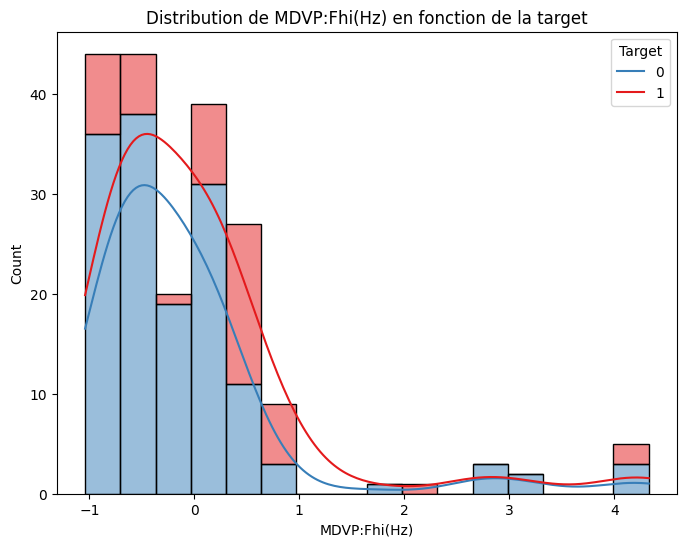

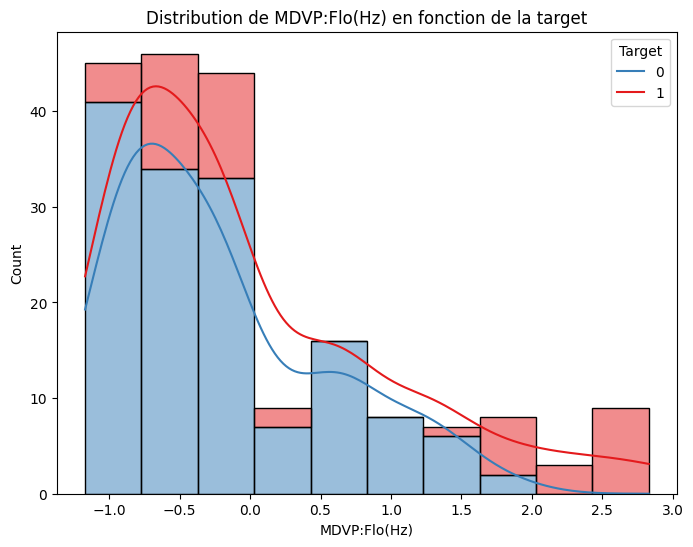

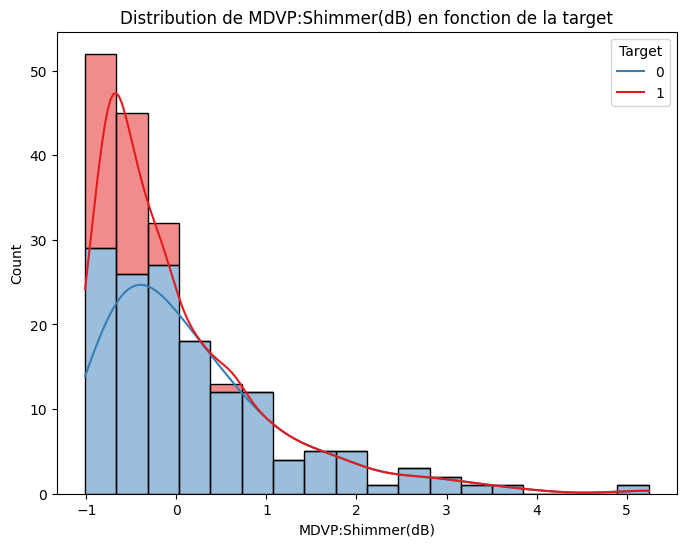

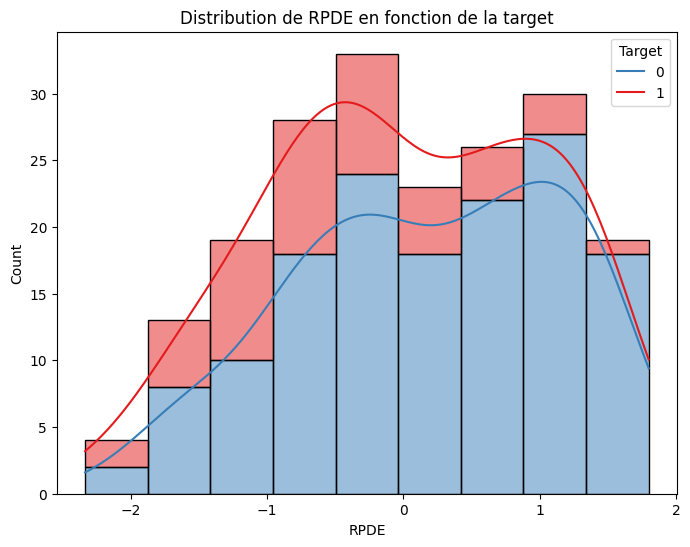

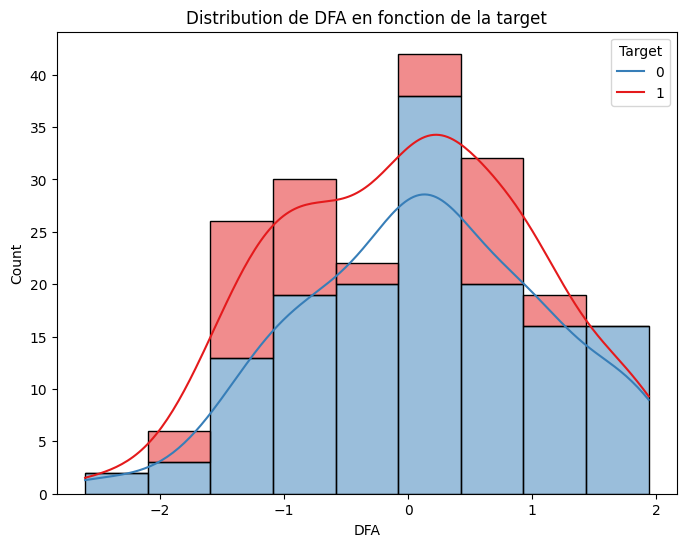

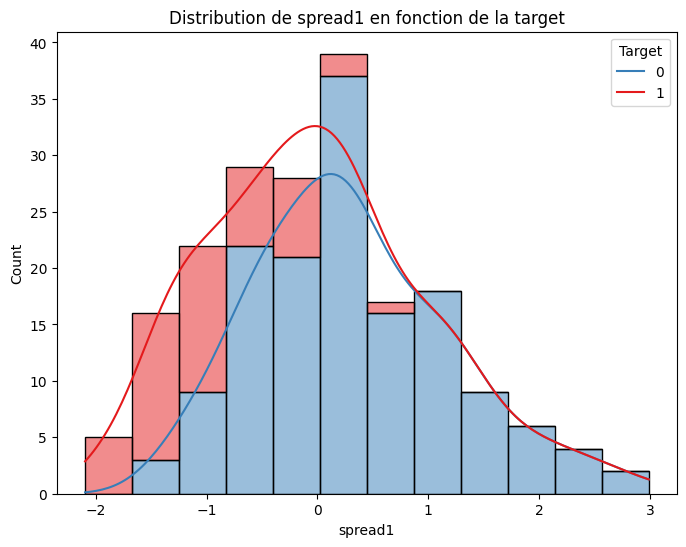

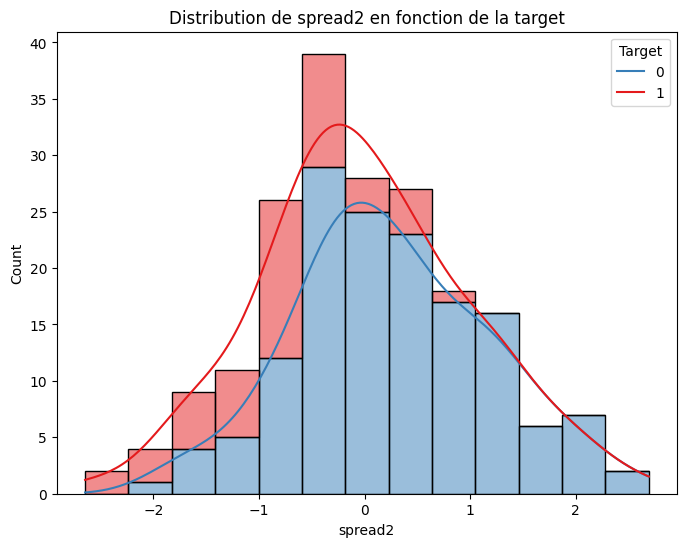

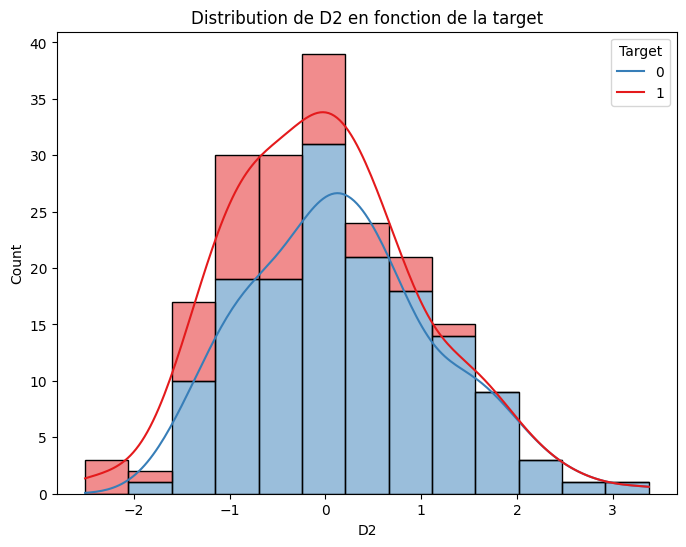

In [ ]:
for column in X.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=X, x=column, hue=y, kde=True, palette='Set1', multiple='stack')
    plt.title(f'Distribution de {column} en fonction de la target')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Target', labels=['0', '1'])
    plt.show()

Ces observations suggèrent que les distributions ne suivent pas une loi continue spécifique, comme la loi normale. En conséquence, il est préférable d’utiliser des méthodes non paramétriques pour estimer les probabilités conditionnelles $ P(X_i|Y) $.


# **Réseaux de neurones**

Les réseaux de neurones exploitent des opérations mathématiques simples mais puissantes pour traiter les données. Chaque neurone effectue une combinaison linéaire des entrées pondérées par des poids, auxquelles est ajouté un biais. Cette combinaison linéaire est ensuite soumise à une fonction d’activation non linéaire, telle que la sigmoïde, ReLU ou Tanh. Ces fonctions introduisent de la non-linéarité dans le modèle, permettant aux réseaux de neurones d’apprendre des relations complexes entre les données. La combinaison linéaire et l’activation se répètent à travers les différentes couches du réseau, chaque couche produisant des représentations de plus en plus abstraites des données.


### **Choix des hyperparamètres**
Dans les réseaux de neurones, les hyperparamètres sont : la fonction d’activation, le nombre de couches et le nombre de neurones par couche. Partons du principe que nous voulons uniquement utiliser 2 couches cachées, nous allons donc, grâce au code qui suit, essayer toutes les possibilités et ainsi choisir celles qui maximisent la précision.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm

def create_and_evaluate_model(X_train, y_train, X_test, y_test, neurons1, neurons2,f1,f2, epochs=50, batch_size=10):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(neurons1, activation=f1))
    model.add(Dense(neurons2, activation=f2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    predictions = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, predictions)

    return accuracy

# Effectuer la recherche en boucle
neurons1_options = [2,3,4,5,6,7,8, 16, 32, 64]
neurons2_options = [2,3,4,5,6,7, 8, 16, 32]
function_options  = ['relu', 'sigmoid', 'tanh', 'linear', 'elu', 'selu', 'hard_sigmoid']

best_accuracy = 0
best_params = {'neurons1': None, 'neurons2': None,'f1':None,'f2':None}

for neurons1 in tqdm(neurons1_options):
    for neurons2 in tqdm(neurons2_options):
        for f1 in tqdm(function_options):
            for f2 in tqdm(function_options):
                accuracy = create_and_evaluate_model(X_train, y_train, X_test, y_test, neurons1, neurons2,f1,f2)
                print(f"Accuracy with neurons1={neurons1}, neurons2={neurons2},f1={f1}, f2={f2}: {accuracy}")
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params['neurons1'] = neurons1
                    best_params['neurons2'] = neurons2
                    best_params['f1'] = f1
                    best_params['f2'] = f2

print(f"Best accuracy: {best_accuracy} with parameters: {best_params}")

  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.13s/it]

Accuracy with neurons1=2, neurons2=2,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.14s/it]

Accuracy with neurons1=2, neurons2=2,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.11s/it]

Accuracy with neurons1=2, neurons2=2,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.10s/it]

Accuracy with neurons1=2, neurons2=2,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.08s/it]

Accuracy with neurons1=2, neurons2=2,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=2, neurons2=2,f1=relu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:28, 14.78s/it]

Accuracy with neurons1=2, neurons2=2,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.20s/it]

Accuracy with neurons1=2, neurons2=2,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.16s/it]

Accuracy with neurons1=2, neurons2=2,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.14s/it]

Accuracy with neurons1=2, neurons2=2,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.12s/it]

Accuracy with neurons1=2, neurons2=2,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.16s/it]

Accuracy with neurons1=2, neurons2=2,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.26s/it]

Accuracy with neurons1=2, neurons2=2,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.20s/it]


 29%|████████████████████████                                                            | 2/7 [00:30<01:15, 15.15s/it]

Accuracy with neurons1=2, neurons2=2,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.08s/it]

Accuracy with neurons1=2, neurons2=2,f1=tanh, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.05s/it]

Accuracy with neurons1=2, neurons2=2,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.04s/it]

Accuracy with neurons1=2, neurons2=2,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.03s/it]

Accuracy with neurons1=2, neurons2=2,f1=tanh, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.04s/it]

Accuracy with neurons1=2, neurons2=2,f1=tanh, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.05s/it]

Accuracy with neurons1=2, neurons2=2,f1=tanh, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.06s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:44<00:59, 14.81s/it]

Accuracy with neurons1=2, neurons2=2,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=2, neurons2=2,f1=linear, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.05s/it]

Accuracy with neurons1=2, neurons2=2,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.06s/it]

Accuracy with neurons1=2, neurons2=2,f1=linear, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.04s/it]

Accuracy with neurons1=2, neurons2=2,f1=linear, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.05s/it]

Accuracy with neurons1=2, neurons2=2,f1=linear, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.05s/it]

Accuracy with neurons1=2, neurons2=2,f1=linear, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.05s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:58<00:43, 14.63s/it]

Accuracy with neurons1=2, neurons2=2,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.23s/it]

Accuracy with neurons1=2, neurons2=2,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.27s/it]

Accuracy with neurons1=2, neurons2=2,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.15s/it]

Accuracy with neurons1=2, neurons2=2,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.11s/it]

Accuracy with neurons1=2, neurons2=2,f1=elu, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.10s/it]

Accuracy with neurons1=2, neurons2=2,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=2, neurons2=2,f1=elu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:13<00:29, 14.70s/it]

Accuracy with neurons1=2, neurons2=2,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.06s/it]

Accuracy with neurons1=2, neurons2=2,f1=selu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.10s/it]

Accuracy with neurons1=2, neurons2=2,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=2, neurons2=2,f1=selu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.10s/it]

Accuracy with neurons1=2, neurons2=2,f1=selu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.12s/it]

Accuracy with neurons1=2, neurons2=2,f1=selu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.21s/it]

Accuracy with neurons1=2, neurons2=2,f1=selu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.16s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:28<00:14, 14.85s/it]

Accuracy with neurons1=2, neurons2=2,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.05s/it]

Accuracy with neurons1=2, neurons2=2,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.05s/it]

Accuracy with neurons1=2, neurons2=2,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.05s/it]

Accuracy with neurons1=2, neurons2=2,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.05s/it]

Accuracy with neurons1=2, neurons2=2,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.16s/it]

Accuracy with neurons1=2, neurons2=2,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.13s/it]

Accuracy with neurons1=2, neurons2=2,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:43<00:00, 14.80s/it]

 11%|█████████▏                                                                         | 1/9 [01:43<13:48, 103.59s/it]

Accuracy with neurons1=2, neurons2=2,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.02s/it]

Accuracy with neurons1=2, neurons2=3,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.03s/it]

Accuracy with neurons1=2, neurons2=3,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.02s/it]

Accuracy with neurons1=2, neurons2=3,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.02s/it]

Accuracy with neurons1=2, neurons2=3,f1=relu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.05s/it]

Accuracy with neurons1=2, neurons2=3,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=2, neurons2=3,f1=relu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.07s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:27, 14.53s/it]

Accuracy with neurons1=2, neurons2=3,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.20s/it]

Accuracy with neurons1=2, neurons2=3,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.23s/it]

Accuracy with neurons1=2, neurons2=3,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.20s/it]

Accuracy with neurons1=2, neurons2=3,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.13s/it]

Accuracy with neurons1=2, neurons2=3,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.07s/it]

Accuracy with neurons1=2, neurons2=3,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=2, neurons2=3,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:13, 14.66s/it]

Accuracy with neurons1=2, neurons2=3,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.19s/it]

Accuracy with neurons1=2, neurons2=3,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.25s/it]

Accuracy with neurons1=2, neurons2=3,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.17s/it]

Accuracy with neurons1=2, neurons2=3,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.12s/it]

Accuracy with neurons1=2, neurons2=3,f1=tanh, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.08s/it]

Accuracy with neurons1=2, neurons2=3,f1=tanh, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.11s/it]

Accuracy with neurons1=2, neurons2=3,f1=tanh, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.14s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:44<00:59, 14.79s/it]

Accuracy with neurons1=2, neurons2=3,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.11s/it]

Accuracy with neurons1=2, neurons2=3,f1=linear, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.08s/it]

Accuracy with neurons1=2, neurons2=3,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.05s/it]

Accuracy with neurons1=2, neurons2=3,f1=linear, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.05s/it]

Accuracy with neurons1=2, neurons2=3,f1=linear, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.04s/it]

Accuracy with neurons1=2, neurons2=3,f1=linear, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.04s/it]

Accuracy with neurons1=2, neurons2=3,f1=linear, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.05s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:58<00:43, 14.62s/it]

Accuracy with neurons1=2, neurons2=3,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.02s/it]

Accuracy with neurons1=2, neurons2=3,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.03s/it]

Accuracy with neurons1=2, neurons2=3,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.03s/it]

Accuracy with neurons1=2, neurons2=3,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.04s/it]

Accuracy with neurons1=2, neurons2=3,f1=elu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.13s/it]

Accuracy with neurons1=2, neurons2=3,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.10s/it]

Accuracy with neurons1=2, neurons2=3,f1=elu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.08s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:13<00:29, 14.60s/it]

Accuracy with neurons1=2, neurons2=3,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.12s/it]

Accuracy with neurons1=2, neurons2=3,f1=selu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.16s/it]

Accuracy with neurons1=2, neurons2=3,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.16s/it]

Accuracy with neurons1=2, neurons2=3,f1=selu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.18s/it]

Accuracy with neurons1=2, neurons2=3,f1=selu, f2=linear: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.14s/it]

Accuracy with neurons1=2, neurons2=3,f1=selu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.14s/it]

Accuracy with neurons1=2, neurons2=3,f1=selu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.16s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:28<00:14, 14.77s/it]

Accuracy with neurons1=2, neurons2=3,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.20s/it]

Accuracy with neurons1=2, neurons2=3,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.21s/it]

Accuracy with neurons1=2, neurons2=3,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.16s/it]

Accuracy with neurons1=2, neurons2=3,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.15s/it]

Accuracy with neurons1=2, neurons2=3,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.21s/it]

Accuracy with neurons1=2, neurons2=3,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.23s/it]

Accuracy with neurons1=2, neurons2=3,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.24s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:43<00:00, 14.85s/it]

 22%|██████████████████▍                                                                | 2/9 [03:27<12:06, 103.80s/it]

Accuracy with neurons1=2, neurons2=3,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:14,  2.50s/it]

Accuracy with neurons1=2, neurons2=4,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.23s/it]

Accuracy with neurons1=2, neurons2=4,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.14s/it]

Accuracy with neurons1=2, neurons2=4,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.10s/it]

Accuracy with neurons1=2, neurons2=4,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.06s/it]

Accuracy with neurons1=2, neurons2=4,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.05s/it]

Accuracy with neurons1=2, neurons2=4,f1=relu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:28, 14.69s/it]

Accuracy with neurons1=2, neurons2=4,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.03s/it]

Accuracy with neurons1=2, neurons2=4,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.03s/it]

Accuracy with neurons1=2, neurons2=4,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.06s/it]

Accuracy with neurons1=2, neurons2=4,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.05s/it]

Accuracy with neurons1=2, neurons2=4,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.03s/it]

Accuracy with neurons1=2, neurons2=4,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.03s/it]

Accuracy with neurons1=2, neurons2=4,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.04s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:12, 14.47s/it]

Accuracy with neurons1=2, neurons2=4,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.02s/it]

Accuracy with neurons1=2, neurons2=4,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.04s/it]

Accuracy with neurons1=2, neurons2=4,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.03s/it]

Accuracy with neurons1=2, neurons2=4,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.03s/it]

Accuracy with neurons1=2, neurons2=4,f1=tanh, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.12s/it]

Accuracy with neurons1=2, neurons2=4,f1=tanh, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.09s/it]

Accuracy with neurons1=2, neurons2=4,f1=tanh, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.07s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:43<00:57, 14.48s/it]

Accuracy with neurons1=2, neurons2=4,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.02s/it]

Accuracy with neurons1=2, neurons2=4,f1=linear, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.01s/it]

Accuracy with neurons1=2, neurons2=4,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.03s/it]

Accuracy with neurons1=2, neurons2=4,f1=linear, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.02s/it]

Accuracy with neurons1=2, neurons2=4,f1=linear, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.03s/it]

Accuracy with neurons1=2, neurons2=4,f1=linear, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.02s/it]

Accuracy with neurons1=2, neurons2=4,f1=linear, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.07s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:57<00:43, 14.47s/it]

Accuracy with neurons1=2, neurons2=4,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.23s/it]

Accuracy with neurons1=2, neurons2=4,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.25s/it]

Accuracy with neurons1=2, neurons2=4,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.18s/it]

Accuracy with neurons1=2, neurons2=4,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.15s/it]

Accuracy with neurons1=2, neurons2=4,f1=elu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.15s/it]

Accuracy with neurons1=2, neurons2=4,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.16s/it]

Accuracy with neurons1=2, neurons2=4,f1=elu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.17s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:13<00:29, 14.74s/it]

Accuracy with neurons1=2, neurons2=4,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.29s/it]

Accuracy with neurons1=2, neurons2=4,f1=selu, f2=relu: 0.7435897435897436
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.19s/it]

Accuracy with neurons1=2, neurons2=4,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.21s/it]

Accuracy with neurons1=2, neurons2=4,f1=selu, f2=tanh: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:06,  2.27s/it]

Accuracy with neurons1=2, neurons2=4,f1=selu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.26s/it]

Accuracy with neurons1=2, neurons2=4,f1=selu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.25s/it]

Accuracy with neurons1=2, neurons2=4,f1=selu, f2=selu: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.23s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:28<00:15, 15.04s/it]

Accuracy with neurons1=2, neurons2=4,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.06s/it]

Accuracy with neurons1=2, neurons2=4,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=2, neurons2=4,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.11s/it]

Accuracy with neurons1=2, neurons2=4,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.14s/it]

Accuracy with neurons1=2, neurons2=4,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.14s/it]

Accuracy with neurons1=2, neurons2=4,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.14s/it]

Accuracy with neurons1=2, neurons2=4,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.14s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:43<00:00, 14.82s/it]

 33%|███████████████████████████▋                                                       | 3/9 [05:11<10:22, 103.79s/it]

Accuracy with neurons1=2, neurons2=4,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=2, neurons2=5,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.07s/it]

Accuracy with neurons1=2, neurons2=5,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.10s/it]

Accuracy with neurons1=2, neurons2=5,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.19s/it]

Accuracy with neurons1=2, neurons2=5,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.15s/it]

Accuracy with neurons1=2, neurons2=5,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=2, neurons2=5,f1=relu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.15s/it]


 14%|████████████                                                                        | 1/7 [00:15<01:30, 15.05s/it]

Accuracy with neurons1=2, neurons2=5,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.21s/it]

Accuracy with neurons1=2, neurons2=5,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.16s/it]

Accuracy with neurons1=2, neurons2=5,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.11s/it]

Accuracy with neurons1=2, neurons2=5,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=2, neurons2=5,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.06s/it]

Accuracy with neurons1=2, neurons2=5,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.06s/it]

Accuracy with neurons1=2, neurons2=5,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.08s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:13, 14.76s/it]

Accuracy with neurons1=2, neurons2=5,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.04s/it]

Accuracy with neurons1=2, neurons2=5,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.02s/it]

Accuracy with neurons1=2, neurons2=5,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.02s/it]

Accuracy with neurons1=2, neurons2=5,f1=tanh, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.02s/it]

Accuracy with neurons1=2, neurons2=5,f1=tanh, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.03s/it]

Accuracy with neurons1=2, neurons2=5,f1=tanh, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=2, neurons2=5,f1=tanh, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.05s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:43<00:58, 14.58s/it]

Accuracy with neurons1=2, neurons2=5,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.29s/it]

Accuracy with neurons1=2, neurons2=5,f1=linear, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.17s/it]

Accuracy with neurons1=2, neurons2=5,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.10s/it]

Accuracy with neurons1=2, neurons2=5,f1=linear, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=2, neurons2=5,f1=linear, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.06s/it]

Accuracy with neurons1=2, neurons2=5,f1=linear, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.05s/it]

Accuracy with neurons1=2, neurons2=5,f1=linear, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.07s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:58<00:43, 14.56s/it]

Accuracy with neurons1=2, neurons2=5,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.03s/it]

Accuracy with neurons1=2, neurons2=5,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.04s/it]

Accuracy with neurons1=2, neurons2=5,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.04s/it]

Accuracy with neurons1=2, neurons2=5,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.03s/it]

Accuracy with neurons1=2, neurons2=5,f1=elu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.03s/it]

Accuracy with neurons1=2, neurons2=5,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.04s/it]

Accuracy with neurons1=2, neurons2=5,f1=elu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.04s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:12<00:28, 14.46s/it]

Accuracy with neurons1=2, neurons2=5,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.16s/it]

Accuracy with neurons1=2, neurons2=5,f1=selu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.16s/it]

Accuracy with neurons1=2, neurons2=5,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=2, neurons2=5,f1=selu, f2=tanh: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.19s/it]

Accuracy with neurons1=2, neurons2=5,f1=selu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.13s/it]

Accuracy with neurons1=2, neurons2=5,f1=selu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.10s/it]

Accuracy with neurons1=2, neurons2=5,f1=selu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:27<00:14, 14.57s/it]

Accuracy with neurons1=2, neurons2=5,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.08s/it]

Accuracy with neurons1=2, neurons2=5,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.10s/it]

Accuracy with neurons1=2, neurons2=5,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=2, neurons2=5,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=2, neurons2=5,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.07s/it]

Accuracy with neurons1=2, neurons2=5,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=2, neurons2=5,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.08s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:42<00:00, 14.59s/it]

 44%|████████████████████████████████████▉                                              | 4/9 [06:53<08:35, 103.14s/it]

Accuracy with neurons1=2, neurons2=5,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.05s/it]

Accuracy with neurons1=2, neurons2=6,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=2, neurons2=6,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=2, neurons2=6,f1=relu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.16s/it]

Accuracy with neurons1=2, neurons2=6,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.17s/it]

Accuracy with neurons1=2, neurons2=6,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.13s/it]

Accuracy with neurons1=2, neurons2=6,f1=relu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:28, 14.81s/it]

Accuracy with neurons1=2, neurons2=6,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:14,  2.36s/it]

Accuracy with neurons1=2, neurons2=6,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.15s/it]

Accuracy with neurons1=2, neurons2=6,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.10s/it]

Accuracy with neurons1=2, neurons2=6,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=2, neurons2=6,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.06s/it]

Accuracy with neurons1=2, neurons2=6,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.05s/it]

Accuracy with neurons1=2, neurons2=6,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.08s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:13, 14.67s/it]

Accuracy with neurons1=2, neurons2=6,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.15s/it]

Accuracy with neurons1=2, neurons2=6,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.15s/it]

Accuracy with neurons1=2, neurons2=6,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.13s/it]

Accuracy with neurons1=2, neurons2=6,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.12s/it]

Accuracy with neurons1=2, neurons2=6,f1=tanh, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=2, neurons2=6,f1=tanh, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=2, neurons2=6,f1=tanh, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.09s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:44<00:58, 14.67s/it]

Accuracy with neurons1=2, neurons2=6,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step





 14%|████████████                                                                        | 1/7 [00:01<00:11,  1.99s/it]

Accuracy with neurons1=2, neurons2=6,f1=linear, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.01s/it]

Accuracy with neurons1=2, neurons2=6,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.04s/it]

Accuracy with neurons1=2, neurons2=6,f1=linear, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.15s/it]

Accuracy with neurons1=2, neurons2=6,f1=linear, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=2, neurons2=6,f1=linear, f2=elu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.09s/it]

Accuracy with neurons1=2, neurons2=6,f1=linear, f2=selu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.08s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:58<00:43, 14.62s/it]

Accuracy with neurons1=2, neurons2=6,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.03s/it]

Accuracy with neurons1=2, neurons2=6,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.05s/it]

Accuracy with neurons1=2, neurons2=6,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.05s/it]

Accuracy with neurons1=2, neurons2=6,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.05s/it]

Accuracy with neurons1=2, neurons2=6,f1=elu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.05s/it]

Accuracy with neurons1=2, neurons2=6,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.28s/it]

Accuracy with neurons1=2, neurons2=6,f1=elu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.20s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:14<00:29, 14.92s/it]

Accuracy with neurons1=2, neurons2=6,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.28s/it]

Accuracy with neurons1=2, neurons2=6,f1=selu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.19s/it]

Accuracy with neurons1=2, neurons2=6,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=2, neurons2=6,f1=selu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=2, neurons2=6,f1=selu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.06s/it]

Accuracy with neurons1=2, neurons2=6,f1=selu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.05s/it]

Accuracy with neurons1=2, neurons2=6,f1=selu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.13s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:28<00:14, 14.91s/it]

Accuracy with neurons1=2, neurons2=6,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.10s/it]

Accuracy with neurons1=2, neurons2=6,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.10s/it]

Accuracy with neurons1=2, neurons2=6,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.08s/it]

Accuracy with neurons1=2, neurons2=6,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=2, neurons2=6,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.07s/it]

Accuracy with neurons1=2, neurons2=6,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=2, neurons2=6,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.07s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:43<00:00, 14.78s/it]

 56%|██████████████████████████████████████████████                                     | 5/9 [08:36<06:53, 103.26s/it]

Accuracy with neurons1=2, neurons2=6,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.03s/it]

Accuracy with neurons1=2, neurons2=7,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.04s/it]

Accuracy with neurons1=2, neurons2=7,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.04s/it]

Accuracy with neurons1=2, neurons2=7,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.04s/it]

Accuracy with neurons1=2, neurons2=7,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.04s/it]

Accuracy with neurons1=2, neurons2=7,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.04s/it]

Accuracy with neurons1=2, neurons2=7,f1=relu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.06s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:26, 14.41s/it]

Accuracy with neurons1=2, neurons2=7,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.19s/it]

Accuracy with neurons1=2, neurons2=7,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.21s/it]

Accuracy with neurons1=2, neurons2=7,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.20s/it]

Accuracy with neurons1=2, neurons2=7,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.24s/it]

Accuracy with neurons1=2, neurons2=7,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.16s/it]

Accuracy with neurons1=2, neurons2=7,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.11s/it]

Accuracy with neurons1=2, neurons2=7,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.14s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:13, 14.75s/it]

Accuracy with neurons1=2, neurons2=7,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.02s/it]

Accuracy with neurons1=2, neurons2=7,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=2, neurons2=7,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.06s/it]

Accuracy with neurons1=2, neurons2=7,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.05s/it]

Accuracy with neurons1=2, neurons2=7,f1=tanh, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.06s/it]

Accuracy with neurons1=2, neurons2=7,f1=tanh, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.06s/it]

Accuracy with neurons1=2, neurons2=7,f1=tanh, f2=selu: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.05s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:43<00:58, 14.58s/it]

Accuracy with neurons1=2, neurons2=7,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.01s/it]

Accuracy with neurons1=2, neurons2=7,f1=linear, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.05s/it]

Accuracy with neurons1=2, neurons2=7,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.04s/it]

Accuracy with neurons1=2, neurons2=7,f1=linear, f2=tanh: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.05s/it]

Accuracy with neurons1=2, neurons2=7,f1=linear, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=2, neurons2=7,f1=linear, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.16s/it]

Accuracy with neurons1=2, neurons2=7,f1=linear, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.17s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:58<00:44, 14.82s/it]

Accuracy with neurons1=2, neurons2=7,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=2, neurons2=7,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.04s/it]

Accuracy with neurons1=2, neurons2=7,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.04s/it]

Accuracy with neurons1=2, neurons2=7,f1=elu, f2=tanh: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.04s/it]

Accuracy with neurons1=2, neurons2=7,f1=elu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.04s/it]

Accuracy with neurons1=2, neurons2=7,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.04s/it]

Accuracy with neurons1=2, neurons2=7,f1=elu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.04s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:13<00:29, 14.64s/it]

Accuracy with neurons1=2, neurons2=7,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.02s/it]

Accuracy with neurons1=2, neurons2=7,f1=selu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.03s/it]

Accuracy with neurons1=2, neurons2=7,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.02s/it]

Accuracy with neurons1=2, neurons2=7,f1=selu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.03s/it]

Accuracy with neurons1=2, neurons2=7,f1=selu, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.04s/it]

Accuracy with neurons1=2, neurons2=7,f1=selu, f2=elu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.03s/it]

Accuracy with neurons1=2, neurons2=7,f1=selu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.04s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:27<00:14, 14.52s/it]

Accuracy with neurons1=2, neurons2=7,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.05s/it]

Accuracy with neurons1=2, neurons2=7,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.05s/it]

Accuracy with neurons1=2, neurons2=7,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.05s/it]

Accuracy with neurons1=2, neurons2=7,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.15s/it]

Accuracy with neurons1=2, neurons2=7,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.17s/it]

Accuracy with neurons1=2, neurons2=7,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.25s/it]

Accuracy with neurons1=2, neurons2=7,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.20s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:42<00:00, 14.71s/it]

 67%|███████████████████████████████████████████████████████▎                           | 6/9 [10:19<05:09, 103.16s/it]

Accuracy with neurons1=2, neurons2=7,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.08s/it]

Accuracy with neurons1=2, neurons2=8,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.18s/it]

Accuracy with neurons1=2, neurons2=8,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.19s/it]

Accuracy with neurons1=2, neurons2=8,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.15s/it]

Accuracy with neurons1=2, neurons2=8,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.13s/it]

Accuracy with neurons1=2, neurons2=8,f1=relu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.13s/it]

Accuracy with neurons1=2, neurons2=8,f1=relu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:29, 14.88s/it]

Accuracy with neurons1=2, neurons2=8,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.03s/it]

Accuracy with neurons1=2, neurons2=8,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.10s/it]

Accuracy with neurons1=2, neurons2=8,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.10s/it]

Accuracy with neurons1=2, neurons2=8,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=2, neurons2=8,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.10s/it]

Accuracy with neurons1=2, neurons2=8,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.06s/it]

Accuracy with neurons1=2, neurons2=8,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:14, 14.80s/it]

Accuracy with neurons1=2, neurons2=8,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.01s/it]

Accuracy with neurons1=2, neurons2=8,f1=tanh, f2=relu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.02s/it]

Accuracy with neurons1=2, neurons2=8,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=2, neurons2=8,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.11s/it]

Accuracy with neurons1=2, neurons2=8,f1=tanh, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=2, neurons2=8,f1=tanh, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.11s/it]

Accuracy with neurons1=2, neurons2=8,f1=tanh, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:44<00:59, 14.79s/it]

Accuracy with neurons1=2, neurons2=8,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=2, neurons2=8,f1=linear, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=2, neurons2=8,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.05s/it]

Accuracy with neurons1=2, neurons2=8,f1=linear, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.05s/it]

Accuracy with neurons1=2, neurons2=8,f1=linear, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.05s/it]

Accuracy with neurons1=2, neurons2=8,f1=linear, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.04s/it]

Accuracy with neurons1=2, neurons2=8,f1=linear, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.05s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:58<00:43, 14.63s/it]

Accuracy with neurons1=2, neurons2=8,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.03s/it]

Accuracy with neurons1=2, neurons2=8,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.02s/it]

Accuracy with neurons1=2, neurons2=8,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.24s/it]

Accuracy with neurons1=2, neurons2=8,f1=elu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.24s/it]

Accuracy with neurons1=2, neurons2=8,f1=elu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.22s/it]

Accuracy with neurons1=2, neurons2=8,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.16s/it]

Accuracy with neurons1=2, neurons2=8,f1=elu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.16s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:13<00:29, 14.80s/it]

Accuracy with neurons1=2, neurons2=8,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.01s/it]

Accuracy with neurons1=2, neurons2=8,f1=selu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.03s/it]

Accuracy with neurons1=2, neurons2=8,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.03s/it]

Accuracy with neurons1=2, neurons2=8,f1=selu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.03s/it]

Accuracy with neurons1=2, neurons2=8,f1=selu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.03s/it]

Accuracy with neurons1=2, neurons2=8,f1=selu, f2=elu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.03s/it]

Accuracy with neurons1=2, neurons2=8,f1=selu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.03s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:28<00:14, 14.60s/it]

Accuracy with neurons1=2, neurons2=8,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.02s/it]

Accuracy with neurons1=2, neurons2=8,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.03s/it]

Accuracy with neurons1=2, neurons2=8,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.05s/it]

Accuracy with neurons1=2, neurons2=8,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=2, neurons2=8,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.07s/it]

Accuracy with neurons1=2, neurons2=8,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.15s/it]

Accuracy with neurons1=2, neurons2=8,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:42<00:00, 14.68s/it]

 78%|████████████████████████████████████████████████████████████████▌                  | 7/9 [12:02<03:26, 103.04s/it]

Accuracy with neurons1=2, neurons2=8,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.02s/it]

Accuracy with neurons1=2, neurons2=16,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=2, neurons2=16,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.08s/it]

Accuracy with neurons1=2, neurons2=16,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.11s/it]

Accuracy with neurons1=2, neurons2=16,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.10s/it]

Accuracy with neurons1=2, neurons2=16,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.18s/it]

Accuracy with neurons1=2, neurons2=16,f1=relu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.13s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:29, 14.90s/it]

Accuracy with neurons1=2, neurons2=16,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.03s/it]

Accuracy with neurons1=2, neurons2=16,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.05s/it]

Accuracy with neurons1=2, neurons2=16,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.04s/it]

Accuracy with neurons1=2, neurons2=16,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=2, neurons2=16,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=2, neurons2=16,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.09s/it]

Accuracy with neurons1=2, neurons2=16,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.08s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:13, 14.69s/it]

Accuracy with neurons1=2, neurons2=16,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.03s/it]

Accuracy with neurons1=2, neurons2=16,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.05s/it]

Accuracy with neurons1=2, neurons2=16,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.16s/it]

Accuracy with neurons1=2, neurons2=16,f1=tanh, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.09s/it]

Accuracy with neurons1=2, neurons2=16,f1=tanh, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.07s/it]

Accuracy with neurons1=2, neurons2=16,f1=tanh, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.06s/it]

Accuracy with neurons1=2, neurons2=16,f1=tanh, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.07s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:43<00:58, 14.62s/it]

Accuracy with neurons1=2, neurons2=16,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.03s/it]

Accuracy with neurons1=2, neurons2=16,f1=linear, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.04s/it]

Accuracy with neurons1=2, neurons2=16,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.04s/it]

Accuracy with neurons1=2, neurons2=16,f1=linear, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.04s/it]

Accuracy with neurons1=2, neurons2=16,f1=linear, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.06s/it]

Accuracy with neurons1=2, neurons2=16,f1=linear, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.10s/it]

Accuracy with neurons1=2, neurons2=16,f1=linear, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.08s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:58<00:43, 14.59s/it]

Accuracy with neurons1=2, neurons2=16,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.11s/it]

Accuracy with neurons1=2, neurons2=16,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.05s/it]

Accuracy with neurons1=2, neurons2=16,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.06s/it]

Accuracy with neurons1=2, neurons2=16,f1=elu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.06s/it]

Accuracy with neurons1=2, neurons2=16,f1=elu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.06s/it]

Accuracy with neurons1=2, neurons2=16,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.14s/it]

Accuracy with neurons1=2, neurons2=16,f1=elu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.09s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:13<00:29, 14.62s/it]

Accuracy with neurons1=2, neurons2=16,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.03s/it]

Accuracy with neurons1=2, neurons2=16,f1=selu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.02s/it]

Accuracy with neurons1=2, neurons2=16,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.02s/it]

Accuracy with neurons1=2, neurons2=16,f1=selu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.01s/it]

Accuracy with neurons1=2, neurons2=16,f1=selu, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=2, neurons2=16,f1=selu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.09s/it]

Accuracy with neurons1=2, neurons2=16,f1=selu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.08s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:27<00:14, 14.59s/it]

Accuracy with neurons1=2, neurons2=16,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.04s/it]

Accuracy with neurons1=2, neurons2=16,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.05s/it]

Accuracy with neurons1=2, neurons2=16,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.05s/it]

Accuracy with neurons1=2, neurons2=16,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.05s/it]

Accuracy with neurons1=2, neurons2=16,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.05s/it]

Accuracy with neurons1=2, neurons2=16,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.04s/it]

Accuracy with neurons1=2, neurons2=16,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.05s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:42<00:00, 14.59s/it]

 89%|█████████████████████████████████████████████████████████████████████████▊         | 8/9 [13:44<01:42, 102.74s/it]

Accuracy with neurons1=2, neurons2=16,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.03s/it]

Accuracy with neurons1=2, neurons2=32,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.18s/it]

Accuracy with neurons1=2, neurons2=32,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.10s/it]

Accuracy with neurons1=2, neurons2=32,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=2, neurons2=32,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.07s/it]

Accuracy with neurons1=2, neurons2=32,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.05s/it]

Accuracy with neurons1=2, neurons2=32,f1=relu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.07s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:27, 14.51s/it]

Accuracy with neurons1=2, neurons2=32,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.03s/it]

Accuracy with neurons1=2, neurons2=32,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.03s/it]

Accuracy with neurons1=2, neurons2=32,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.04s/it]

Accuracy with neurons1=2, neurons2=32,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.02s/it]

Accuracy with neurons1=2, neurons2=32,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.03s/it]

Accuracy with neurons1=2, neurons2=32,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.04s/it]

Accuracy with neurons1=2, neurons2=32,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.06s/it]


 29%|████████████████████████                                                            | 2/7 [00:28<01:12, 14.46s/it]

Accuracy with neurons1=2, neurons2=32,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.17s/it]

Accuracy with neurons1=2, neurons2=32,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.11s/it]

Accuracy with neurons1=2, neurons2=32,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.15s/it]

Accuracy with neurons1=2, neurons2=32,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.17s/it]

Accuracy with neurons1=2, neurons2=32,f1=tanh, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.17s/it]

Accuracy with neurons1=2, neurons2=32,f1=tanh, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.33s/it]

Accuracy with neurons1=2, neurons2=32,f1=tanh, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.23s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:44<00:59, 15.00s/it]

Accuracy with neurons1=2, neurons2=32,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.23s/it]

Accuracy with neurons1=2, neurons2=32,f1=linear, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.19s/it]

Accuracy with neurons1=2, neurons2=32,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=2, neurons2=32,f1=linear, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.09s/it]

Accuracy with neurons1=2, neurons2=32,f1=linear, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.07s/it]

Accuracy with neurons1=2, neurons2=32,f1=linear, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.06s/it]

Accuracy with neurons1=2, neurons2=32,f1=linear, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.09s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:59<00:44, 14.85s/it]

Accuracy with neurons1=2, neurons2=32,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:01<00:11,  1.98s/it]

Accuracy with neurons1=2, neurons2=32,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.00s/it]

Accuracy with neurons1=2, neurons2=32,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.03s/it]

Accuracy with neurons1=2, neurons2=32,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.03s/it]

Accuracy with neurons1=2, neurons2=32,f1=elu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.03s/it]

Accuracy with neurons1=2, neurons2=32,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.03s/it]

Accuracy with neurons1=2, neurons2=32,f1=elu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.03s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:13<00:29, 14.62s/it]

Accuracy with neurons1=2, neurons2=32,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.02s/it]

Accuracy with neurons1=2, neurons2=32,f1=selu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.17s/it]

Accuracy with neurons1=2, neurons2=32,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.10s/it]

Accuracy with neurons1=2, neurons2=32,f1=selu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.06s/it]

Accuracy with neurons1=2, neurons2=32,f1=selu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.05s/it]

Accuracy with neurons1=2, neurons2=32,f1=selu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.04s/it]

Accuracy with neurons1=2, neurons2=32,f1=selu, f2=selu: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.06s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:27<00:14, 14.56s/it]

Accuracy with neurons1=2, neurons2=32,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=2, neurons2=32,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=2, neurons2=32,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.07s/it]

Accuracy with neurons1=2, neurons2=32,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.06s/it]

Accuracy with neurons1=2, neurons2=32,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.05s/it]

Accuracy with neurons1=2, neurons2=32,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=2, neurons2=32,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:42<00:00, 14.68s/it]

 10%|████████                                                                        | 1/10 [15:27<2:19:07, 927.54s/it]

Accuracy with neurons1=2, neurons2=32,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205



  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.20s/it]

Accuracy with neurons1=3, neurons2=2,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.12s/it]

Accuracy with neurons1=3, neurons2=2,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=3, neurons2=2,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.05s/it]

Accuracy with neurons1=3, neurons2=2,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.13s/it]

Accuracy with neurons1=3, neurons2=2,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=3, neurons2=2,f1=relu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:29, 14.87s/it]

Accuracy with neurons1=3, neurons2=2,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.18s/it]

Accuracy with neurons1=3, neurons2=2,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.10s/it]

Accuracy with neurons1=3, neurons2=2,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=3, neurons2=2,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.10s/it]

Accuracy with neurons1=3, neurons2=2,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.08s/it]

Accuracy with neurons1=3, neurons2=2,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=3, neurons2=2,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.09s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:13, 14.73s/it]

Accuracy with neurons1=3, neurons2=2,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=3, neurons2=2,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=3, neurons2=2,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.07s/it]

Accuracy with neurons1=3, neurons2=2,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.09s/it]

Accuracy with neurons1=3, neurons2=2,f1=tanh, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=3, neurons2=2,f1=tanh, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.09s/it]

Accuracy with neurons1=3, neurons2=2,f1=tanh, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.08s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:44<00:58, 14.67s/it]

Accuracy with neurons1=3, neurons2=2,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.04s/it]

Accuracy with neurons1=3, neurons2=2,f1=linear, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.21s/it]

Accuracy with neurons1=3, neurons2=2,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=3, neurons2=2,f1=linear, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=3, neurons2=2,f1=linear, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.06s/it]

Accuracy with neurons1=3, neurons2=2,f1=linear, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.04s/it]

Accuracy with neurons1=3, neurons2=2,f1=linear, f2=selu: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.09s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:58<00:44, 14.67s/it]

Accuracy with neurons1=3, neurons2=2,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=3, neurons2=2,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=3, neurons2=2,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.05s/it]

Accuracy with neurons1=3, neurons2=2,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.06s/it]

Accuracy with neurons1=3, neurons2=2,f1=elu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.05s/it]

Accuracy with neurons1=3, neurons2=2,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.03s/it]

Accuracy with neurons1=3, neurons2=2,f1=elu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.05s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:13<00:29, 14.56s/it]

Accuracy with neurons1=3, neurons2=2,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.03s/it]

Accuracy with neurons1=3, neurons2=2,f1=selu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.03s/it]

Accuracy with neurons1=3, neurons2=2,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.03s/it]

Accuracy with neurons1=3, neurons2=2,f1=selu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.03s/it]

Accuracy with neurons1=3, neurons2=2,f1=selu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.15s/it]

Accuracy with neurons1=3, neurons2=2,f1=selu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=3, neurons2=2,f1=selu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.09s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:27<00:14, 14.59s/it]

Accuracy with neurons1=3, neurons2=2,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.05s/it]

Accuracy with neurons1=3, neurons2=2,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=3, neurons2=2,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.07s/it]

Accuracy with neurons1=3, neurons2=2,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.04s/it]

Accuracy with neurons1=3, neurons2=2,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.06s/it]

Accuracy with neurons1=3, neurons2=2,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.09s/it]

Accuracy with neurons1=3, neurons2=2,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.08s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:42<00:00, 14.62s/it]

 11%|█████████▏                                                                         | 1/9 [01:42<13:38, 102.35s/it]

Accuracy with neurons1=3, neurons2=2,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.15s/it]

Accuracy with neurons1=3, neurons2=3,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.15s/it]

Accuracy with neurons1=3, neurons2=3,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.11s/it]

Accuracy with neurons1=3, neurons2=3,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=3, neurons2=3,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.06s/it]

Accuracy with neurons1=3, neurons2=3,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.05s/it]

Accuracy with neurons1=3, neurons2=3,f1=relu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.07s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:26, 14.50s/it]

Accuracy with neurons1=3, neurons2=3,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step 





 14%|████████████                                                                        | 1/7 [00:02<00:14,  2.44s/it]

Accuracy with neurons1=3, neurons2=3,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.25s/it]

Accuracy with neurons1=3, neurons2=3,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.17s/it]

Accuracy with neurons1=3, neurons2=3,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.12s/it]

Accuracy with neurons1=3, neurons2=3,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.10s/it]

Accuracy with neurons1=3, neurons2=3,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=3, neurons2=3,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:13, 14.71s/it]

Accuracy with neurons1=3, neurons2=3,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.01s/it]

Accuracy with neurons1=3, neurons2=3,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.03s/it]

Accuracy with neurons1=3, neurons2=3,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.03s/it]

Accuracy with neurons1=3, neurons2=3,f1=tanh, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.04s/it]

Accuracy with neurons1=3, neurons2=3,f1=tanh, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.04s/it]

Accuracy with neurons1=3, neurons2=3,f1=tanh, f2=elu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.04s/it]

Accuracy with neurons1=3, neurons2=3,f1=tanh, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.04s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:43<00:57, 14.50s/it]

Accuracy with neurons1=3, neurons2=3,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.02s/it]

Accuracy with neurons1=3, neurons2=3,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.12s/it]

Accuracy with neurons1=3, neurons2=3,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.07s/it]

Accuracy with neurons1=3, neurons2=3,f1=linear, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.06s/it]

Accuracy with neurons1=3, neurons2=3,f1=linear, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.15s/it]

Accuracy with neurons1=3, neurons2=3,f1=linear, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.09s/it]

Accuracy with neurons1=3, neurons2=3,f1=linear, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.08s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:58<00:43, 14.53s/it]

Accuracy with neurons1=3, neurons2=3,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.02s/it]

Accuracy with neurons1=3, neurons2=3,f1=elu, f2=relu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.04s/it]

Accuracy with neurons1=3, neurons2=3,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.04s/it]

Accuracy with neurons1=3, neurons2=3,f1=elu, f2=tanh: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.04s/it]

Accuracy with neurons1=3, neurons2=3,f1=elu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.03s/it]

Accuracy with neurons1=3, neurons2=3,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.03s/it]

Accuracy with neurons1=3, neurons2=3,f1=elu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.04s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:12<00:28, 14.44s/it]

Accuracy with neurons1=3, neurons2=3,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.06s/it]

Accuracy with neurons1=3, neurons2=3,f1=selu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.17s/it]

Accuracy with neurons1=3, neurons2=3,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.15s/it]

Accuracy with neurons1=3, neurons2=3,f1=selu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.10s/it]

Accuracy with neurons1=3, neurons2=3,f1=selu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.08s/it]

Accuracy with neurons1=3, neurons2=3,f1=selu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=3, neurons2=3,f1=selu, f2=selu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.09s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:27<00:14, 14.49s/it]

Accuracy with neurons1=3, neurons2=3,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.30s/it]

Accuracy with neurons1=3, neurons2=3,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.17s/it]

Accuracy with neurons1=3, neurons2=3,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.24s/it]

Accuracy with neurons1=3, neurons2=3,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.19s/it]

Accuracy with neurons1=3, neurons2=3,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.22s/it]

Accuracy with neurons1=3, neurons2=3,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.18s/it]

Accuracy with neurons1=3, neurons2=3,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.19s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:42<00:00, 14.62s/it]

 22%|██████████████████▍                                                                | 2/9 [03:24<11:56, 102.36s/it]

Accuracy with neurons1=3, neurons2=3,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.03s/it]

Accuracy with neurons1=3, neurons2=4,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=3, neurons2=4,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.06s/it]

Accuracy with neurons1=3, neurons2=4,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.04s/it]

Accuracy with neurons1=3, neurons2=4,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.05s/it]

Accuracy with neurons1=3, neurons2=4,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.04s/it]

Accuracy with neurons1=3, neurons2=4,f1=relu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.05s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:26, 14.35s/it]

Accuracy with neurons1=3, neurons2=4,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.16s/it]

Accuracy with neurons1=3, neurons2=4,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.15s/it]

Accuracy with neurons1=3, neurons2=4,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.14s/it]

Accuracy with neurons1=3, neurons2=4,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.25s/it]

Accuracy with neurons1=3, neurons2=4,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.20s/it]

Accuracy with neurons1=3, neurons2=4,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.16s/it]

Accuracy with neurons1=3, neurons2=4,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.15s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:13, 14.77s/it]

Accuracy with neurons1=3, neurons2=4,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.02s/it]

Accuracy with neurons1=3, neurons2=4,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.36s/it]

Accuracy with neurons1=3, neurons2=4,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.32s/it]

Accuracy with neurons1=3, neurons2=4,f1=tanh, f2=tanh: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:06,  2.26s/it]

Accuracy with neurons1=3, neurons2=4,f1=tanh, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.18s/it]

Accuracy with neurons1=3, neurons2=4,f1=tanh, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.13s/it]

Accuracy with neurons1=3, neurons2=4,f1=tanh, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.18s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:44<01:00, 15.00s/it]

Accuracy with neurons1=3, neurons2=4,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.10s/it]

Accuracy with neurons1=3, neurons2=4,f1=linear, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.07s/it]

Accuracy with neurons1=3, neurons2=4,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.07s/it]

Accuracy with neurons1=3, neurons2=4,f1=linear, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=3, neurons2=4,f1=linear, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.04s/it]

Accuracy with neurons1=3, neurons2=4,f1=linear, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=3, neurons2=4,f1=linear, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:59<00:44, 14.88s/it]

Accuracy with neurons1=3, neurons2=4,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:14,  2.37s/it]

Accuracy with neurons1=3, neurons2=4,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.18s/it]

Accuracy with neurons1=3, neurons2=4,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.10s/it]

Accuracy with neurons1=3, neurons2=4,f1=elu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.05s/it]

Accuracy with neurons1=3, neurons2=4,f1=elu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.04s/it]

Accuracy with neurons1=3, neurons2=4,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.04s/it]

Accuracy with neurons1=3, neurons2=4,f1=elu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.07s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:13<00:29, 14.75s/it]

Accuracy with neurons1=3, neurons2=4,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.01s/it]

Accuracy with neurons1=3, neurons2=4,f1=selu, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.03s/it]

Accuracy with neurons1=3, neurons2=4,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.05s/it]

Accuracy with neurons1=3, neurons2=4,f1=selu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=3, neurons2=4,f1=selu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.13s/it]

Accuracy with neurons1=3, neurons2=4,f1=selu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.22s/it]

Accuracy with neurons1=3, neurons2=4,f1=selu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.17s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:29<00:14, 14.90s/it]

Accuracy with neurons1=3, neurons2=4,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.11s/it]

Accuracy with neurons1=3, neurons2=4,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.21s/it]

Accuracy with neurons1=3, neurons2=4,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.18s/it]

Accuracy with neurons1=3, neurons2=4,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.27s/it]

Accuracy with neurons1=3, neurons2=4,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.19s/it]

Accuracy with neurons1=3, neurons2=4,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.15s/it]

Accuracy with neurons1=3, neurons2=4,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.18s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:44<00:00, 14.90s/it]

 33%|███████████████████████████▋                                                       | 3/9 [05:09<10:19, 103.26s/it]

Accuracy with neurons1=3, neurons2=4,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.11s/it]

Accuracy with neurons1=3, neurons2=5,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.13s/it]

Accuracy with neurons1=3, neurons2=5,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.11s/it]

Accuracy with neurons1=3, neurons2=5,f1=relu, f2=tanh: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=3, neurons2=5,f1=relu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.07s/it]

Accuracy with neurons1=3, neurons2=5,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=3, neurons2=5,f1=relu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.08s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:27, 14.60s/it]

Accuracy with neurons1=3, neurons2=5,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=3, neurons2=5,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=3, neurons2=5,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.06s/it]

Accuracy with neurons1=3, neurons2=5,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.05s/it]

Accuracy with neurons1=3, neurons2=5,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.14s/it]

Accuracy with neurons1=3, neurons2=5,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.16s/it]

Accuracy with neurons1=3, neurons2=5,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:16<00:00,  2.29s/it]


 29%|████████████████████████                                                            | 2/7 [00:30<01:17, 15.46s/it]

Accuracy with neurons1=3, neurons2=5,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.29s/it]

Accuracy with neurons1=3, neurons2=5,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.37s/it]

Accuracy with neurons1=3, neurons2=5,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.21s/it]

Accuracy with neurons1=3, neurons2=5,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.14s/it]

Accuracy with neurons1=3, neurons2=5,f1=tanh, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=3, neurons2=5,f1=tanh, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.06s/it]

Accuracy with neurons1=3, neurons2=5,f1=tanh, f2=selu: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.15s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:45<01:01, 15.29s/it]

Accuracy with neurons1=3, neurons2=5,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.04s/it]

Accuracy with neurons1=3, neurons2=5,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.13s/it]

Accuracy with neurons1=3, neurons2=5,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=3, neurons2=5,f1=linear, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.11s/it]

Accuracy with neurons1=3, neurons2=5,f1=linear, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=3, neurons2=5,f1=linear, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=3, neurons2=5,f1=linear, f2=selu: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.08s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:00<00:45, 15.02s/it]

Accuracy with neurons1=3, neurons2=5,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.02s/it]

Accuracy with neurons1=3, neurons2=5,f1=elu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.02s/it]

Accuracy with neurons1=3, neurons2=5,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.03s/it]

Accuracy with neurons1=3, neurons2=5,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.13s/it]

Accuracy with neurons1=3, neurons2=5,f1=elu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.08s/it]

Accuracy with neurons1=3, neurons2=5,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=3, neurons2=5,f1=elu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.07s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:14<00:29, 14.82s/it]

Accuracy with neurons1=3, neurons2=5,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.01s/it]

Accuracy with neurons1=3, neurons2=5,f1=selu, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.04s/it]

Accuracy with neurons1=3, neurons2=5,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.03s/it]

Accuracy with neurons1=3, neurons2=5,f1=selu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.02s/it]

Accuracy with neurons1=3, neurons2=5,f1=selu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.02s/it]

Accuracy with neurons1=3, neurons2=5,f1=selu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.02s/it]

Accuracy with neurons1=3, neurons2=5,f1=selu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.03s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:29<00:14, 14.61s/it]

Accuracy with neurons1=3, neurons2=5,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.04s/it]

Accuracy with neurons1=3, neurons2=5,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.05s/it]

Accuracy with neurons1=3, neurons2=5,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.05s/it]

Accuracy with neurons1=3, neurons2=5,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=3, neurons2=5,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.10s/it]

Accuracy with neurons1=3, neurons2=5,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=3, neurons2=5,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.13s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:43<00:00, 14.85s/it]

 44%|████████████████████████████████████▉                                              | 4/9 [06:52<08:37, 103.53s/it]

Accuracy with neurons1=3, neurons2=5,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.02s/it]

Accuracy with neurons1=3, neurons2=6,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=3, neurons2=6,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.08s/it]

Accuracy with neurons1=3, neurons2=6,f1=relu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=3, neurons2=6,f1=relu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.06s/it]

Accuracy with neurons1=3, neurons2=6,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.03s/it]

Accuracy with neurons1=3, neurons2=6,f1=relu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.05s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:26, 14.37s/it]

Accuracy with neurons1=3, neurons2=6,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.01s/it]

Accuracy with neurons1=3, neurons2=6,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.03s/it]

Accuracy with neurons1=3, neurons2=6,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.02s/it]

Accuracy with neurons1=3, neurons2=6,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.01s/it]

Accuracy with neurons1=3, neurons2=6,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.02s/it]

Accuracy with neurons1=3, neurons2=6,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.02s/it]

Accuracy with neurons1=3, neurons2=6,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.02s/it]


 29%|████████████████████████                                                            | 2/7 [00:28<01:11, 14.25s/it]

Accuracy with neurons1=3, neurons2=6,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.14s/it]

Accuracy with neurons1=3, neurons2=6,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.23s/it]

Accuracy with neurons1=3, neurons2=6,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:09,  2.39s/it]

Accuracy with neurons1=3, neurons2=6,f1=tanh, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:06,  2.31s/it]

Accuracy with neurons1=3, neurons2=6,f1=tanh, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.23s/it]

Accuracy with neurons1=3, neurons2=6,f1=tanh, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.17s/it]

Accuracy with neurons1=3, neurons2=6,f1=tanh, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.23s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:44<00:59, 14.88s/it]

Accuracy with neurons1=3, neurons2=6,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.20s/it]

Accuracy with neurons1=3, neurons2=6,f1=linear, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.13s/it]

Accuracy with neurons1=3, neurons2=6,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.08s/it]

Accuracy with neurons1=3, neurons2=6,f1=linear, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=3, neurons2=6,f1=linear, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.06s/it]

Accuracy with neurons1=3, neurons2=6,f1=linear, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=3, neurons2=6,f1=linear, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.09s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:58<00:44, 14.77s/it]

Accuracy with neurons1=3, neurons2=6,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=3, neurons2=6,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.12s/it]

Accuracy with neurons1=3, neurons2=6,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.18s/it]

Accuracy with neurons1=3, neurons2=6,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.16s/it]

Accuracy with neurons1=3, neurons2=6,f1=elu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.16s/it]

Accuracy with neurons1=3, neurons2=6,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=3, neurons2=6,f1=elu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.16s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:13<00:29, 14.91s/it]

Accuracy with neurons1=3, neurons2=6,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 14%|████████████                                                                        | 1/7 [00:01<00:11,  1.99s/it]

Accuracy with neurons1=3, neurons2=6,f1=selu, f2=relu: 0.7435897435897436
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.01s/it]

Accuracy with neurons1=3, neurons2=6,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.03s/it]

Accuracy with neurons1=3, neurons2=6,f1=selu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.03s/it]

Accuracy with neurons1=3, neurons2=6,f1=selu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.03s/it]

Accuracy with neurons1=3, neurons2=6,f1=selu, f2=elu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=3, neurons2=6,f1=selu, f2=selu: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:28<00:14, 14.86s/it]

Accuracy with neurons1=3, neurons2=6,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.18s/it]

Accuracy with neurons1=3, neurons2=6,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.12s/it]

Accuracy with neurons1=3, neurons2=6,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.10s/it]

Accuracy with neurons1=3, neurons2=6,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=3, neurons2=6,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.06s/it]

Accuracy with neurons1=3, neurons2=6,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=3, neurons2=6,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.08s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:43<00:00, 14.75s/it]

 56%|██████████████████████████████████████████████                                     | 5/9 [08:36<06:53, 103.43s/it]

Accuracy with neurons1=3, neurons2=6,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.03s/it]

Accuracy with neurons1=3, neurons2=7,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.02s/it]

Accuracy with neurons1=3, neurons2=7,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.14s/it]

Accuracy with neurons1=3, neurons2=7,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.09s/it]

Accuracy with neurons1=3, neurons2=7,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.05s/it]

Accuracy with neurons1=3, neurons2=7,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.03s/it]

Accuracy with neurons1=3, neurons2=7,f1=relu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.05s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:26, 14.36s/it]

Accuracy with neurons1=3, neurons2=7,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.04s/it]

Accuracy with neurons1=3, neurons2=7,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.03s/it]

Accuracy with neurons1=3, neurons2=7,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.03s/it]

Accuracy with neurons1=3, neurons2=7,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.18s/it]

Accuracy with neurons1=3, neurons2=7,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.20s/it]

Accuracy with neurons1=3, neurons2=7,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.17s/it]

Accuracy with neurons1=3, neurons2=7,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.13s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:13, 14.68s/it]

Accuracy with neurons1=3, neurons2=7,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.02s/it]

Accuracy with neurons1=3, neurons2=7,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.04s/it]

Accuracy with neurons1=3, neurons2=7,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.05s/it]

Accuracy with neurons1=3, neurons2=7,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.04s/it]

Accuracy with neurons1=3, neurons2=7,f1=tanh, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.05s/it]

Accuracy with neurons1=3, neurons2=7,f1=tanh, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.20s/it]

Accuracy with neurons1=3, neurons2=7,f1=tanh, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:44<00:58, 14.72s/it]

Accuracy with neurons1=3, neurons2=7,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.02s/it]

Accuracy with neurons1=3, neurons2=7,f1=linear, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.02s/it]

Accuracy with neurons1=3, neurons2=7,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.02s/it]

Accuracy with neurons1=3, neurons2=7,f1=linear, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.02s/it]

Accuracy with neurons1=3, neurons2=7,f1=linear, f2=linear: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.03s/it]

Accuracy with neurons1=3, neurons2=7,f1=linear, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.03s/it]

Accuracy with neurons1=3, neurons2=7,f1=linear, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.03s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:58<00:43, 14.53s/it]

Accuracy with neurons1=3, neurons2=7,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.03s/it]

Accuracy with neurons1=3, neurons2=7,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.02s/it]

Accuracy with neurons1=3, neurons2=7,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.03s/it]

Accuracy with neurons1=3, neurons2=7,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.02s/it]

Accuracy with neurons1=3, neurons2=7,f1=elu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.02s/it]

Accuracy with neurons1=3, neurons2=7,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.02s/it]

Accuracy with neurons1=3, neurons2=7,f1=elu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.03s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:12<00:28, 14.40s/it]

Accuracy with neurons1=3, neurons2=7,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.02s/it]

Accuracy with neurons1=3, neurons2=7,f1=selu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.02s/it]

Accuracy with neurons1=3, neurons2=7,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.13s/it]

Accuracy with neurons1=3, neurons2=7,f1=selu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.13s/it]

Accuracy with neurons1=3, neurons2=7,f1=selu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.12s/it]

Accuracy with neurons1=3, neurons2=7,f1=selu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=3, neurons2=7,f1=selu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:27<00:14, 14.51s/it]

Accuracy with neurons1=3, neurons2=7,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=3, neurons2=7,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.07s/it]

Accuracy with neurons1=3, neurons2=7,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.06s/it]

Accuracy with neurons1=3, neurons2=7,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.06s/it]

Accuracy with neurons1=3, neurons2=7,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.06s/it]

Accuracy with neurons1=3, neurons2=7,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.06s/it]

Accuracy with neurons1=3, neurons2=7,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.06s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:41<00:00, 14.52s/it]

 67%|███████████████████████████████████████████████████████▎                           | 6/9 [10:17<05:08, 102.82s/it]

Accuracy with neurons1=3, neurons2=7,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.05s/it]

Accuracy with neurons1=3, neurons2=8,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.04s/it]

Accuracy with neurons1=3, neurons2=8,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.03s/it]

Accuracy with neurons1=3, neurons2=8,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.01s/it]

Accuracy with neurons1=3, neurons2=8,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.02s/it]

Accuracy with neurons1=3, neurons2=8,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.10s/it]

Accuracy with neurons1=3, neurons2=8,f1=relu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.06s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:26, 14.45s/it]

Accuracy with neurons1=3, neurons2=8,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.01s/it]

Accuracy with neurons1=3, neurons2=8,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.03s/it]

Accuracy with neurons1=3, neurons2=8,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.03s/it]

Accuracy with neurons1=3, neurons2=8,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.06s/it]

Accuracy with neurons1=3, neurons2=8,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.07s/it]

Accuracy with neurons1=3, neurons2=8,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.06s/it]

Accuracy with neurons1=3, neurons2=8,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.05s/it]


 29%|████████████████████████                                                            | 2/7 [00:28<01:12, 14.40s/it]

Accuracy with neurons1=3, neurons2=8,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.03s/it]

Accuracy with neurons1=3, neurons2=8,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.00s/it]

Accuracy with neurons1=3, neurons2=8,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.02s/it]

Accuracy with neurons1=3, neurons2=8,f1=tanh, f2=tanh: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.03s/it]

Accuracy with neurons1=3, neurons2=8,f1=tanh, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.04s/it]

Accuracy with neurons1=3, neurons2=8,f1=tanh, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=3, neurons2=8,f1=tanh, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.06s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:43<00:57, 14.41s/it]

Accuracy with neurons1=3, neurons2=8,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=3, neurons2=8,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.20s/it]

Accuracy with neurons1=3, neurons2=8,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.11s/it]

Accuracy with neurons1=3, neurons2=8,f1=linear, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=3, neurons2=8,f1=linear, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.08s/it]

Accuracy with neurons1=3, neurons2=8,f1=linear, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=3, neurons2=8,f1=linear, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:57<00:43, 14.52s/it]

Accuracy with neurons1=3, neurons2=8,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.17s/it]

Accuracy with neurons1=3, neurons2=8,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.17s/it]

Accuracy with neurons1=3, neurons2=8,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.14s/it]

Accuracy with neurons1=3, neurons2=8,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.14s/it]

Accuracy with neurons1=3, neurons2=8,f1=elu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.15s/it]

Accuracy with neurons1=3, neurons2=8,f1=elu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.15s/it]

Accuracy with neurons1=3, neurons2=8,f1=elu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.14s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:12<00:29, 14.69s/it]

Accuracy with neurons1=3, neurons2=8,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.05s/it]

Accuracy with neurons1=3, neurons2=8,f1=selu, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.05s/it]

Accuracy with neurons1=3, neurons2=8,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.04s/it]

Accuracy with neurons1=3, neurons2=8,f1=selu, f2=tanh: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.04s/it]

Accuracy with neurons1=3, neurons2=8,f1=selu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.01s/it]

Accuracy with neurons1=3, neurons2=8,f1=selu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.11s/it]

Accuracy with neurons1=3, neurons2=8,f1=selu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.07s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:27<00:14, 14.62s/it]

Accuracy with neurons1=3, neurons2=8,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=3, neurons2=8,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=3, neurons2=8,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.06s/it]

Accuracy with neurons1=3, neurons2=8,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.04s/it]

Accuracy with neurons1=3, neurons2=8,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.05s/it]

Accuracy with neurons1=3, neurons2=8,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=3, neurons2=8,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.08s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:41<00:00, 14.57s/it]

 78%|████████████████████████████████████████████████████████████████▌                  | 7/9 [11:59<03:25, 102.54s/it]

Accuracy with neurons1=3, neurons2=8,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.12s/it]

Accuracy with neurons1=3, neurons2=16,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=3, neurons2=16,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.06s/it]

Accuracy with neurons1=3, neurons2=16,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=3, neurons2=16,f1=relu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.06s/it]

Accuracy with neurons1=3, neurons2=16,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.05s/it]

Accuracy with neurons1=3, neurons2=16,f1=relu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.06s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:26, 14.44s/it]

Accuracy with neurons1=3, neurons2=16,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.02s/it]

Accuracy with neurons1=3, neurons2=16,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.19s/it]

Accuracy with neurons1=3, neurons2=16,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=3, neurons2=16,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=3, neurons2=16,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.06s/it]

Accuracy with neurons1=3, neurons2=16,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.05s/it]

Accuracy with neurons1=3, neurons2=16,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.07s/it]


 29%|████████████████████████                                                            | 2/7 [00:28<01:12, 14.48s/it]

Accuracy with neurons1=3, neurons2=16,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.16s/it]

Accuracy with neurons1=3, neurons2=16,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.11s/it]

Accuracy with neurons1=3, neurons2=16,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.07s/it]

Accuracy with neurons1=3, neurons2=16,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.06s/it]

Accuracy with neurons1=3, neurons2=16,f1=tanh, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.06s/it]

Accuracy with neurons1=3, neurons2=16,f1=tanh, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.05s/it]

Accuracy with neurons1=3, neurons2=16,f1=tanh, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.06s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:43<00:57, 14.44s/it]

Accuracy with neurons1=3, neurons2=16,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.02s/it]

Accuracy with neurons1=3, neurons2=16,f1=linear, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.02s/it]

Accuracy with neurons1=3, neurons2=16,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.03s/it]

Accuracy with neurons1=3, neurons2=16,f1=linear, f2=tanh: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.03s/it]

Accuracy with neurons1=3, neurons2=16,f1=linear, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.03s/it]

Accuracy with neurons1=3, neurons2=16,f1=linear, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.15s/it]

Accuracy with neurons1=3, neurons2=16,f1=linear, f2=selu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.16s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:58<00:44, 14.71s/it]

Accuracy with neurons1=3, neurons2=16,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:14,  2.34s/it]

Accuracy with neurons1=3, neurons2=16,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:05<00:13,  2.63s/it]

Accuracy with neurons1=3, neurons2=16,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:10,  2.65s/it]

Accuracy with neurons1=3, neurons2=16,f1=elu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:10<00:07,  2.54s/it]

Accuracy with neurons1=3, neurons2=16,f1=elu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:12<00:04,  2.40s/it]

Accuracy with neurons1=3, neurons2=16,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:14<00:02,  2.28s/it]

Accuracy with neurons1=3, neurons2=16,f1=elu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:16<00:00,  2.36s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:14<00:30, 15.36s/it]

Accuracy with neurons1=3, neurons2=16,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.08s/it]

Accuracy with neurons1=3, neurons2=16,f1=selu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.08s/it]

Accuracy with neurons1=3, neurons2=16,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=3, neurons2=16,f1=selu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=3, neurons2=16,f1=selu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.06s/it]

Accuracy with neurons1=3, neurons2=16,f1=selu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=3, neurons2=16,f1=selu, f2=selu: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.07s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:29<00:15, 15.07s/it]

Accuracy with neurons1=3, neurons2=16,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.11s/it]

Accuracy with neurons1=3, neurons2=16,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.22s/it]

Accuracy with neurons1=3, neurons2=16,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=3, neurons2=16,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.09s/it]

Accuracy with neurons1=3, neurons2=16,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.10s/it]

Accuracy with neurons1=3, neurons2=16,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.13s/it]

Accuracy with neurons1=3, neurons2=16,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:44<00:00, 14.91s/it]

 89%|█████████████████████████████████████████████████████████████████████████▊         | 8/9 [13:44<01:43, 103.12s/it]

Accuracy with neurons1=3, neurons2=16,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.05s/it]

Accuracy with neurons1=3, neurons2=32,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.05s/it]

Accuracy with neurons1=3, neurons2=32,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.05s/it]

Accuracy with neurons1=3, neurons2=32,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.04s/it]

Accuracy with neurons1=3, neurons2=32,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=3, neurons2=32,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=3, neurons2=32,f1=relu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:29, 14.84s/it]

Accuracy with neurons1=3, neurons2=32,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.33s/it]

Accuracy with neurons1=3, neurons2=32,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.32s/it]

Accuracy with neurons1=3, neurons2=32,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.24s/it]

Accuracy with neurons1=3, neurons2=32,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.20s/it]

Accuracy with neurons1=3, neurons2=32,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.40s/it]

Accuracy with neurons1=3, neurons2=32,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:14<00:02,  2.42s/it]

Accuracy with neurons1=3, neurons2=32,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:16<00:00,  2.33s/it]


 29%|████████████████████████                                                            | 2/7 [00:31<01:18, 15.71s/it]

Accuracy with neurons1=3, neurons2=32,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.18s/it]

Accuracy with neurons1=3, neurons2=32,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.18s/it]

Accuracy with neurons1=3, neurons2=32,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.14s/it]

Accuracy with neurons1=3, neurons2=32,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.14s/it]

Accuracy with neurons1=3, neurons2=32,f1=tanh, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.13s/it]

Accuracy with neurons1=3, neurons2=32,f1=tanh, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.18s/it]

Accuracy with neurons1=3, neurons2=32,f1=tanh, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.17s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:46<01:01, 15.47s/it]

Accuracy with neurons1=3, neurons2=32,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.29s/it]

Accuracy with neurons1=3, neurons2=32,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.19s/it]

Accuracy with neurons1=3, neurons2=32,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.22s/it]

Accuracy with neurons1=3, neurons2=32,f1=linear, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.19s/it]

Accuracy with neurons1=3, neurons2=32,f1=linear, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.17s/it]

Accuracy with neurons1=3, neurons2=32,f1=linear, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.24s/it]

Accuracy with neurons1=3, neurons2=32,f1=linear, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.23s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:01<00:46, 15.53s/it]

Accuracy with neurons1=3, neurons2=32,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.13s/it]

Accuracy with neurons1=3, neurons2=32,f1=elu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.29s/it]

Accuracy with neurons1=3, neurons2=32,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.37s/it]

Accuracy with neurons1=3, neurons2=32,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:06,  2.30s/it]

Accuracy with neurons1=3, neurons2=32,f1=elu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.34s/it]

Accuracy with neurons1=3, neurons2=32,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.32s/it]

Accuracy with neurons1=3, neurons2=32,f1=elu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:16<00:00,  2.29s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:18<00:31, 15.71s/it]

Accuracy with neurons1=3, neurons2=32,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.10s/it]

Accuracy with neurons1=3, neurons2=32,f1=selu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.12s/it]

Accuracy with neurons1=3, neurons2=32,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=3, neurons2=32,f1=selu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.09s/it]

Accuracy with neurons1=3, neurons2=32,f1=selu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.07s/it]

Accuracy with neurons1=3, neurons2=32,f1=selu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.06s/it]

Accuracy with neurons1=3, neurons2=32,f1=selu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.08s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:32<00:15, 15.33s/it]

Accuracy with neurons1=3, neurons2=32,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.18s/it]

Accuracy with neurons1=3, neurons2=32,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=3, neurons2=32,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.08s/it]

Accuracy with neurons1=3, neurons2=32,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=3, neurons2=32,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.16s/it]

Accuracy with neurons1=3, neurons2=32,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=3, neurons2=32,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:47<00:00, 15.34s/it]

 20%|████████████████                                                                | 2/10 [30:59<2:03:59, 929.92s/it]

Accuracy with neurons1=3, neurons2=32,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205



  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=4, neurons2=2,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=4, neurons2=2,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.07s/it]

Accuracy with neurons1=4, neurons2=2,f1=relu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.05s/it]

Accuracy with neurons1=4, neurons2=2,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.04s/it]

Accuracy with neurons1=4, neurons2=2,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.03s/it]

Accuracy with neurons1=4, neurons2=2,f1=relu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.05s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:25, 14.33s/it]

Accuracy with neurons1=4, neurons2=2,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.11s/it]

Accuracy with neurons1=4, neurons2=2,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.12s/it]

Accuracy with neurons1=4, neurons2=2,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=4, neurons2=2,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=4, neurons2=2,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.05s/it]

Accuracy with neurons1=4, neurons2=2,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=4, neurons2=2,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.09s/it]


 29%|████████████████████████                                                            | 2/7 [00:28<01:12, 14.50s/it]

Accuracy with neurons1=4, neurons2=2,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.32s/it]

Accuracy with neurons1=4, neurons2=2,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.15s/it]

Accuracy with neurons1=4, neurons2=2,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.11s/it]

Accuracy with neurons1=4, neurons2=2,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=4, neurons2=2,f1=tanh, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.06s/it]

Accuracy with neurons1=4, neurons2=2,f1=tanh, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.04s/it]

Accuracy with neurons1=4, neurons2=2,f1=tanh, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.08s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:43<00:58, 14.53s/it]

Accuracy with neurons1=4, neurons2=2,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.04s/it]

Accuracy with neurons1=4, neurons2=2,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.05s/it]

Accuracy with neurons1=4, neurons2=2,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.04s/it]

Accuracy with neurons1=4, neurons2=2,f1=linear, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.02s/it]

Accuracy with neurons1=4, neurons2=2,f1=linear, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.02s/it]

Accuracy with neurons1=4, neurons2=2,f1=linear, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.03s/it]

Accuracy with neurons1=4, neurons2=2,f1=linear, f2=selu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.04s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:57<00:43, 14.42s/it]

Accuracy with neurons1=4, neurons2=2,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.04s/it]

Accuracy with neurons1=4, neurons2=2,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.04s/it]

Accuracy with neurons1=4, neurons2=2,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.04s/it]

Accuracy with neurons1=4, neurons2=2,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.14s/it]

Accuracy with neurons1=4, neurons2=2,f1=elu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.10s/it]

Accuracy with neurons1=4, neurons2=2,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.06s/it]

Accuracy with neurons1=4, neurons2=2,f1=elu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.07s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:12<00:28, 14.46s/it]

Accuracy with neurons1=4, neurons2=2,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=4, neurons2=2,f1=selu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.02s/it]

Accuracy with neurons1=4, neurons2=2,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.02s/it]

Accuracy with neurons1=4, neurons2=2,f1=selu, f2=tanh: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.02s/it]

Accuracy with neurons1=4, neurons2=2,f1=selu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.03s/it]

Accuracy with neurons1=4, neurons2=2,f1=selu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.03s/it]

Accuracy with neurons1=4, neurons2=2,f1=selu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.05s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:26<00:14, 14.42s/it]

Accuracy with neurons1=4, neurons2=2,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.12s/it]

Accuracy with neurons1=4, neurons2=2,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.11s/it]

Accuracy with neurons1=4, neurons2=2,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=4, neurons2=2,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=4, neurons2=2,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.07s/it]

Accuracy with neurons1=4, neurons2=2,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=4, neurons2=2,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:41<00:00, 14.49s/it]

 11%|█████████▏                                                                         | 1/9 [01:41<13:31, 101.46s/it]

Accuracy with neurons1=4, neurons2=2,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=4, neurons2=3,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.05s/it]

Accuracy with neurons1=4, neurons2=3,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.05s/it]

Accuracy with neurons1=4, neurons2=3,f1=relu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.03s/it]

Accuracy with neurons1=4, neurons2=3,f1=relu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.03s/it]

Accuracy with neurons1=4, neurons2=3,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.01s/it]

Accuracy with neurons1=4, neurons2=3,f1=relu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.03s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:25, 14.23s/it]

Accuracy with neurons1=4, neurons2=3,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.03s/it]

Accuracy with neurons1=4, neurons2=3,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.03s/it]

Accuracy with neurons1=4, neurons2=3,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.03s/it]

Accuracy with neurons1=4, neurons2=3,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.02s/it]

Accuracy with neurons1=4, neurons2=3,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.03s/it]

Accuracy with neurons1=4, neurons2=3,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.04s/it]

Accuracy with neurons1=4, neurons2=3,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.04s/it]


 29%|████████████████████████                                                            | 2/7 [00:28<01:11, 14.25s/it]

Accuracy with neurons1=4, neurons2=3,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.03s/it]

Accuracy with neurons1=4, neurons2=3,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.04s/it]

Accuracy with neurons1=4, neurons2=3,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.13s/it]

Accuracy with neurons1=4, neurons2=3,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.09s/it]

Accuracy with neurons1=4, neurons2=3,f1=tanh, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.07s/it]

Accuracy with neurons1=4, neurons2=3,f1=tanh, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.05s/it]

Accuracy with neurons1=4, neurons2=3,f1=tanh, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.07s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:42<00:57, 14.35s/it]

Accuracy with neurons1=4, neurons2=3,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.31s/it]

Accuracy with neurons1=4, neurons2=3,f1=linear, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.27s/it]

Accuracy with neurons1=4, neurons2=3,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.17s/it]

Accuracy with neurons1=4, neurons2=3,f1=linear, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.11s/it]

Accuracy with neurons1=4, neurons2=3,f1=linear, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=4, neurons2=3,f1=linear, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=4, neurons2=3,f1=linear, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:57<00:43, 14.52s/it]

Accuracy with neurons1=4, neurons2=3,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.04s/it]

Accuracy with neurons1=4, neurons2=3,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.04s/it]

Accuracy with neurons1=4, neurons2=3,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.04s/it]

Accuracy with neurons1=4, neurons2=3,f1=elu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.05s/it]

Accuracy with neurons1=4, neurons2=3,f1=elu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.04s/it]

Accuracy with neurons1=4, neurons2=3,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.03s/it]

Accuracy with neurons1=4, neurons2=3,f1=elu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.07s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:12<00:29, 14.51s/it]

Accuracy with neurons1=4, neurons2=3,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 14%|████████████                                                                        | 1/7 [00:01<00:11,  1.99s/it]

Accuracy with neurons1=4, neurons2=3,f1=selu, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.01s/it]

Accuracy with neurons1=4, neurons2=3,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.02s/it]

Accuracy with neurons1=4, neurons2=3,f1=selu, f2=tanh: 0.717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.03s/it]

Accuracy with neurons1=4, neurons2=3,f1=selu, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.02s/it]

Accuracy with neurons1=4, neurons2=3,f1=selu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.03s/it]

Accuracy with neurons1=4, neurons2=3,f1=selu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.04s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:26<00:14, 14.43s/it]

Accuracy with neurons1=4, neurons2=3,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.16s/it]

Accuracy with neurons1=4, neurons2=3,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.12s/it]

Accuracy with neurons1=4, neurons2=3,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=4, neurons2=3,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.09s/it]

Accuracy with neurons1=4, neurons2=3,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.08s/it]

Accuracy with neurons1=4, neurons2=3,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=4, neurons2=3,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.08s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:41<00:00, 14.44s/it]

 22%|██████████████████▍                                                                | 2/9 [03:22<11:48, 101.23s/it]

Accuracy with neurons1=4, neurons2=3,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.03s/it]

Accuracy with neurons1=4, neurons2=4,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.11s/it]

Accuracy with neurons1=4, neurons2=4,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.20s/it]

Accuracy with neurons1=4, neurons2=4,f1=relu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.16s/it]

Accuracy with neurons1=4, neurons2=4,f1=relu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.10s/it]

Accuracy with neurons1=4, neurons2=4,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=4, neurons2=4,f1=relu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:28, 14.68s/it]

Accuracy with neurons1=4, neurons2=4,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.05s/it]

Accuracy with neurons1=4, neurons2=4,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.03s/it]

Accuracy with neurons1=4, neurons2=4,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.03s/it]

Accuracy with neurons1=4, neurons2=4,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.01s/it]

Accuracy with neurons1=4, neurons2=4,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.02s/it]

Accuracy with neurons1=4, neurons2=4,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.02s/it]

Accuracy with neurons1=4, neurons2=4,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.03s/it]


 29%|████████████████████████                                                            | 2/7 [00:28<01:12, 14.41s/it]

Accuracy with neurons1=4, neurons2=4,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.22s/it]

Accuracy with neurons1=4, neurons2=4,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.11s/it]

Accuracy with neurons1=4, neurons2=4,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.06s/it]

Accuracy with neurons1=4, neurons2=4,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.05s/it]

Accuracy with neurons1=4, neurons2=4,f1=tanh, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.05s/it]

Accuracy with neurons1=4, neurons2=4,f1=tanh, f2=elu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.18s/it]

Accuracy with neurons1=4, neurons2=4,f1=tanh, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.13s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:43<00:58, 14.65s/it]

Accuracy with neurons1=4, neurons2=4,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.04s/it]

Accuracy with neurons1=4, neurons2=4,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.03s/it]

Accuracy with neurons1=4, neurons2=4,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.02s/it]

Accuracy with neurons1=4, neurons2=4,f1=linear, f2=tanh: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.02s/it]

Accuracy with neurons1=4, neurons2=4,f1=linear, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.02s/it]

Accuracy with neurons1=4, neurons2=4,f1=linear, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.02s/it]

Accuracy with neurons1=4, neurons2=4,f1=linear, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.03s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:58<00:43, 14.48s/it]

Accuracy with neurons1=4, neurons2=4,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.05s/it]

Accuracy with neurons1=4, neurons2=4,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=4, neurons2=4,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.11s/it]

Accuracy with neurons1=4, neurons2=4,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.10s/it]

Accuracy with neurons1=4, neurons2=4,f1=elu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.10s/it]

Accuracy with neurons1=4, neurons2=4,f1=elu, f2=elu: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=4, neurons2=4,f1=elu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.08s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:12<00:29, 14.52s/it]

Accuracy with neurons1=4, neurons2=4,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=4, neurons2=4,f1=selu, f2=relu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.07s/it]

Accuracy with neurons1=4, neurons2=4,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.17s/it]

Accuracy with neurons1=4, neurons2=4,f1=selu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.10s/it]

Accuracy with neurons1=4, neurons2=4,f1=selu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.10s/it]

Accuracy with neurons1=4, neurons2=4,f1=selu, f2=elu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.10s/it]

Accuracy with neurons1=4, neurons2=4,f1=selu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:27<00:14, 14.60s/it]

Accuracy with neurons1=4, neurons2=4,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=4, neurons2=4,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.11s/it]

Accuracy with neurons1=4, neurons2=4,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.10s/it]

Accuracy with neurons1=4, neurons2=4,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=4, neurons2=4,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.07s/it]

Accuracy with neurons1=4, neurons2=4,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=4, neurons2=4,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.08s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:41<00:00, 14.57s/it]

 33%|███████████████████████████▋                                                       | 3/9 [05:04<10:09, 101.58s/it]

Accuracy with neurons1=4, neurons2=4,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.06s/it]

Accuracy with neurons1=4, neurons2=5,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=4, neurons2=5,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.06s/it]

Accuracy with neurons1=4, neurons2=5,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=4, neurons2=5,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.10s/it]

Accuracy with neurons1=4, neurons2=5,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.19s/it]

Accuracy with neurons1=4, neurons2=5,f1=relu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:29, 14.87s/it]

Accuracy with neurons1=4, neurons2=5,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.06s/it]

Accuracy with neurons1=4, neurons2=5,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=4, neurons2=5,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.06s/it]

Accuracy with neurons1=4, neurons2=5,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=4, neurons2=5,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.10s/it]

Accuracy with neurons1=4, neurons2=5,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.09s/it]

Accuracy with neurons1=4, neurons2=5,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.08s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:13, 14.68s/it]

Accuracy with neurons1=4, neurons2=5,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.04s/it]

Accuracy with neurons1=4, neurons2=5,f1=tanh, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.08s/it]

Accuracy with neurons1=4, neurons2=5,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.08s/it]

Accuracy with neurons1=4, neurons2=5,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=4, neurons2=5,f1=tanh, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=4, neurons2=5,f1=tanh, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.09s/it]

Accuracy with neurons1=4, neurons2=5,f1=tanh, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.08s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:44<00:58, 14.64s/it]

Accuracy with neurons1=4, neurons2=5,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=4, neurons2=5,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=4, neurons2=5,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.30s/it]

Accuracy with neurons1=4, neurons2=5,f1=linear, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.26s/it]

Accuracy with neurons1=4, neurons2=5,f1=linear, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.44s/it]

Accuracy with neurons1=4, neurons2=5,f1=linear, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:14<00:02,  2.48s/it]

Accuracy with neurons1=4, neurons2=5,f1=linear, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:16<00:00,  2.38s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:00<00:46, 15.45s/it]

Accuracy with neurons1=4, neurons2=5,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.32s/it]

Accuracy with neurons1=4, neurons2=5,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.28s/it]

Accuracy with neurons1=4, neurons2=5,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.20s/it]

Accuracy with neurons1=4, neurons2=5,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:06,  2.28s/it]

Accuracy with neurons1=4, neurons2=5,f1=elu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.25s/it]

Accuracy with neurons1=4, neurons2=5,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.22s/it]

Accuracy with neurons1=4, neurons2=5,f1=elu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.23s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:16<00:31, 15.52s/it]

Accuracy with neurons1=4, neurons2=5,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.20s/it]

Accuracy with neurons1=4, neurons2=5,f1=selu, f2=relu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.17s/it]

Accuracy with neurons1=4, neurons2=5,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.32s/it]

Accuracy with neurons1=4, neurons2=5,f1=selu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:06,  2.31s/it]

Accuracy with neurons1=4, neurons2=5,f1=selu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.25s/it]

Accuracy with neurons1=4, neurons2=5,f1=selu, f2=elu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.28s/it]

Accuracy with neurons1=4, neurons2=5,f1=selu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.25s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:32<00:15, 15.60s/it]

Accuracy with neurons1=4, neurons2=5,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.18s/it]

Accuracy with neurons1=4, neurons2=5,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.37s/it]

Accuracy with neurons1=4, neurons2=5,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:09,  2.37s/it]

Accuracy with neurons1=4, neurons2=5,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:07,  2.40s/it]

Accuracy with neurons1=4, neurons2=5,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.30s/it]

Accuracy with neurons1=4, neurons2=5,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.26s/it]

Accuracy with neurons1=4, neurons2=5,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.28s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:48<00:00, 15.44s/it]

 44%|████████████████████████████████████▉                                              | 4/9 [06:52<08:40, 104.15s/it]

Accuracy with neurons1=4, neurons2=5,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.32s/it]

Accuracy with neurons1=4, neurons2=6,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.19s/it]

Accuracy with neurons1=4, neurons2=6,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.19s/it]

Accuracy with neurons1=4, neurons2=6,f1=relu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.17s/it]

Accuracy with neurons1=4, neurons2=6,f1=relu, f2=linear: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.13s/it]

Accuracy with neurons1=4, neurons2=6,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=4, neurons2=6,f1=relu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.14s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:29, 14.98s/it]

Accuracy with neurons1=4, neurons2=6,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.06s/it]

Accuracy with neurons1=4, neurons2=6,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.25s/it]

Accuracy with neurons1=4, neurons2=6,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.17s/it]

Accuracy with neurons1=4, neurons2=6,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.12s/it]

Accuracy with neurons1=4, neurons2=6,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.13s/it]

Accuracy with neurons1=4, neurons2=6,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.10s/it]

Accuracy with neurons1=4, neurons2=6,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:14, 14.92s/it]

Accuracy with neurons1=4, neurons2=6,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.02s/it]

Accuracy with neurons1=4, neurons2=6,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.15s/it]

Accuracy with neurons1=4, neurons2=6,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.27s/it]

Accuracy with neurons1=4, neurons2=6,f1=tanh, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:07,  2.37s/it]

Accuracy with neurons1=4, neurons2=6,f1=tanh, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.36s/it]

Accuracy with neurons1=4, neurons2=6,f1=tanh, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:14<00:02,  2.40s/it]

Accuracy with neurons1=4, neurons2=6,f1=tanh, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:16<00:00,  2.34s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:46<01:02, 15.58s/it]

Accuracy with neurons1=4, neurons2=6,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:14,  2.47s/it]

Accuracy with neurons1=4, neurons2=6,f1=linear, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.22s/it]

Accuracy with neurons1=4, neurons2=6,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.17s/it]

Accuracy with neurons1=4, neurons2=6,f1=linear, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.23s/it]

Accuracy with neurons1=4, neurons2=6,f1=linear, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.21s/it]

Accuracy with neurons1=4, neurons2=6,f1=linear, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.26s/it]

Accuracy with neurons1=4, neurons2=6,f1=linear, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.22s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:01<00:46, 15.57s/it]

Accuracy with neurons1=4, neurons2=6,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.05s/it]

Accuracy with neurons1=4, neurons2=6,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=4, neurons2=6,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.07s/it]

Accuracy with neurons1=4, neurons2=6,f1=elu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.06s/it]

Accuracy with neurons1=4, neurons2=6,f1=elu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.06s/it]

Accuracy with neurons1=4, neurons2=6,f1=elu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=4, neurons2=6,f1=elu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.08s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:16<00:30, 15.20s/it]

Accuracy with neurons1=4, neurons2=6,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.25s/it]

Accuracy with neurons1=4, neurons2=6,f1=selu, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.24s/it]

Accuracy with neurons1=4, neurons2=6,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.23s/it]

Accuracy with neurons1=4, neurons2=6,f1=selu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.21s/it]

Accuracy with neurons1=4, neurons2=6,f1=selu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.18s/it]

Accuracy with neurons1=4, neurons2=6,f1=selu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.15s/it]

Accuracy with neurons1=4, neurons2=6,f1=selu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.17s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:31<00:15, 15.21s/it]

Accuracy with neurons1=4, neurons2=6,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.21s/it]

Accuracy with neurons1=4, neurons2=6,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.30s/it]

Accuracy with neurons1=4, neurons2=6,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.21s/it]

Accuracy with neurons1=4, neurons2=6,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.17s/it]

Accuracy with neurons1=4, neurons2=6,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.17s/it]

Accuracy with neurons1=4, neurons2=6,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.17s/it]

Accuracy with neurons1=4, neurons2=6,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.18s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:46<00:00, 15.26s/it]

 56%|██████████████████████████████████████████████                                     | 5/9 [08:39<07:00, 105.11s/it]

Accuracy with neurons1=4, neurons2=6,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.05s/it]

Accuracy with neurons1=4, neurons2=7,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=4, neurons2=7,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.05s/it]

Accuracy with neurons1=4, neurons2=7,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.04s/it]

Accuracy with neurons1=4, neurons2=7,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.06s/it]

Accuracy with neurons1=4, neurons2=7,f1=relu, f2=elu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=4, neurons2=7,f1=relu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.07s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:26, 14.49s/it]

Accuracy with neurons1=4, neurons2=7,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=4, neurons2=7,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.07s/it]

Accuracy with neurons1=4, neurons2=7,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.05s/it]

Accuracy with neurons1=4, neurons2=7,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.06s/it]

Accuracy with neurons1=4, neurons2=7,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.20s/it]

Accuracy with neurons1=4, neurons2=7,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.14s/it]

Accuracy with neurons1=4, neurons2=7,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:13, 14.64s/it]

Accuracy with neurons1=4, neurons2=7,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.05s/it]

Accuracy with neurons1=4, neurons2=7,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.04s/it]

Accuracy with neurons1=4, neurons2=7,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.05s/it]

Accuracy with neurons1=4, neurons2=7,f1=tanh, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.06s/it]

Accuracy with neurons1=4, neurons2=7,f1=tanh, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.08s/it]

Accuracy with neurons1=4, neurons2=7,f1=tanh, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=4, neurons2=7,f1=tanh, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.07s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:43<00:58, 14.59s/it]

Accuracy with neurons1=4, neurons2=7,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.17s/it]

Accuracy with neurons1=4, neurons2=7,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.19s/it]

Accuracy with neurons1=4, neurons2=7,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.17s/it]

Accuracy with neurons1=4, neurons2=7,f1=linear, f2=tanh: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.15s/it]

Accuracy with neurons1=4, neurons2=7,f1=linear, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.12s/it]

Accuracy with neurons1=4, neurons2=7,f1=linear, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.10s/it]

Accuracy with neurons1=4, neurons2=7,f1=linear, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:58<00:44, 14.69s/it]

Accuracy with neurons1=4, neurons2=7,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.25s/it]

Accuracy with neurons1=4, neurons2=7,f1=elu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:12,  2.40s/it]

Accuracy with neurons1=4, neurons2=7,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:09,  2.33s/it]

Accuracy with neurons1=4, neurons2=7,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:06,  2.28s/it]

Accuracy with neurons1=4, neurons2=7,f1=elu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.24s/it]

Accuracy with neurons1=4, neurons2=7,f1=elu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.17s/it]

Accuracy with neurons1=4, neurons2=7,f1=elu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.21s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:14<00:29, 14.98s/it]

Accuracy with neurons1=4, neurons2=7,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=4, neurons2=7,f1=selu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.08s/it]

Accuracy with neurons1=4, neurons2=7,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.11s/it]

Accuracy with neurons1=4, neurons2=7,f1=selu, f2=tanh: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=4, neurons2=7,f1=selu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.08s/it]

Accuracy with neurons1=4, neurons2=7,f1=selu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.09s/it]

Accuracy with neurons1=4, neurons2=7,f1=selu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.09s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:28<00:14, 14.86s/it]

Accuracy with neurons1=4, neurons2=7,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=4, neurons2=7,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=4, neurons2=7,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=4, neurons2=7,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.13s/it]

Accuracy with neurons1=4, neurons2=7,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.25s/it]

Accuracy with neurons1=4, neurons2=7,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.27s/it]

Accuracy with neurons1=4, neurons2=7,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.21s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:44<00:00, 14.89s/it]

 67%|███████████████████████████████████████████████████████▎                           | 6/9 [10:23<05:14, 104.81s/it]

Accuracy with neurons1=4, neurons2=7,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.24s/it]

Accuracy with neurons1=4, neurons2=8,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.39s/it]

Accuracy with neurons1=4, neurons2=8,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:09,  2.36s/it]

Accuracy with neurons1=4, neurons2=8,f1=relu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:06,  2.28s/it]

Accuracy with neurons1=4, neurons2=8,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.29s/it]

Accuracy with neurons1=4, neurons2=8,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.25s/it]

Accuracy with neurons1=4, neurons2=8,f1=relu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.25s/it]


 14%|████████████                                                                        | 1/7 [00:15<01:34, 15.75s/it]

Accuracy with neurons1=4, neurons2=8,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.05s/it]

Accuracy with neurons1=4, neurons2=8,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.07s/it]

Accuracy with neurons1=4, neurons2=8,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=4, neurons2=8,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=4, neurons2=8,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.08s/it]

Accuracy with neurons1=4, neurons2=8,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=4, neurons2=8,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.08s/it]


 29%|████████████████████████                                                            | 2/7 [00:30<01:15, 15.06s/it]

Accuracy with neurons1=4, neurons2=8,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:14,  2.34s/it]

Accuracy with neurons1=4, neurons2=8,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.16s/it]

Accuracy with neurons1=4, neurons2=8,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=4, neurons2=8,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.09s/it]

Accuracy with neurons1=4, neurons2=8,f1=tanh, f2=linear: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.06s/it]

Accuracy with neurons1=4, neurons2=8,f1=tanh, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.06s/it]

Accuracy with neurons1=4, neurons2=8,f1=tanh, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:45<00:59, 14.89s/it]

Accuracy with neurons1=4, neurons2=8,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=4, neurons2=8,f1=linear, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=4, neurons2=8,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=4, neurons2=8,f1=linear, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.12s/it]

Accuracy with neurons1=4, neurons2=8,f1=linear, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.10s/it]

Accuracy with neurons1=4, neurons2=8,f1=linear, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.09s/it]

Accuracy with neurons1=4, neurons2=8,f1=linear, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.09s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:59<00:44, 14.79s/it]

Accuracy with neurons1=4, neurons2=8,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.13s/it]

Accuracy with neurons1=4, neurons2=8,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.17s/it]

Accuracy with neurons1=4, neurons2=8,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=4, neurons2=8,f1=elu, f2=tanh: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.19s/it]

Accuracy with neurons1=4, neurons2=8,f1=elu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.14s/it]

Accuracy with neurons1=4, neurons2=8,f1=elu, f2=elu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.11s/it]

Accuracy with neurons1=4, neurons2=8,f1=elu, f2=selu: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:14<00:29, 14.82s/it]

Accuracy with neurons1=4, neurons2=8,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.06s/it]

Accuracy with neurons1=4, neurons2=8,f1=selu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=4, neurons2=8,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=4, neurons2=8,f1=selu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=4, neurons2=8,f1=selu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.07s/it]

Accuracy with neurons1=4, neurons2=8,f1=selu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=4, neurons2=8,f1=selu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.08s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:29<00:14, 14.73s/it]

Accuracy with neurons1=4, neurons2=8,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.08s/it]

Accuracy with neurons1=4, neurons2=8,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.10s/it]

Accuracy with neurons1=4, neurons2=8,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.10s/it]

Accuracy with neurons1=4, neurons2=8,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.12s/it]

Accuracy with neurons1=4, neurons2=8,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=4, neurons2=8,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.10s/it]

Accuracy with neurons1=4, neurons2=8,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.13s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:44<00:00, 14.86s/it]

 78%|████████████████████████████████████████████████████████████████▌                  | 7/9 [12:07<03:29, 104.55s/it]

Accuracy with neurons1=4, neurons2=8,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.03s/it]

Accuracy with neurons1=4, neurons2=16,f1=relu, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.03s/it]

Accuracy with neurons1=4, neurons2=16,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.03s/it]

Accuracy with neurons1=4, neurons2=16,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.04s/it]

Accuracy with neurons1=4, neurons2=16,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.04s/it]

Accuracy with neurons1=4, neurons2=16,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.03s/it]

Accuracy with neurons1=4, neurons2=16,f1=relu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.04s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:25, 14.25s/it]

Accuracy with neurons1=4, neurons2=16,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.06s/it]

Accuracy with neurons1=4, neurons2=16,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.17s/it]

Accuracy with neurons1=4, neurons2=16,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.22s/it]

Accuracy with neurons1=4, neurons2=16,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.22s/it]

Accuracy with neurons1=4, neurons2=16,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.17s/it]

Accuracy with neurons1=4, neurons2=16,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.13s/it]

Accuracy with neurons1=4, neurons2=16,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.15s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:13, 14.73s/it]

Accuracy with neurons1=4, neurons2=16,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=4, neurons2=16,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.08s/it]

Accuracy with neurons1=4, neurons2=16,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step 





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.20s/it]

Accuracy with neurons1=4, neurons2=16,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.11s/it]

Accuracy with neurons1=4, neurons2=16,f1=tanh, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.08s/it]

Accuracy with neurons1=4, neurons2=16,f1=tanh, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=4, neurons2=16,f1=tanh, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:44<00:58, 14.71s/it]

Accuracy with neurons1=4, neurons2=16,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.10s/it]

Accuracy with neurons1=4, neurons2=16,f1=linear, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=4, neurons2=16,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.08s/it]

Accuracy with neurons1=4, neurons2=16,f1=linear, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.04s/it]

Accuracy with neurons1=4, neurons2=16,f1=linear, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.04s/it]

Accuracy with neurons1=4, neurons2=16,f1=linear, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.04s/it]

Accuracy with neurons1=4, neurons2=16,f1=linear, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.06s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:58<00:43, 14.61s/it]

Accuracy with neurons1=4, neurons2=16,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=4, neurons2=16,f1=elu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=4, neurons2=16,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.06s/it]

Accuracy with neurons1=4, neurons2=16,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=4, neurons2=16,f1=elu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.13s/it]

Accuracy with neurons1=4, neurons2=16,f1=elu, f2=elu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.20s/it]

Accuracy with neurons1=4, neurons2=16,f1=elu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.21s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:13<00:29, 14.91s/it]

Accuracy with neurons1=4, neurons2=16,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=4, neurons2=16,f1=selu, f2=relu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.10s/it]

Accuracy with neurons1=4, neurons2=16,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.08s/it]

Accuracy with neurons1=4, neurons2=16,f1=selu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=4, neurons2=16,f1=selu, f2=linear: 0.7435897435897436
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.06s/it]

Accuracy with neurons1=4, neurons2=16,f1=selu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.06s/it]

Accuracy with neurons1=4, neurons2=16,f1=selu, f2=selu: 0.7435897435897436
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.07s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:28<00:14, 14.77s/it]

Accuracy with neurons1=4, neurons2=16,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.08s/it]

Accuracy with neurons1=4, neurons2=16,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=4, neurons2=16,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=4, neurons2=16,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.10s/it]

Accuracy with neurons1=4, neurons2=16,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.10s/it]

Accuracy with neurons1=4, neurons2=16,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.10s/it]

Accuracy with neurons1=4, neurons2=16,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:43<00:00, 14.72s/it]

 89%|█████████████████████████████████████████████████████████████████████████▊         | 8/9 [13:50<01:44, 104.08s/it]

Accuracy with neurons1=4, neurons2=16,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=4, neurons2=32,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.08s/it]

Accuracy with neurons1=4, neurons2=32,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.19s/it]

Accuracy with neurons1=4, neurons2=32,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.15s/it]

Accuracy with neurons1=4, neurons2=32,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.12s/it]

Accuracy with neurons1=4, neurons2=32,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=4, neurons2=32,f1=relu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:29, 14.87s/it]

Accuracy with neurons1=4, neurons2=32,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.19s/it]

Accuracy with neurons1=4, neurons2=32,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:12,  2.46s/it]

Accuracy with neurons1=4, neurons2=32,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:09,  2.32s/it]

Accuracy with neurons1=4, neurons2=32,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:06,  2.22s/it]

Accuracy with neurons1=4, neurons2=32,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.17s/it]

Accuracy with neurons1=4, neurons2=32,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.14s/it]

Accuracy with neurons1=4, neurons2=32,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.18s/it]


 29%|████████████████████████                                                            | 2/7 [00:30<01:15, 15.12s/it]

Accuracy with neurons1=4, neurons2=32,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.05s/it]

Accuracy with neurons1=4, neurons2=32,f1=tanh, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.08s/it]

Accuracy with neurons1=4, neurons2=32,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.07s/it]

Accuracy with neurons1=4, neurons2=32,f1=tanh, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.06s/it]

Accuracy with neurons1=4, neurons2=32,f1=tanh, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.05s/it]

Accuracy with neurons1=4, neurons2=32,f1=tanh, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.05s/it]

Accuracy with neurons1=4, neurons2=32,f1=tanh, f2=selu: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.09s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:44<00:59, 14.91s/it]

Accuracy with neurons1=4, neurons2=32,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.04s/it]

Accuracy with neurons1=4, neurons2=32,f1=linear, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.01s/it]

Accuracy with neurons1=4, neurons2=32,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.03s/it]

Accuracy with neurons1=4, neurons2=32,f1=linear, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.03s/it]

Accuracy with neurons1=4, neurons2=32,f1=linear, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.04s/it]

Accuracy with neurons1=4, neurons2=32,f1=linear, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.05s/it]

Accuracy with neurons1=4, neurons2=32,f1=linear, f2=selu: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.05s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:59<00:44, 14.68s/it]

Accuracy with neurons1=4, neurons2=32,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.02s/it]

Accuracy with neurons1=4, neurons2=32,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.02s/it]

Accuracy with neurons1=4, neurons2=32,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.06s/it]

Accuracy with neurons1=4, neurons2=32,f1=elu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.06s/it]

Accuracy with neurons1=4, neurons2=32,f1=elu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.07s/it]

Accuracy with neurons1=4, neurons2=32,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.06s/it]

Accuracy with neurons1=4, neurons2=32,f1=elu, f2=selu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.05s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:13<00:29, 14.57s/it]

Accuracy with neurons1=4, neurons2=32,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.08s/it]

Accuracy with neurons1=4, neurons2=32,f1=selu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=4, neurons2=32,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.24s/it]

Accuracy with neurons1=4, neurons2=32,f1=selu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.19s/it]

Accuracy with neurons1=4, neurons2=32,f1=selu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.15s/it]

Accuracy with neurons1=4, neurons2=32,f1=selu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=4, neurons2=32,f1=selu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.13s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:28<00:14, 14.69s/it]

Accuracy with neurons1=4, neurons2=32,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=4, neurons2=32,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=4, neurons2=32,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=4, neurons2=32,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.11s/it]

Accuracy with neurons1=4, neurons2=32,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=4, neurons2=32,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.09s/it]

Accuracy with neurons1=4, neurons2=32,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:43<00:00, 14.74s/it]

 30%|████████████████████████                                                        | 3/10 [46:33<1:48:42, 931.75s/it]

Accuracy with neurons1=4, neurons2=32,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205



  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=5, neurons2=2,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=5, neurons2=2,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.07s/it]

Accuracy with neurons1=5, neurons2=2,f1=relu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.05s/it]

Accuracy with neurons1=5, neurons2=2,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.05s/it]

Accuracy with neurons1=5, neurons2=2,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.14s/it]

Accuracy with neurons1=5, neurons2=2,f1=relu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:28, 14.69s/it]

Accuracy with neurons1=5, neurons2=2,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.04s/it]

Accuracy with neurons1=5, neurons2=2,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.03s/it]

Accuracy with neurons1=5, neurons2=2,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.08s/it]

Accuracy with neurons1=5, neurons2=2,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=5, neurons2=2,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.07s/it]

Accuracy with neurons1=5, neurons2=2,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=5, neurons2=2,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.07s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:12, 14.59s/it]

Accuracy with neurons1=5, neurons2=2,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.06s/it]

Accuracy with neurons1=5, neurons2=2,f1=tanh, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.08s/it]

Accuracy with neurons1=5, neurons2=2,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.07s/it]

Accuracy with neurons1=5, neurons2=2,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=5, neurons2=2,f1=tanh, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.07s/it]

Accuracy with neurons1=5, neurons2=2,f1=tanh, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=5, neurons2=2,f1=tanh, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:43<00:58, 14.67s/it]

Accuracy with neurons1=5, neurons2=2,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=5, neurons2=2,f1=linear, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.05s/it]

Accuracy with neurons1=5, neurons2=2,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.21s/it]

Accuracy with neurons1=5, neurons2=2,f1=linear, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.22s/it]

Accuracy with neurons1=5, neurons2=2,f1=linear, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.18s/it]

Accuracy with neurons1=5, neurons2=2,f1=linear, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.16s/it]

Accuracy with neurons1=5, neurons2=2,f1=linear, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.14s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:58<00:44, 14.80s/it]

Accuracy with neurons1=5, neurons2=2,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.06s/it]

Accuracy with neurons1=5, neurons2=2,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.05s/it]

Accuracy with neurons1=5, neurons2=2,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.07s/it]

Accuracy with neurons1=5, neurons2=2,f1=elu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=5, neurons2=2,f1=elu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.08s/it]

Accuracy with neurons1=5, neurons2=2,f1=elu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.06s/it]

Accuracy with neurons1=5, neurons2=2,f1=elu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.07s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:13<00:29, 14.70s/it]

Accuracy with neurons1=5, neurons2=2,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.04s/it]

Accuracy with neurons1=5, neurons2=2,f1=selu, f2=relu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=5, neurons2=2,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.08s/it]

Accuracy with neurons1=5, neurons2=2,f1=selu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=5, neurons2=2,f1=selu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.08s/it]

Accuracy with neurons1=5, neurons2=2,f1=selu, f2=elu: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.16s/it]

Accuracy with neurons1=5, neurons2=2,f1=selu, f2=selu: 0.7435897435897436
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:28<00:14, 14.73s/it]

Accuracy with neurons1=5, neurons2=2,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.10s/it]

Accuracy with neurons1=5, neurons2=2,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=5, neurons2=2,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.10s/it]

Accuracy with neurons1=5, neurons2=2,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=5, neurons2=2,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.07s/it]

Accuracy with neurons1=5, neurons2=2,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=5, neurons2=2,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.08s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:42<00:00, 14.70s/it]

 11%|█████████▏                                                                         | 1/9 [01:42<13:42, 102.87s/it]

Accuracy with neurons1=5, neurons2=2,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=5, neurons2=3,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=5, neurons2=3,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.04s/it]

Accuracy with neurons1=5, neurons2=3,f1=relu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.04s/it]

Accuracy with neurons1=5, neurons2=3,f1=relu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.14s/it]

Accuracy with neurons1=5, neurons2=3,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.16s/it]

Accuracy with neurons1=5, neurons2=3,f1=relu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:28, 14.82s/it]

Accuracy with neurons1=5, neurons2=3,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=5, neurons2=3,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.23s/it]

Accuracy with neurons1=5, neurons2=3,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.16s/it]

Accuracy with neurons1=5, neurons2=3,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.14s/it]

Accuracy with neurons1=5, neurons2=3,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.12s/it]

Accuracy with neurons1=5, neurons2=3,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.10s/it]

Accuracy with neurons1=5, neurons2=3,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.13s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:14, 14.90s/it]

Accuracy with neurons1=5, neurons2=3,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.30s/it]

Accuracy with neurons1=5, neurons2=3,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.18s/it]

Accuracy with neurons1=5, neurons2=3,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.22s/it]

Accuracy with neurons1=5, neurons2=3,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.19s/it]

Accuracy with neurons1=5, neurons2=3,f1=tanh, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.18s/it]

Accuracy with neurons1=5, neurons2=3,f1=tanh, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.16s/it]

Accuracy with neurons1=5, neurons2=3,f1=tanh, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.17s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:44<01:00, 15.02s/it]

Accuracy with neurons1=5, neurons2=3,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.02s/it]

Accuracy with neurons1=5, neurons2=3,f1=linear, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.07s/it]

Accuracy with neurons1=5, neurons2=3,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.07s/it]

Accuracy with neurons1=5, neurons2=3,f1=linear, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=5, neurons2=3,f1=linear, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=5, neurons2=3,f1=linear, f2=elu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.16s/it]

Accuracy with neurons1=5, neurons2=3,f1=linear, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.14s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:59<00:45, 15.01s/it]

Accuracy with neurons1=5, neurons2=3,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=5, neurons2=3,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.10s/it]

Accuracy with neurons1=5, neurons2=3,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=5, neurons2=3,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.29s/it]

Accuracy with neurons1=5, neurons2=3,f1=elu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:05,  2.52s/it]

Accuracy with neurons1=5, neurons2=3,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:14<00:02,  2.61s/it]

Accuracy with neurons1=5, neurons2=3,f1=elu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:16<00:00,  2.40s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:16<00:31, 15.66s/it]

Accuracy with neurons1=5, neurons2=3,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.16s/it]

Accuracy with neurons1=5, neurons2=3,f1=selu, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.16s/it]

Accuracy with neurons1=5, neurons2=3,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.16s/it]

Accuracy with neurons1=5, neurons2=3,f1=selu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.16s/it]

Accuracy with neurons1=5, neurons2=3,f1=selu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.12s/it]

Accuracy with neurons1=5, neurons2=3,f1=selu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.11s/it]

Accuracy with neurons1=5, neurons2=3,f1=selu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:31<00:15, 15.39s/it]

Accuracy with neurons1=5, neurons2=3,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=5, neurons2=3,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.27s/it]

Accuracy with neurons1=5, neurons2=3,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.28s/it]

Accuracy with neurons1=5, neurons2=3,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.24s/it]

Accuracy with neurons1=5, neurons2=3,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.24s/it]

Accuracy with neurons1=5, neurons2=3,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.21s/it]

Accuracy with neurons1=5, neurons2=3,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.21s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:47<00:00, 15.30s/it]

 22%|██████████████████▍                                                                | 2/9 [03:29<12:17, 105.35s/it]

Accuracy with neurons1=5, neurons2=3,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.08s/it]

Accuracy with neurons1=5, neurons2=4,f1=relu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.10s/it]

Accuracy with neurons1=5, neurons2=4,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.13s/it]

Accuracy with neurons1=5, neurons2=4,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.14s/it]

Accuracy with neurons1=5, neurons2=4,f1=relu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.10s/it]

Accuracy with neurons1=5, neurons2=4,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=5, neurons2=4,f1=relu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.09s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:27, 14.65s/it]

Accuracy with neurons1=5, neurons2=4,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.06s/it]

Accuracy with neurons1=5, neurons2=4,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=5, neurons2=4,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.07s/it]

Accuracy with neurons1=5, neurons2=4,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.09s/it]

Accuracy with neurons1=5, neurons2=4,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.17s/it]

Accuracy with neurons1=5, neurons2=4,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.14s/it]

Accuracy with neurons1=5, neurons2=4,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:13, 14.76s/it]

Accuracy with neurons1=5, neurons2=4,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=5, neurons2=4,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.05s/it]

Accuracy with neurons1=5, neurons2=4,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.03s/it]

Accuracy with neurons1=5, neurons2=4,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.06s/it]

Accuracy with neurons1=5, neurons2=4,f1=tanh, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=5, neurons2=4,f1=tanh, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.10s/it]

Accuracy with neurons1=5, neurons2=4,f1=tanh, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.09s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:44<00:58, 14.69s/it]

Accuracy with neurons1=5, neurons2=4,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.12s/it]

Accuracy with neurons1=5, neurons2=4,f1=linear, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.13s/it]

Accuracy with neurons1=5, neurons2=4,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.27s/it]

Accuracy with neurons1=5, neurons2=4,f1=linear, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.23s/it]

Accuracy with neurons1=5, neurons2=4,f1=linear, f2=linear: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.17s/it]

Accuracy with neurons1=5, neurons2=4,f1=linear, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.14s/it]

Accuracy with neurons1=5, neurons2=4,f1=linear, f2=selu: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.16s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:59<00:44, 14.85s/it]

Accuracy with neurons1=5, neurons2=4,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=5, neurons2=4,f1=elu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.33s/it]

Accuracy with neurons1=5, neurons2=4,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.26s/it]

Accuracy with neurons1=5, neurons2=4,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.24s/it]

Accuracy with neurons1=5, neurons2=4,f1=elu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.21s/it]

Accuracy with neurons1=5, neurons2=4,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.17s/it]

Accuracy with neurons1=5, neurons2=4,f1=elu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.20s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:14<00:30, 15.06s/it]

Accuracy with neurons1=5, neurons2=4,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.13s/it]

Accuracy with neurons1=5, neurons2=4,f1=selu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.11s/it]

Accuracy with neurons1=5, neurons2=4,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.11s/it]

Accuracy with neurons1=5, neurons2=4,f1=selu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.13s/it]

Accuracy with neurons1=5, neurons2=4,f1=selu, f2=linear: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.12s/it]

Accuracy with neurons1=5, neurons2=4,f1=selu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.11s/it]

Accuracy with neurons1=5, neurons2=4,f1=selu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:29<00:14, 14.96s/it]

Accuracy with neurons1=5, neurons2=4,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.12s/it]

Accuracy with neurons1=5, neurons2=4,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.16s/it]

Accuracy with neurons1=5, neurons2=4,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=5, neurons2=4,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.10s/it]

Accuracy with neurons1=5, neurons2=4,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.20s/it]

Accuracy with neurons1=5, neurons2=4,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.17s/it]

Accuracy with neurons1=5, neurons2=4,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.17s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:44<00:00, 14.94s/it]

 33%|███████████████████████████▋                                                       | 3/9 [05:14<10:29, 105.00s/it]

Accuracy with neurons1=5, neurons2=4,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.12s/it]

Accuracy with neurons1=5, neurons2=5,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.10s/it]

Accuracy with neurons1=5, neurons2=5,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.07s/it]

Accuracy with neurons1=5, neurons2=5,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.06s/it]

Accuracy with neurons1=5, neurons2=5,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.07s/it]

Accuracy with neurons1=5, neurons2=5,f1=relu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.06s/it]

Accuracy with neurons1=5, neurons2=5,f1=relu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.06s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:26, 14.45s/it]

Accuracy with neurons1=5, neurons2=5,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.03s/it]

Accuracy with neurons1=5, neurons2=5,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.03s/it]

Accuracy with neurons1=5, neurons2=5,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.04s/it]

Accuracy with neurons1=5, neurons2=5,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.04s/it]

Accuracy with neurons1=5, neurons2=5,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.04s/it]

Accuracy with neurons1=5, neurons2=5,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.05s/it]

Accuracy with neurons1=5, neurons2=5,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.05s/it]


 29%|████████████████████████                                                            | 2/7 [00:28<01:11, 14.38s/it]

Accuracy with neurons1=5, neurons2=5,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.29s/it]

Accuracy with neurons1=5, neurons2=5,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.13s/it]

Accuracy with neurons1=5, neurons2=5,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=5, neurons2=5,f1=tanh, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.11s/it]

Accuracy with neurons1=5, neurons2=5,f1=tanh, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=5, neurons2=5,f1=tanh, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=5, neurons2=5,f1=tanh, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.14s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:43<00:58, 14.65s/it]

Accuracy with neurons1=5, neurons2=5,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:14,  2.41s/it]

Accuracy with neurons1=5, neurons2=5,f1=linear, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.33s/it]

Accuracy with neurons1=5, neurons2=5,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.27s/it]

Accuracy with neurons1=5, neurons2=5,f1=linear, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.19s/it]

Accuracy with neurons1=5, neurons2=5,f1=linear, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.13s/it]

Accuracy with neurons1=5, neurons2=5,f1=linear, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.10s/it]

Accuracy with neurons1=5, neurons2=5,f1=linear, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.16s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:58<00:44, 14.83s/it]

Accuracy with neurons1=5, neurons2=5,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=5, neurons2=5,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=5, neurons2=5,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.07s/it]

Accuracy with neurons1=5, neurons2=5,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.05s/it]

Accuracy with neurons1=5, neurons2=5,f1=elu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.15s/it]

Accuracy with neurons1=5, neurons2=5,f1=elu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.13s/it]

Accuracy with neurons1=5, neurons2=5,f1=elu, f2=selu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.17s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:14<00:29, 14.97s/it]

Accuracy with neurons1=5, neurons2=5,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.11s/it]

Accuracy with neurons1=5, neurons2=5,f1=selu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.21s/it]

Accuracy with neurons1=5, neurons2=5,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.15s/it]

Accuracy with neurons1=5, neurons2=5,f1=selu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.12s/it]

Accuracy with neurons1=5, neurons2=5,f1=selu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=5, neurons2=5,f1=selu, f2=elu: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.09s/it]

Accuracy with neurons1=5, neurons2=5,f1=selu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:28<00:14, 14.91s/it]

Accuracy with neurons1=5, neurons2=5,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.31s/it]

Accuracy with neurons1=5, neurons2=5,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:12,  2.51s/it]

Accuracy with neurons1=5, neurons2=5,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:09,  2.41s/it]

Accuracy with neurons1=5, neurons2=5,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:06,  2.32s/it]

Accuracy with neurons1=5, neurons2=5,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.29s/it]

Accuracy with neurons1=5, neurons2=5,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:14<00:02,  2.33s/it]

Accuracy with neurons1=5, neurons2=5,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:16<00:00,  2.41s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:45<00:00, 15.11s/it]

 44%|████████████████████████████████████▉                                              | 4/9 [07:00<08:46, 105.30s/it]

Accuracy with neurons1=5, neurons2=5,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:14,  2.38s/it]

Accuracy with neurons1=5, neurons2=6,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.28s/it]

Accuracy with neurons1=5, neurons2=6,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.20s/it]

Accuracy with neurons1=5, neurons2=6,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.15s/it]

Accuracy with neurons1=5, neurons2=6,f1=relu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.26s/it]

Accuracy with neurons1=5, neurons2=6,f1=relu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.28s/it]

Accuracy with neurons1=5, neurons2=6,f1=relu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.24s/it]


 14%|████████████                                                                        | 1/7 [00:15<01:33, 15.66s/it]

Accuracy with neurons1=5, neurons2=6,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=5, neurons2=6,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.13s/it]

Accuracy with neurons1=5, neurons2=6,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.11s/it]

Accuracy with neurons1=5, neurons2=6,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.09s/it]

Accuracy with neurons1=5, neurons2=6,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.28s/it]

Accuracy with neurons1=5, neurons2=6,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.27s/it]

Accuracy with neurons1=5, neurons2=6,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.19s/it]


 29%|████████████████████████                                                            | 2/7 [00:31<01:17, 15.48s/it]

Accuracy with neurons1=5, neurons2=6,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.22s/it]

Accuracy with neurons1=5, neurons2=6,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.20s/it]

Accuracy with neurons1=5, neurons2=6,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.20s/it]

Accuracy with neurons1=5, neurons2=6,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.24s/it]

Accuracy with neurons1=5, neurons2=6,f1=tanh, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.17s/it]

Accuracy with neurons1=5, neurons2=6,f1=tanh, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.19s/it]

Accuracy with neurons1=5, neurons2=6,f1=tanh, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.21s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:46<01:01, 15.49s/it]

Accuracy with neurons1=5, neurons2=6,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.25s/it]

Accuracy with neurons1=5, neurons2=6,f1=linear, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.25s/it]

Accuracy with neurons1=5, neurons2=6,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.36s/it]

Accuracy with neurons1=5, neurons2=6,f1=linear, f2=tanh: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:07,  2.43s/it]

Accuracy with neurons1=5, neurons2=6,f1=linear, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.42s/it]

Accuracy with neurons1=5, neurons2=6,f1=linear, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:14<00:02,  2.34s/it]

Accuracy with neurons1=5, neurons2=6,f1=linear, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:16<00:00,  2.36s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:03<00:47, 15.90s/it]

Accuracy with neurons1=5, neurons2=6,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.11s/it]

Accuracy with neurons1=5, neurons2=6,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.29s/it]

Accuracy with neurons1=5, neurons2=6,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.35s/it]

Accuracy with neurons1=5, neurons2=6,f1=elu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:06,  2.31s/it]

Accuracy with neurons1=5, neurons2=6,f1=elu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.35s/it]

Accuracy with neurons1=5, neurons2=6,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.32s/it]

Accuracy with neurons1=5, neurons2=6,f1=elu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:16<00:00,  2.30s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:19<00:31, 15.98s/it]

Accuracy with neurons1=5, neurons2=6,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:14,  2.34s/it]

Accuracy with neurons1=5, neurons2=6,f1=selu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.21s/it]

Accuracy with neurons1=5, neurons2=6,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.18s/it]

Accuracy with neurons1=5, neurons2=6,f1=selu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.15s/it]

Accuracy with neurons1=5, neurons2=6,f1=selu, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.16s/it]

Accuracy with neurons1=5, neurons2=6,f1=selu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.13s/it]

Accuracy with neurons1=5, neurons2=6,f1=selu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.15s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:34<00:15, 15.68s/it]

Accuracy with neurons1=5, neurons2=6,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.21s/it]

Accuracy with neurons1=5, neurons2=6,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.22s/it]

Accuracy with neurons1=5, neurons2=6,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.21s/it]

Accuracy with neurons1=5, neurons2=6,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:07,  2.35s/it]

Accuracy with neurons1=5, neurons2=6,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.32s/it]

Accuracy with neurons1=5, neurons2=6,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.26s/it]

Accuracy with neurons1=5, neurons2=6,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.25s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:50<00:00, 15.72s/it]

 56%|██████████████████████████████████████████████                                     | 5/9 [08:50<07:08, 107.00s/it]

Accuracy with neurons1=5, neurons2=6,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.16s/it]

Accuracy with neurons1=5, neurons2=7,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.11s/it]

Accuracy with neurons1=5, neurons2=7,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.08s/it]

Accuracy with neurons1=5, neurons2=7,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.18s/it]

Accuracy with neurons1=5, neurons2=7,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.18s/it]

Accuracy with neurons1=5, neurons2=7,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.14s/it]

Accuracy with neurons1=5, neurons2=7,f1=relu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.14s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:29, 14.96s/it]

Accuracy with neurons1=5, neurons2=7,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.10s/it]

Accuracy with neurons1=5, neurons2=7,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.07s/it]

Accuracy with neurons1=5, neurons2=7,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.08s/it]

Accuracy with neurons1=5, neurons2=7,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=5, neurons2=7,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.07s/it]

Accuracy with neurons1=5, neurons2=7,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=5, neurons2=7,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.09s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:13, 14.77s/it]

Accuracy with neurons1=5, neurons2=7,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.11s/it]

Accuracy with neurons1=5, neurons2=7,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.20s/it]

Accuracy with neurons1=5, neurons2=7,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.11s/it]

Accuracy with neurons1=5, neurons2=7,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.12s/it]

Accuracy with neurons1=5, neurons2=7,f1=tanh, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=5, neurons2=7,f1=tanh, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=5, neurons2=7,f1=tanh, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.16s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:44<00:59, 14.91s/it]

Accuracy with neurons1=5, neurons2=7,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.06s/it]

Accuracy with neurons1=5, neurons2=7,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=5, neurons2=7,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.15s/it]

Accuracy with neurons1=5, neurons2=7,f1=linear, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.11s/it]

Accuracy with neurons1=5, neurons2=7,f1=linear, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=5, neurons2=7,f1=linear, f2=elu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=5, neurons2=7,f1=linear, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:59<00:44, 14.83s/it]

Accuracy with neurons1=5, neurons2=7,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=5, neurons2=7,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.07s/it]

Accuracy with neurons1=5, neurons2=7,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.07s/it]

Accuracy with neurons1=5, neurons2=7,f1=elu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=5, neurons2=7,f1=elu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=5, neurons2=7,f1=elu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=5, neurons2=7,f1=elu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.09s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:14<00:29, 14.77s/it]

Accuracy with neurons1=5, neurons2=7,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.11s/it]

Accuracy with neurons1=5, neurons2=7,f1=selu, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.27s/it]

Accuracy with neurons1=5, neurons2=7,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.22s/it]

Accuracy with neurons1=5, neurons2=7,f1=selu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.26s/it]

Accuracy with neurons1=5, neurons2=7,f1=selu, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.18s/it]

Accuracy with neurons1=5, neurons2=7,f1=selu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.12s/it]

Accuracy with neurons1=5, neurons2=7,f1=selu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.17s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:29<00:14, 14.92s/it]

Accuracy with neurons1=5, neurons2=7,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.11s/it]

Accuracy with neurons1=5, neurons2=7,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.10s/it]

Accuracy with neurons1=5, neurons2=7,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.08s/it]

Accuracy with neurons1=5, neurons2=7,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=5, neurons2=7,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=5, neurons2=7,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.10s/it]

Accuracy with neurons1=5, neurons2=7,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:43<00:00, 14.85s/it]

 67%|███████████████████████████████████████████████████████▎                           | 6/9 [10:34<05:17, 105.96s/it]

Accuracy with neurons1=5, neurons2=7,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.14s/it]

Accuracy with neurons1=5, neurons2=8,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.12s/it]

Accuracy with neurons1=5, neurons2=8,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.11s/it]

Accuracy with neurons1=5, neurons2=8,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=5, neurons2=8,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.07s/it]

Accuracy with neurons1=5, neurons2=8,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.14s/it]

Accuracy with neurons1=5, neurons2=8,f1=relu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:28, 14.83s/it]

Accuracy with neurons1=5, neurons2=8,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.03s/it]

Accuracy with neurons1=5, neurons2=8,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.08s/it]

Accuracy with neurons1=5, neurons2=8,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.10s/it]

Accuracy with neurons1=5, neurons2=8,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=5, neurons2=8,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=5, neurons2=8,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.11s/it]

Accuracy with neurons1=5, neurons2=8,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:13, 14.74s/it]

Accuracy with neurons1=5, neurons2=8,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.06s/it]

Accuracy with neurons1=5, neurons2=8,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.08s/it]

Accuracy with neurons1=5, neurons2=8,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.08s/it]

Accuracy with neurons1=5, neurons2=8,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.11s/it]

Accuracy with neurons1=5, neurons2=8,f1=tanh, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.12s/it]

Accuracy with neurons1=5, neurons2=8,f1=tanh, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.10s/it]

Accuracy with neurons1=5, neurons2=8,f1=tanh, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:44<00:58, 14.71s/it]

Accuracy with neurons1=5, neurons2=8,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.13s/it]

Accuracy with neurons1=5, neurons2=8,f1=linear, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step 





 29%|████████████████████████                                                            | 2/7 [00:04<00:12,  2.47s/it]

Accuracy with neurons1=5, neurons2=8,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.31s/it]

Accuracy with neurons1=5, neurons2=8,f1=linear, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:06,  2.24s/it]

Accuracy with neurons1=5, neurons2=8,f1=linear, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.21s/it]

Accuracy with neurons1=5, neurons2=8,f1=linear, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.25s/it]

Accuracy with neurons1=5, neurons2=8,f1=linear, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.28s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:00<00:45, 15.22s/it]

Accuracy with neurons1=5, neurons2=8,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.14s/it]

Accuracy with neurons1=5, neurons2=8,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.10s/it]

Accuracy with neurons1=5, neurons2=8,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.11s/it]

Accuracy with neurons1=5, neurons2=8,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.12s/it]

Accuracy with neurons1=5, neurons2=8,f1=elu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=5, neurons2=8,f1=elu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=5, neurons2=8,f1=elu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:14<00:30, 15.02s/it]

Accuracy with neurons1=5, neurons2=8,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=5, neurons2=8,f1=selu, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.19s/it]

Accuracy with neurons1=5, neurons2=8,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.17s/it]

Accuracy with neurons1=5, neurons2=8,f1=selu, f2=tanh: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.14s/it]

Accuracy with neurons1=5, neurons2=8,f1=selu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.12s/it]

Accuracy with neurons1=5, neurons2=8,f1=selu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.19s/it]

Accuracy with neurons1=5, neurons2=8,f1=selu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.15s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:29<00:15, 15.05s/it]

Accuracy with neurons1=5, neurons2=8,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.10s/it]

Accuracy with neurons1=5, neurons2=8,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.08s/it]

Accuracy with neurons1=5, neurons2=8,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.10s/it]

Accuracy with neurons1=5, neurons2=8,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=5, neurons2=8,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=5, neurons2=8,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.14s/it]

Accuracy with neurons1=5, neurons2=8,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.14s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:44<00:00, 15.00s/it]

 78%|████████████████████████████████████████████████████████████████▌                  | 7/9 [12:19<03:31, 105.64s/it]

Accuracy with neurons1=5, neurons2=8,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.13s/it]

Accuracy with neurons1=5, neurons2=16,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.11s/it]

Accuracy with neurons1=5, neurons2=16,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.11s/it]

Accuracy with neurons1=5, neurons2=16,f1=relu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.10s/it]

Accuracy with neurons1=5, neurons2=16,f1=relu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.15s/it]

Accuracy with neurons1=5, neurons2=16,f1=relu, f2=elu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=5, neurons2=16,f1=relu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:29, 14.86s/it]

Accuracy with neurons1=5, neurons2=16,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.06s/it]

Accuracy with neurons1=5, neurons2=16,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.19s/it]

Accuracy with neurons1=5, neurons2=16,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.13s/it]

Accuracy with neurons1=5, neurons2=16,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.13s/it]

Accuracy with neurons1=5, neurons2=16,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.14s/it]

Accuracy with neurons1=5, neurons2=16,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.13s/it]

Accuracy with neurons1=5, neurons2=16,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.13s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:14, 14.89s/it]

Accuracy with neurons1=5, neurons2=16,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.12s/it]

Accuracy with neurons1=5, neurons2=16,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.29s/it]

Accuracy with neurons1=5, neurons2=16,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.25s/it]

Accuracy with neurons1=5, neurons2=16,f1=tanh, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.20s/it]

Accuracy with neurons1=5, neurons2=16,f1=tanh, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.15s/it]

Accuracy with neurons1=5, neurons2=16,f1=tanh, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=5, neurons2=16,f1=tanh, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.16s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:44<01:00, 15.01s/it]

Accuracy with neurons1=5, neurons2=16,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.12s/it]

Accuracy with neurons1=5, neurons2=16,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.08s/it]

Accuracy with neurons1=5, neurons2=16,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.10s/it]

Accuracy with neurons1=5, neurons2=16,f1=linear, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.12s/it]

Accuracy with neurons1=5, neurons2=16,f1=linear, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.10s/it]

Accuracy with neurons1=5, neurons2=16,f1=linear, f2=elu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.16s/it]

Accuracy with neurons1=5, neurons2=16,f1=linear, f2=selu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:59<00:44, 14.95s/it]

Accuracy with neurons1=5, neurons2=16,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.10s/it]

Accuracy with neurons1=5, neurons2=16,f1=elu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.10s/it]

Accuracy with neurons1=5, neurons2=16,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.08s/it]

Accuracy with neurons1=5, neurons2=16,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=5, neurons2=16,f1=elu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=5, neurons2=16,f1=elu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.10s/it]

Accuracy with neurons1=5, neurons2=16,f1=elu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.09s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:14<00:29, 14.84s/it]

Accuracy with neurons1=5, neurons2=16,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.17s/it]

Accuracy with neurons1=5, neurons2=16,f1=selu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.16s/it]

Accuracy with neurons1=5, neurons2=16,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.19s/it]

Accuracy with neurons1=5, neurons2=16,f1=selu, f2=tanh: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.29s/it]

Accuracy with neurons1=5, neurons2=16,f1=selu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.25s/it]

Accuracy with neurons1=5, neurons2=16,f1=selu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.31s/it]

Accuracy with neurons1=5, neurons2=16,f1=selu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.24s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:30<00:15, 15.12s/it]

Accuracy with neurons1=5, neurons2=16,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.12s/it]

Accuracy with neurons1=5, neurons2=16,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.32s/it]

Accuracy with neurons1=5, neurons2=16,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.26s/it]

Accuracy with neurons1=5, neurons2=16,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.19s/it]

Accuracy with neurons1=5, neurons2=16,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.16s/it]

Accuracy with neurons1=5, neurons2=16,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.16s/it]

Accuracy with neurons1=5, neurons2=16,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.18s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:45<00:00, 15.05s/it]

 89%|█████████████████████████████████████████████████████████████████████████▊         | 8/9 [14:04<01:45, 105.55s/it]

Accuracy with neurons1=5, neurons2=16,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.13s/it]

Accuracy with neurons1=5, neurons2=32,f1=relu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.18s/it]

Accuracy with neurons1=5, neurons2=32,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.18s/it]

Accuracy with neurons1=5, neurons2=32,f1=relu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.20s/it]

Accuracy with neurons1=5, neurons2=32,f1=relu, f2=linear: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.24s/it]

Accuracy with neurons1=5, neurons2=32,f1=relu, f2=elu: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.22s/it]

Accuracy with neurons1=5, neurons2=32,f1=relu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.20s/it]


 14%|████████████                                                                        | 1/7 [00:15<01:32, 15.37s/it]

Accuracy with neurons1=5, neurons2=32,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.13s/it]

Accuracy with neurons1=5, neurons2=32,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.13s/it]

Accuracy with neurons1=5, neurons2=32,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.10s/it]

Accuracy with neurons1=5, neurons2=32,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=5, neurons2=32,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.21s/it]

Accuracy with neurons1=5, neurons2=32,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.26s/it]

Accuracy with neurons1=5, neurons2=32,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.23s/it]


 29%|████████████████████████                                                            | 2/7 [00:31<01:17, 15.53s/it]

Accuracy with neurons1=5, neurons2=32,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:15,  2.52s/it]

Accuracy with neurons1=5, neurons2=32,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.28s/it]

Accuracy with neurons1=5, neurons2=32,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.26s/it]

Accuracy with neurons1=5, neurons2=32,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.19s/it]

Accuracy with neurons1=5, neurons2=32,f1=tanh, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.16s/it]

Accuracy with neurons1=5, neurons2=32,f1=tanh, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.15s/it]

Accuracy with neurons1=5, neurons2=32,f1=tanh, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.20s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:46<01:01, 15.48s/it]

Accuracy with neurons1=5, neurons2=32,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.13s/it]

Accuracy with neurons1=5, neurons2=32,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.10s/it]

Accuracy with neurons1=5, neurons2=32,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.10s/it]

Accuracy with neurons1=5, neurons2=32,f1=linear, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.11s/it]

Accuracy with neurons1=5, neurons2=32,f1=linear, f2=linear: 0.717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.13s/it]

Accuracy with neurons1=5, neurons2=32,f1=linear, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.15s/it]

Accuracy with neurons1=5, neurons2=32,f1=linear, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.14s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:01<00:45, 15.27s/it]

Accuracy with neurons1=5, neurons2=32,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=5, neurons2=32,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.24s/it]

Accuracy with neurons1=5, neurons2=32,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.18s/it]

Accuracy with neurons1=5, neurons2=32,f1=elu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.17s/it]

Accuracy with neurons1=5, neurons2=32,f1=elu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.13s/it]

Accuracy with neurons1=5, neurons2=32,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.14s/it]

Accuracy with neurons1=5, neurons2=32,f1=elu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.15s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:16<00:30, 15.20s/it]

Accuracy with neurons1=5, neurons2=32,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.08s/it]

Accuracy with neurons1=5, neurons2=32,f1=selu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=5, neurons2=32,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.11s/it]

Accuracy with neurons1=5, neurons2=32,f1=selu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.11s/it]

Accuracy with neurons1=5, neurons2=32,f1=selu, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=5, neurons2=32,f1=selu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.10s/it]

Accuracy with neurons1=5, neurons2=32,f1=selu, f2=selu: 0.7435897435897436
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:31<00:15, 15.05s/it]

Accuracy with neurons1=5, neurons2=32,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.13s/it]

Accuracy with neurons1=5, neurons2=32,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.17s/it]

Accuracy with neurons1=5, neurons2=32,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.22s/it]

Accuracy with neurons1=5, neurons2=32,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.18s/it]

Accuracy with neurons1=5, neurons2=32,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.24s/it]

Accuracy with neurons1=5, neurons2=32,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.18s/it]

Accuracy with neurons1=5, neurons2=32,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.18s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:46<00:00, 15.21s/it]

 40%|███████████████████████████████▏                                              | 4/10 [1:02:24<1:33:56, 939.38s/it]

Accuracy with neurons1=5, neurons2=32,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205



  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.13s/it]

Accuracy with neurons1=6, neurons2=2,f1=relu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.12s/it]

Accuracy with neurons1=6, neurons2=2,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.13s/it]

Accuracy with neurons1=6, neurons2=2,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.13s/it]

Accuracy with neurons1=6, neurons2=2,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.12s/it]

Accuracy with neurons1=6, neurons2=2,f1=relu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.11s/it]

Accuracy with neurons1=6, neurons2=2,f1=relu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:28, 14.79s/it]

Accuracy with neurons1=6, neurons2=2,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.16s/it]

Accuracy with neurons1=6, neurons2=2,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.13s/it]

Accuracy with neurons1=6, neurons2=2,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=6, neurons2=2,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.14s/it]

Accuracy with neurons1=6, neurons2=2,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.13s/it]

Accuracy with neurons1=6, neurons2=2,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=6, neurons2=2,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:14, 14.83s/it]

Accuracy with neurons1=6, neurons2=2,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:14,  2.35s/it]

Accuracy with neurons1=6, neurons2=2,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.18s/it]

Accuracy with neurons1=6, neurons2=2,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.15s/it]

Accuracy with neurons1=6, neurons2=2,f1=tanh, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.12s/it]

Accuracy with neurons1=6, neurons2=2,f1=tanh, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=6, neurons2=2,f1=tanh, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.09s/it]

Accuracy with neurons1=6, neurons2=2,f1=tanh, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:44<00:59, 14.82s/it]

Accuracy with neurons1=6, neurons2=2,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.13s/it]

Accuracy with neurons1=6, neurons2=2,f1=linear, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=6, neurons2=2,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.11s/it]

Accuracy with neurons1=6, neurons2=2,f1=linear, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.10s/it]

Accuracy with neurons1=6, neurons2=2,f1=linear, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=6, neurons2=2,f1=linear, f2=elu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.10s/it]

Accuracy with neurons1=6, neurons2=2,f1=linear, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:59<00:44, 14.78s/it]

Accuracy with neurons1=6, neurons2=2,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:14,  2.34s/it]

Accuracy with neurons1=6, neurons2=2,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.36s/it]

Accuracy with neurons1=6, neurons2=2,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.30s/it]

Accuracy with neurons1=6, neurons2=2,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:06,  2.32s/it]

Accuracy with neurons1=6, neurons2=2,f1=elu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.22s/it]

Accuracy with neurons1=6, neurons2=2,f1=elu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.19s/it]

Accuracy with neurons1=6, neurons2=2,f1=elu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.22s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:14<00:30, 15.06s/it]

Accuracy with neurons1=6, neurons2=2,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.04s/it]

Accuracy with neurons1=6, neurons2=2,f1=selu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.05s/it]

Accuracy with neurons1=6, neurons2=2,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.06s/it]

Accuracy with neurons1=6, neurons2=2,f1=selu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=6, neurons2=2,f1=selu, f2=linear: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.08s/it]

Accuracy with neurons1=6, neurons2=2,f1=selu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=6, neurons2=2,f1=selu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.09s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:29<00:14, 14.90s/it]

Accuracy with neurons1=6, neurons2=2,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.13s/it]

Accuracy with neurons1=6, neurons2=2,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.11s/it]

Accuracy with neurons1=6, neurons2=2,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.11s/it]

Accuracy with neurons1=6, neurons2=2,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.13s/it]

Accuracy with neurons1=6, neurons2=2,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=6, neurons2=2,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=6, neurons2=2,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.15s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:44<00:00, 14.91s/it]

 11%|█████████▏                                                                         | 1/9 [01:44<13:54, 104.37s/it]

Accuracy with neurons1=6, neurons2=2,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.02s/it]

Accuracy with neurons1=6, neurons2=3,f1=relu, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.07s/it]

Accuracy with neurons1=6, neurons2=3,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.08s/it]

Accuracy with neurons1=6, neurons2=3,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.09s/it]

Accuracy with neurons1=6, neurons2=3,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.10s/it]

Accuracy with neurons1=6, neurons2=3,f1=relu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.10s/it]

Accuracy with neurons1=6, neurons2=3,f1=relu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.09s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:27, 14.66s/it]

Accuracy with neurons1=6, neurons2=3,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.20s/it]

Accuracy with neurons1=6, neurons2=3,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.21s/it]

Accuracy with neurons1=6, neurons2=3,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.19s/it]

Accuracy with neurons1=6, neurons2=3,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.15s/it]

Accuracy with neurons1=6, neurons2=3,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.13s/it]

Accuracy with neurons1=6, neurons2=3,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.13s/it]

Accuracy with neurons1=6, neurons2=3,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.15s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:14, 14.89s/it]

Accuracy with neurons1=6, neurons2=3,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.14s/it]

Accuracy with neurons1=6, neurons2=3,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.19s/it]

Accuracy with neurons1=6, neurons2=3,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.26s/it]

Accuracy with neurons1=6, neurons2=3,f1=tanh, f2=tanh: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.18s/it]

Accuracy with neurons1=6, neurons2=3,f1=tanh, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.15s/it]

Accuracy with neurons1=6, neurons2=3,f1=tanh, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.13s/it]

Accuracy with neurons1=6, neurons2=3,f1=tanh, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.16s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:44<00:59, 14.99s/it]

Accuracy with neurons1=6, neurons2=3,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.33s/it]

Accuracy with neurons1=6, neurons2=3,f1=linear, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.33s/it]

Accuracy with neurons1=6, neurons2=3,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.23s/it]

Accuracy with neurons1=6, neurons2=3,f1=linear, f2=tanh: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.22s/it]

Accuracy with neurons1=6, neurons2=3,f1=linear, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.19s/it]

Accuracy with neurons1=6, neurons2=3,f1=linear, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.23s/it]

Accuracy with neurons1=6, neurons2=3,f1=linear, f2=selu: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.21s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:00<00:45, 15.19s/it]

Accuracy with neurons1=6, neurons2=3,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=6, neurons2=3,f1=elu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.05s/it]

Accuracy with neurons1=6, neurons2=3,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.04s/it]

Accuracy with neurons1=6, neurons2=3,f1=elu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.06s/it]

Accuracy with neurons1=6, neurons2=3,f1=elu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.05s/it]

Accuracy with neurons1=6, neurons2=3,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.15s/it]

Accuracy with neurons1=6, neurons2=3,f1=elu, f2=selu: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:15<00:30, 15.01s/it]

Accuracy with neurons1=6, neurons2=3,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.26s/it]

Accuracy with neurons1=6, neurons2=3,f1=selu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.24s/it]

Accuracy with neurons1=6, neurons2=3,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.18s/it]

Accuracy with neurons1=6, neurons2=3,f1=selu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.12s/it]

Accuracy with neurons1=6, neurons2=3,f1=selu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=6, neurons2=3,f1=selu, f2=elu: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=6, neurons2=3,f1=selu, f2=selu: 0.6923076923076923
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:29<00:14, 14.94s/it]

Accuracy with neurons1=6, neurons2=3,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.08s/it]

Accuracy with neurons1=6, neurons2=3,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=6, neurons2=3,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.17s/it]

Accuracy with neurons1=6, neurons2=3,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.21s/it]

Accuracy with neurons1=6, neurons2=3,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.19s/it]

Accuracy with neurons1=6, neurons2=3,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.22s/it]

Accuracy with neurons1=6, neurons2=3,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.20s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:45<00:00, 15.03s/it]

 22%|██████████████████▍                                                                | 2/9 [03:29<12:13, 104.85s/it]

Accuracy with neurons1=6, neurons2=3,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.19s/it]

Accuracy with neurons1=6, neurons2=4,f1=relu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.33s/it]

Accuracy with neurons1=6, neurons2=4,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.28s/it]

Accuracy with neurons1=6, neurons2=4,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:06,  2.26s/it]

Accuracy with neurons1=6, neurons2=4,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.20s/it]

Accuracy with neurons1=6, neurons2=4,f1=relu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.17s/it]

Accuracy with neurons1=6, neurons2=4,f1=relu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.20s/it]


 14%|████████████                                                                        | 1/7 [00:15<01:32, 15.40s/it]

Accuracy with neurons1=6, neurons2=4,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.08s/it]

Accuracy with neurons1=6, neurons2=4,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.12s/it]

Accuracy with neurons1=6, neurons2=4,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.11s/it]

Accuracy with neurons1=6, neurons2=4,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.10s/it]

Accuracy with neurons1=6, neurons2=4,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=6, neurons2=4,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=6, neurons2=4,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


 29%|████████████████████████                                                            | 2/7 [00:30<01:14, 15.00s/it]

Accuracy with neurons1=6, neurons2=4,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.31s/it]

Accuracy with neurons1=6, neurons2=4,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.28s/it]

Accuracy with neurons1=6, neurons2=4,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.24s/it]

Accuracy with neurons1=6, neurons2=4,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.21s/it]

Accuracy with neurons1=6, neurons2=4,f1=tanh, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.30s/it]

Accuracy with neurons1=6, neurons2=4,f1=tanh, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.25s/it]

Accuracy with neurons1=6, neurons2=4,f1=tanh, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.25s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:45<01:01, 15.33s/it]

Accuracy with neurons1=6, neurons2=4,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.24s/it]

Accuracy with neurons1=6, neurons2=4,f1=linear, f2=relu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.19s/it]

Accuracy with neurons1=6, neurons2=4,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:09,  2.39s/it]

Accuracy with neurons1=6, neurons2=4,f1=linear, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:07,  2.39s/it]

Accuracy with neurons1=6, neurons2=4,f1=linear, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.38s/it]

Accuracy with neurons1=6, neurons2=4,f1=linear, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:14<00:02,  2.34s/it]

Accuracy with neurons1=6, neurons2=4,f1=linear, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:16<00:00,  2.35s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:02<00:47, 15.78s/it]

Accuracy with neurons1=6, neurons2=4,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.16s/it]

Accuracy with neurons1=6, neurons2=4,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.14s/it]

Accuracy with neurons1=6, neurons2=4,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.21s/it]

Accuracy with neurons1=6, neurons2=4,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.15s/it]

Accuracy with neurons1=6, neurons2=4,f1=elu, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.20s/it]

Accuracy with neurons1=6, neurons2=4,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.22s/it]

Accuracy with neurons1=6, neurons2=4,f1=elu, f2=selu: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.20s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:17<00:31, 15.65s/it]

Accuracy with neurons1=6, neurons2=4,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.30s/it]

Accuracy with neurons1=6, neurons2=4,f1=selu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.37s/it]

Accuracy with neurons1=6, neurons2=4,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.23s/it]

Accuracy with neurons1=6, neurons2=4,f1=selu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.16s/it]

Accuracy with neurons1=6, neurons2=4,f1=selu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.12s/it]

Accuracy with neurons1=6, neurons2=4,f1=selu, f2=elu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=6, neurons2=4,f1=selu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.16s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:32<00:15, 15.48s/it]

Accuracy with neurons1=6, neurons2=4,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.15s/it]

Accuracy with neurons1=6, neurons2=4,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.11s/it]

Accuracy with neurons1=6, neurons2=4,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.10s/it]

Accuracy with neurons1=6, neurons2=4,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.11s/it]

Accuracy with neurons1=6, neurons2=4,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=6, neurons2=4,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.10s/it]

Accuracy with neurons1=6, neurons2=4,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:47<00:00, 15.37s/it]

 33%|███████████████████████████▋                                                       | 3/9 [05:17<10:36, 106.12s/it]

Accuracy with neurons1=6, neurons2=4,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.13s/it]

Accuracy with neurons1=6, neurons2=5,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.12s/it]

Accuracy with neurons1=6, neurons2=5,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.10s/it]

Accuracy with neurons1=6, neurons2=5,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.09s/it]

Accuracy with neurons1=6, neurons2=5,f1=relu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.21s/it]

Accuracy with neurons1=6, neurons2=5,f1=relu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.17s/it]

Accuracy with neurons1=6, neurons2=5,f1=relu, f2=selu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.14s/it]


 14%|████████████                                                                        | 1/7 [00:15<01:30, 15.01s/it]

Accuracy with neurons1=6, neurons2=5,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=6, neurons2=5,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.07s/it]

Accuracy with neurons1=6, neurons2=5,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.05s/it]

Accuracy with neurons1=6, neurons2=5,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=6, neurons2=5,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=6, neurons2=5,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.09s/it]

Accuracy with neurons1=6, neurons2=5,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.09s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:13, 14.78s/it]

Accuracy with neurons1=6, neurons2=5,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.12s/it]

Accuracy with neurons1=6, neurons2=5,f1=tanh, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.07s/it]

Accuracy with neurons1=6, neurons2=5,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.06s/it]

Accuracy with neurons1=6, neurons2=5,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=6, neurons2=5,f1=tanh, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.08s/it]

Accuracy with neurons1=6, neurons2=5,f1=tanh, f2=elu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=6, neurons2=5,f1=tanh, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.09s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:44<00:58, 14.70s/it]

Accuracy with neurons1=6, neurons2=5,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.31s/it]

Accuracy with neurons1=6, neurons2=5,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.17s/it]

Accuracy with neurons1=6, neurons2=5,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.13s/it]

Accuracy with neurons1=6, neurons2=5,f1=linear, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.11s/it]

Accuracy with neurons1=6, neurons2=5,f1=linear, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=6, neurons2=5,f1=linear, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=6, neurons2=5,f1=linear, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:59<00:44, 14.75s/it]

Accuracy with neurons1=6, neurons2=5,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.08s/it]

Accuracy with neurons1=6, neurons2=5,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.08s/it]

Accuracy with neurons1=6, neurons2=5,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.11s/it]

Accuracy with neurons1=6, neurons2=5,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.09s/it]

Accuracy with neurons1=6, neurons2=5,f1=elu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=6, neurons2=5,f1=elu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.10s/it]

Accuracy with neurons1=6, neurons2=5,f1=elu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:13<00:29, 14.74s/it]

Accuracy with neurons1=6, neurons2=5,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.10s/it]

Accuracy with neurons1=6, neurons2=5,f1=selu, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.07s/it]

Accuracy with neurons1=6, neurons2=5,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.06s/it]

Accuracy with neurons1=6, neurons2=5,f1=selu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.16s/it]

Accuracy with neurons1=6, neurons2=5,f1=selu, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.12s/it]

Accuracy with neurons1=6, neurons2=5,f1=selu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.09s/it]

Accuracy with neurons1=6, neurons2=5,f1=selu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:28<00:14, 14.73s/it]

Accuracy with neurons1=6, neurons2=5,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.12s/it]

Accuracy with neurons1=6, neurons2=5,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.11s/it]

Accuracy with neurons1=6, neurons2=5,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=6, neurons2=5,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.12s/it]

Accuracy with neurons1=6, neurons2=5,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.13s/it]

Accuracy with neurons1=6, neurons2=5,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=6, neurons2=5,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.15s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:43<00:00, 14.79s/it]

 44%|████████████████████████████████████▉                                              | 4/9 [07:00<08:45, 105.10s/it]

Accuracy with neurons1=6, neurons2=5,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:14,  2.40s/it]

Accuracy with neurons1=6, neurons2=6,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.35s/it]

Accuracy with neurons1=6, neurons2=6,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.28s/it]

Accuracy with neurons1=6, neurons2=6,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:06,  2.22s/it]

Accuracy with neurons1=6, neurons2=6,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.18s/it]

Accuracy with neurons1=6, neurons2=6,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.14s/it]

Accuracy with neurons1=6, neurons2=6,f1=relu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.23s/it]


 14%|████████████                                                                        | 1/7 [00:15<01:33, 15.60s/it]

Accuracy with neurons1=6, neurons2=6,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.04s/it]

Accuracy with neurons1=6, neurons2=6,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.05s/it]

Accuracy with neurons1=6, neurons2=6,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.07s/it]

Accuracy with neurons1=6, neurons2=6,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=6, neurons2=6,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=6, neurons2=6,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=6, neurons2=6,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


 29%|████████████████████████                                                            | 2/7 [00:30<01:15, 15.08s/it]

Accuracy with neurons1=6, neurons2=6,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.04s/it]

Accuracy with neurons1=6, neurons2=6,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.12s/it]

Accuracy with neurons1=6, neurons2=6,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.10s/it]

Accuracy with neurons1=6, neurons2=6,f1=tanh, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.10s/it]

Accuracy with neurons1=6, neurons2=6,f1=tanh, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=6, neurons2=6,f1=tanh, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.13s/it]

Accuracy with neurons1=6, neurons2=6,f1=tanh, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.13s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:45<00:59, 14.99s/it]

Accuracy with neurons1=6, neurons2=6,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=6, neurons2=6,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.10s/it]

Accuracy with neurons1=6, neurons2=6,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.22s/it]

Accuracy with neurons1=6, neurons2=6,f1=linear, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.15s/it]

Accuracy with neurons1=6, neurons2=6,f1=linear, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.12s/it]

Accuracy with neurons1=6, neurons2=6,f1=linear, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.09s/it]

Accuracy with neurons1=6, neurons2=6,f1=linear, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.14s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:00<00:44, 14.98s/it]

Accuracy with neurons1=6, neurons2=6,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:14,  2.35s/it]

Accuracy with neurons1=6, neurons2=6,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.33s/it]

Accuracy with neurons1=6, neurons2=6,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.23s/it]

Accuracy with neurons1=6, neurons2=6,f1=elu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.20s/it]

Accuracy with neurons1=6, neurons2=6,f1=elu, f2=linear: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.16s/it]

Accuracy with neurons1=6, neurons2=6,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.13s/it]

Accuracy with neurons1=6, neurons2=6,f1=elu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.17s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:15<00:30, 15.05s/it]

Accuracy with neurons1=6, neurons2=6,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.08s/it]

Accuracy with neurons1=6, neurons2=6,f1=selu, f2=relu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.11s/it]

Accuracy with neurons1=6, neurons2=6,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=6, neurons2=6,f1=selu, f2=tanh: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.09s/it]

Accuracy with neurons1=6, neurons2=6,f1=selu, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.10s/it]

Accuracy with neurons1=6, neurons2=6,f1=selu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=6, neurons2=6,f1=selu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.15s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:30<00:15, 15.04s/it]

Accuracy with neurons1=6, neurons2=6,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.10s/it]

Accuracy with neurons1=6, neurons2=6,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.11s/it]

Accuracy with neurons1=6, neurons2=6,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=6, neurons2=6,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.15s/it]

Accuracy with neurons1=6, neurons2=6,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.31s/it]

Accuracy with neurons1=6, neurons2=6,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.46s/it]

Accuracy with neurons1=6, neurons2=6,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:16<00:00,  2.31s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:46<00:00, 15.22s/it]

 56%|██████████████████████████████████████████████                                     | 5/9 [08:47<07:02, 105.62s/it]

Accuracy with neurons1=6, neurons2=6,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=6, neurons2=7,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.10s/it]

Accuracy with neurons1=6, neurons2=7,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=6, neurons2=7,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=6, neurons2=7,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.08s/it]

Accuracy with neurons1=6, neurons2=7,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=6, neurons2=7,f1=relu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:28, 14.68s/it]

Accuracy with neurons1=6, neurons2=7,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.19s/it]

Accuracy with neurons1=6, neurons2=7,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.24s/it]

Accuracy with neurons1=6, neurons2=7,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.33s/it]

Accuracy with neurons1=6, neurons2=7,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:06,  2.28s/it]

Accuracy with neurons1=6, neurons2=7,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.19s/it]

Accuracy with neurons1=6, neurons2=7,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.15s/it]

Accuracy with neurons1=6, neurons2=7,f1=sigmoid, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.19s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:15, 15.05s/it]

Accuracy with neurons1=6, neurons2=7,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=6, neurons2=7,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.13s/it]

Accuracy with neurons1=6, neurons2=7,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.10s/it]

Accuracy with neurons1=6, neurons2=7,f1=tanh, f2=tanh: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.09s/it]

Accuracy with neurons1=6, neurons2=7,f1=tanh, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.10s/it]

Accuracy with neurons1=6, neurons2=7,f1=tanh, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=6, neurons2=7,f1=tanh, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:44<00:59, 14.90s/it]

Accuracy with neurons1=6, neurons2=7,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.19s/it]

Accuracy with neurons1=6, neurons2=7,f1=linear, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.17s/it]

Accuracy with neurons1=6, neurons2=7,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.19s/it]

Accuracy with neurons1=6, neurons2=7,f1=linear, f2=tanh: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.15s/it]

Accuracy with neurons1=6, neurons2=7,f1=linear, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.17s/it]

Accuracy with neurons1=6, neurons2=7,f1=linear, f2=elu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.17s/it]

Accuracy with neurons1=6, neurons2=7,f1=linear, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.21s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:00<00:45, 15.12s/it]

Accuracy with neurons1=6, neurons2=7,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.14s/it]

Accuracy with neurons1=6, neurons2=7,f1=elu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.15s/it]

Accuracy with neurons1=6, neurons2=7,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.16s/it]

Accuracy with neurons1=6, neurons2=7,f1=elu, f2=tanh: 0.7435897435897436
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.18s/it]

Accuracy with neurons1=6, neurons2=7,f1=elu, f2=linear: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.14s/it]

Accuracy with neurons1=6, neurons2=7,f1=elu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.14s/it]

Accuracy with neurons1=6, neurons2=7,f1=elu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.15s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:15<00:30, 15.09s/it]

Accuracy with neurons1=6, neurons2=7,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.22s/it]

Accuracy with neurons1=6, neurons2=7,f1=selu, f2=relu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.24s/it]

Accuracy with neurons1=6, neurons2=7,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.22s/it]

Accuracy with neurons1=6, neurons2=7,f1=selu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.20s/it]

Accuracy with neurons1=6, neurons2=7,f1=selu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.18s/it]

Accuracy with neurons1=6, neurons2=7,f1=selu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.17s/it]

Accuracy with neurons1=6, neurons2=7,f1=selu, f2=selu: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.18s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:30<00:15, 15.16s/it]

Accuracy with neurons1=6, neurons2=7,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.12s/it]

Accuracy with neurons1=6, neurons2=7,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.12s/it]

Accuracy with neurons1=6, neurons2=7,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.27s/it]

Accuracy with neurons1=6, neurons2=7,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.25s/it]

Accuracy with neurons1=6, neurons2=7,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.19s/it]

Accuracy with neurons1=6, neurons2=7,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.15s/it]

Accuracy with neurons1=6, neurons2=7,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.17s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:45<00:00, 15.10s/it]

 67%|███████████████████████████████████████████████████████▎                           | 6/9 [10:32<05:16, 105.65s/it]

Accuracy with neurons1=6, neurons2=7,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.05s/it]

Accuracy with neurons1=6, neurons2=8,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=6, neurons2=8,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.30s/it]

Accuracy with neurons1=6, neurons2=8,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.24s/it]

Accuracy with neurons1=6, neurons2=8,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.19s/it]

Accuracy with neurons1=6, neurons2=8,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.16s/it]

Accuracy with neurons1=6, neurons2=8,f1=relu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.17s/it]


 14%|████████████                                                                        | 1/7 [00:15<01:31, 15.18s/it]

Accuracy with neurons1=6, neurons2=8,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=6, neurons2=8,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.10s/it]

Accuracy with neurons1=6, neurons2=8,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.11s/it]

Accuracy with neurons1=6, neurons2=8,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.11s/it]

Accuracy with neurons1=6, neurons2=8,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.10s/it]

Accuracy with neurons1=6, neurons2=8,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.21s/it]

Accuracy with neurons1=6, neurons2=8,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.15s/it]


 29%|████████████████████████                                                            | 2/7 [00:30<01:15, 15.11s/it]

Accuracy with neurons1=6, neurons2=8,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=6, neurons2=8,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.13s/it]

Accuracy with neurons1=6, neurons2=8,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=6, neurons2=8,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.12s/it]

Accuracy with neurons1=6, neurons2=8,f1=tanh, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=6, neurons2=8,f1=tanh, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.09s/it]

Accuracy with neurons1=6, neurons2=8,f1=tanh, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.09s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:44<00:59, 14.91s/it]

Accuracy with neurons1=6, neurons2=8,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=6, neurons2=8,f1=linear, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.11s/it]

Accuracy with neurons1=6, neurons2=8,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.13s/it]

Accuracy with neurons1=6, neurons2=8,f1=linear, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=6, neurons2=8,f1=linear, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=6, neurons2=8,f1=linear, f2=elu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.17s/it]

Accuracy with neurons1=6, neurons2=8,f1=linear, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.15s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:59<00:44, 14.95s/it]

Accuracy with neurons1=6, neurons2=8,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.12s/it]

Accuracy with neurons1=6, neurons2=8,f1=elu, f2=relu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step 





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.27s/it]

Accuracy with neurons1=6, neurons2=8,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.21s/it]

Accuracy with neurons1=6, neurons2=8,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.17s/it]

Accuracy with neurons1=6, neurons2=8,f1=elu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.19s/it]

Accuracy with neurons1=6, neurons2=8,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.23s/it]

Accuracy with neurons1=6, neurons2=8,f1=elu, f2=selu: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.21s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:15<00:30, 15.14s/it]

Accuracy with neurons1=6, neurons2=8,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=6, neurons2=8,f1=selu, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=6, neurons2=8,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.11s/it]

Accuracy with neurons1=6, neurons2=8,f1=selu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.17s/it]

Accuracy with neurons1=6, neurons2=8,f1=selu, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.19s/it]

Accuracy with neurons1=6, neurons2=8,f1=selu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.19s/it]

Accuracy with neurons1=6, neurons2=8,f1=selu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.16s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:30<00:15, 15.13s/it]

Accuracy with neurons1=6, neurons2=8,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.16s/it]

Accuracy with neurons1=6, neurons2=8,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.17s/it]

Accuracy with neurons1=6, neurons2=8,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.15s/it]

Accuracy with neurons1=6, neurons2=8,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.17s/it]

Accuracy with neurons1=6, neurons2=8,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.20s/it]

Accuracy with neurons1=6, neurons2=8,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.29s/it]

Accuracy with neurons1=6, neurons2=8,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.22s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:46<00:00, 15.15s/it]

 78%|████████████████████████████████████████████████████████████████▌                  | 7/9 [12:19<03:31, 105.79s/it]

Accuracy with neurons1=6, neurons2=8,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.16s/it]

Accuracy with neurons1=6, neurons2=16,f1=relu, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.12s/it]

Accuracy with neurons1=6, neurons2=16,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=6, neurons2=16,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.21s/it]

Accuracy with neurons1=6, neurons2=16,f1=relu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.23s/it]

Accuracy with neurons1=6, neurons2=16,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.21s/it]

Accuracy with neurons1=6, neurons2=16,f1=relu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.19s/it]


 14%|████████████                                                                        | 1/7 [00:15<01:31, 15.30s/it]

Accuracy with neurons1=6, neurons2=16,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=6, neurons2=16,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.10s/it]

Accuracy with neurons1=6, neurons2=16,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.08s/it]

Accuracy with neurons1=6, neurons2=16,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.12s/it]

Accuracy with neurons1=6, neurons2=16,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.12s/it]

Accuracy with neurons1=6, neurons2=16,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=6, neurons2=16,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.13s/it]


 29%|████████████████████████                                                            | 2/7 [00:30<01:15, 15.07s/it]

Accuracy with neurons1=6, neurons2=16,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.31s/it]

Accuracy with neurons1=6, neurons2=16,f1=tanh, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:12,  2.42s/it]

Accuracy with neurons1=6, neurons2=16,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:09,  2.38s/it]

Accuracy with neurons1=6, neurons2=16,f1=tanh, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:06,  2.26s/it]

Accuracy with neurons1=6, neurons2=16,f1=tanh, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.28s/it]

Accuracy with neurons1=6, neurons2=16,f1=tanh, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.22s/it]

Accuracy with neurons1=6, neurons2=16,f1=tanh, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.25s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:45<01:01, 15.37s/it]

Accuracy with neurons1=6, neurons2=16,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.18s/it]

Accuracy with neurons1=6, neurons2=16,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.11s/it]

Accuracy with neurons1=6, neurons2=16,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=6, neurons2=16,f1=linear, f2=tanh: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.14s/it]

Accuracy with neurons1=6, neurons2=16,f1=linear, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.16s/it]

Accuracy with neurons1=6, neurons2=16,f1=linear, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.14s/it]

Accuracy with neurons1=6, neurons2=16,f1=linear, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.13s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:00<00:45, 15.20s/it]

Accuracy with neurons1=6, neurons2=16,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.06s/it]

Accuracy with neurons1=6, neurons2=16,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.08s/it]

Accuracy with neurons1=6, neurons2=16,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.06s/it]

Accuracy with neurons1=6, neurons2=16,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=6, neurons2=16,f1=elu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.20s/it]

Accuracy with neurons1=6, neurons2=16,f1=elu, f2=elu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.16s/it]

Accuracy with neurons1=6, neurons2=16,f1=elu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.13s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:15<00:30, 15.10s/it]

Accuracy with neurons1=6, neurons2=16,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.12s/it]

Accuracy with neurons1=6, neurons2=16,f1=selu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.13s/it]

Accuracy with neurons1=6, neurons2=16,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.17s/it]

Accuracy with neurons1=6, neurons2=16,f1=selu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.17s/it]

Accuracy with neurons1=6, neurons2=16,f1=selu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.14s/it]

Accuracy with neurons1=6, neurons2=16,f1=selu, f2=elu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.18s/it]

Accuracy with neurons1=6, neurons2=16,f1=selu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.17s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:31<00:15, 15.14s/it]

Accuracy with neurons1=6, neurons2=16,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.21s/it]

Accuracy with neurons1=6, neurons2=16,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.16s/it]

Accuracy with neurons1=6, neurons2=16,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.14s/it]

Accuracy with neurons1=6, neurons2=16,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.14s/it]

Accuracy with neurons1=6, neurons2=16,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.14s/it]

Accuracy with neurons1=6, neurons2=16,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.13s/it]

Accuracy with neurons1=6, neurons2=16,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.16s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:46<00:00, 15.17s/it]

 89%|█████████████████████████████████████████████████████████████████████████▊         | 8/9 [14:05<01:45, 105.91s/it]

Accuracy with neurons1=6, neurons2=16,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.33s/it]

Accuracy with neurons1=6, neurons2=32,f1=relu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.18s/it]

Accuracy with neurons1=6, neurons2=32,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.14s/it]

Accuracy with neurons1=6, neurons2=32,f1=relu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.12s/it]

Accuracy with neurons1=6, neurons2=32,f1=relu, f2=linear: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=6, neurons2=32,f1=relu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.09s/it]

Accuracy with neurons1=6, neurons2=32,f1=relu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.14s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:29, 14.96s/it]

Accuracy with neurons1=6, neurons2=32,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.19s/it]

Accuracy with neurons1=6, neurons2=32,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.24s/it]

Accuracy with neurons1=6, neurons2=32,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.32s/it]

Accuracy with neurons1=6, neurons2=32,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:06,  2.29s/it]

Accuracy with neurons1=6, neurons2=32,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.31s/it]

Accuracy with neurons1=6, neurons2=32,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.28s/it]

Accuracy with neurons1=6, neurons2=32,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.27s/it]


 29%|████████████████████████                                                            | 2/7 [00:30<01:17, 15.53s/it]

Accuracy with neurons1=6, neurons2=32,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.17s/it]

Accuracy with neurons1=6, neurons2=32,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.14s/it]

Accuracy with neurons1=6, neurons2=32,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.13s/it]

Accuracy with neurons1=6, neurons2=32,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.21s/it]

Accuracy with neurons1=6, neurons2=32,f1=tanh, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.16s/it]

Accuracy with neurons1=6, neurons2=32,f1=tanh, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.14s/it]

Accuracy with neurons1=6, neurons2=32,f1=tanh, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.15s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:45<01:01, 15.30s/it]

Accuracy with neurons1=6, neurons2=32,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.21s/it]

Accuracy with neurons1=6, neurons2=32,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.17s/it]

Accuracy with neurons1=6, neurons2=32,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.18s/it]

Accuracy with neurons1=6, neurons2=32,f1=linear, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.17s/it]

Accuracy with neurons1=6, neurons2=32,f1=linear, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.21s/it]

Accuracy with neurons1=6, neurons2=32,f1=linear, f2=elu: 0.7435897435897436
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.22s/it]

Accuracy with neurons1=6, neurons2=32,f1=linear, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.22s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:01<00:46, 15.39s/it]

Accuracy with neurons1=6, neurons2=32,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.06s/it]

Accuracy with neurons1=6, neurons2=32,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=6, neurons2=32,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=6, neurons2=32,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.11s/it]

Accuracy with neurons1=6, neurons2=32,f1=elu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.08s/it]

Accuracy with neurons1=6, neurons2=32,f1=elu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=6, neurons2=32,f1=elu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.09s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:16<00:30, 15.11s/it]

Accuracy with neurons1=6, neurons2=32,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:14,  2.36s/it]

Accuracy with neurons1=6, neurons2=32,f1=selu, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.20s/it]

Accuracy with neurons1=6, neurons2=32,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.14s/it]

Accuracy with neurons1=6, neurons2=32,f1=selu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.18s/it]

Accuracy with neurons1=6, neurons2=32,f1=selu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.15s/it]

Accuracy with neurons1=6, neurons2=32,f1=selu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.13s/it]

Accuracy with neurons1=6, neurons2=32,f1=selu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.15s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:31<00:15, 15.10s/it]

Accuracy with neurons1=6, neurons2=32,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.12s/it]

Accuracy with neurons1=6, neurons2=32,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.18s/it]

Accuracy with neurons1=6, neurons2=32,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.14s/it]

Accuracy with neurons1=6, neurons2=32,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.12s/it]

Accuracy with neurons1=6, neurons2=32,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.13s/it]

Accuracy with neurons1=6, neurons2=32,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.13s/it]

Accuracy with neurons1=6, neurons2=32,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.15s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:46<00:00, 15.17s/it]

 50%|███████████████████████████████████████                                       | 5/10 [1:18:15<1:18:38, 943.72s/it]

Accuracy with neurons1=6, neurons2=32,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205



  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=7, neurons2=2,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.12s/it]

Accuracy with neurons1=7, neurons2=2,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.20s/it]

Accuracy with neurons1=7, neurons2=2,f1=relu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:07,  2.38s/it]

Accuracy with neurons1=7, neurons2=2,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.31s/it]

Accuracy with neurons1=7, neurons2=2,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.26s/it]

Accuracy with neurons1=7, neurons2=2,f1=relu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.25s/it]


 14%|████████████                                                                        | 1/7 [00:15<01:34, 15.73s/it]

Accuracy with neurons1=7, neurons2=2,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:14,  2.37s/it]

Accuracy with neurons1=7, neurons2=2,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.22s/it]

Accuracy with neurons1=7, neurons2=2,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.17s/it]

Accuracy with neurons1=7, neurons2=2,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.13s/it]

Accuracy with neurons1=7, neurons2=2,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=7, neurons2=2,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.09s/it]

Accuracy with neurons1=7, neurons2=2,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.14s/it]


 29%|████████████████████████                                                            | 2/7 [00:30<01:16, 15.28s/it]

Accuracy with neurons1=7, neurons2=2,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.06s/it]

Accuracy with neurons1=7, neurons2=2,f1=tanh, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.11s/it]

Accuracy with neurons1=7, neurons2=2,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.13s/it]

Accuracy with neurons1=7, neurons2=2,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.12s/it]

Accuracy with neurons1=7, neurons2=2,f1=tanh, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.16s/it]

Accuracy with neurons1=7, neurons2=2,f1=tanh, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.15s/it]

Accuracy with neurons1=7, neurons2=2,f1=tanh, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.17s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:45<01:00, 15.24s/it]

Accuracy with neurons1=7, neurons2=2,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.03s/it]

Accuracy with neurons1=7, neurons2=2,f1=linear, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.07s/it]

Accuracy with neurons1=7, neurons2=2,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.10s/it]

Accuracy with neurons1=7, neurons2=2,f1=linear, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.11s/it]

Accuracy with neurons1=7, neurons2=2,f1=linear, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=7, neurons2=2,f1=linear, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.13s/it]

Accuracy with neurons1=7, neurons2=2,f1=linear, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:00<00:45, 15.06s/it]

Accuracy with neurons1=7, neurons2=2,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.21s/it]

Accuracy with neurons1=7, neurons2=2,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.18s/it]

Accuracy with neurons1=7, neurons2=2,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.13s/it]

Accuracy with neurons1=7, neurons2=2,f1=elu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.15s/it]

Accuracy with neurons1=7, neurons2=2,f1=elu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.20s/it]

Accuracy with neurons1=7, neurons2=2,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.20s/it]

Accuracy with neurons1=7, neurons2=2,f1=elu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.19s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:15<00:30, 15.15s/it]

Accuracy with neurons1=7, neurons2=2,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.08s/it]

Accuracy with neurons1=7, neurons2=2,f1=selu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=7, neurons2=2,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.08s/it]

Accuracy with neurons1=7, neurons2=2,f1=selu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.19s/it]

Accuracy with neurons1=7, neurons2=2,f1=selu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.14s/it]

Accuracy with neurons1=7, neurons2=2,f1=selu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.13s/it]

Accuracy with neurons1=7, neurons2=2,f1=selu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.14s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:30<00:15, 15.10s/it]

Accuracy with neurons1=7, neurons2=2,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.16s/it]

Accuracy with neurons1=7, neurons2=2,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.15s/it]

Accuracy with neurons1=7, neurons2=2,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=7, neurons2=2,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.15s/it]

Accuracy with neurons1=7, neurons2=2,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.18s/it]

Accuracy with neurons1=7, neurons2=2,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.22s/it]

Accuracy with neurons1=7, neurons2=2,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.18s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:46<00:00, 15.18s/it]

 11%|█████████▏                                                                         | 1/9 [01:46<14:10, 106.26s/it]

Accuracy with neurons1=7, neurons2=2,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=7, neurons2=3,f1=relu, f2=relu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.10s/it]

Accuracy with neurons1=7, neurons2=3,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=7, neurons2=3,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.17s/it]

Accuracy with neurons1=7, neurons2=3,f1=relu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.16s/it]

Accuracy with neurons1=7, neurons2=3,f1=relu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.14s/it]

Accuracy with neurons1=7, neurons2=3,f1=relu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.17s/it]


 14%|████████████                                                                        | 1/7 [00:15<01:31, 15.21s/it]

Accuracy with neurons1=7, neurons2=3,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=7, neurons2=3,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.16s/it]

Accuracy with neurons1=7, neurons2=3,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=7, neurons2=3,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.14s/it]

Accuracy with neurons1=7, neurons2=3,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.21s/it]

Accuracy with neurons1=7, neurons2=3,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.22s/it]

Accuracy with neurons1=7, neurons2=3,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.21s/it]


 29%|████████████████████████                                                            | 2/7 [00:30<01:16, 15.37s/it]

Accuracy with neurons1=7, neurons2=3,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.26s/it]

Accuracy with neurons1=7, neurons2=3,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.15s/it]

Accuracy with neurons1=7, neurons2=3,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=7, neurons2=3,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.10s/it]

Accuracy with neurons1=7, neurons2=3,f1=tanh, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=7, neurons2=3,f1=tanh, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.11s/it]

Accuracy with neurons1=7, neurons2=3,f1=tanh, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:45<01:00, 15.12s/it]

Accuracy with neurons1=7, neurons2=3,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.04s/it]

Accuracy with neurons1=7, neurons2=3,f1=linear, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.05s/it]

Accuracy with neurons1=7, neurons2=3,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.19s/it]

Accuracy with neurons1=7, neurons2=3,f1=linear, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.31s/it]

Accuracy with neurons1=7, neurons2=3,f1=linear, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.23s/it]

Accuracy with neurons1=7, neurons2=3,f1=linear, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.16s/it]

Accuracy with neurons1=7, neurons2=3,f1=linear, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.17s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:00<00:45, 15.14s/it]

Accuracy with neurons1=7, neurons2=3,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.13s/it]

Accuracy with neurons1=7, neurons2=3,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.19s/it]

Accuracy with neurons1=7, neurons2=3,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.22s/it]

Accuracy with neurons1=7, neurons2=3,f1=elu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.28s/it]

Accuracy with neurons1=7, neurons2=3,f1=elu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.31s/it]

Accuracy with neurons1=7, neurons2=3,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.25s/it]

Accuracy with neurons1=7, neurons2=3,f1=elu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.27s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:16<00:30, 15.43s/it]

Accuracy with neurons1=7, neurons2=3,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=7, neurons2=3,f1=selu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.07s/it]

Accuracy with neurons1=7, neurons2=3,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=7, neurons2=3,f1=selu, f2=tanh: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.10s/it]

Accuracy with neurons1=7, neurons2=3,f1=selu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=7, neurons2=3,f1=selu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.15s/it]

Accuracy with neurons1=7, neurons2=3,f1=selu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.17s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:31<00:15, 15.35s/it]

Accuracy with neurons1=7, neurons2=3,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.17s/it]

Accuracy with neurons1=7, neurons2=3,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.20s/it]

Accuracy with neurons1=7, neurons2=3,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.21s/it]

Accuracy with neurons1=7, neurons2=3,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.18s/it]

Accuracy with neurons1=7, neurons2=3,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.22s/it]

Accuracy with neurons1=7, neurons2=3,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.22s/it]

Accuracy with neurons1=7, neurons2=3,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.21s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:47<00:00, 15.33s/it]

 22%|██████████████████▍                                                                | 2/9 [03:33<12:28, 106.88s/it]

Accuracy with neurons1=7, neurons2=3,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.10s/it]

Accuracy with neurons1=7, neurons2=4,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=7, neurons2=4,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.08s/it]

Accuracy with neurons1=7, neurons2=4,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.09s/it]

Accuracy with neurons1=7, neurons2=4,f1=relu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.14s/it]

Accuracy with neurons1=7, neurons2=4,f1=relu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.16s/it]

Accuracy with neurons1=7, neurons2=4,f1=relu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.14s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:29, 14.99s/it]

Accuracy with neurons1=7, neurons2=4,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.12s/it]

Accuracy with neurons1=7, neurons2=4,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=7, neurons2=4,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.24s/it]

Accuracy with neurons1=7, neurons2=4,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.18s/it]

Accuracy with neurons1=7, neurons2=4,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.17s/it]

Accuracy with neurons1=7, neurons2=4,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.16s/it]

Accuracy with neurons1=7, neurons2=4,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.17s/it]


 29%|████████████████████████                                                            | 2/7 [00:30<01:15, 15.11s/it]

Accuracy with neurons1=7, neurons2=4,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.06s/it]

Accuracy with neurons1=7, neurons2=4,f1=tanh, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.08s/it]

Accuracy with neurons1=7, neurons2=4,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.13s/it]

Accuracy with neurons1=7, neurons2=4,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.14s/it]

Accuracy with neurons1=7, neurons2=4,f1=tanh, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.12s/it]

Accuracy with neurons1=7, neurons2=4,f1=tanh, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.10s/it]

Accuracy with neurons1=7, neurons2=4,f1=tanh, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:44<00:59, 14.96s/it]

Accuracy with neurons1=7, neurons2=4,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=7, neurons2=4,f1=linear, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.07s/it]

Accuracy with neurons1=7, neurons2=4,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.07s/it]

Accuracy with neurons1=7, neurons2=4,f1=linear, f2=tanh: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=7, neurons2=4,f1=linear, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=7, neurons2=4,f1=linear, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.14s/it]

Accuracy with neurons1=7, neurons2=4,f1=linear, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.18s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:00<00:45, 15.06s/it]

Accuracy with neurons1=7, neurons2=4,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.08s/it]

Accuracy with neurons1=7, neurons2=4,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=7, neurons2=4,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.08s/it]

Accuracy with neurons1=7, neurons2=4,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=7, neurons2=4,f1=elu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.07s/it]

Accuracy with neurons1=7, neurons2=4,f1=elu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=7, neurons2=4,f1=elu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.09s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:14<00:29, 14.90s/it]

Accuracy with neurons1=7, neurons2=4,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=7, neurons2=4,f1=selu, f2=relu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.07s/it]

Accuracy with neurons1=7, neurons2=4,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=7, neurons2=4,f1=selu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.14s/it]

Accuracy with neurons1=7, neurons2=4,f1=selu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.16s/it]

Accuracy with neurons1=7, neurons2=4,f1=selu, f2=elu: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.17s/it]

Accuracy with neurons1=7, neurons2=4,f1=selu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.14s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:29<00:14, 14.93s/it]

Accuracy with neurons1=7, neurons2=4,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.16s/it]

Accuracy with neurons1=7, neurons2=4,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.14s/it]

Accuracy with neurons1=7, neurons2=4,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.34s/it]

Accuracy with neurons1=7, neurons2=4,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:06,  2.26s/it]

Accuracy with neurons1=7, neurons2=4,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.21s/it]

Accuracy with neurons1=7, neurons2=4,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.20s/it]

Accuracy with neurons1=7, neurons2=4,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.22s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:45<00:00, 15.05s/it]

 33%|███████████████████████████▋                                                       | 3/9 [05:18<10:37, 106.19s/it]

Accuracy with neurons1=7, neurons2=4,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.04s/it]

Accuracy with neurons1=7, neurons2=5,f1=relu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.08s/it]

Accuracy with neurons1=7, neurons2=5,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.13s/it]

Accuracy with neurons1=7, neurons2=5,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.13s/it]

Accuracy with neurons1=7, neurons2=5,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.12s/it]

Accuracy with neurons1=7, neurons2=5,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.10s/it]

Accuracy with neurons1=7, neurons2=5,f1=relu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:28, 14.81s/it]

Accuracy with neurons1=7, neurons2=5,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.12s/it]

Accuracy with neurons1=7, neurons2=5,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=7, neurons2=5,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=7, neurons2=5,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.12s/it]

Accuracy with neurons1=7, neurons2=5,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.10s/it]

Accuracy with neurons1=7, neurons2=5,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.21s/it]

Accuracy with neurons1=7, neurons2=5,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.20s/it]


 29%|████████████████████████                                                            | 2/7 [00:30<01:15, 15.14s/it]

Accuracy with neurons1=7, neurons2=5,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.20s/it]

Accuracy with neurons1=7, neurons2=5,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.18s/it]

Accuracy with neurons1=7, neurons2=5,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=7, neurons2=5,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.09s/it]

Accuracy with neurons1=7, neurons2=5,f1=tanh, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.08s/it]

Accuracy with neurons1=7, neurons2=5,f1=tanh, f2=elu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=7, neurons2=5,f1=tanh, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:45<01:00, 15.02s/it]

Accuracy with neurons1=7, neurons2=5,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.21s/it]

Accuracy with neurons1=7, neurons2=5,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.21s/it]

Accuracy with neurons1=7, neurons2=5,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.37s/it]

Accuracy with neurons1=7, neurons2=5,f1=linear, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:06,  2.33s/it]

Accuracy with neurons1=7, neurons2=5,f1=linear, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.28s/it]

Accuracy with neurons1=7, neurons2=5,f1=linear, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.22s/it]

Accuracy with neurons1=7, neurons2=5,f1=linear, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.24s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:00<00:45, 15.27s/it]

Accuracy with neurons1=7, neurons2=5,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=7, neurons2=5,f1=elu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.07s/it]

Accuracy with neurons1=7, neurons2=5,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.16s/it]

Accuracy with neurons1=7, neurons2=5,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.10s/it]

Accuracy with neurons1=7, neurons2=5,f1=elu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=7, neurons2=5,f1=elu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=7, neurons2=5,f1=elu, f2=selu: 0.7435897435897436
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:15<00:30, 15.06s/it]

Accuracy with neurons1=7, neurons2=5,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.05s/it]

Accuracy with neurons1=7, neurons2=5,f1=selu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.02s/it]

Accuracy with neurons1=7, neurons2=5,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.05s/it]

Accuracy with neurons1=7, neurons2=5,f1=selu, f2=tanh: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.06s/it]

Accuracy with neurons1=7, neurons2=5,f1=selu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.06s/it]

Accuracy with neurons1=7, neurons2=5,f1=selu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=7, neurons2=5,f1=selu, f2=selu: 0.6923076923076923
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.07s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:29<00:14, 14.88s/it]

Accuracy with neurons1=7, neurons2=5,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=7, neurons2=5,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.14s/it]

Accuracy with neurons1=7, neurons2=5,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.11s/it]

Accuracy with neurons1=7, neurons2=5,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.11s/it]

Accuracy with neurons1=7, neurons2=5,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=7, neurons2=5,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.21s/it]

Accuracy with neurons1=7, neurons2=5,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.16s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:45<00:00, 15.01s/it]

 44%|████████████████████████████████████▉                                              | 4/9 [07:03<08:48, 105.74s/it]

Accuracy with neurons1=7, neurons2=5,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.08s/it]

Accuracy with neurons1=7, neurons2=6,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=7, neurons2=6,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.23s/it]

Accuracy with neurons1=7, neurons2=6,f1=relu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.29s/it]

Accuracy with neurons1=7, neurons2=6,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.31s/it]

Accuracy with neurons1=7, neurons2=6,f1=relu, f2=elu: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.22s/it]

Accuracy with neurons1=7, neurons2=6,f1=relu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.21s/it]


 14%|████████████                                                                        | 1/7 [00:15<01:32, 15.49s/it]

Accuracy with neurons1=7, neurons2=6,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=7, neurons2=6,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.11s/it]

Accuracy with neurons1=7, neurons2=6,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=7, neurons2=6,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.10s/it]

Accuracy with neurons1=7, neurons2=6,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.13s/it]

Accuracy with neurons1=7, neurons2=6,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.10s/it]

Accuracy with neurons1=7, neurons2=6,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 29%|████████████████████████                                                            | 2/7 [00:30<01:15, 15.09s/it]

Accuracy with neurons1=7, neurons2=6,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.06s/it]

Accuracy with neurons1=7, neurons2=6,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.23s/it]

Accuracy with neurons1=7, neurons2=6,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.17s/it]

Accuracy with neurons1=7, neurons2=6,f1=tanh, f2=tanh: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.13s/it]

Accuracy with neurons1=7, neurons2=6,f1=tanh, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=7, neurons2=6,f1=tanh, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.10s/it]

Accuracy with neurons1=7, neurons2=6,f1=tanh, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:45<00:59, 14.97s/it]

Accuracy with neurons1=7, neurons2=6,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.08s/it]

Accuracy with neurons1=7, neurons2=6,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.17s/it]

Accuracy with neurons1=7, neurons2=6,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.30s/it]

Accuracy with neurons1=7, neurons2=6,f1=linear, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.27s/it]

Accuracy with neurons1=7, neurons2=6,f1=linear, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.24s/it]

Accuracy with neurons1=7, neurons2=6,f1=linear, f2=elu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.26s/it]

Accuracy with neurons1=7, neurons2=6,f1=linear, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.23s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:00<00:45, 15.23s/it]

Accuracy with neurons1=7, neurons2=6,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.20s/it]

Accuracy with neurons1=7, neurons2=6,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.19s/it]

Accuracy with neurons1=7, neurons2=6,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.30s/it]

Accuracy with neurons1=7, neurons2=6,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:07,  2.35s/it]

Accuracy with neurons1=7, neurons2=6,f1=elu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.38s/it]

Accuracy with neurons1=7, neurons2=6,f1=elu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.33s/it]

Accuracy with neurons1=7, neurons2=6,f1=elu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:16<00:00,  2.31s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:16<00:31, 15.57s/it]

Accuracy with neurons1=7, neurons2=6,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.24s/it]

Accuracy with neurons1=7, neurons2=6,f1=selu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.15s/it]

Accuracy with neurons1=7, neurons2=6,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.16s/it]

Accuracy with neurons1=7, neurons2=6,f1=selu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.13s/it]

Accuracy with neurons1=7, neurons2=6,f1=selu, f2=linear: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.12s/it]

Accuracy with neurons1=7, neurons2=6,f1=selu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.11s/it]

Accuracy with neurons1=7, neurons2=6,f1=selu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:31<00:15, 15.33s/it]

Accuracy with neurons1=7, neurons2=6,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.30s/it]

Accuracy with neurons1=7, neurons2=6,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:12,  2.48s/it]

Accuracy with neurons1=7, neurons2=6,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:09,  2.37s/it]

Accuracy with neurons1=7, neurons2=6,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:07,  2.43s/it]

Accuracy with neurons1=7, neurons2=6,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.34s/it]

Accuracy with neurons1=7, neurons2=6,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.26s/it]

Accuracy with neurons1=7, neurons2=6,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:16<00:00,  2.29s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:47<00:00, 15.41s/it]

 56%|██████████████████████████████████████████████                                     | 5/9 [08:51<07:06, 106.50s/it]

Accuracy with neurons1=7, neurons2=6,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.31s/it]

Accuracy with neurons1=7, neurons2=7,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.21s/it]

Accuracy with neurons1=7, neurons2=7,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.19s/it]

Accuracy with neurons1=7, neurons2=7,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.14s/it]

Accuracy with neurons1=7, neurons2=7,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=7, neurons2=7,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=7, neurons2=7,f1=relu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:28, 14.81s/it]

Accuracy with neurons1=7, neurons2=7,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.05s/it]

Accuracy with neurons1=7, neurons2=7,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.13s/it]

Accuracy with neurons1=7, neurons2=7,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.14s/it]

Accuracy with neurons1=7, neurons2=7,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.14s/it]

Accuracy with neurons1=7, neurons2=7,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=7, neurons2=7,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.10s/it]

Accuracy with neurons1=7, neurons2=7,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:13, 14.79s/it]

Accuracy with neurons1=7, neurons2=7,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.13s/it]

Accuracy with neurons1=7, neurons2=7,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.10s/it]

Accuracy with neurons1=7, neurons2=7,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=7, neurons2=7,f1=tanh, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.19s/it]

Accuracy with neurons1=7, neurons2=7,f1=tanh, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.14s/it]

Accuracy with neurons1=7, neurons2=7,f1=tanh, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=7, neurons2=7,f1=tanh, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.13s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:44<00:59, 14.84s/it]

Accuracy with neurons1=7, neurons2=7,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=7, neurons2=7,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.04s/it]

Accuracy with neurons1=7, neurons2=7,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.05s/it]

Accuracy with neurons1=7, neurons2=7,f1=linear, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.06s/it]

Accuracy with neurons1=7, neurons2=7,f1=linear, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.07s/it]

Accuracy with neurons1=7, neurons2=7,f1=linear, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.06s/it]

Accuracy with neurons1=7, neurons2=7,f1=linear, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.07s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:58<00:44, 14.70s/it]

Accuracy with neurons1=7, neurons2=7,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.12s/it]

Accuracy with neurons1=7, neurons2=7,f1=elu, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.12s/it]

Accuracy with neurons1=7, neurons2=7,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=7, neurons2=7,f1=elu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=7, neurons2=7,f1=elu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.07s/it]

Accuracy with neurons1=7, neurons2=7,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=7, neurons2=7,f1=elu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.08s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:13<00:29, 14.66s/it]

Accuracy with neurons1=7, neurons2=7,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.32s/it]

Accuracy with neurons1=7, neurons2=7,f1=selu, f2=relu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.24s/it]

Accuracy with neurons1=7, neurons2=7,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.19s/it]

Accuracy with neurons1=7, neurons2=7,f1=selu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.16s/it]

Accuracy with neurons1=7, neurons2=7,f1=selu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.13s/it]

Accuracy with neurons1=7, neurons2=7,f1=selu, f2=elu: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.10s/it]

Accuracy with neurons1=7, neurons2=7,f1=selu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.14s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:28<00:14, 14.77s/it]

Accuracy with neurons1=7, neurons2=7,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.11s/it]

Accuracy with neurons1=7, neurons2=7,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=7, neurons2=7,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.11s/it]

Accuracy with neurons1=7, neurons2=7,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.09s/it]

Accuracy with neurons1=7, neurons2=7,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=7, neurons2=7,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=7, neurons2=7,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.09s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:43<00:00, 14.74s/it]

 67%|███████████████████████████████████████████████████████▎                           | 6/9 [10:35<05:16, 105.37s/it]

Accuracy with neurons1=7, neurons2=7,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.08s/it]

Accuracy with neurons1=7, neurons2=8,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.07s/it]

Accuracy with neurons1=7, neurons2=8,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.11s/it]

Accuracy with neurons1=7, neurons2=8,f1=relu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.18s/it]

Accuracy with neurons1=7, neurons2=8,f1=relu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.16s/it]

Accuracy with neurons1=7, neurons2=8,f1=relu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=7, neurons2=8,f1=relu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.13s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:29, 14.89s/it]

Accuracy with neurons1=7, neurons2=8,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=7, neurons2=8,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=7, neurons2=8,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=7, neurons2=8,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.09s/it]

Accuracy with neurons1=7, neurons2=8,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.08s/it]

Accuracy with neurons1=7, neurons2=8,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=7, neurons2=8,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:13, 14.76s/it]

Accuracy with neurons1=7, neurons2=8,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.13s/it]

Accuracy with neurons1=7, neurons2=8,f1=tanh, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.11s/it]

Accuracy with neurons1=7, neurons2=8,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.27s/it]

Accuracy with neurons1=7, neurons2=8,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.25s/it]

Accuracy with neurons1=7, neurons2=8,f1=tanh, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.20s/it]

Accuracy with neurons1=7, neurons2=8,f1=tanh, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.17s/it]

Accuracy with neurons1=7, neurons2=8,f1=tanh, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.21s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:45<01:00, 15.08s/it]

Accuracy with neurons1=7, neurons2=8,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.08s/it]

Accuracy with neurons1=7, neurons2=8,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.10s/it]

Accuracy with neurons1=7, neurons2=8,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.11s/it]

Accuracy with neurons1=7, neurons2=8,f1=linear, f2=tanh: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.10s/it]

Accuracy with neurons1=7, neurons2=8,f1=linear, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=7, neurons2=8,f1=linear, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.09s/it]

Accuracy with neurons1=7, neurons2=8,f1=linear, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:59<00:44, 14.94s/it]

Accuracy with neurons1=7, neurons2=8,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.06s/it]

Accuracy with neurons1=7, neurons2=8,f1=elu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=7, neurons2=8,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.14s/it]

Accuracy with neurons1=7, neurons2=8,f1=elu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.13s/it]

Accuracy with neurons1=7, neurons2=8,f1=elu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.13s/it]

Accuracy with neurons1=7, neurons2=8,f1=elu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.14s/it]

Accuracy with neurons1=7, neurons2=8,f1=elu, f2=selu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.13s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:14<00:29, 14.94s/it]

Accuracy with neurons1=7, neurons2=8,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.10s/it]

Accuracy with neurons1=7, neurons2=8,f1=selu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.13s/it]

Accuracy with neurons1=7, neurons2=8,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.10s/it]

Accuracy with neurons1=7, neurons2=8,f1=selu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.19s/it]

Accuracy with neurons1=7, neurons2=8,f1=selu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.14s/it]

Accuracy with neurons1=7, neurons2=8,f1=selu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=7, neurons2=8,f1=selu, f2=selu: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.13s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:29<00:14, 14.92s/it]

Accuracy with neurons1=7, neurons2=8,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.15s/it]

Accuracy with neurons1=7, neurons2=8,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.20s/it]

Accuracy with neurons1=7, neurons2=8,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.25s/it]

Accuracy with neurons1=7, neurons2=8,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.22s/it]

Accuracy with neurons1=7, neurons2=8,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.22s/it]

Accuracy with neurons1=7, neurons2=8,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.20s/it]

Accuracy with neurons1=7, neurons2=8,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.20s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:44<00:00, 15.00s/it]

 78%|████████████████████████████████████████████████████████████████▌                  | 7/9 [12:20<03:30, 105.25s/it]

Accuracy with neurons1=7, neurons2=8,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=7, neurons2=16,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.10s/it]

Accuracy with neurons1=7, neurons2=16,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.10s/it]

Accuracy with neurons1=7, neurons2=16,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.10s/it]

Accuracy with neurons1=7, neurons2=16,f1=relu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.13s/it]

Accuracy with neurons1=7, neurons2=16,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=7, neurons2=16,f1=relu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.17s/it]


 14%|████████████                                                                        | 1/7 [00:15<01:30, 15.16s/it]

Accuracy with neurons1=7, neurons2=16,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.14s/it]

Accuracy with neurons1=7, neurons2=16,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.11s/it]

Accuracy with neurons1=7, neurons2=16,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.08s/it]

Accuracy with neurons1=7, neurons2=16,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.06s/it]

Accuracy with neurons1=7, neurons2=16,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.06s/it]

Accuracy with neurons1=7, neurons2=16,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=7, neurons2=16,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.09s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:14, 14.85s/it]

Accuracy with neurons1=7, neurons2=16,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.03s/it]

Accuracy with neurons1=7, neurons2=16,f1=tanh, f2=relu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.05s/it]

Accuracy with neurons1=7, neurons2=16,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=7, neurons2=16,f1=tanh, f2=tanh: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.14s/it]

Accuracy with neurons1=7, neurons2=16,f1=tanh, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.12s/it]

Accuracy with neurons1=7, neurons2=16,f1=tanh, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.11s/it]

Accuracy with neurons1=7, neurons2=16,f1=tanh, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:44<00:59, 14.81s/it]

Accuracy with neurons1=7, neurons2=16,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.14s/it]

Accuracy with neurons1=7, neurons2=16,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.11s/it]

Accuracy with neurons1=7, neurons2=16,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step 





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.32s/it]

Accuracy with neurons1=7, neurons2=16,f1=linear, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.24s/it]

Accuracy with neurons1=7, neurons2=16,f1=linear, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.20s/it]

Accuracy with neurons1=7, neurons2=16,f1=linear, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.17s/it]

Accuracy with neurons1=7, neurons2=16,f1=linear, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.19s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:59<00:45, 15.01s/it]

Accuracy with neurons1=7, neurons2=16,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=7, neurons2=16,f1=elu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.13s/it]

Accuracy with neurons1=7, neurons2=16,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.10s/it]

Accuracy with neurons1=7, neurons2=16,f1=elu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.09s/it]

Accuracy with neurons1=7, neurons2=16,f1=elu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.10s/it]

Accuracy with neurons1=7, neurons2=16,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.13s/it]

Accuracy with neurons1=7, neurons2=16,f1=elu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:14<00:29, 14.93s/it]

Accuracy with neurons1=7, neurons2=16,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=7, neurons2=16,f1=selu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.10s/it]

Accuracy with neurons1=7, neurons2=16,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.08s/it]

Accuracy with neurons1=7, neurons2=16,f1=selu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.06s/it]

Accuracy with neurons1=7, neurons2=16,f1=selu, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.08s/it]

Accuracy with neurons1=7, neurons2=16,f1=selu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.10s/it]

Accuracy with neurons1=7, neurons2=16,f1=selu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.14s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:29<00:14, 14.94s/it]

Accuracy with neurons1=7, neurons2=16,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.16s/it]

Accuracy with neurons1=7, neurons2=16,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.13s/it]

Accuracy with neurons1=7, neurons2=16,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=7, neurons2=16,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.14s/it]

Accuracy with neurons1=7, neurons2=16,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.17s/it]

Accuracy with neurons1=7, neurons2=16,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.18s/it]

Accuracy with neurons1=7, neurons2=16,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.16s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:44<00:00, 14.96s/it]

 89%|█████████████████████████████████████████████████████████████████████████▊         | 8/9 [14:04<01:45, 105.09s/it]

Accuracy with neurons1=7, neurons2=16,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.19s/it]

Accuracy with neurons1=7, neurons2=32,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.16s/it]

Accuracy with neurons1=7, neurons2=32,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.17s/it]

Accuracy with neurons1=7, neurons2=32,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.15s/it]

Accuracy with neurons1=7, neurons2=32,f1=relu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=7, neurons2=32,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=7, neurons2=32,f1=relu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.16s/it]


 14%|████████████                                                                        | 1/7 [00:15<01:30, 15.14s/it]

Accuracy with neurons1=7, neurons2=32,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.16s/it]

Accuracy with neurons1=7, neurons2=32,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.20s/it]

Accuracy with neurons1=7, neurons2=32,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.36s/it]

Accuracy with neurons1=7, neurons2=32,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:06,  2.30s/it]

Accuracy with neurons1=7, neurons2=32,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.26s/it]

Accuracy with neurons1=7, neurons2=32,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.24s/it]

Accuracy with neurons1=7, neurons2=32,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.24s/it]


 29%|████████████████████████                                                            | 2/7 [00:30<01:17, 15.45s/it]

Accuracy with neurons1=7, neurons2=32,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.13s/it]

Accuracy with neurons1=7, neurons2=32,f1=tanh, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.11s/it]

Accuracy with neurons1=7, neurons2=32,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=7, neurons2=32,f1=tanh, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=7, neurons2=32,f1=tanh, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.08s/it]

Accuracy with neurons1=7, neurons2=32,f1=tanh, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=7, neurons2=32,f1=tanh, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.09s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:45<01:00, 15.09s/it]

Accuracy with neurons1=7, neurons2=32,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=7, neurons2=32,f1=linear, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=7, neurons2=32,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.06s/it]

Accuracy with neurons1=7, neurons2=32,f1=linear, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.05s/it]

Accuracy with neurons1=7, neurons2=32,f1=linear, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.06s/it]

Accuracy with neurons1=7, neurons2=32,f1=linear, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.06s/it]

Accuracy with neurons1=7, neurons2=32,f1=linear, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:00<00:44, 14.93s/it]

Accuracy with neurons1=7, neurons2=32,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.06s/it]

Accuracy with neurons1=7, neurons2=32,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.11s/it]

Accuracy with neurons1=7, neurons2=32,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.17s/it]

Accuracy with neurons1=7, neurons2=32,f1=elu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.15s/it]

Accuracy with neurons1=7, neurons2=32,f1=elu, f2=linear: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.13s/it]

Accuracy with neurons1=7, neurons2=32,f1=elu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=7, neurons2=32,f1=elu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:15<00:29, 14.90s/it]

Accuracy with neurons1=7, neurons2=32,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=7, neurons2=32,f1=selu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=7, neurons2=32,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.06s/it]

Accuracy with neurons1=7, neurons2=32,f1=selu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.06s/it]

Accuracy with neurons1=7, neurons2=32,f1=selu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.06s/it]

Accuracy with neurons1=7, neurons2=32,f1=selu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.06s/it]

Accuracy with neurons1=7, neurons2=32,f1=selu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.06s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:29<00:14, 14.75s/it]

Accuracy with neurons1=7, neurons2=32,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=7, neurons2=32,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.13s/it]

Accuracy with neurons1=7, neurons2=32,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.23s/it]

Accuracy with neurons1=7, neurons2=32,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.17s/it]

Accuracy with neurons1=7, neurons2=32,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.14s/it]

Accuracy with neurons1=7, neurons2=32,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.13s/it]

Accuracy with neurons1=7, neurons2=32,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.14s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:44<00:00, 14.93s/it]

 60%|██████████████████████████████████████████████▊                               | 6/10 [1:34:04<1:03:02, 945.60s/it]

Accuracy with neurons1=7, neurons2=32,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205



  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.08s/it]

Accuracy with neurons1=8, neurons2=2,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.07s/it]

Accuracy with neurons1=8, neurons2=2,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.07s/it]

Accuracy with neurons1=8, neurons2=2,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=8, neurons2=2,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.07s/it]

Accuracy with neurons1=8, neurons2=2,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.06s/it]

Accuracy with neurons1=8, neurons2=2,f1=relu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.07s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:27, 14.51s/it]

Accuracy with neurons1=8, neurons2=2,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.06s/it]

Accuracy with neurons1=8, neurons2=2,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.07s/it]

Accuracy with neurons1=8, neurons2=2,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.14s/it]

Accuracy with neurons1=8, neurons2=2,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.17s/it]

Accuracy with neurons1=8, neurons2=2,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.14s/it]

Accuracy with neurons1=8, neurons2=2,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.20s/it]

Accuracy with neurons1=8, neurons2=2,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.15s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:14, 14.84s/it]

Accuracy with neurons1=8, neurons2=2,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.08s/it]

Accuracy with neurons1=8, neurons2=2,f1=tanh, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=8, neurons2=2,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.08s/it]

Accuracy with neurons1=8, neurons2=2,f1=tanh, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=8, neurons2=2,f1=tanh, f2=linear: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.07s/it]

Accuracy with neurons1=8, neurons2=2,f1=tanh, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=8, neurons2=2,f1=tanh, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.07s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:44<00:58, 14.69s/it]

Accuracy with neurons1=8, neurons2=2,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.05s/it]

Accuracy with neurons1=8, neurons2=2,f1=linear, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=8, neurons2=2,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.08s/it]

Accuracy with neurons1=8, neurons2=2,f1=linear, f2=tanh: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.05s/it]

Accuracy with neurons1=8, neurons2=2,f1=linear, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.12s/it]

Accuracy with neurons1=8, neurons2=2,f1=linear, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=8, neurons2=2,f1=linear, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.09s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:58<00:44, 14.68s/it]

Accuracy with neurons1=8, neurons2=2,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=8, neurons2=2,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step 





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.21s/it]

Accuracy with neurons1=8, neurons2=2,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=8, neurons2=2,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.09s/it]

Accuracy with neurons1=8, neurons2=2,f1=elu, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.08s/it]

Accuracy with neurons1=8, neurons2=2,f1=elu, f2=elu: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=8, neurons2=2,f1=elu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.09s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:13<00:29, 14.66s/it]

Accuracy with neurons1=8, neurons2=2,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.12s/it]

Accuracy with neurons1=8, neurons2=2,f1=selu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=8, neurons2=2,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=8, neurons2=2,f1=selu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.19s/it]

Accuracy with neurons1=8, neurons2=2,f1=selu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.19s/it]

Accuracy with neurons1=8, neurons2=2,f1=selu, f2=elu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.16s/it]

Accuracy with neurons1=8, neurons2=2,f1=selu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.15s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:28<00:14, 14.79s/it]

Accuracy with neurons1=8, neurons2=2,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.11s/it]

Accuracy with neurons1=8, neurons2=2,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.10s/it]

Accuracy with neurons1=8, neurons2=2,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.10s/it]

Accuracy with neurons1=8, neurons2=2,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.09s/it]

Accuracy with neurons1=8, neurons2=2,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=8, neurons2=2,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.19s/it]

Accuracy with neurons1=8, neurons2=2,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.14s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:43<00:00, 14.77s/it]

 11%|█████████▏                                                                         | 1/9 [01:43<13:47, 103.39s/it]

Accuracy with neurons1=8, neurons2=2,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.11s/it]

Accuracy with neurons1=8, neurons2=3,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.08s/it]

Accuracy with neurons1=8, neurons2=3,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=8, neurons2=3,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.09s/it]

Accuracy with neurons1=8, neurons2=3,f1=relu, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=8, neurons2=3,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.09s/it]

Accuracy with neurons1=8, neurons2=3,f1=relu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.09s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:27, 14.65s/it]

Accuracy with neurons1=8, neurons2=3,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=8, neurons2=3,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=8, neurons2=3,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.08s/it]

Accuracy with neurons1=8, neurons2=3,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=8, neurons2=3,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.07s/it]

Accuracy with neurons1=8, neurons2=3,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=8, neurons2=3,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.08s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:12, 14.58s/it]

Accuracy with neurons1=8, neurons2=3,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.06s/it]

Accuracy with neurons1=8, neurons2=3,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.22s/it]

Accuracy with neurons1=8, neurons2=3,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.15s/it]

Accuracy with neurons1=8, neurons2=3,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.17s/it]

Accuracy with neurons1=8, neurons2=3,f1=tanh, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.15s/it]

Accuracy with neurons1=8, neurons2=3,f1=tanh, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.14s/it]

Accuracy with neurons1=8, neurons2=3,f1=tanh, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.14s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:44<00:59, 14.78s/it]

Accuracy with neurons1=8, neurons2=3,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.05s/it]

Accuracy with neurons1=8, neurons2=3,f1=linear, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=8, neurons2=3,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.06s/it]

Accuracy with neurons1=8, neurons2=3,f1=linear, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.06s/it]

Accuracy with neurons1=8, neurons2=3,f1=linear, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.06s/it]

Accuracy with neurons1=8, neurons2=3,f1=linear, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.06s/it]

Accuracy with neurons1=8, neurons2=3,f1=linear, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.07s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:58<00:43, 14.65s/it]

Accuracy with neurons1=8, neurons2=3,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=8, neurons2=3,f1=elu, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.03s/it]

Accuracy with neurons1=8, neurons2=3,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.06s/it]

Accuracy with neurons1=8, neurons2=3,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=8, neurons2=3,f1=elu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.10s/it]

Accuracy with neurons1=8, neurons2=3,f1=elu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.18s/it]

Accuracy with neurons1=8, neurons2=3,f1=elu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:13<00:29, 14.73s/it]

Accuracy with neurons1=8, neurons2=3,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.02s/it]

Accuracy with neurons1=8, neurons2=3,f1=selu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.04s/it]

Accuracy with neurons1=8, neurons2=3,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.06s/it]

Accuracy with neurons1=8, neurons2=3,f1=selu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.06s/it]

Accuracy with neurons1=8, neurons2=3,f1=selu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.06s/it]

Accuracy with neurons1=8, neurons2=3,f1=selu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.11s/it]

Accuracy with neurons1=8, neurons2=3,f1=selu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:28<00:14, 14.75s/it]

Accuracy with neurons1=8, neurons2=3,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.19s/it]

Accuracy with neurons1=8, neurons2=3,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.12s/it]

Accuracy with neurons1=8, neurons2=3,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=8, neurons2=3,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.16s/it]

Accuracy with neurons1=8, neurons2=3,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.17s/it]

Accuracy with neurons1=8, neurons2=3,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.16s/it]

Accuracy with neurons1=8, neurons2=3,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.15s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:43<00:00, 14.77s/it]

 22%|██████████████████▍                                                                | 2/9 [03:26<12:03, 103.38s/it]

Accuracy with neurons1=8, neurons2=3,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.05s/it]

Accuracy with neurons1=8, neurons2=4,f1=relu, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.22s/it]

Accuracy with neurons1=8, neurons2=4,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.14s/it]

Accuracy with neurons1=8, neurons2=4,f1=relu, f2=tanh: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.11s/it]

Accuracy with neurons1=8, neurons2=4,f1=relu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=8, neurons2=4,f1=relu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.10s/it]

Accuracy with neurons1=8, neurons2=4,f1=relu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:28, 14.82s/it]

Accuracy with neurons1=8, neurons2=4,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.08s/it]

Accuracy with neurons1=8, neurons2=4,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.07s/it]

Accuracy with neurons1=8, neurons2=4,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.07s/it]

Accuracy with neurons1=8, neurons2=4,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.05s/it]

Accuracy with neurons1=8, neurons2=4,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.06s/it]

Accuracy with neurons1=8, neurons2=4,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.06s/it]

Accuracy with neurons1=8, neurons2=4,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.08s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:13, 14.65s/it]

Accuracy with neurons1=8, neurons2=4,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.08s/it]

Accuracy with neurons1=8, neurons2=4,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=8, neurons2=4,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.05s/it]

Accuracy with neurons1=8, neurons2=4,f1=tanh, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.05s/it]

Accuracy with neurons1=8, neurons2=4,f1=tanh, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.15s/it]

Accuracy with neurons1=8, neurons2=4,f1=tanh, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.13s/it]

Accuracy with neurons1=8, neurons2=4,f1=tanh, f2=selu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:44<00:58, 14.68s/it]

Accuracy with neurons1=8, neurons2=4,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.08s/it]

Accuracy with neurons1=8, neurons2=4,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.14s/it]

Accuracy with neurons1=8, neurons2=4,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=8, neurons2=4,f1=linear, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.10s/it]

Accuracy with neurons1=8, neurons2=4,f1=linear, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.17s/it]

Accuracy with neurons1=8, neurons2=4,f1=linear, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.16s/it]

Accuracy with neurons1=8, neurons2=4,f1=linear, f2=selu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.14s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:59<00:44, 14.80s/it]

Accuracy with neurons1=8, neurons2=4,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.06s/it]

Accuracy with neurons1=8, neurons2=4,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=8, neurons2=4,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.06s/it]

Accuracy with neurons1=8, neurons2=4,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.06s/it]

Accuracy with neurons1=8, neurons2=4,f1=elu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.07s/it]

Accuracy with neurons1=8, neurons2=4,f1=elu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.06s/it]

Accuracy with neurons1=8, neurons2=4,f1=elu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.07s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:13<00:29, 14.68s/it]

Accuracy with neurons1=8, neurons2=4,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.05s/it]

Accuracy with neurons1=8, neurons2=4,f1=selu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.24s/it]

Accuracy with neurons1=8, neurons2=4,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.18s/it]

Accuracy with neurons1=8, neurons2=4,f1=selu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.14s/it]

Accuracy with neurons1=8, neurons2=4,f1=selu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=8, neurons2=4,f1=selu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.10s/it]

Accuracy with neurons1=8, neurons2=4,f1=selu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:28<00:14, 14.74s/it]

Accuracy with neurons1=8, neurons2=4,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.08s/it]

Accuracy with neurons1=8, neurons2=4,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.08s/it]

Accuracy with neurons1=8, neurons2=4,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.08s/it]

Accuracy with neurons1=8, neurons2=4,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.09s/it]

Accuracy with neurons1=8, neurons2=4,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.07s/it]

Accuracy with neurons1=8, neurons2=4,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=8, neurons2=4,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.08s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:42<00:00, 14.71s/it]

 33%|███████████████████████████▋                                                       | 3/9 [05:09<10:19, 103.19s/it]

Accuracy with neurons1=8, neurons2=4,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.11s/it]

Accuracy with neurons1=8, neurons2=5,f1=relu, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.10s/it]

Accuracy with neurons1=8, neurons2=5,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.08s/it]

Accuracy with neurons1=8, neurons2=5,f1=relu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.05s/it]

Accuracy with neurons1=8, neurons2=5,f1=relu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.23s/it]

Accuracy with neurons1=8, neurons2=5,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.23s/it]

Accuracy with neurons1=8, neurons2=5,f1=relu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.18s/it]


 14%|████████████                                                                        | 1/7 [00:15<01:31, 15.27s/it]

Accuracy with neurons1=8, neurons2=5,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=8, neurons2=5,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=8, neurons2=5,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.04s/it]

Accuracy with neurons1=8, neurons2=5,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.17s/it]

Accuracy with neurons1=8, neurons2=5,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.19s/it]

Accuracy with neurons1=8, neurons2=5,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.18s/it]

Accuracy with neurons1=8, neurons2=5,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.15s/it]


 29%|████████████████████████                                                            | 2/7 [00:30<01:15, 15.16s/it]

Accuracy with neurons1=8, neurons2=5,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.06s/it]

Accuracy with neurons1=8, neurons2=5,f1=tanh, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=8, neurons2=5,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.07s/it]

Accuracy with neurons1=8, neurons2=5,f1=tanh, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.14s/it]

Accuracy with neurons1=8, neurons2=5,f1=tanh, f2=linear: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.17s/it]

Accuracy with neurons1=8, neurons2=5,f1=tanh, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.15s/it]

Accuracy with neurons1=8, neurons2=5,f1=tanh, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.15s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:45<01:00, 15.10s/it]

Accuracy with neurons1=8, neurons2=5,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:15,  2.62s/it]

Accuracy with neurons1=8, neurons2=5,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.33s/it]

Accuracy with neurons1=8, neurons2=5,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.21s/it]

Accuracy with neurons1=8, neurons2=5,f1=linear, f2=tanh: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.15s/it]

Accuracy with neurons1=8, neurons2=5,f1=linear, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.12s/it]

Accuracy with neurons1=8, neurons2=5,f1=linear, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.10s/it]

Accuracy with neurons1=8, neurons2=5,f1=linear, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.16s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:00<00:45, 15.10s/it]

Accuracy with neurons1=8, neurons2=5,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=8, neurons2=5,f1=elu, f2=relu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.07s/it]

Accuracy with neurons1=8, neurons2=5,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.08s/it]

Accuracy with neurons1=8, neurons2=5,f1=elu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.15s/it]

Accuracy with neurons1=8, neurons2=5,f1=elu, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.24s/it]

Accuracy with neurons1=8, neurons2=5,f1=elu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.22s/it]

Accuracy with neurons1=8, neurons2=5,f1=elu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.17s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:15<00:30, 15.14s/it]

Accuracy with neurons1=8, neurons2=5,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.13s/it]

Accuracy with neurons1=8, neurons2=5,f1=selu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.18s/it]

Accuracy with neurons1=8, neurons2=5,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.16s/it]

Accuracy with neurons1=8, neurons2=5,f1=selu, f2=tanh: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.12s/it]

Accuracy with neurons1=8, neurons2=5,f1=selu, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.21s/it]

Accuracy with neurons1=8, neurons2=5,f1=selu, f2=elu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.16s/it]

Accuracy with neurons1=8, neurons2=5,f1=selu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.15s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:30<00:15, 15.11s/it]

Accuracy with neurons1=8, neurons2=5,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.11s/it]

Accuracy with neurons1=8, neurons2=5,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.12s/it]

Accuracy with neurons1=8, neurons2=5,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=8, neurons2=5,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=8, neurons2=5,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.12s/it]

Accuracy with neurons1=8, neurons2=5,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.16s/it]

Accuracy with neurons1=8, neurons2=5,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.15s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:45<00:00, 15.11s/it]

 44%|████████████████████████████████████▉                                              | 4/9 [06:55<08:41, 104.22s/it]

Accuracy with neurons1=8, neurons2=5,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.12s/it]

Accuracy with neurons1=8, neurons2=6,f1=relu, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.15s/it]

Accuracy with neurons1=8, neurons2=6,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=8, neurons2=6,f1=relu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.10s/it]

Accuracy with neurons1=8, neurons2=6,f1=relu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=8, neurons2=6,f1=relu, f2=elu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.15s/it]

Accuracy with neurons1=8, neurons2=6,f1=relu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.14s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:29, 14.98s/it]

Accuracy with neurons1=8, neurons2=6,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:14,  2.46s/it]

Accuracy with neurons1=8, neurons2=6,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.23s/it]

Accuracy with neurons1=8, neurons2=6,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.17s/it]

Accuracy with neurons1=8, neurons2=6,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.14s/it]

Accuracy with neurons1=8, neurons2=6,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.15s/it]

Accuracy with neurons1=8, neurons2=6,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.15s/it]

Accuracy with neurons1=8, neurons2=6,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.17s/it]


 29%|████████████████████████                                                            | 2/7 [00:30<01:15, 15.10s/it]

Accuracy with neurons1=8, neurons2=6,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.06s/it]

Accuracy with neurons1=8, neurons2=6,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.08s/it]

Accuracy with neurons1=8, neurons2=6,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.08s/it]

Accuracy with neurons1=8, neurons2=6,f1=tanh, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.11s/it]

Accuracy with neurons1=8, neurons2=6,f1=tanh, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=8, neurons2=6,f1=tanh, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=8, neurons2=6,f1=tanh, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.09s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:44<00:59, 14.88s/it]

Accuracy with neurons1=8, neurons2=6,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.06s/it]

Accuracy with neurons1=8, neurons2=6,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.04s/it]

Accuracy with neurons1=8, neurons2=6,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.04s/it]

Accuracy with neurons1=8, neurons2=6,f1=linear, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.04s/it]

Accuracy with neurons1=8, neurons2=6,f1=linear, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.15s/it]

Accuracy with neurons1=8, neurons2=6,f1=linear, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.14s/it]

Accuracy with neurons1=8, neurons2=6,f1=linear, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:59<00:44, 14.85s/it]

Accuracy with neurons1=8, neurons2=6,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.05s/it]

Accuracy with neurons1=8, neurons2=6,f1=elu, f2=relu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.05s/it]

Accuracy with neurons1=8, neurons2=6,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.07s/it]

Accuracy with neurons1=8, neurons2=6,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=8, neurons2=6,f1=elu, f2=linear: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.07s/it]

Accuracy with neurons1=8, neurons2=6,f1=elu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.06s/it]

Accuracy with neurons1=8, neurons2=6,f1=elu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.07s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:14<00:29, 14.72s/it]

Accuracy with neurons1=8, neurons2=6,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.06s/it]

Accuracy with neurons1=8, neurons2=6,f1=selu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.05s/it]

Accuracy with neurons1=8, neurons2=6,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.08s/it]

Accuracy with neurons1=8, neurons2=6,f1=selu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=8, neurons2=6,f1=selu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.10s/it]

Accuracy with neurons1=8, neurons2=6,f1=selu, f2=elu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=8, neurons2=6,f1=selu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:28<00:14, 14.72s/it]

Accuracy with neurons1=8, neurons2=6,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.30s/it]

Accuracy with neurons1=8, neurons2=6,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.19s/it]

Accuracy with neurons1=8, neurons2=6,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=8, neurons2=6,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.10s/it]

Accuracy with neurons1=8, neurons2=6,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.08s/it]

Accuracy with neurons1=8, neurons2=6,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=8, neurons2=6,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:43<00:00, 14.80s/it]

 56%|██████████████████████████████████████████████                                     | 5/9 [08:39<06:55, 103.99s/it]

Accuracy with neurons1=8, neurons2=6,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.16s/it]

Accuracy with neurons1=8, neurons2=7,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.12s/it]

Accuracy with neurons1=8, neurons2=7,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=8, neurons2=7,f1=relu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.11s/it]

Accuracy with neurons1=8, neurons2=7,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.12s/it]

Accuracy with neurons1=8, neurons2=7,f1=relu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.10s/it]

Accuracy with neurons1=8, neurons2=7,f1=relu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:28, 14.81s/it]

Accuracy with neurons1=8, neurons2=7,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:16,  2.67s/it]

Accuracy with neurons1=8, neurons2=7,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:05<00:12,  2.57s/it]

Accuracy with neurons1=8, neurons2=7,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:09,  2.33s/it]

Accuracy with neurons1=8, neurons2=7,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:07,  2.34s/it]

Accuracy with neurons1=8, neurons2=7,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.25s/it]

Accuracy with neurons1=8, neurons2=7,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.19s/it]

Accuracy with neurons1=8, neurons2=7,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.26s/it]


 29%|████████████████████████                                                            | 2/7 [00:30<01:17, 15.41s/it]

Accuracy with neurons1=8, neurons2=7,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.12s/it]

Accuracy with neurons1=8, neurons2=7,f1=tanh, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.11s/it]

Accuracy with neurons1=8, neurons2=7,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.15s/it]

Accuracy with neurons1=8, neurons2=7,f1=tanh, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.18s/it]

Accuracy with neurons1=8, neurons2=7,f1=tanh, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.21s/it]

Accuracy with neurons1=8, neurons2=7,f1=tanh, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.21s/it]

Accuracy with neurons1=8, neurons2=7,f1=tanh, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.20s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:46<01:01, 15.40s/it]

Accuracy with neurons1=8, neurons2=7,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=8, neurons2=7,f1=linear, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.05s/it]

Accuracy with neurons1=8, neurons2=7,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.06s/it]

Accuracy with neurons1=8, neurons2=7,f1=linear, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=8, neurons2=7,f1=linear, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.06s/it]

Accuracy with neurons1=8, neurons2=7,f1=linear, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.06s/it]

Accuracy with neurons1=8, neurons2=7,f1=linear, f2=selu: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.06s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:00<00:45, 15.02s/it]

Accuracy with neurons1=8, neurons2=7,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.33s/it]

Accuracy with neurons1=8, neurons2=7,f1=elu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.16s/it]

Accuracy with neurons1=8, neurons2=7,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=8, neurons2=7,f1=elu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=8, neurons2=7,f1=elu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.08s/it]

Accuracy with neurons1=8, neurons2=7,f1=elu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=8, neurons2=7,f1=elu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:15<00:29, 14.91s/it]

Accuracy with neurons1=8, neurons2=7,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=8, neurons2=7,f1=selu, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=8, neurons2=7,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.07s/it]

Accuracy with neurons1=8, neurons2=7,f1=selu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=8, neurons2=7,f1=selu, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.07s/it]

Accuracy with neurons1=8, neurons2=7,f1=selu, f2=elu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.06s/it]

Accuracy with neurons1=8, neurons2=7,f1=selu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.07s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:29<00:14, 14.77s/it]

Accuracy with neurons1=8, neurons2=7,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=8, neurons2=7,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.04s/it]

Accuracy with neurons1=8, neurons2=7,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.04s/it]

Accuracy with neurons1=8, neurons2=7,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.14s/it]

Accuracy with neurons1=8, neurons2=7,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.12s/it]

Accuracy with neurons1=8, neurons2=7,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.11s/it]

Accuracy with neurons1=8, neurons2=7,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:44<00:00, 14.92s/it]

 67%|███████████████████████████████████████████████████████▎                           | 6/9 [10:23<05:12, 104.13s/it]

Accuracy with neurons1=8, neurons2=7,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.00s/it]

Accuracy with neurons1=8, neurons2=8,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.04s/it]

Accuracy with neurons1=8, neurons2=8,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.05s/it]

Accuracy with neurons1=8, neurons2=8,f1=relu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.06s/it]

Accuracy with neurons1=8, neurons2=8,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.05s/it]

Accuracy with neurons1=8, neurons2=8,f1=relu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.05s/it]

Accuracy with neurons1=8, neurons2=8,f1=relu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.06s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:26, 14.40s/it]

Accuracy with neurons1=8, neurons2=8,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=8, neurons2=8,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=8, neurons2=8,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.05s/it]

Accuracy with neurons1=8, neurons2=8,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.06s/it]

Accuracy with neurons1=8, neurons2=8,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.06s/it]

Accuracy with neurons1=8, neurons2=8,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.13s/it]

Accuracy with neurons1=8, neurons2=8,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:12, 14.56s/it]

Accuracy with neurons1=8, neurons2=8,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.05s/it]

Accuracy with neurons1=8, neurons2=8,f1=tanh, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.05s/it]

Accuracy with neurons1=8, neurons2=8,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.06s/it]

Accuracy with neurons1=8, neurons2=8,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.12s/it]

Accuracy with neurons1=8, neurons2=8,f1=tanh, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=8, neurons2=8,f1=tanh, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.09s/it]

Accuracy with neurons1=8, neurons2=8,f1=tanh, f2=selu: 0.7435897435897436
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.08s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:43<00:58, 14.58s/it]

Accuracy with neurons1=8, neurons2=8,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.05s/it]

Accuracy with neurons1=8, neurons2=8,f1=linear, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.04s/it]

Accuracy with neurons1=8, neurons2=8,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.04s/it]

Accuracy with neurons1=8, neurons2=8,f1=linear, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.02s/it]

Accuracy with neurons1=8, neurons2=8,f1=linear, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.03s/it]

Accuracy with neurons1=8, neurons2=8,f1=linear, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.04s/it]

Accuracy with neurons1=8, neurons2=8,f1=linear, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.07s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:58<00:43, 14.54s/it]

Accuracy with neurons1=8, neurons2=8,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.19s/it]

Accuracy with neurons1=8, neurons2=8,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.11s/it]

Accuracy with neurons1=8, neurons2=8,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.20s/it]

Accuracy with neurons1=8, neurons2=8,f1=elu, f2=tanh: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.14s/it]

Accuracy with neurons1=8, neurons2=8,f1=elu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=8, neurons2=8,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.09s/it]

Accuracy with neurons1=8, neurons2=8,f1=elu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:12<00:29, 14.62s/it]

Accuracy with neurons1=8, neurons2=8,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.03s/it]

Accuracy with neurons1=8, neurons2=8,f1=selu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.04s/it]

Accuracy with neurons1=8, neurons2=8,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.05s/it]

Accuracy with neurons1=8, neurons2=8,f1=selu, f2=tanh: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.05s/it]

Accuracy with neurons1=8, neurons2=8,f1=selu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.04s/it]

Accuracy with neurons1=8, neurons2=8,f1=selu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.04s/it]

Accuracy with neurons1=8, neurons2=8,f1=selu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.05s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:27<00:14, 14.53s/it]

Accuracy with neurons1=8, neurons2=8,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.02s/it]

Accuracy with neurons1=8, neurons2=8,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.05s/it]

Accuracy with neurons1=8, neurons2=8,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.07s/it]

Accuracy with neurons1=8, neurons2=8,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=8, neurons2=8,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=8, neurons2=8,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.18s/it]

Accuracy with neurons1=8, neurons2=8,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:42<00:00, 14.58s/it]

 78%|████████████████████████████████████████████████████████████████▌                  | 7/9 [12:05<03:26, 103.45s/it]

Accuracy with neurons1=8, neurons2=8,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.00s/it]

Accuracy with neurons1=8, neurons2=16,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.03s/it]

Accuracy with neurons1=8, neurons2=16,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.04s/it]

Accuracy with neurons1=8, neurons2=16,f1=relu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.04s/it]

Accuracy with neurons1=8, neurons2=16,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.05s/it]

Accuracy with neurons1=8, neurons2=16,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.04s/it]

Accuracy with neurons1=8, neurons2=16,f1=relu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.06s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:26, 14.45s/it]

Accuracy with neurons1=8, neurons2=16,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.28s/it]

Accuracy with neurons1=8, neurons2=16,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.21s/it]

Accuracy with neurons1=8, neurons2=16,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.16s/it]

Accuracy with neurons1=8, neurons2=16,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.12s/it]

Accuracy with neurons1=8, neurons2=16,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.10s/it]

Accuracy with neurons1=8, neurons2=16,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.09s/it]

Accuracy with neurons1=8, neurons2=16,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.13s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:13, 14.73s/it]

Accuracy with neurons1=8, neurons2=16,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.08s/it]

Accuracy with neurons1=8, neurons2=16,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.22s/it]

Accuracy with neurons1=8, neurons2=16,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.15s/it]

Accuracy with neurons1=8, neurons2=16,f1=tanh, f2=tanh: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.11s/it]

Accuracy with neurons1=8, neurons2=16,f1=tanh, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=8, neurons2=16,f1=tanh, f2=elu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=8, neurons2=16,f1=tanh, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:44<00:58, 14.71s/it]

Accuracy with neurons1=8, neurons2=16,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=8, neurons2=16,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=8, neurons2=16,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.07s/it]

Accuracy with neurons1=8, neurons2=16,f1=linear, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.05s/it]

Accuracy with neurons1=8, neurons2=16,f1=linear, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.06s/it]

Accuracy with neurons1=8, neurons2=16,f1=linear, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.13s/it]

Accuracy with neurons1=8, neurons2=16,f1=linear, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.14s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:59<00:44, 14.83s/it]

Accuracy with neurons1=8, neurons2=16,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=8, neurons2=16,f1=elu, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.11s/it]

Accuracy with neurons1=8, neurons2=16,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.13s/it]

Accuracy with neurons1=8, neurons2=16,f1=elu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.18s/it]

Accuracy with neurons1=8, neurons2=16,f1=elu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.26s/it]

Accuracy with neurons1=8, neurons2=16,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.20s/it]

Accuracy with neurons1=8, neurons2=16,f1=elu, f2=selu: 0.7435897435897436
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.18s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:14<00:29, 14.98s/it]

Accuracy with neurons1=8, neurons2=16,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.25s/it]

Accuracy with neurons1=8, neurons2=16,f1=selu, f2=relu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.22s/it]

Accuracy with neurons1=8, neurons2=16,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.25s/it]

Accuracy with neurons1=8, neurons2=16,f1=selu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.23s/it]

Accuracy with neurons1=8, neurons2=16,f1=selu, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.19s/it]

Accuracy with neurons1=8, neurons2=16,f1=selu, f2=elu: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.16s/it]

Accuracy with neurons1=8, neurons2=16,f1=selu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.19s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:29<00:15, 15.11s/it]

Accuracy with neurons1=8, neurons2=16,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.17s/it]

Accuracy with neurons1=8, neurons2=16,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:12,  2.47s/it]

Accuracy with neurons1=8, neurons2=16,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:10,  2.69s/it]

Accuracy with neurons1=8, neurons2=16,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:10<00:07,  2.63s/it]

Accuracy with neurons1=8, neurons2=16,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:12<00:05,  2.51s/it]

Accuracy with neurons1=8, neurons2=16,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:14<00:02,  2.39s/it]

Accuracy with neurons1=8, neurons2=16,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:16<00:00,  2.41s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:46<00:00, 15.23s/it]

 89%|█████████████████████████████████████████████████████████████████████████▊         | 8/9 [13:52<01:44, 104.45s/it]

Accuracy with neurons1=8, neurons2=16,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:14,  2.35s/it]

Accuracy with neurons1=8, neurons2=32,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.19s/it]

Accuracy with neurons1=8, neurons2=32,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.22s/it]

Accuracy with neurons1=8, neurons2=32,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.17s/it]

Accuracy with neurons1=8, neurons2=32,f1=relu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.15s/it]

Accuracy with neurons1=8, neurons2=32,f1=relu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.15s/it]

Accuracy with neurons1=8, neurons2=32,f1=relu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.16s/it]


 14%|████████████                                                                        | 1/7 [00:15<01:30, 15.15s/it]

Accuracy with neurons1=8, neurons2=32,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.26s/it]

Accuracy with neurons1=8, neurons2=32,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.17s/it]

Accuracy with neurons1=8, neurons2=32,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.18s/it]

Accuracy with neurons1=8, neurons2=32,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.20s/it]

Accuracy with neurons1=8, neurons2=32,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.17s/it]

Accuracy with neurons1=8, neurons2=32,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.27s/it]

Accuracy with neurons1=8, neurons2=32,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.23s/it]


 29%|████████████████████████                                                            | 2/7 [00:30<01:17, 15.41s/it]

Accuracy with neurons1=8, neurons2=32,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.24s/it]

Accuracy with neurons1=8, neurons2=32,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.20s/it]

Accuracy with neurons1=8, neurons2=32,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.28s/it]

Accuracy with neurons1=8, neurons2=32,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:07,  2.34s/it]

Accuracy with neurons1=8, neurons2=32,f1=tanh, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.25s/it]

Accuracy with neurons1=8, neurons2=32,f1=tanh, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.19s/it]

Accuracy with neurons1=8, neurons2=32,f1=tanh, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.22s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:46<01:01, 15.48s/it]

Accuracy with neurons1=8, neurons2=32,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.21s/it]

Accuracy with neurons1=8, neurons2=32,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.40s/it]

Accuracy with neurons1=8, neurons2=32,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:09,  2.35s/it]

Accuracy with neurons1=8, neurons2=32,f1=linear, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:07,  2.37s/it]

Accuracy with neurons1=8, neurons2=32,f1=linear, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.36s/it]

Accuracy with neurons1=8, neurons2=32,f1=linear, f2=elu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.29s/it]

Accuracy with neurons1=8, neurons2=32,f1=linear, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:16<00:00,  2.30s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:02<00:47, 15.72s/it]

Accuracy with neurons1=8, neurons2=32,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:14,  2.41s/it]

Accuracy with neurons1=8, neurons2=32,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.31s/it]

Accuracy with neurons1=8, neurons2=32,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:09,  2.45s/it]

Accuracy with neurons1=8, neurons2=32,f1=elu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:07,  2.45s/it]

Accuracy with neurons1=8, neurons2=32,f1=elu, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.34s/it]

Accuracy with neurons1=8, neurons2=32,f1=elu, f2=elu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:14<00:02,  2.29s/it]

Accuracy with neurons1=8, neurons2=32,f1=elu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:16<00:00,  2.33s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:18<00:31, 15.93s/it]

Accuracy with neurons1=8, neurons2=32,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:16,  2.72s/it]

Accuracy with neurons1=8, neurons2=32,f1=selu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 29%|████████████████████████                                                            | 2/7 [00:05<00:12,  2.53s/it]

Accuracy with neurons1=8, neurons2=32,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:09,  2.44s/it]

Accuracy with neurons1=8, neurons2=32,f1=selu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:06,  2.33s/it]

Accuracy with neurons1=8, neurons2=32,f1=selu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.28s/it]

Accuracy with neurons1=8, neurons2=32,f1=selu, f2=elu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:14<00:02,  2.26s/it]

Accuracy with neurons1=8, neurons2=32,f1=selu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:16<00:00,  2.32s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:34<00:16, 16.03s/it]

Accuracy with neurons1=8, neurons2=32,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.11s/it]

Accuracy with neurons1=8, neurons2=32,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.11s/it]

Accuracy with neurons1=8, neurons2=32,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.16s/it]

Accuracy with neurons1=8, neurons2=32,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.14s/it]

Accuracy with neurons1=8, neurons2=32,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.17s/it]

Accuracy with neurons1=8, neurons2=32,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.19s/it]

Accuracy with neurons1=8, neurons2=32,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.18s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:50<00:00, 15.74s/it]

 70%|████████████████████████████████████████████████████████                        | 7/10 [1:49:47<47:13, 944.54s/it]

Accuracy with neurons1=8, neurons2=32,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205



  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:15,  2.51s/it]

Accuracy with neurons1=16, neurons2=2,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:05<00:12,  2.52s/it]

Accuracy with neurons1=16, neurons2=2,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:09,  2.37s/it]

Accuracy with neurons1=16, neurons2=2,f1=relu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:07,  2.39s/it]

Accuracy with neurons1=16, neurons2=2,f1=relu, f2=linear: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.37s/it]

Accuracy with neurons1=16, neurons2=2,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:14<00:02,  2.43s/it]

Accuracy with neurons1=16, neurons2=2,f1=relu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:16<00:00,  2.41s/it]


 14%|████████████                                                                        | 1/7 [00:16<01:41, 16.86s/it]

Accuracy with neurons1=16, neurons2=2,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.21s/it]

Accuracy with neurons1=16, neurons2=2,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.17s/it]

Accuracy with neurons1=16, neurons2=2,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.16s/it]

Accuracy with neurons1=16, neurons2=2,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.29s/it]

Accuracy with neurons1=16, neurons2=2,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:05,  2.52s/it]

Accuracy with neurons1=16, neurons2=2,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:14<00:02,  2.52s/it]

Accuracy with neurons1=16, neurons2=2,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:16<00:00,  2.37s/it]


 29%|████████████████████████                                                            | 2/7 [00:33<01:23, 16.70s/it]

Accuracy with neurons1=16, neurons2=2,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.14s/it]

Accuracy with neurons1=16, neurons2=2,f1=tanh, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.29s/it]

Accuracy with neurons1=16, neurons2=2,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.34s/it]

Accuracy with neurons1=16, neurons2=2,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:06,  2.31s/it]

Accuracy with neurons1=16, neurons2=2,f1=tanh, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.27s/it]

Accuracy with neurons1=16, neurons2=2,f1=tanh, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.22s/it]

Accuracy with neurons1=16, neurons2=2,f1=tanh, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.28s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:49<01:05, 16.36s/it]

Accuracy with neurons1=16, neurons2=2,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.19s/it]

Accuracy with neurons1=16, neurons2=2,f1=linear, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.15s/it]

Accuracy with neurons1=16, neurons2=2,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.13s/it]

Accuracy with neurons1=16, neurons2=2,f1=linear, f2=tanh: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.13s/it]

Accuracy with neurons1=16, neurons2=2,f1=linear, f2=linear: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.19s/it]

Accuracy with neurons1=16, neurons2=2,f1=linear, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.17s/it]

Accuracy with neurons1=16, neurons2=2,f1=linear, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.16s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:04<00:47, 15.88s/it]

Accuracy with neurons1=16, neurons2=2,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.16s/it]

Accuracy with neurons1=16, neurons2=2,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.22s/it]

Accuracy with neurons1=16, neurons2=2,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.31s/it]

Accuracy with neurons1=16, neurons2=2,f1=elu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:06,  2.26s/it]

Accuracy with neurons1=16, neurons2=2,f1=elu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.27s/it]

Accuracy with neurons1=16, neurons2=2,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.31s/it]

Accuracy with neurons1=16, neurons2=2,f1=elu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.26s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:20<00:31, 15.86s/it]

Accuracy with neurons1=16, neurons2=2,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.12s/it]

Accuracy with neurons1=16, neurons2=2,f1=selu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.08s/it]

Accuracy with neurons1=16, neurons2=2,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.08s/it]

Accuracy with neurons1=16, neurons2=2,f1=selu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.20s/it]

Accuracy with neurons1=16, neurons2=2,f1=selu, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.15s/it]

Accuracy with neurons1=16, neurons2=2,f1=selu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.14s/it]

Accuracy with neurons1=16, neurons2=2,f1=selu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.17s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:35<00:15, 15.63s/it]

Accuracy with neurons1=16, neurons2=2,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:14,  2.41s/it]

Accuracy with neurons1=16, neurons2=2,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:12,  2.45s/it]

Accuracy with neurons1=16, neurons2=2,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:10,  2.56s/it]

Accuracy with neurons1=16, neurons2=2,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:10<00:07,  2.64s/it]

Accuracy with neurons1=16, neurons2=2,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:13<00:05,  2.71s/it]

Accuracy with neurons1=16, neurons2=2,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:15<00:02,  2.73s/it]

Accuracy with neurons1=16, neurons2=2,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:18<00:00,  2.63s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:53<00:00, 16.28s/it]

 11%|█████████▏                                                                         | 1/9 [01:53<15:11, 113.98s/it]

Accuracy with neurons1=16, neurons2=2,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.10s/it]

Accuracy with neurons1=16, neurons2=3,f1=relu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.18s/it]

Accuracy with neurons1=16, neurons2=3,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:09,  2.41s/it]

Accuracy with neurons1=16, neurons2=3,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:07,  2.34s/it]

Accuracy with neurons1=16, neurons2=3,f1=relu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.28s/it]

Accuracy with neurons1=16, neurons2=3,f1=relu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.36s/it]

Accuracy with neurons1=16, neurons2=3,f1=relu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:16<00:00,  2.30s/it]


 14%|████████████                                                                        | 1/7 [00:16<01:36, 16.12s/it]

Accuracy with neurons1=16, neurons2=3,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.06s/it]

Accuracy with neurons1=16, neurons2=3,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.07s/it]

Accuracy with neurons1=16, neurons2=3,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.07s/it]

Accuracy with neurons1=16, neurons2=3,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=16, neurons2=3,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.08s/it]

Accuracy with neurons1=16, neurons2=3,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=16, neurons2=3,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


 29%|████████████████████████                                                            | 2/7 [00:30<01:16, 15.28s/it]

Accuracy with neurons1=16, neurons2=3,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.18s/it]

Accuracy with neurons1=16, neurons2=3,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.20s/it]

Accuracy with neurons1=16, neurons2=3,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.17s/it]

Accuracy with neurons1=16, neurons2=3,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.22s/it]

Accuracy with neurons1=16, neurons2=3,f1=tanh, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.23s/it]

Accuracy with neurons1=16, neurons2=3,f1=tanh, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.30s/it]

Accuracy with neurons1=16, neurons2=3,f1=tanh, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.28s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:46<01:02, 15.60s/it]

Accuracy with neurons1=16, neurons2=3,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.15s/it]

Accuracy with neurons1=16, neurons2=3,f1=linear, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.10s/it]

Accuracy with neurons1=16, neurons2=3,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.21s/it]

Accuracy with neurons1=16, neurons2=3,f1=linear, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.15s/it]

Accuracy with neurons1=16, neurons2=3,f1=linear, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.12s/it]

Accuracy with neurons1=16, neurons2=3,f1=linear, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.11s/it]

Accuracy with neurons1=16, neurons2=3,f1=linear, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:01<00:45, 15.31s/it]

Accuracy with neurons1=16, neurons2=3,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.10s/it]

Accuracy with neurons1=16, neurons2=3,f1=elu, f2=relu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=16, neurons2=3,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=16, neurons2=3,f1=elu, f2=tanh: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.13s/it]

Accuracy with neurons1=16, neurons2=3,f1=elu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.30s/it]

Accuracy with neurons1=16, neurons2=3,f1=elu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.25s/it]

Accuracy with neurons1=16, neurons2=3,f1=elu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.19s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:16<00:30, 15.32s/it]

Accuracy with neurons1=16, neurons2=3,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.15s/it]

Accuracy with neurons1=16, neurons2=3,f1=selu, f2=relu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.22s/it]

Accuracy with neurons1=16, neurons2=3,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.19s/it]

Accuracy with neurons1=16, neurons2=3,f1=selu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.13s/it]

Accuracy with neurons1=16, neurons2=3,f1=selu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.10s/it]

Accuracy with neurons1=16, neurons2=3,f1=selu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.21s/it]

Accuracy with neurons1=16, neurons2=3,f1=selu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.18s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:32<00:15, 15.29s/it]

Accuracy with neurons1=16, neurons2=3,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.15s/it]

Accuracy with neurons1=16, neurons2=3,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.13s/it]

Accuracy with neurons1=16, neurons2=3,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.11s/it]

Accuracy with neurons1=16, neurons2=3,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.11s/it]

Accuracy with neurons1=16, neurons2=3,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.14s/it]

Accuracy with neurons1=16, neurons2=3,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.19s/it]

Accuracy with neurons1=16, neurons2=3,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.16s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:47<00:00, 15.34s/it]

 22%|██████████████████▍                                                                | 2/9 [03:41<12:50, 110.08s/it]

Accuracy with neurons1=16, neurons2=3,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.11s/it]

Accuracy with neurons1=16, neurons2=4,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.08s/it]

Accuracy with neurons1=16, neurons2=4,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.07s/it]

Accuracy with neurons1=16, neurons2=4,f1=relu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.10s/it]

Accuracy with neurons1=16, neurons2=4,f1=relu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.10s/it]

Accuracy with neurons1=16, neurons2=4,f1=relu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.10s/it]

Accuracy with neurons1=16, neurons2=4,f1=relu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:28, 14.76s/it]

Accuracy with neurons1=16, neurons2=4,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.13s/it]

Accuracy with neurons1=16, neurons2=4,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.28s/it]

Accuracy with neurons1=16, neurons2=4,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.20s/it]

Accuracy with neurons1=16, neurons2=4,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.14s/it]

Accuracy with neurons1=16, neurons2=4,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=16, neurons2=4,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.09s/it]

Accuracy with neurons1=16, neurons2=4,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.13s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:14, 14.86s/it]

Accuracy with neurons1=16, neurons2=4,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.11s/it]

Accuracy with neurons1=16, neurons2=4,f1=tanh, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.21s/it]

Accuracy with neurons1=16, neurons2=4,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.21s/it]

Accuracy with neurons1=16, neurons2=4,f1=tanh, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.16s/it]

Accuracy with neurons1=16, neurons2=4,f1=tanh, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.17s/it]

Accuracy with neurons1=16, neurons2=4,f1=tanh, f2=elu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.18s/it]

Accuracy with neurons1=16, neurons2=4,f1=tanh, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.18s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:44<01:00, 15.06s/it]

Accuracy with neurons1=16, neurons2=4,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.05s/it]

Accuracy with neurons1=16, neurons2=4,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=16, neurons2=4,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.06s/it]

Accuracy with neurons1=16, neurons2=4,f1=linear, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.06s/it]

Accuracy with neurons1=16, neurons2=4,f1=linear, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.05s/it]

Accuracy with neurons1=16, neurons2=4,f1=linear, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.20s/it]

Accuracy with neurons1=16, neurons2=4,f1=linear, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.13s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:59<00:45, 15.01s/it]

Accuracy with neurons1=16, neurons2=4,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=16, neurons2=4,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.12s/it]

Accuracy with neurons1=16, neurons2=4,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.11s/it]

Accuracy with neurons1=16, neurons2=4,f1=elu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=16, neurons2=4,f1=elu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.07s/it]

Accuracy with neurons1=16, neurons2=4,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=16, neurons2=4,f1=elu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.09s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:14<00:29, 14.88s/it]

Accuracy with neurons1=16, neurons2=4,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.14s/it]

Accuracy with neurons1=16, neurons2=4,f1=selu, f2=relu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.10s/it]

Accuracy with neurons1=16, neurons2=4,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=16, neurons2=4,f1=selu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.10s/it]

Accuracy with neurons1=16, neurons2=4,f1=selu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=16, neurons2=4,f1=selu, f2=elu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.10s/it]

Accuracy with neurons1=16, neurons2=4,f1=selu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:29<00:14, 14.82s/it]

Accuracy with neurons1=16, neurons2=4,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.19s/it]

Accuracy with neurons1=16, neurons2=4,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:12,  2.41s/it]

Accuracy with neurons1=16, neurons2=4,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.31s/it]

Accuracy with neurons1=16, neurons2=4,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:06,  2.25s/it]

Accuracy with neurons1=16, neurons2=4,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.21s/it]

Accuracy with neurons1=16, neurons2=4,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.18s/it]

Accuracy with neurons1=16, neurons2=4,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.21s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:44<00:00, 14.97s/it]

 33%|███████████████████████████▋                                                       | 3/9 [05:26<10:45, 107.66s/it]

Accuracy with neurons1=16, neurons2=4,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.14s/it]

Accuracy with neurons1=16, neurons2=5,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.17s/it]

Accuracy with neurons1=16, neurons2=5,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.16s/it]

Accuracy with neurons1=16, neurons2=5,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.14s/it]

Accuracy with neurons1=16, neurons2=5,f1=relu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=16, neurons2=5,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.13s/it]

Accuracy with neurons1=16, neurons2=5,f1=relu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.14s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:29, 15.00s/it]

Accuracy with neurons1=16, neurons2=5,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:14,  2.36s/it]

Accuracy with neurons1=16, neurons2=5,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.25s/it]

Accuracy with neurons1=16, neurons2=5,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.17s/it]

Accuracy with neurons1=16, neurons2=5,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.16s/it]

Accuracy with neurons1=16, neurons2=5,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.25s/it]

Accuracy with neurons1=16, neurons2=5,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.22s/it]

Accuracy with neurons1=16, neurons2=5,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.23s/it]


 29%|████████████████████████                                                            | 2/7 [00:30<01:16, 15.37s/it]

Accuracy with neurons1=16, neurons2=5,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.32s/it]

Accuracy with neurons1=16, neurons2=5,f1=tanh, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.23s/it]

Accuracy with neurons1=16, neurons2=5,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.16s/it]

Accuracy with neurons1=16, neurons2=5,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.17s/it]

Accuracy with neurons1=16, neurons2=5,f1=tanh, f2=linear: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.14s/it]

Accuracy with neurons1=16, neurons2=5,f1=tanh, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.11s/it]

Accuracy with neurons1=16, neurons2=5,f1=tanh, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.14s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:45<01:00, 15.19s/it]

Accuracy with neurons1=16, neurons2=5,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=16, neurons2=5,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=16, neurons2=5,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.08s/it]

Accuracy with neurons1=16, neurons2=5,f1=linear, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.06s/it]

Accuracy with neurons1=16, neurons2=5,f1=linear, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.06s/it]

Accuracy with neurons1=16, neurons2=5,f1=linear, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=16, neurons2=5,f1=linear, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.07s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:00<00:44, 14.92s/it]

Accuracy with neurons1=16, neurons2=5,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=16, neurons2=5,f1=elu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.24s/it]

Accuracy with neurons1=16, neurons2=5,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.20s/it]

Accuracy with neurons1=16, neurons2=5,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.14s/it]

Accuracy with neurons1=16, neurons2=5,f1=elu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=16, neurons2=5,f1=elu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.22s/it]

Accuracy with neurons1=16, neurons2=5,f1=elu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.19s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:15<00:30, 15.07s/it]

Accuracy with neurons1=16, neurons2=5,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.10s/it]

Accuracy with neurons1=16, neurons2=5,f1=selu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.05s/it]

Accuracy with neurons1=16, neurons2=5,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.07s/it]

Accuracy with neurons1=16, neurons2=5,f1=selu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=16, neurons2=5,f1=selu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.08s/it]

Accuracy with neurons1=16, neurons2=5,f1=selu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=16, neurons2=5,f1=selu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.07s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:29<00:14, 14.89s/it]

Accuracy with neurons1=16, neurons2=5,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=16, neurons2=5,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=16, neurons2=5,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=16, neurons2=5,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=16, neurons2=5,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.20s/it]

Accuracy with neurons1=16, neurons2=5,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.16s/it]

Accuracy with neurons1=16, neurons2=5,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.13s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:44<00:00, 14.98s/it]

 44%|████████████████████████████████████▉                                              | 4/9 [07:11<08:52, 106.57s/it]

Accuracy with neurons1=16, neurons2=5,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.05s/it]

Accuracy with neurons1=16, neurons2=6,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.05s/it]

Accuracy with neurons1=16, neurons2=6,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.06s/it]

Accuracy with neurons1=16, neurons2=6,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.06s/it]

Accuracy with neurons1=16, neurons2=6,f1=relu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.06s/it]

Accuracy with neurons1=16, neurons2=6,f1=relu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.05s/it]

Accuracy with neurons1=16, neurons2=6,f1=relu, f2=selu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.06s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:26, 14.41s/it]

Accuracy with neurons1=16, neurons2=6,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=16, neurons2=6,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=16, neurons2=6,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.08s/it]

Accuracy with neurons1=16, neurons2=6,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=16, neurons2=6,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.08s/it]

Accuracy with neurons1=16, neurons2=6,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.11s/it]

Accuracy with neurons1=16, neurons2=6,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:12, 14.59s/it]

Accuracy with neurons1=16, neurons2=6,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:14,  2.45s/it]

Accuracy with neurons1=16, neurons2=6,f1=tanh, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.22s/it]

Accuracy with neurons1=16, neurons2=6,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.15s/it]

Accuracy with neurons1=16, neurons2=6,f1=tanh, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.10s/it]

Accuracy with neurons1=16, neurons2=6,f1=tanh, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.08s/it]

Accuracy with neurons1=16, neurons2=6,f1=tanh, f2=elu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.09s/it]

Accuracy with neurons1=16, neurons2=6,f1=tanh, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:43<00:58, 14.71s/it]

Accuracy with neurons1=16, neurons2=6,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.08s/it]

Accuracy with neurons1=16, neurons2=6,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.07s/it]

Accuracy with neurons1=16, neurons2=6,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.07s/it]

Accuracy with neurons1=16, neurons2=6,f1=linear, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.06s/it]

Accuracy with neurons1=16, neurons2=6,f1=linear, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.05s/it]

Accuracy with neurons1=16, neurons2=6,f1=linear, f2=elu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.06s/it]

Accuracy with neurons1=16, neurons2=6,f1=linear, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.07s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:58<00:43, 14.62s/it]

Accuracy with neurons1=16, neurons2=6,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=16, neurons2=6,f1=elu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.04s/it]

Accuracy with neurons1=16, neurons2=6,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.07s/it]

Accuracy with neurons1=16, neurons2=6,f1=elu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.10s/it]

Accuracy with neurons1=16, neurons2=6,f1=elu, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.18s/it]

Accuracy with neurons1=16, neurons2=6,f1=elu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.13s/it]

Accuracy with neurons1=16, neurons2=6,f1=elu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:13<00:29, 14.70s/it]

Accuracy with neurons1=16, neurons2=6,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=16, neurons2=6,f1=selu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.08s/it]

Accuracy with neurons1=16, neurons2=6,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.07s/it]

Accuracy with neurons1=16, neurons2=6,f1=selu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=16, neurons2=6,f1=selu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.10s/it]

Accuracy with neurons1=16, neurons2=6,f1=selu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.09s/it]

Accuracy with neurons1=16, neurons2=6,f1=selu, f2=selu: 0.7435897435897436
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:28<00:14, 14.72s/it]

Accuracy with neurons1=16, neurons2=6,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.15s/it]

Accuracy with neurons1=16, neurons2=6,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.15s/it]

Accuracy with neurons1=16, neurons2=6,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=16, neurons2=6,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.11s/it]

Accuracy with neurons1=16, neurons2=6,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=16, neurons2=6,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=16, neurons2=6,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:42<00:00, 14.68s/it]

 56%|██████████████████████████████████████████████                                     | 5/9 [08:53<07:00, 105.20s/it]

Accuracy with neurons1=16, neurons2=6,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.32s/it]

Accuracy with neurons1=16, neurons2=7,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.17s/it]

Accuracy with neurons1=16, neurons2=7,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.13s/it]

Accuracy with neurons1=16, neurons2=7,f1=relu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.10s/it]

Accuracy with neurons1=16, neurons2=7,f1=relu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.08s/it]

Accuracy with neurons1=16, neurons2=7,f1=relu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=16, neurons2=7,f1=relu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:28, 14.74s/it]

Accuracy with neurons1=16, neurons2=7,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=16, neurons2=7,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=16, neurons2=7,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=16, neurons2=7,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.05s/it]

Accuracy with neurons1=16, neurons2=7,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.05s/it]

Accuracy with neurons1=16, neurons2=7,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.06s/it]

Accuracy with neurons1=16, neurons2=7,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.07s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:12, 14.60s/it]

Accuracy with neurons1=16, neurons2=7,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=16, neurons2=7,f1=tanh, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.08s/it]

Accuracy with neurons1=16, neurons2=7,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.04s/it]

Accuracy with neurons1=16, neurons2=7,f1=tanh, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.15s/it]

Accuracy with neurons1=16, neurons2=7,f1=tanh, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=16, neurons2=7,f1=tanh, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.09s/it]

Accuracy with neurons1=16, neurons2=7,f1=tanh, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:44<00:58, 14.70s/it]

Accuracy with neurons1=16, neurons2=7,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.28s/it]

Accuracy with neurons1=16, neurons2=7,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.21s/it]

Accuracy with neurons1=16, neurons2=7,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.19s/it]

Accuracy with neurons1=16, neurons2=7,f1=linear, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.18s/it]

Accuracy with neurons1=16, neurons2=7,f1=linear, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.17s/it]

Accuracy with neurons1=16, neurons2=7,f1=linear, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.24s/it]

Accuracy with neurons1=16, neurons2=7,f1=linear, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.26s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:59<00:45, 15.13s/it]

Accuracy with neurons1=16, neurons2=7,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:14,  2.39s/it]

Accuracy with neurons1=16, neurons2=7,f1=elu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.21s/it]

Accuracy with neurons1=16, neurons2=7,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.16s/it]

Accuracy with neurons1=16, neurons2=7,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.12s/it]

Accuracy with neurons1=16, neurons2=7,f1=elu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.12s/it]

Accuracy with neurons1=16, neurons2=7,f1=elu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.10s/it]

Accuracy with neurons1=16, neurons2=7,f1=elu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.13s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:14<00:30, 15.06s/it]

Accuracy with neurons1=16, neurons2=7,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:14,  2.34s/it]

Accuracy with neurons1=16, neurons2=7,f1=selu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.18s/it]

Accuracy with neurons1=16, neurons2=7,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.14s/it]

Accuracy with neurons1=16, neurons2=7,f1=selu, f2=tanh: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.21s/it]

Accuracy with neurons1=16, neurons2=7,f1=selu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.20s/it]

Accuracy with neurons1=16, neurons2=7,f1=selu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.18s/it]

Accuracy with neurons1=16, neurons2=7,f1=selu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.18s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:30<00:15, 15.13s/it]

Accuracy with neurons1=16, neurons2=7,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.26s/it]

Accuracy with neurons1=16, neurons2=7,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.24s/it]

Accuracy with neurons1=16, neurons2=7,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.18s/it]

Accuracy with neurons1=16, neurons2=7,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.15s/it]

Accuracy with neurons1=16, neurons2=7,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.14s/it]

Accuracy with neurons1=16, neurons2=7,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.13s/it]

Accuracy with neurons1=16, neurons2=7,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.19s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:45<00:00, 15.05s/it]

 67%|███████████████████████████████████████████████████████▎                           | 6/9 [10:39<05:15, 105.26s/it]

Accuracy with neurons1=16, neurons2=7,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.22s/it]

Accuracy with neurons1=16, neurons2=8,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.18s/it]

Accuracy with neurons1=16, neurons2=8,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.15s/it]

Accuracy with neurons1=16, neurons2=8,f1=relu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.24s/it]

Accuracy with neurons1=16, neurons2=8,f1=relu, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.20s/it]

Accuracy with neurons1=16, neurons2=8,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.28s/it]

Accuracy with neurons1=16, neurons2=8,f1=relu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.22s/it]


 14%|████████████                                                                        | 1/7 [00:15<01:33, 15.54s/it]

Accuracy with neurons1=16, neurons2=8,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.13s/it]

Accuracy with neurons1=16, neurons2=8,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.11s/it]

Accuracy with neurons1=16, neurons2=8,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.08s/it]

Accuracy with neurons1=16, neurons2=8,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=16, neurons2=8,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=16, neurons2=8,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=16, neurons2=8,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.09s/it]


 29%|████████████████████████                                                            | 2/7 [00:30<01:15, 15.02s/it]

Accuracy with neurons1=16, neurons2=8,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=16, neurons2=8,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.08s/it]

Accuracy with neurons1=16, neurons2=8,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.07s/it]

Accuracy with neurons1=16, neurons2=8,f1=tanh, f2=tanh: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=16, neurons2=8,f1=tanh, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.07s/it]

Accuracy with neurons1=16, neurons2=8,f1=tanh, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=16, neurons2=8,f1=tanh, f2=selu: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:44<00:59, 14.91s/it]

Accuracy with neurons1=16, neurons2=8,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.05s/it]

Accuracy with neurons1=16, neurons2=8,f1=linear, f2=relu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.12s/it]

Accuracy with neurons1=16, neurons2=8,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.10s/it]

Accuracy with neurons1=16, neurons2=8,f1=linear, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=16, neurons2=8,f1=linear, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.07s/it]

Accuracy with neurons1=16, neurons2=8,f1=linear, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=16, neurons2=8,f1=linear, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:59<00:44, 14.83s/it]

Accuracy with neurons1=16, neurons2=8,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.15s/it]

Accuracy with neurons1=16, neurons2=8,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.14s/it]

Accuracy with neurons1=16, neurons2=8,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.10s/it]

Accuracy with neurons1=16, neurons2=8,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.09s/it]

Accuracy with neurons1=16, neurons2=8,f1=elu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.08s/it]

Accuracy with neurons1=16, neurons2=8,f1=elu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=16, neurons2=8,f1=elu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.09s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:14<00:29, 14.77s/it]

Accuracy with neurons1=16, neurons2=8,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=16, neurons2=8,f1=selu, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.05s/it]

Accuracy with neurons1=16, neurons2=8,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.06s/it]

Accuracy with neurons1=16, neurons2=8,f1=selu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.19s/it]

Accuracy with neurons1=16, neurons2=8,f1=selu, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.13s/it]

Accuracy with neurons1=16, neurons2=8,f1=selu, f2=elu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.11s/it]

Accuracy with neurons1=16, neurons2=8,f1=selu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:29<00:14, 14.77s/it]

Accuracy with neurons1=16, neurons2=8,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.11s/it]

Accuracy with neurons1=16, neurons2=8,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.10s/it]

Accuracy with neurons1=16, neurons2=8,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.10s/it]

Accuracy with neurons1=16, neurons2=8,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.09s/it]

Accuracy with neurons1=16, neurons2=8,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=16, neurons2=8,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.10s/it]

Accuracy with neurons1=16, neurons2=8,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.10s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:43<00:00, 14.83s/it]

 78%|████████████████████████████████████████████████████████████████▌                  | 7/9 [12:22<03:29, 104.79s/it]

Accuracy with neurons1=16, neurons2=8,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.13s/it]

Accuracy with neurons1=16, neurons2=16,f1=relu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.12s/it]

Accuracy with neurons1=16, neurons2=16,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.11s/it]

Accuracy with neurons1=16, neurons2=16,f1=relu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.09s/it]

Accuracy with neurons1=16, neurons2=16,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.08s/it]

Accuracy with neurons1=16, neurons2=16,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=16, neurons2=16,f1=relu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.16s/it]


 14%|████████████                                                                        | 1/7 [00:15<01:30, 15.13s/it]

Accuracy with neurons1=16, neurons2=16,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.16s/it]

Accuracy with neurons1=16, neurons2=16,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.14s/it]

Accuracy with neurons1=16, neurons2=16,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=16, neurons2=16,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.10s/it]

Accuracy with neurons1=16, neurons2=16,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=16, neurons2=16,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.10s/it]

Accuracy with neurons1=16, neurons2=16,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:14, 14.92s/it]

Accuracy with neurons1=16, neurons2=16,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.08s/it]

Accuracy with neurons1=16, neurons2=16,f1=tanh, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.08s/it]

Accuracy with neurons1=16, neurons2=16,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=16, neurons2=16,f1=tanh, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=16, neurons2=16,f1=tanh, f2=linear: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.08s/it]

Accuracy with neurons1=16, neurons2=16,f1=tanh, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=16, neurons2=16,f1=tanh, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.08s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:44<00:59, 14.75s/it]

Accuracy with neurons1=16, neurons2=16,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.13s/it]

Accuracy with neurons1=16, neurons2=16,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.10s/it]

Accuracy with neurons1=16, neurons2=16,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step 





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.21s/it]

Accuracy with neurons1=16, neurons2=16,f1=linear, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.14s/it]

Accuracy with neurons1=16, neurons2=16,f1=linear, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.12s/it]

Accuracy with neurons1=16, neurons2=16,f1=linear, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.10s/it]

Accuracy with neurons1=16, neurons2=16,f1=linear, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:59<00:44, 14.79s/it]

Accuracy with neurons1=16, neurons2=16,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=16, neurons2=16,f1=elu, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=16, neurons2=16,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=16, neurons2=16,f1=elu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=16, neurons2=16,f1=elu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.10s/it]

Accuracy with neurons1=16, neurons2=16,f1=elu, f2=elu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.09s/it]

Accuracy with neurons1=16, neurons2=16,f1=elu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.09s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:13<00:29, 14.74s/it]

Accuracy with neurons1=16, neurons2=16,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.28s/it]

Accuracy with neurons1=16, neurons2=16,f1=selu, f2=relu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.20s/it]

Accuracy with neurons1=16, neurons2=16,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.16s/it]

Accuracy with neurons1=16, neurons2=16,f1=selu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.13s/it]

Accuracy with neurons1=16, neurons2=16,f1=selu, f2=linear: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=16, neurons2=16,f1=selu, f2=elu: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.09s/it]

Accuracy with neurons1=16, neurons2=16,f1=selu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.17s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:29<00:14, 14.90s/it]

Accuracy with neurons1=16, neurons2=16,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=16, neurons2=16,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.07s/it]

Accuracy with neurons1=16, neurons2=16,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=16, neurons2=16,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.10s/it]

Accuracy with neurons1=16, neurons2=16,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.12s/it]

Accuracy with neurons1=16, neurons2=16,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=16, neurons2=16,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:43<00:00, 14.85s/it]

 89%|█████████████████████████████████████████████████████████████████████████▊         | 8/9 [14:06<01:44, 104.52s/it]

Accuracy with neurons1=16, neurons2=16,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.18s/it]

Accuracy with neurons1=16, neurons2=32,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.21s/it]

Accuracy with neurons1=16, neurons2=32,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.32s/it]

Accuracy with neurons1=16, neurons2=32,f1=relu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.23s/it]

Accuracy with neurons1=16, neurons2=32,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.17s/it]

Accuracy with neurons1=16, neurons2=32,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.14s/it]

Accuracy with neurons1=16, neurons2=32,f1=relu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.17s/it]


 14%|████████████                                                                        | 1/7 [00:15<01:31, 15.19s/it]

Accuracy with neurons1=16, neurons2=32,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.04s/it]

Accuracy with neurons1=16, neurons2=32,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.07s/it]

Accuracy with neurons1=16, neurons2=32,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.26s/it]

Accuracy with neurons1=16, neurons2=32,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.19s/it]

Accuracy with neurons1=16, neurons2=32,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.14s/it]

Accuracy with neurons1=16, neurons2=32,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=16, neurons2=32,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.13s/it]


 29%|████████████████████████                                                            | 2/7 [00:30<01:15, 15.03s/it]

Accuracy with neurons1=16, neurons2=32,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:14,  2.34s/it]

Accuracy with neurons1=16, neurons2=32,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.22s/it]

Accuracy with neurons1=16, neurons2=32,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.16s/it]

Accuracy with neurons1=16, neurons2=32,f1=tanh, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.13s/it]

Accuracy with neurons1=16, neurons2=32,f1=tanh, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.12s/it]

Accuracy with neurons1=16, neurons2=32,f1=tanh, f2=elu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.11s/it]

Accuracy with neurons1=16, neurons2=32,f1=tanh, f2=selu: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.14s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:45<01:00, 15.01s/it]

Accuracy with neurons1=16, neurons2=32,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.13s/it]

Accuracy with neurons1=16, neurons2=32,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=16, neurons2=32,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=16, neurons2=32,f1=linear, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.09s/it]

Accuracy with neurons1=16, neurons2=32,f1=linear, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=16, neurons2=32,f1=linear, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=16, neurons2=32,f1=linear, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.13s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:59<00:44, 14.96s/it]

Accuracy with neurons1=16, neurons2=32,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=16, neurons2=32,f1=elu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.08s/it]

Accuracy with neurons1=16, neurons2=32,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.08s/it]

Accuracy with neurons1=16, neurons2=32,f1=elu, f2=tanh: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.09s/it]

Accuracy with neurons1=16, neurons2=32,f1=elu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.14s/it]

Accuracy with neurons1=16, neurons2=32,f1=elu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.13s/it]

Accuracy with neurons1=16, neurons2=32,f1=elu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:14<00:29, 14.90s/it]

Accuracy with neurons1=16, neurons2=32,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.13s/it]

Accuracy with neurons1=16, neurons2=32,f1=selu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.11s/it]

Accuracy with neurons1=16, neurons2=32,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=16, neurons2=32,f1=selu, f2=tanh: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=16, neurons2=32,f1=selu, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.10s/it]

Accuracy with neurons1=16, neurons2=32,f1=selu, f2=elu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.10s/it]

Accuracy with neurons1=16, neurons2=32,f1=selu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.13s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:29<00:14, 14.89s/it]

Accuracy with neurons1=16, neurons2=32,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:15,  2.56s/it]

Accuracy with neurons1=16, neurons2=32,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:12,  2.45s/it]

Accuracy with neurons1=16, neurons2=32,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:09,  2.49s/it]

Accuracy with neurons1=16, neurons2=32,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:07,  2.37s/it]

Accuracy with neurons1=16, neurons2=32,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.30s/it]

Accuracy with neurons1=16, neurons2=32,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.23s/it]

Accuracy with neurons1=16, neurons2=32,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:16<00:00,  2.29s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:45<00:00, 15.10s/it]

 80%|████████████████████████████████████████████████████████████████                | 8/10 [2:05:39<31:34, 947.12s/it]

Accuracy with neurons1=16, neurons2=32,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205



  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.06s/it]

Accuracy with neurons1=32, neurons2=2,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=32, neurons2=2,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.06s/it]

Accuracy with neurons1=32, neurons2=2,f1=relu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.06s/it]

Accuracy with neurons1=32, neurons2=2,f1=relu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.06s/it]

Accuracy with neurons1=32, neurons2=2,f1=relu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.06s/it]

Accuracy with neurons1=32, neurons2=2,f1=relu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.07s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:26, 14.46s/it]

Accuracy with neurons1=32, neurons2=2,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.08s/it]

Accuracy with neurons1=32, neurons2=2,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.15s/it]

Accuracy with neurons1=32, neurons2=2,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.14s/it]

Accuracy with neurons1=32, neurons2=2,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.11s/it]

Accuracy with neurons1=32, neurons2=2,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=32, neurons2=2,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.17s/it]

Accuracy with neurons1=32, neurons2=2,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.13s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:13, 14.73s/it]

Accuracy with neurons1=32, neurons2=2,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.06s/it]

Accuracy with neurons1=32, neurons2=2,f1=tanh, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.05s/it]

Accuracy with neurons1=32, neurons2=2,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.06s/it]

Accuracy with neurons1=32, neurons2=2,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.17s/it]

Accuracy with neurons1=32, neurons2=2,f1=tanh, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.20s/it]

Accuracy with neurons1=32, neurons2=2,f1=tanh, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.19s/it]

Accuracy with neurons1=32, neurons2=2,f1=tanh, f2=selu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.17s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:44<00:59, 14.95s/it]

Accuracy with neurons1=32, neurons2=2,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:15,  2.61s/it]

Accuracy with neurons1=32, neurons2=2,f1=linear, f2=relu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:05<00:13,  2.64s/it]

Accuracy with neurons1=32, neurons2=2,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:10,  2.51s/it]

Accuracy with neurons1=32, neurons2=2,f1=linear, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:10<00:07,  2.47s/it]

Accuracy with neurons1=32, neurons2=2,f1=linear, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:12<00:04,  2.45s/it]

Accuracy with neurons1=32, neurons2=2,f1=linear, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:14<00:02,  2.41s/it]

Accuracy with neurons1=32, neurons2=2,f1=linear, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:17<00:00,  2.47s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:01<00:47, 15.87s/it]

Accuracy with neurons1=32, neurons2=2,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.19s/it]

Accuracy with neurons1=32, neurons2=2,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step 





 29%|████████████████████████                                                            | 2/7 [00:05<00:12,  2.56s/it]

Accuracy with neurons1=32, neurons2=2,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:10,  2.50s/it]

Accuracy with neurons1=32, neurons2=2,f1=elu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:07,  2.50s/it]

Accuracy with neurons1=32, neurons2=2,f1=elu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:12<00:04,  2.45s/it]

Accuracy with neurons1=32, neurons2=2,f1=elu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:14<00:02,  2.34s/it]

Accuracy with neurons1=32, neurons2=2,f1=elu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:16<00:00,  2.36s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:18<00:32, 16.11s/it]

Accuracy with neurons1=32, neurons2=2,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.11s/it]

Accuracy with neurons1=32, neurons2=2,f1=selu, f2=relu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.18s/it]

Accuracy with neurons1=32, neurons2=2,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.15s/it]

Accuracy with neurons1=32, neurons2=2,f1=selu, f2=tanh: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.18s/it]

Accuracy with neurons1=32, neurons2=2,f1=selu, f2=linear: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.18s/it]

Accuracy with neurons1=32, neurons2=2,f1=selu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.33s/it]

Accuracy with neurons1=32, neurons2=2,f1=selu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.28s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:34<00:16, 16.07s/it]

Accuracy with neurons1=32, neurons2=2,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.32s/it]

Accuracy with neurons1=32, neurons2=2,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:12,  2.43s/it]

Accuracy with neurons1=32, neurons2=2,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:09,  2.49s/it]

Accuracy with neurons1=32, neurons2=2,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:10<00:07,  2.55s/it]

Accuracy with neurons1=32, neurons2=2,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:12<00:05,  2.56s/it]

Accuracy with neurons1=32, neurons2=2,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:15<00:02,  2.65s/it]

Accuracy with neurons1=32, neurons2=2,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:17<00:00,  2.57s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:52<00:00, 16.05s/it]

 11%|█████████▏                                                                         | 1/9 [01:52<14:59, 112.39s/it]

Accuracy with neurons1=32, neurons2=2,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.30s/it]

Accuracy with neurons1=32, neurons2=3,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.36s/it]

Accuracy with neurons1=32, neurons2=3,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:09,  2.40s/it]

Accuracy with neurons1=32, neurons2=3,f1=relu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:10<00:08,  2.80s/it]

Accuracy with neurons1=32, neurons2=3,f1=relu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:13<00:06,  3.00s/it]

Accuracy with neurons1=32, neurons2=3,f1=relu, f2=elu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:16<00:02,  2.97s/it]

Accuracy with neurons1=32, neurons2=3,f1=relu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:19<00:00,  2.83s/it]


 14%|████████████                                                                        | 1/7 [00:19<01:58, 19.83s/it]

Accuracy with neurons1=32, neurons2=3,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:17,  2.99s/it]

Accuracy with neurons1=32, neurons2=3,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 29%|████████████████████████                                                            | 2/7 [00:05<00:14,  2.89s/it]

Accuracy with neurons1=32, neurons2=3,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:08<00:10,  2.70s/it]

Accuracy with neurons1=32, neurons2=3,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:10<00:07,  2.60s/it]

Accuracy with neurons1=32, neurons2=3,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:13<00:05,  2.52s/it]

Accuracy with neurons1=32, neurons2=3,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:15<00:02,  2.47s/it]

Accuracy with neurons1=32, neurons2=3,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:17<00:00,  2.56s/it]


 29%|████████████████████████                                                            | 2/7 [00:37<01:33, 18.71s/it]

Accuracy with neurons1=32, neurons2=3,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:14,  2.45s/it]

Accuracy with neurons1=32, neurons2=3,f1=tanh, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:05<00:13,  2.62s/it]

Accuracy with neurons1=32, neurons2=3,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:10,  2.55s/it]

Accuracy with neurons1=32, neurons2=3,f1=tanh, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:07,  2.47s/it]

Accuracy with neurons1=32, neurons2=3,f1=tanh, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:12<00:04,  2.44s/it]

Accuracy with neurons1=32, neurons2=3,f1=tanh, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:14<00:02,  2.45s/it]

Accuracy with neurons1=32, neurons2=3,f1=tanh, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:17<00:00,  2.47s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:55<01:12, 18.07s/it]

Accuracy with neurons1=32, neurons2=3,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:14,  2.42s/it]

Accuracy with neurons1=32, neurons2=3,f1=linear, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:12,  2.44s/it]

Accuracy with neurons1=32, neurons2=3,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:09,  2.42s/it]

Accuracy with neurons1=32, neurons2=3,f1=linear, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:07,  2.40s/it]

Accuracy with neurons1=32, neurons2=3,f1=linear, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:12<00:04,  2.40s/it]

Accuracy with neurons1=32, neurons2=3,f1=linear, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:14<00:02,  2.38s/it]

Accuracy with neurons1=32, neurons2=3,f1=linear, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:16<00:00,  2.40s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:11<00:52, 17.58s/it]

Accuracy with neurons1=32, neurons2=3,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:14,  2.43s/it]

Accuracy with neurons1=32, neurons2=3,f1=elu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:12,  2.42s/it]

Accuracy with neurons1=32, neurons2=3,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:09,  2.42s/it]

Accuracy with neurons1=32, neurons2=3,f1=elu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:07,  2.41s/it]

Accuracy with neurons1=32, neurons2=3,f1=elu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:12<00:05,  2.53s/it]

Accuracy with neurons1=32, neurons2=3,f1=elu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:14<00:02,  2.50s/it]

Accuracy with neurons1=32, neurons2=3,f1=elu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:17<00:00,  2.47s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:29<00:34, 17.46s/it]

Accuracy with neurons1=32, neurons2=3,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:14,  2.41s/it]

Accuracy with neurons1=32, neurons2=3,f1=selu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:12,  2.45s/it]

Accuracy with neurons1=32, neurons2=3,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:09,  2.46s/it]

Accuracy with neurons1=32, neurons2=3,f1=selu, f2=tanh: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:07,  2.44s/it]

Accuracy with neurons1=32, neurons2=3,f1=selu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:12<00:04,  2.43s/it]

Accuracy with neurons1=32, neurons2=3,f1=selu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:14<00:02,  2.42s/it]

Accuracy with neurons1=32, neurons2=3,f1=selu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:16<00:00,  2.42s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:46<00:17, 17.28s/it]

Accuracy with neurons1=32, neurons2=3,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:16,  2.68s/it]

Accuracy with neurons1=32, neurons2=3,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 29%|████████████████████████                                                            | 2/7 [00:05<00:12,  2.52s/it]

Accuracy with neurons1=32, neurons2=3,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:10,  2.59s/it]

Accuracy with neurons1=32, neurons2=3,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:10<00:07,  2.58s/it]

Accuracy with neurons1=32, neurons2=3,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:12<00:05,  2.56s/it]

Accuracy with neurons1=32, neurons2=3,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:15<00:02,  2.52s/it]

Accuracy with neurons1=32, neurons2=3,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:17<00:00,  2.56s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [02:04<00:00, 17.72s/it]

 22%|██████████████████▍                                                                | 2/9 [03:56<13:54, 119.23s/it]

Accuracy with neurons1=32, neurons2=3,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:03<00:20,  3.43s/it]

Accuracy with neurons1=32, neurons2=4,f1=relu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:05<00:14,  2.92s/it]

Accuracy with neurons1=32, neurons2=4,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:08<00:10,  2.68s/it]

Accuracy with neurons1=32, neurons2=4,f1=relu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:10<00:07,  2.57s/it]

Accuracy with neurons1=32, neurons2=4,f1=relu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:13<00:05,  2.50s/it]

Accuracy with neurons1=32, neurons2=4,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:15<00:02,  2.48s/it]

Accuracy with neurons1=32, neurons2=4,f1=relu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:18<00:00,  2.65s/it]


 14%|████████████                                                                        | 1/7 [00:18<01:51, 18.58s/it]

Accuracy with neurons1=32, neurons2=4,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:15,  2.59s/it]

Accuracy with neurons1=32, neurons2=4,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 29%|████████████████████████                                                            | 2/7 [00:05<00:12,  2.49s/it]

Accuracy with neurons1=32, neurons2=4,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:09,  2.46s/it]

Accuracy with neurons1=32, neurons2=4,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:10<00:07,  2.54s/it]

Accuracy with neurons1=32, neurons2=4,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:12<00:05,  2.60s/it]

Accuracy with neurons1=32, neurons2=4,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:15<00:02,  2.53s/it]

Accuracy with neurons1=32, neurons2=4,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:17<00:00,  2.52s/it]


 29%|████████████████████████                                                            | 2/7 [00:36<01:30, 18.02s/it]

Accuracy with neurons1=32, neurons2=4,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:15,  2.52s/it]

Accuracy with neurons1=32, neurons2=4,f1=tanh, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:12,  2.48s/it]

Accuracy with neurons1=32, neurons2=4,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:09,  2.48s/it]

Accuracy with neurons1=32, neurons2=4,f1=tanh, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:10<00:07,  2.58s/it]

Accuracy with neurons1=32, neurons2=4,f1=tanh, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:12<00:05,  2.55s/it]

Accuracy with neurons1=32, neurons2=4,f1=tanh, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:15<00:02,  2.55s/it]

Accuracy with neurons1=32, neurons2=4,f1=tanh, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:17<00:00,  2.54s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:54<01:11, 17.93s/it]

Accuracy with neurons1=32, neurons2=4,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:14,  2.40s/it]

Accuracy with neurons1=32, neurons2=4,f1=linear, f2=relu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.39s/it]

Accuracy with neurons1=32, neurons2=4,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:09,  2.38s/it]

Accuracy with neurons1=32, neurons2=4,f1=linear, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:07,  2.37s/it]

Accuracy with neurons1=32, neurons2=4,f1=linear, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.37s/it]

Accuracy with neurons1=32, neurons2=4,f1=linear, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:14<00:02,  2.37s/it]

Accuracy with neurons1=32, neurons2=4,f1=linear, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:16<00:00,  2.38s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:10<00:52, 17.43s/it]

Accuracy with neurons1=32, neurons2=4,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:14,  2.35s/it]

Accuracy with neurons1=32, neurons2=4,f1=elu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.37s/it]

Accuracy with neurons1=32, neurons2=4,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:09,  2.37s/it]

Accuracy with neurons1=32, neurons2=4,f1=elu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:07,  2.41s/it]

Accuracy with neurons1=32, neurons2=4,f1=elu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.39s/it]

Accuracy with neurons1=32, neurons2=4,f1=elu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:14<00:02,  2.39s/it]

Accuracy with neurons1=32, neurons2=4,f1=elu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:17<00:00,  2.44s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:27<00:34, 17.32s/it]

Accuracy with neurons1=32, neurons2=4,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:16,  2.78s/it]

Accuracy with neurons1=32, neurons2=4,f1=selu, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:05<00:14,  2.81s/it]

Accuracy with neurons1=32, neurons2=4,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:10,  2.53s/it]

Accuracy with neurons1=32, neurons2=4,f1=selu, f2=tanh: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:07,  2.37s/it]

Accuracy with neurons1=32, neurons2=4,f1=selu, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:12<00:04,  2.30s/it]

Accuracy with neurons1=32, neurons2=4,f1=selu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:14<00:02,  2.36s/it]

Accuracy with neurons1=32, neurons2=4,f1=selu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:16<00:00,  2.41s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:44<00:17, 17.16s/it]

Accuracy with neurons1=32, neurons2=4,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.15s/it]

Accuracy with neurons1=32, neurons2=4,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.19s/it]

Accuracy with neurons1=32, neurons2=4,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.17s/it]

Accuracy with neurons1=32, neurons2=4,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.14s/it]

Accuracy with neurons1=32, neurons2=4,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.13s/it]

Accuracy with neurons1=32, neurons2=4,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.14s/it]

Accuracy with neurons1=32, neurons2=4,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.15s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:59<00:00, 17.10s/it]

 33%|███████████████████████████▋                                                       | 3/9 [05:56<11:56, 119.46s/it]

Accuracy with neurons1=32, neurons2=4,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=32, neurons2=5,f1=relu, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.08s/it]

Accuracy with neurons1=32, neurons2=5,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.08s/it]

Accuracy with neurons1=32, neurons2=5,f1=relu, f2=tanh: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.19s/it]

Accuracy with neurons1=32, neurons2=5,f1=relu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.16s/it]

Accuracy with neurons1=32, neurons2=5,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.15s/it]

Accuracy with neurons1=32, neurons2=5,f1=relu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.14s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:29, 15.00s/it]

Accuracy with neurons1=32, neurons2=5,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.11s/it]

Accuracy with neurons1=32, neurons2=5,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.12s/it]

Accuracy with neurons1=32, neurons2=5,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=32, neurons2=5,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=32, neurons2=5,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=32, neurons2=5,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.11s/it]

Accuracy with neurons1=32, neurons2=5,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:14, 14.91s/it]

Accuracy with neurons1=32, neurons2=5,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.12s/it]

Accuracy with neurons1=32, neurons2=5,f1=tanh, f2=relu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.11s/it]

Accuracy with neurons1=32, neurons2=5,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.10s/it]

Accuracy with neurons1=32, neurons2=5,f1=tanh, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.11s/it]

Accuracy with neurons1=32, neurons2=5,f1=tanh, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.15s/it]

Accuracy with neurons1=32, neurons2=5,f1=tanh, f2=elu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.18s/it]

Accuracy with neurons1=32, neurons2=5,f1=tanh, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.18s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:45<01:00, 15.08s/it]

Accuracy with neurons1=32, neurons2=5,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.06s/it]

Accuracy with neurons1=32, neurons2=5,f1=linear, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.15s/it]

Accuracy with neurons1=32, neurons2=5,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.10s/it]

Accuracy with neurons1=32, neurons2=5,f1=linear, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.21s/it]

Accuracy with neurons1=32, neurons2=5,f1=linear, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.18s/it]

Accuracy with neurons1=32, neurons2=5,f1=linear, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.16s/it]

Accuracy with neurons1=32, neurons2=5,f1=linear, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.17s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:00<00:45, 15.14s/it]

Accuracy with neurons1=32, neurons2=5,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.13s/it]

Accuracy with neurons1=32, neurons2=5,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.17s/it]

Accuracy with neurons1=32, neurons2=5,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.13s/it]

Accuracy with neurons1=32, neurons2=5,f1=elu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.10s/it]

Accuracy with neurons1=32, neurons2=5,f1=elu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=32, neurons2=5,f1=elu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=32, neurons2=5,f1=elu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:15<00:30, 15.03s/it]

Accuracy with neurons1=32, neurons2=5,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.13s/it]

Accuracy with neurons1=32, neurons2=5,f1=selu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.11s/it]

Accuracy with neurons1=32, neurons2=5,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=32, neurons2=5,f1=selu, f2=tanh: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.19s/it]

Accuracy with neurons1=32, neurons2=5,f1=selu, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.14s/it]

Accuracy with neurons1=32, neurons2=5,f1=selu, f2=elu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.13s/it]

Accuracy with neurons1=32, neurons2=5,f1=selu, f2=selu: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.13s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:30<00:14, 15.00s/it]

Accuracy with neurons1=32, neurons2=5,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.17s/it]

Accuracy with neurons1=32, neurons2=5,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.25s/it]

Accuracy with neurons1=32, neurons2=5,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.19s/it]

Accuracy with neurons1=32, neurons2=5,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.16s/it]

Accuracy with neurons1=32, neurons2=5,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.16s/it]

Accuracy with neurons1=32, neurons2=5,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.15s/it]

Accuracy with neurons1=32, neurons2=5,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.16s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:45<00:00, 15.04s/it]

 44%|████████████████████████████████████▉                                              | 4/9 [07:41<09:29, 113.86s/it]

Accuracy with neurons1=32, neurons2=5,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.10s/it]

Accuracy with neurons1=32, neurons2=6,f1=relu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.24s/it]

Accuracy with neurons1=32, neurons2=6,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.26s/it]

Accuracy with neurons1=32, neurons2=6,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.23s/it]

Accuracy with neurons1=32, neurons2=6,f1=relu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.18s/it]

Accuracy with neurons1=32, neurons2=6,f1=relu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.14s/it]

Accuracy with neurons1=32, neurons2=6,f1=relu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.21s/it]


 14%|████████████                                                                        | 1/7 [00:15<01:32, 15.45s/it]

Accuracy with neurons1=32, neurons2=6,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.05s/it]

Accuracy with neurons1=32, neurons2=6,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.02s/it]

Accuracy with neurons1=32, neurons2=6,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.02s/it]

Accuracy with neurons1=32, neurons2=6,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.03s/it]

Accuracy with neurons1=32, neurons2=6,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.04s/it]

Accuracy with neurons1=32, neurons2=6,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=32, neurons2=6,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.06s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:14, 14.84s/it]

Accuracy with neurons1=32, neurons2=6,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=32, neurons2=6,f1=tanh, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=32, neurons2=6,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.07s/it]

Accuracy with neurons1=32, neurons2=6,f1=tanh, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=32, neurons2=6,f1=tanh, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.07s/it]

Accuracy with neurons1=32, neurons2=6,f1=tanh, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=32, neurons2=6,f1=tanh, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.07s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:44<00:58, 14.67s/it]

Accuracy with neurons1=32, neurons2=6,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.05s/it]

Accuracy with neurons1=32, neurons2=6,f1=linear, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.04s/it]

Accuracy with neurons1=32, neurons2=6,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step 





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.17s/it]

Accuracy with neurons1=32, neurons2=6,f1=linear, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.11s/it]

Accuracy with neurons1=32, neurons2=6,f1=linear, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=32, neurons2=6,f1=linear, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=32, neurons2=6,f1=linear, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.09s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:58<00:43, 14.66s/it]

Accuracy with neurons1=32, neurons2=6,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:15,  2.63s/it]

Accuracy with neurons1=32, neurons2=6,f1=elu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:06<00:16,  3.24s/it]

Accuracy with neurons1=32, neurons2=6,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:09<00:12,  3.05s/it]

Accuracy with neurons1=32, neurons2=6,f1=elu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:11<00:08,  2.79s/it]

Accuracy with neurons1=32, neurons2=6,f1=elu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:13<00:05,  2.65s/it]

Accuracy with neurons1=32, neurons2=6,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:16<00:02,  2.56s/it]

Accuracy with neurons1=32, neurons2=6,f1=elu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:18<00:00,  2.68s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:17<00:32, 16.14s/it]

Accuracy with neurons1=32, neurons2=6,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:17,  2.96s/it]

Accuracy with neurons1=32, neurons2=6,f1=selu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:05<00:13,  2.61s/it]

Accuracy with neurons1=32, neurons2=6,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:10,  2.50s/it]

Accuracy with neurons1=32, neurons2=6,f1=selu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:10<00:07,  2.46s/it]

Accuracy with neurons1=32, neurons2=6,f1=selu, f2=linear: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:12<00:04,  2.45s/it]

Accuracy with neurons1=32, neurons2=6,f1=selu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:14<00:02,  2.43s/it]

Accuracy with neurons1=32, neurons2=6,f1=selu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:17<00:00,  2.52s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:35<00:16, 16.66s/it]

Accuracy with neurons1=32, neurons2=6,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:14,  2.48s/it]

Accuracy with neurons1=32, neurons2=6,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:12,  2.45s/it]

Accuracy with neurons1=32, neurons2=6,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:09,  2.42s/it]

Accuracy with neurons1=32, neurons2=6,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:07,  2.43s/it]

Accuracy with neurons1=32, neurons2=6,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:12<00:04,  2.43s/it]

Accuracy with neurons1=32, neurons2=6,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:14<00:02,  2.42s/it]

Accuracy with neurons1=32, neurons2=6,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:16<00:00,  2.43s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:52<00:00, 16.06s/it]

 56%|██████████████████████████████████████████████                                     | 5/9 [09:33<07:33, 113.33s/it]

Accuracy with neurons1=32, neurons2=6,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:14,  2.42s/it]

Accuracy with neurons1=32, neurons2=7,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:12,  2.43s/it]

Accuracy with neurons1=32, neurons2=7,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:09,  2.42s/it]

Accuracy with neurons1=32, neurons2=7,f1=relu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:07,  2.46s/it]

Accuracy with neurons1=32, neurons2=7,f1=relu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:12<00:05,  2.53s/it]

Accuracy with neurons1=32, neurons2=7,f1=relu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:15<00:02,  2.67s/it]

Accuracy with neurons1=32, neurons2=7,f1=relu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:17<00:00,  2.54s/it]


 14%|████████████                                                                        | 1/7 [00:17<01:46, 17.80s/it]

Accuracy with neurons1=32, neurons2=7,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.28s/it]

Accuracy with neurons1=32, neurons2=7,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.19s/it]

Accuracy with neurons1=32, neurons2=7,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.26s/it]

Accuracy with neurons1=32, neurons2=7,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.25s/it]

Accuracy with neurons1=32, neurons2=7,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.24s/it]

Accuracy with neurons1=32, neurons2=7,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.21s/it]

Accuracy with neurons1=32, neurons2=7,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.20s/it]


 29%|████████████████████████                                                            | 2/7 [00:33<01:22, 16.41s/it]

Accuracy with neurons1=32, neurons2=7,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.08s/it]

Accuracy with neurons1=32, neurons2=7,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=32, neurons2=7,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.06s/it]

Accuracy with neurons1=32, neurons2=7,f1=tanh, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=32, neurons2=7,f1=tanh, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.07s/it]

Accuracy with neurons1=32, neurons2=7,f1=tanh, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.07s/it]

Accuracy with neurons1=32, neurons2=7,f1=tanh, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.07s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:47<01:02, 15.54s/it]

Accuracy with neurons1=32, neurons2=7,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.14s/it]

Accuracy with neurons1=32, neurons2=7,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.14s/it]

Accuracy with neurons1=32, neurons2=7,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.14s/it]

Accuracy with neurons1=32, neurons2=7,f1=linear, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.11s/it]

Accuracy with neurons1=32, neurons2=7,f1=linear, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.10s/it]

Accuracy with neurons1=32, neurons2=7,f1=linear, f2=elu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.11s/it]

Accuracy with neurons1=32, neurons2=7,f1=linear, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.17s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:02<00:46, 15.40s/it]

Accuracy with neurons1=32, neurons2=7,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.11s/it]

Accuracy with neurons1=32, neurons2=7,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.13s/it]

Accuracy with neurons1=32, neurons2=7,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.10s/it]

Accuracy with neurons1=32, neurons2=7,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.12s/it]

Accuracy with neurons1=32, neurons2=7,f1=elu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.13s/it]

Accuracy with neurons1=32, neurons2=7,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.17s/it]

Accuracy with neurons1=32, neurons2=7,f1=elu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.15s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:17<00:30, 15.28s/it]

Accuracy with neurons1=32, neurons2=7,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.15s/it]

Accuracy with neurons1=32, neurons2=7,f1=selu, f2=relu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.19s/it]

Accuracy with neurons1=32, neurons2=7,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.20s/it]

Accuracy with neurons1=32, neurons2=7,f1=selu, f2=tanh: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.16s/it]

Accuracy with neurons1=32, neurons2=7,f1=selu, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.14s/it]

Accuracy with neurons1=32, neurons2=7,f1=selu, f2=elu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.15s/it]

Accuracy with neurons1=32, neurons2=7,f1=selu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.17s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:33<00:15, 15.24s/it]

Accuracy with neurons1=32, neurons2=7,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.18s/it]

Accuracy with neurons1=32, neurons2=7,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.13s/it]

Accuracy with neurons1=32, neurons2=7,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.27s/it]

Accuracy with neurons1=32, neurons2=7,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.21s/it]

Accuracy with neurons1=32, neurons2=7,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.17s/it]

Accuracy with neurons1=32, neurons2=7,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.19s/it]

Accuracy with neurons1=32, neurons2=7,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.19s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:48<00:00, 15.49s/it]

 67%|███████████████████████████████████████████████████████▎                           | 6/9 [11:22<05:35, 111.68s/it]

Accuracy with neurons1=32, neurons2=7,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.16s/it]

Accuracy with neurons1=32, neurons2=8,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.13s/it]

Accuracy with neurons1=32, neurons2=8,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=32, neurons2=8,f1=relu, f2=tanh: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.12s/it]

Accuracy with neurons1=32, neurons2=8,f1=relu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.12s/it]

Accuracy with neurons1=32, neurons2=8,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.13s/it]

Accuracy with neurons1=32, neurons2=8,f1=relu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.13s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:29, 14.93s/it]

Accuracy with neurons1=32, neurons2=8,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.10s/it]

Accuracy with neurons1=32, neurons2=8,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=32, neurons2=8,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=32, neurons2=8,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.15s/it]

Accuracy with neurons1=32, neurons2=8,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.17s/it]

Accuracy with neurons1=32, neurons2=8,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.32s/it]

Accuracy with neurons1=32, neurons2=8,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.25s/it]


 29%|████████████████████████                                                            | 2/7 [00:30<01:17, 15.41s/it]

Accuracy with neurons1=32, neurons2=8,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:14,  2.37s/it]

Accuracy with neurons1=32, neurons2=8,f1=tanh, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.19s/it]

Accuracy with neurons1=32, neurons2=8,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.20s/it]

Accuracy with neurons1=32, neurons2=8,f1=tanh, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.17s/it]

Accuracy with neurons1=32, neurons2=8,f1=tanh, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.20s/it]

Accuracy with neurons1=32, neurons2=8,f1=tanh, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.20s/it]

Accuracy with neurons1=32, neurons2=8,f1=tanh, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.22s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:46<01:01, 15.46s/it]

Accuracy with neurons1=32, neurons2=8,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.17s/it]

Accuracy with neurons1=32, neurons2=8,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.25s/it]

Accuracy with neurons1=32, neurons2=8,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.34s/it]

Accuracy with neurons1=32, neurons2=8,f1=linear, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:06,  2.26s/it]

Accuracy with neurons1=32, neurons2=8,f1=linear, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.23s/it]

Accuracy with neurons1=32, neurons2=8,f1=linear, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.18s/it]

Accuracy with neurons1=32, neurons2=8,f1=linear, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.21s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:01<00:46, 15.46s/it]

Accuracy with neurons1=32, neurons2=8,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=32, neurons2=8,f1=elu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.10s/it]

Accuracy with neurons1=32, neurons2=8,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.20s/it]

Accuracy with neurons1=32, neurons2=8,f1=elu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.14s/it]

Accuracy with neurons1=32, neurons2=8,f1=elu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.15s/it]

Accuracy with neurons1=32, neurons2=8,f1=elu, f2=elu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.13s/it]

Accuracy with neurons1=32, neurons2=8,f1=elu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.13s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:16<00:30, 15.28s/it]

Accuracy with neurons1=32, neurons2=8,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.13s/it]

Accuracy with neurons1=32, neurons2=8,f1=selu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.12s/it]

Accuracy with neurons1=32, neurons2=8,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.19s/it]

Accuracy with neurons1=32, neurons2=8,f1=selu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.22s/it]

Accuracy with neurons1=32, neurons2=8,f1=selu, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.22s/it]

Accuracy with neurons1=32, neurons2=8,f1=selu, f2=elu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.20s/it]

Accuracy with neurons1=32, neurons2=8,f1=selu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.18s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:31<00:15, 15.28s/it]

Accuracy with neurons1=32, neurons2=8,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.16s/it]

Accuracy with neurons1=32, neurons2=8,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.22s/it]

Accuracy with neurons1=32, neurons2=8,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.19s/it]

Accuracy with neurons1=32, neurons2=8,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.17s/it]

Accuracy with neurons1=32, neurons2=8,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.18s/it]

Accuracy with neurons1=32, neurons2=8,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.30s/it]

Accuracy with neurons1=32, neurons2=8,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.23s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:47<00:00, 15.36s/it]

 78%|████████████████████████████████████████████████████████████████▌                  | 7/9 [13:09<03:40, 110.31s/it]

Accuracy with neurons1=32, neurons2=8,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.11s/it]

Accuracy with neurons1=32, neurons2=16,f1=relu, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.12s/it]

Accuracy with neurons1=32, neurons2=16,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.14s/it]

Accuracy with neurons1=32, neurons2=16,f1=relu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.14s/it]

Accuracy with neurons1=32, neurons2=16,f1=relu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.14s/it]

Accuracy with neurons1=32, neurons2=16,f1=relu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.11s/it]

Accuracy with neurons1=32, neurons2=16,f1=relu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.14s/it]


 14%|████████████                                                                        | 1/7 [00:15<01:30, 15.01s/it]

Accuracy with neurons1=32, neurons2=16,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:15,  2.50s/it]

Accuracy with neurons1=32, neurons2=16,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step





 29%|████████████████████████                                                            | 2/7 [00:05<00:13,  2.65s/it]

Accuracy with neurons1=32, neurons2=16,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:10,  2.58s/it]

Accuracy with neurons1=32, neurons2=16,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:07,  2.39s/it]

Accuracy with neurons1=32, neurons2=16,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.29s/it]

Accuracy with neurons1=32, neurons2=16,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:14<00:02,  2.23s/it]

Accuracy with neurons1=32, neurons2=16,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:16<00:00,  2.31s/it]


 29%|████████████████████████                                                            | 2/7 [00:31<01:18, 15.70s/it]

Accuracy with neurons1=32, neurons2=16,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.06s/it]

Accuracy with neurons1=32, neurons2=16,f1=tanh, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.26s/it]

Accuracy with neurons1=32, neurons2=16,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.17s/it]

Accuracy with neurons1=32, neurons2=16,f1=tanh, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.11s/it]

Accuracy with neurons1=32, neurons2=16,f1=tanh, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.12s/it]

Accuracy with neurons1=32, neurons2=16,f1=tanh, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.11s/it]

Accuracy with neurons1=32, neurons2=16,f1=tanh, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.13s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:46<01:01, 15.35s/it]

Accuracy with neurons1=32, neurons2=16,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.14s/it]

Accuracy with neurons1=32, neurons2=16,f1=linear, f2=relu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.13s/it]

Accuracy with neurons1=32, neurons2=16,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.13s/it]

Accuracy with neurons1=32, neurons2=16,f1=linear, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.11s/it]

Accuracy with neurons1=32, neurons2=16,f1=linear, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=32, neurons2=16,f1=linear, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.10s/it]

Accuracy with neurons1=32, neurons2=16,f1=linear, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:00<00:45, 15.14s/it]

Accuracy with neurons1=32, neurons2=16,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.08s/it]

Accuracy with neurons1=32, neurons2=16,f1=elu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.10s/it]

Accuracy with neurons1=32, neurons2=16,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.11s/it]

Accuracy with neurons1=32, neurons2=16,f1=elu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.11s/it]

Accuracy with neurons1=32, neurons2=16,f1=elu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.28s/it]

Accuracy with neurons1=32, neurons2=16,f1=elu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.27s/it]

Accuracy with neurons1=32, neurons2=16,f1=elu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.24s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:16<00:30, 15.34s/it]

Accuracy with neurons1=32, neurons2=16,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:14,  2.35s/it]

Accuracy with neurons1=32, neurons2=16,f1=selu, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.28s/it]

Accuracy with neurons1=32, neurons2=16,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.24s/it]

Accuracy with neurons1=32, neurons2=16,f1=selu, f2=tanh: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.18s/it]

Accuracy with neurons1=32, neurons2=16,f1=selu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.15s/it]

Accuracy with neurons1=32, neurons2=16,f1=selu, f2=elu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.13s/it]

Accuracy with neurons1=32, neurons2=16,f1=selu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.17s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:31<00:15, 15.29s/it]

Accuracy with neurons1=32, neurons2=16,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.22s/it]

Accuracy with neurons1=32, neurons2=16,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.30s/it]

Accuracy with neurons1=32, neurons2=16,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.24s/it]

Accuracy with neurons1=32, neurons2=16,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.19s/it]

Accuracy with neurons1=32, neurons2=16,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.18s/it]

Accuracy with neurons1=32, neurons2=16,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.18s/it]

Accuracy with neurons1=32, neurons2=16,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.22s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:47<00:00, 15.34s/it]

 89%|█████████████████████████████████████████████████████████████████████████▊         | 8/9 [14:57<01:49, 109.37s/it]

Accuracy with neurons1=32, neurons2=16,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:17,  2.93s/it]

Accuracy with neurons1=32, neurons2=32,f1=relu, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:05<00:13,  2.76s/it]

Accuracy with neurons1=32, neurons2=32,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:09,  2.47s/it]

Accuracy with neurons1=32, neurons2=32,f1=relu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:06,  2.31s/it]

Accuracy with neurons1=32, neurons2=32,f1=relu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.21s/it]

Accuracy with neurons1=32, neurons2=32,f1=relu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.16s/it]

Accuracy with neurons1=32, neurons2=32,f1=relu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.28s/it]


 14%|████████████                                                                        | 1/7 [00:15<01:35, 15.96s/it]

Accuracy with neurons1=32, neurons2=32,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.12s/it]

Accuracy with neurons1=32, neurons2=32,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=32, neurons2=32,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=32, neurons2=32,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.10s/it]

Accuracy with neurons1=32, neurons2=32,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=32, neurons2=32,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.09s/it]

Accuracy with neurons1=32, neurons2=32,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


 29%|████████████████████████                                                            | 2/7 [00:30<01:16, 15.26s/it]

Accuracy with neurons1=32, neurons2=32,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.11s/it]

Accuracy with neurons1=32, neurons2=32,f1=tanh, f2=relu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.10s/it]

Accuracy with neurons1=32, neurons2=32,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.08s/it]

Accuracy with neurons1=32, neurons2=32,f1=tanh, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.19s/it]

Accuracy with neurons1=32, neurons2=32,f1=tanh, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.16s/it]

Accuracy with neurons1=32, neurons2=32,f1=tanh, f2=elu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.19s/it]

Accuracy with neurons1=32, neurons2=32,f1=tanh, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.18s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:46<01:01, 15.26s/it]

Accuracy with neurons1=32, neurons2=32,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.31s/it]

Accuracy with neurons1=32, neurons2=32,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.18s/it]

Accuracy with neurons1=32, neurons2=32,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.17s/it]

Accuracy with neurons1=32, neurons2=32,f1=linear, f2=tanh: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.15s/it]

Accuracy with neurons1=32, neurons2=32,f1=linear, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.17s/it]

Accuracy with neurons1=32, neurons2=32,f1=linear, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.25s/it]

Accuracy with neurons1=32, neurons2=32,f1=linear, f2=selu: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.21s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:01<00:46, 15.35s/it]

Accuracy with neurons1=32, neurons2=32,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.06s/it]

Accuracy with neurons1=32, neurons2=32,f1=elu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=32, neurons2=32,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.10s/it]

Accuracy with neurons1=32, neurons2=32,f1=elu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.12s/it]

Accuracy with neurons1=32, neurons2=32,f1=elu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.13s/it]

Accuracy with neurons1=32, neurons2=32,f1=elu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.15s/it]

Accuracy with neurons1=32, neurons2=32,f1=elu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.13s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:16<00:30, 15.20s/it]

Accuracy with neurons1=32, neurons2=32,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:14,  2.37s/it]

Accuracy with neurons1=32, neurons2=32,f1=selu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.20s/it]

Accuracy with neurons1=32, neurons2=32,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.13s/it]

Accuracy with neurons1=32, neurons2=32,f1=selu, f2=tanh: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.11s/it]

Accuracy with neurons1=32, neurons2=32,f1=selu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=32, neurons2=32,f1=selu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.09s/it]

Accuracy with neurons1=32, neurons2=32,f1=selu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:31<00:15, 15.08s/it]

Accuracy with neurons1=32, neurons2=32,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.13s/it]

Accuracy with neurons1=32, neurons2=32,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.13s/it]

Accuracy with neurons1=32, neurons2=32,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.18s/it]

Accuracy with neurons1=32, neurons2=32,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.21s/it]

Accuracy with neurons1=32, neurons2=32,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.34s/it]

Accuracy with neurons1=32, neurons2=32,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step 





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.35s/it]

Accuracy with neurons1=32, neurons2=32,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.27s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:47<00:00, 15.31s/it]

 90%|████████████████████████████████████████████████████████████████████████        | 9/10 [2:22:24<16:05, 965.00s/it]

Accuracy with neurons1=32, neurons2=32,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205



  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.16s/it]

Accuracy with neurons1=64, neurons2=2,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.17s/it]

Accuracy with neurons1=64, neurons2=2,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.14s/it]

Accuracy with neurons1=64, neurons2=2,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.23s/it]

Accuracy with neurons1=64, neurons2=2,f1=relu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.17s/it]

Accuracy with neurons1=64, neurons2=2,f1=relu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.15s/it]

Accuracy with neurons1=64, neurons2=2,f1=relu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.16s/it]


 14%|████████████                                                                        | 1/7 [00:15<01:30, 15.14s/it]

Accuracy with neurons1=64, neurons2=2,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.08s/it]

Accuracy with neurons1=64, neurons2=2,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.10s/it]

Accuracy with neurons1=64, neurons2=2,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=64, neurons2=2,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.12s/it]

Accuracy with neurons1=64, neurons2=2,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=64, neurons2=2,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.13s/it]

Accuracy with neurons1=64, neurons2=2,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.13s/it]


 29%|████████████████████████                                                            | 2/7 [00:30<01:14, 15.00s/it]

Accuracy with neurons1=64, neurons2=2,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.14s/it]

Accuracy with neurons1=64, neurons2=2,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.16s/it]

Accuracy with neurons1=64, neurons2=2,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.13s/it]

Accuracy with neurons1=64, neurons2=2,f1=tanh, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.10s/it]

Accuracy with neurons1=64, neurons2=2,f1=tanh, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=64, neurons2=2,f1=tanh, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.10s/it]

Accuracy with neurons1=64, neurons2=2,f1=tanh, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.16s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:45<01:00, 15.04s/it]

Accuracy with neurons1=64, neurons2=2,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.02s/it]

Accuracy with neurons1=64, neurons2=2,f1=linear, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=64, neurons2=2,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.10s/it]

Accuracy with neurons1=64, neurons2=2,f1=linear, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.09s/it]

Accuracy with neurons1=64, neurons2=2,f1=linear, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.08s/it]

Accuracy with neurons1=64, neurons2=2,f1=linear, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=64, neurons2=2,f1=linear, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.09s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:59<00:44, 14.87s/it]

Accuracy with neurons1=64, neurons2=2,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.20s/it]

Accuracy with neurons1=64, neurons2=2,f1=elu, f2=relu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.14s/it]

Accuracy with neurons1=64, neurons2=2,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=64, neurons2=2,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.12s/it]

Accuracy with neurons1=64, neurons2=2,f1=elu, f2=linear: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.12s/it]

Accuracy with neurons1=64, neurons2=2,f1=elu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=64, neurons2=2,f1=elu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:14<00:29, 14.86s/it]

Accuracy with neurons1=64, neurons2=2,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.13s/it]

Accuracy with neurons1=64, neurons2=2,f1=selu, f2=relu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.08s/it]

Accuracy with neurons1=64, neurons2=2,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.19s/it]

Accuracy with neurons1=64, neurons2=2,f1=selu, f2=tanh: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.13s/it]

Accuracy with neurons1=64, neurons2=2,f1=selu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.15s/it]

Accuracy with neurons1=64, neurons2=2,f1=selu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=64, neurons2=2,f1=selu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.13s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:29<00:14, 14.87s/it]

Accuracy with neurons1=64, neurons2=2,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.13s/it]

Accuracy with neurons1=64, neurons2=2,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.13s/it]

Accuracy with neurons1=64, neurons2=2,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.20s/it]

Accuracy with neurons1=64, neurons2=2,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:07,  2.45s/it]

Accuracy with neurons1=64, neurons2=2,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.49s/it]

Accuracy with neurons1=64, neurons2=2,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:14<00:02,  2.36s/it]

Accuracy with neurons1=64, neurons2=2,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:16<00:00,  2.31s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:45<00:00, 15.10s/it]

 11%|█████████▏                                                                         | 1/9 [01:45<14:05, 105.68s/it]

Accuracy with neurons1=64, neurons2=2,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.20s/it]

Accuracy with neurons1=64, neurons2=3,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.14s/it]

Accuracy with neurons1=64, neurons2=3,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.13s/it]

Accuracy with neurons1=64, neurons2=3,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.11s/it]

Accuracy with neurons1=64, neurons2=3,f1=relu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.10s/it]

Accuracy with neurons1=64, neurons2=3,f1=relu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.19s/it]

Accuracy with neurons1=64, neurons2=3,f1=relu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.16s/it]


 14%|████████████                                                                        | 1/7 [00:15<01:30, 15.14s/it]

Accuracy with neurons1=64, neurons2=3,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.11s/it]

Accuracy with neurons1=64, neurons2=3,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.07s/it]

Accuracy with neurons1=64, neurons2=3,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=64, neurons2=3,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.10s/it]

Accuracy with neurons1=64, neurons2=3,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=64, neurons2=3,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.09s/it]

Accuracy with neurons1=64, neurons2=3,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.09s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:14, 14.86s/it]

Accuracy with neurons1=64, neurons2=3,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.17s/it]

Accuracy with neurons1=64, neurons2=3,f1=tanh, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.12s/it]

Accuracy with neurons1=64, neurons2=3,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.11s/it]

Accuracy with neurons1=64, neurons2=3,f1=tanh, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.10s/it]

Accuracy with neurons1=64, neurons2=3,f1=tanh, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=64, neurons2=3,f1=tanh, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.09s/it]

Accuracy with neurons1=64, neurons2=3,f1=tanh, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:44<00:59, 14.81s/it]

Accuracy with neurons1=64, neurons2=3,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.11s/it]

Accuracy with neurons1=64, neurons2=3,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.10s/it]

Accuracy with neurons1=64, neurons2=3,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.21s/it]

Accuracy with neurons1=64, neurons2=3,f1=linear, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.14s/it]

Accuracy with neurons1=64, neurons2=3,f1=linear, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.12s/it]

Accuracy with neurons1=64, neurons2=3,f1=linear, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.11s/it]

Accuracy with neurons1=64, neurons2=3,f1=linear, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.14s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:59<00:44, 14.88s/it]

Accuracy with neurons1=64, neurons2=3,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.15s/it]

Accuracy with neurons1=64, neurons2=3,f1=elu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.12s/it]

Accuracy with neurons1=64, neurons2=3,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.11s/it]

Accuracy with neurons1=64, neurons2=3,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.10s/it]

Accuracy with neurons1=64, neurons2=3,f1=elu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=64, neurons2=3,f1=elu, f2=elu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.11s/it]

Accuracy with neurons1=64, neurons2=3,f1=elu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:14<00:29, 14.85s/it]

Accuracy with neurons1=64, neurons2=3,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.17s/it]

Accuracy with neurons1=64, neurons2=3,f1=selu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.15s/it]

Accuracy with neurons1=64, neurons2=3,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.14s/it]

Accuracy with neurons1=64, neurons2=3,f1=selu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.14s/it]

Accuracy with neurons1=64, neurons2=3,f1=selu, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.12s/it]

Accuracy with neurons1=64, neurons2=3,f1=selu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.20s/it]

Accuracy with neurons1=64, neurons2=3,f1=selu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.16s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:29<00:14, 14.94s/it]

Accuracy with neurons1=64, neurons2=3,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.13s/it]

Accuracy with neurons1=64, neurons2=3,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.12s/it]

Accuracy with neurons1=64, neurons2=3,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=64, neurons2=3,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.14s/it]

Accuracy with neurons1=64, neurons2=3,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.13s/it]

Accuracy with neurons1=64, neurons2=3,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.13s/it]

Accuracy with neurons1=64, neurons2=3,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.14s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:44<00:00, 14.92s/it]

 22%|██████████████████▍                                                                | 2/9 [03:30<12:14, 104.96s/it]

Accuracy with neurons1=64, neurons2=3,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.11s/it]

Accuracy with neurons1=64, neurons2=4,f1=relu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.12s/it]

Accuracy with neurons1=64, neurons2=4,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=64, neurons2=4,f1=relu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.11s/it]

Accuracy with neurons1=64, neurons2=4,f1=relu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.12s/it]

Accuracy with neurons1=64, neurons2=4,f1=relu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.13s/it]

Accuracy with neurons1=64, neurons2=4,f1=relu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:28, 14.83s/it]

Accuracy with neurons1=64, neurons2=4,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.19s/it]

Accuracy with neurons1=64, neurons2=4,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:12,  2.50s/it]

Accuracy with neurons1=64, neurons2=4,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:09,  2.45s/it]

Accuracy with neurons1=64, neurons2=4,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:07,  2.39s/it]

Accuracy with neurons1=64, neurons2=4,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.28s/it]

Accuracy with neurons1=64, neurons2=4,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.22s/it]

Accuracy with neurons1=64, neurons2=4,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:16<00:00,  2.29s/it]


 29%|████████████████████████                                                            | 2/7 [00:30<01:17, 15.53s/it]

Accuracy with neurons1=64, neurons2=4,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.17s/it]

Accuracy with neurons1=64, neurons2=4,f1=tanh, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.24s/it]

Accuracy with neurons1=64, neurons2=4,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:09,  2.41s/it]

Accuracy with neurons1=64, neurons2=4,f1=tanh, f2=tanh: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:06,  2.30s/it]

Accuracy with neurons1=64, neurons2=4,f1=tanh, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.23s/it]

Accuracy with neurons1=64, neurons2=4,f1=tanh, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.19s/it]

Accuracy with neurons1=64, neurons2=4,f1=tanh, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.22s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:46<01:02, 15.54s/it]

Accuracy with neurons1=64, neurons2=4,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.13s/it]

Accuracy with neurons1=64, neurons2=4,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.12s/it]

Accuracy with neurons1=64, neurons2=4,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=64, neurons2=4,f1=linear, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.20s/it]

Accuracy with neurons1=64, neurons2=4,f1=linear, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.23s/it]

Accuracy with neurons1=64, neurons2=4,f1=linear, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.31s/it]

Accuracy with neurons1=64, neurons2=4,f1=linear, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.22s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:01<00:46, 15.55s/it]

Accuracy with neurons1=64, neurons2=4,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.19s/it]

Accuracy with neurons1=64, neurons2=4,f1=elu, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.13s/it]

Accuracy with neurons1=64, neurons2=4,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=64, neurons2=4,f1=elu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.11s/it]

Accuracy with neurons1=64, neurons2=4,f1=elu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.15s/it]

Accuracy with neurons1=64, neurons2=4,f1=elu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.14s/it]

Accuracy with neurons1=64, neurons2=4,f1=elu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.13s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:16<00:30, 15.33s/it]

Accuracy with neurons1=64, neurons2=4,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.15s/it]

Accuracy with neurons1=64, neurons2=4,f1=selu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.14s/it]

Accuracy with neurons1=64, neurons2=4,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.13s/it]

Accuracy with neurons1=64, neurons2=4,f1=selu, f2=tanh: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.16s/it]

Accuracy with neurons1=64, neurons2=4,f1=selu, f2=linear: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.14s/it]

Accuracy with neurons1=64, neurons2=4,f1=selu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=64, neurons2=4,f1=selu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.14s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:31<00:15, 15.21s/it]

Accuracy with neurons1=64, neurons2=4,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.12s/it]

Accuracy with neurons1=64, neurons2=4,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.28s/it]

Accuracy with neurons1=64, neurons2=4,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.23s/it]

Accuracy with neurons1=64, neurons2=4,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.21s/it]

Accuracy with neurons1=64, neurons2=4,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.20s/it]

Accuracy with neurons1=64, neurons2=4,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.20s/it]

Accuracy with neurons1=64, neurons2=4,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.21s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:47<00:00, 15.33s/it]

 33%|███████████████████████████▋                                                       | 3/9 [05:17<10:36, 106.04s/it]

Accuracy with neurons1=64, neurons2=4,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:16,  2.83s/it]

Accuracy with neurons1=64, neurons2=5,f1=relu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:05<00:12,  2.46s/it]

Accuracy with neurons1=64, neurons2=5,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:10,  2.52s/it]

Accuracy with neurons1=64, neurons2=5,f1=relu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:07,  2.44s/it]

Accuracy with neurons1=64, neurons2=5,f1=relu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:12<00:04,  2.32s/it]

Accuracy with neurons1=64, neurons2=5,f1=relu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:14<00:02,  2.25s/it]

Accuracy with neurons1=64, neurons2=5,f1=relu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:16<00:00,  2.36s/it]


 14%|████████████                                                                        | 1/7 [00:16<01:39, 16.53s/it]

Accuracy with neurons1=64, neurons2=5,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.33s/it]

Accuracy with neurons1=64, neurons2=5,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.35s/it]

Accuracy with neurons1=64, neurons2=5,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.24s/it]

Accuracy with neurons1=64, neurons2=5,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.18s/it]

Accuracy with neurons1=64, neurons2=5,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.27s/it]

Accuracy with neurons1=64, neurons2=5,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.20s/it]

Accuracy with neurons1=64, neurons2=5,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.21s/it]


 29%|████████████████████████                                                            | 2/7 [00:32<01:19, 15.92s/it]

Accuracy with neurons1=64, neurons2=5,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.25s/it]

Accuracy with neurons1=64, neurons2=5,f1=tanh, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.27s/it]

Accuracy with neurons1=64, neurons2=5,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.27s/it]

Accuracy with neurons1=64, neurons2=5,f1=tanh, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:06,  2.26s/it]

Accuracy with neurons1=64, neurons2=5,f1=tanh, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.29s/it]

Accuracy with neurons1=64, neurons2=5,f1=tanh, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.29s/it]

Accuracy with neurons1=64, neurons2=5,f1=tanh, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.27s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:47<01:03, 15.90s/it]

Accuracy with neurons1=64, neurons2=5,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.15s/it]

Accuracy with neurons1=64, neurons2=5,f1=linear, f2=relu: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.13s/it]

Accuracy with neurons1=64, neurons2=5,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=64, neurons2=5,f1=linear, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.09s/it]

Accuracy with neurons1=64, neurons2=5,f1=linear, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.10s/it]

Accuracy with neurons1=64, neurons2=5,f1=linear, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.11s/it]

Accuracy with neurons1=64, neurons2=5,f1=linear, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:02<00:46, 15.45s/it]

Accuracy with neurons1=64, neurons2=5,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=64, neurons2=5,f1=elu, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.25s/it]

Accuracy with neurons1=64, neurons2=5,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.19s/it]

Accuracy with neurons1=64, neurons2=5,f1=elu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.15s/it]

Accuracy with neurons1=64, neurons2=5,f1=elu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.14s/it]

Accuracy with neurons1=64, neurons2=5,f1=elu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.13s/it]

Accuracy with neurons1=64, neurons2=5,f1=elu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.15s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:17<00:30, 15.31s/it]

Accuracy with neurons1=64, neurons2=5,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.12s/it]

Accuracy with neurons1=64, neurons2=5,f1=selu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.13s/it]

Accuracy with neurons1=64, neurons2=5,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=64, neurons2=5,f1=selu, f2=tanh: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.13s/it]

Accuracy with neurons1=64, neurons2=5,f1=selu, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.16s/it]

Accuracy with neurons1=64, neurons2=5,f1=selu, f2=elu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.16s/it]

Accuracy with neurons1=64, neurons2=5,f1=selu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.14s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:32<00:15, 15.20s/it]

Accuracy with neurons1=64, neurons2=5,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.13s/it]

Accuracy with neurons1=64, neurons2=5,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.13s/it]

Accuracy with neurons1=64, neurons2=5,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.13s/it]

Accuracy with neurons1=64, neurons2=5,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.12s/it]

Accuracy with neurons1=64, neurons2=5,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.26s/it]

Accuracy with neurons1=64, neurons2=5,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.27s/it]

Accuracy with neurons1=64, neurons2=5,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.21s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:48<00:00, 15.46s/it]

 44%|████████████████████████████████████▉                                              | 4/9 [07:05<08:54, 106.90s/it]

Accuracy with neurons1=64, neurons2=5,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.29s/it]

Accuracy with neurons1=64, neurons2=6,f1=relu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.17s/it]

Accuracy with neurons1=64, neurons2=6,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.13s/it]

Accuracy with neurons1=64, neurons2=6,f1=relu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.12s/it]

Accuracy with neurons1=64, neurons2=6,f1=relu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.14s/it]

Accuracy with neurons1=64, neurons2=6,f1=relu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.13s/it]

Accuracy with neurons1=64, neurons2=6,f1=relu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.14s/it]


 14%|████████████                                                                        | 1/7 [00:14<01:29, 14.96s/it]

Accuracy with neurons1=64, neurons2=6,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.12s/it]

Accuracy with neurons1=64, neurons2=6,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.35s/it]

Accuracy with neurons1=64, neurons2=6,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.34s/it]

Accuracy with neurons1=64, neurons2=6,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:07,  2.34s/it]

Accuracy with neurons1=64, neurons2=6,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step 





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.30s/it]

Accuracy with neurons1=64, neurons2=6,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.27s/it]

Accuracy with neurons1=64, neurons2=6,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.28s/it]


 29%|████████████████████████                                                            | 2/7 [00:30<01:17, 15.58s/it]

Accuracy with neurons1=64, neurons2=6,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:14,  2.47s/it]

Accuracy with neurons1=64, neurons2=6,f1=tanh, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.26s/it]

Accuracy with neurons1=64, neurons2=6,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.19s/it]

Accuracy with neurons1=64, neurons2=6,f1=tanh, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.15s/it]

Accuracy with neurons1=64, neurons2=6,f1=tanh, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.15s/it]

Accuracy with neurons1=64, neurons2=6,f1=tanh, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.14s/it]

Accuracy with neurons1=64, neurons2=6,f1=tanh, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.17s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:46<01:01, 15.40s/it]

Accuracy with neurons1=64, neurons2=6,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.22s/it]

Accuracy with neurons1=64, neurons2=6,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:12,  2.54s/it]

Accuracy with neurons1=64, neurons2=6,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:09,  2.36s/it]

Accuracy with neurons1=64, neurons2=6,f1=linear, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:07,  2.41s/it]

Accuracy with neurons1=64, neurons2=6,f1=linear, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.31s/it]

Accuracy with neurons1=64, neurons2=6,f1=linear, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:14<00:02,  2.39s/it]

Accuracy with neurons1=64, neurons2=6,f1=linear, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:16<00:00,  2.36s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:02<00:47, 15.85s/it]

Accuracy with neurons1=64, neurons2=6,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.10s/it]

Accuracy with neurons1=64, neurons2=6,f1=elu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=64, neurons2=6,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=64, neurons2=6,f1=elu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.08s/it]

Accuracy with neurons1=64, neurons2=6,f1=elu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.17s/it]

Accuracy with neurons1=64, neurons2=6,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.14s/it]

Accuracy with neurons1=64, neurons2=6,f1=elu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:17<00:30, 15.49s/it]

Accuracy with neurons1=64, neurons2=6,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.05s/it]

Accuracy with neurons1=64, neurons2=6,f1=selu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.08s/it]

Accuracy with neurons1=64, neurons2=6,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.08s/it]

Accuracy with neurons1=64, neurons2=6,f1=selu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.11s/it]

Accuracy with neurons1=64, neurons2=6,f1=selu, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.29s/it]

Accuracy with neurons1=64, neurons2=6,f1=selu, f2=elu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.30s/it]

Accuracy with neurons1=64, neurons2=6,f1=selu, f2=selu: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.23s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:33<00:15, 15.53s/it]

Accuracy with neurons1=64, neurons2=6,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.21s/it]

Accuracy with neurons1=64, neurons2=6,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.16s/it]

Accuracy with neurons1=64, neurons2=6,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=64, neurons2=6,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.12s/it]

Accuracy with neurons1=64, neurons2=6,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.12s/it]

Accuracy with neurons1=64, neurons2=6,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.11s/it]

Accuracy with neurons1=64, neurons2=6,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.13s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:48<00:00, 15.44s/it]

 56%|██████████████████████████████████████████████                                     | 5/9 [08:53<07:09, 107.32s/it]

Accuracy with neurons1=64, neurons2=6,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:14,  2.40s/it]

Accuracy with neurons1=64, neurons2=7,f1=relu, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.28s/it]

Accuracy with neurons1=64, neurons2=7,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.23s/it]

Accuracy with neurons1=64, neurons2=7,f1=relu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.18s/it]

Accuracy with neurons1=64, neurons2=7,f1=relu, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.16s/it]

Accuracy with neurons1=64, neurons2=7,f1=relu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.14s/it]

Accuracy with neurons1=64, neurons2=7,f1=relu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.18s/it]


 14%|████████████                                                                        | 1/7 [00:15<01:31, 15.25s/it]

Accuracy with neurons1=64, neurons2=7,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.12s/it]

Accuracy with neurons1=64, neurons2=7,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.10s/it]

Accuracy with neurons1=64, neurons2=7,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=64, neurons2=7,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=64, neurons2=7,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=64, neurons2=7,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=64, neurons2=7,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.09s/it]


 29%|████████████████████████                                                            | 2/7 [00:29<01:14, 14.89s/it]

Accuracy with neurons1=64, neurons2=7,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.10s/it]

Accuracy with neurons1=64, neurons2=7,f1=tanh, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=64, neurons2=7,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.05s/it]

Accuracy with neurons1=64, neurons2=7,f1=tanh, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.21s/it]

Accuracy with neurons1=64, neurons2=7,f1=tanh, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.16s/it]

Accuracy with neurons1=64, neurons2=7,f1=tanh, f2=elu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.16s/it]

Accuracy with neurons1=64, neurons2=7,f1=tanh, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.14s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:44<00:59, 14.93s/it]

Accuracy with neurons1=64, neurons2=7,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.05s/it]

Accuracy with neurons1=64, neurons2=7,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.08s/it]

Accuracy with neurons1=64, neurons2=7,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.13s/it]

Accuracy with neurons1=64, neurons2=7,f1=linear, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.13s/it]

Accuracy with neurons1=64, neurons2=7,f1=linear, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.13s/it]

Accuracy with neurons1=64, neurons2=7,f1=linear, f2=elu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=64, neurons2=7,f1=linear, f2=selu: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.12s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [00:59<00:44, 14.89s/it]

Accuracy with neurons1=64, neurons2=7,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.13s/it]

Accuracy with neurons1=64, neurons2=7,f1=elu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.14s/it]

Accuracy with neurons1=64, neurons2=7,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.13s/it]

Accuracy with neurons1=64, neurons2=7,f1=elu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.23s/it]

Accuracy with neurons1=64, neurons2=7,f1=elu, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.19s/it]

Accuracy with neurons1=64, neurons2=7,f1=elu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.20s/it]

Accuracy with neurons1=64, neurons2=7,f1=elu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.18s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:14<00:30, 15.02s/it]

Accuracy with neurons1=64, neurons2=7,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:14,  2.42s/it]

Accuracy with neurons1=64, neurons2=7,f1=selu, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.23s/it]

Accuracy with neurons1=64, neurons2=7,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.17s/it]

Accuracy with neurons1=64, neurons2=7,f1=selu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.13s/it]

Accuracy with neurons1=64, neurons2=7,f1=selu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.13s/it]

Accuracy with neurons1=64, neurons2=7,f1=selu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.13s/it]

Accuracy with neurons1=64, neurons2=7,f1=selu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.16s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:30<00:15, 15.05s/it]

Accuracy with neurons1=64, neurons2=7,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.16s/it]

Accuracy with neurons1=64, neurons2=7,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.13s/it]

Accuracy with neurons1=64, neurons2=7,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.14s/it]

Accuracy with neurons1=64, neurons2=7,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.14s/it]

Accuracy with neurons1=64, neurons2=7,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=64, neurons2=7,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=64, neurons2=7,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.13s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:44<00:00, 14.99s/it]

 67%|███████████████████████████████████████████████████████▎                           | 6/9 [10:38<05:19, 106.51s/it]

Accuracy with neurons1=64, neurons2=7,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.16s/it]

Accuracy with neurons1=64, neurons2=8,f1=relu, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.13s/it]

Accuracy with neurons1=64, neurons2=8,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.14s/it]

Accuracy with neurons1=64, neurons2=8,f1=relu, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.22s/it]

Accuracy with neurons1=64, neurons2=8,f1=relu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.18s/it]

Accuracy with neurons1=64, neurons2=8,f1=relu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.15s/it]

Accuracy with neurons1=64, neurons2=8,f1=relu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.18s/it]


 14%|████████████                                                                        | 1/7 [00:15<01:31, 15.25s/it]

Accuracy with neurons1=64, neurons2=8,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.11s/it]

Accuracy with neurons1=64, neurons2=8,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.10s/it]

Accuracy with neurons1=64, neurons2=8,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.07s/it]

Accuracy with neurons1=64, neurons2=8,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.17s/it]

Accuracy with neurons1=64, neurons2=8,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.17s/it]

Accuracy with neurons1=64, neurons2=8,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.16s/it]

Accuracy with neurons1=64, neurons2=8,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.14s/it]


 29%|████████████████████████                                                            | 2/7 [00:30<01:15, 15.10s/it]

Accuracy with neurons1=64, neurons2=8,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.11s/it]

Accuracy with neurons1=64, neurons2=8,f1=tanh, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.09s/it]

Accuracy with neurons1=64, neurons2=8,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.10s/it]

Accuracy with neurons1=64, neurons2=8,f1=tanh, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.14s/it]

Accuracy with neurons1=64, neurons2=8,f1=tanh, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.14s/it]

Accuracy with neurons1=64, neurons2=8,f1=tanh, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.13s/it]

Accuracy with neurons1=64, neurons2=8,f1=tanh, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.16s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:45<01:00, 15.11s/it]

Accuracy with neurons1=64, neurons2=8,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.04s/it]

Accuracy with neurons1=64, neurons2=8,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.07s/it]

Accuracy with neurons1=64, neurons2=8,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=64, neurons2=8,f1=linear, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.11s/it]

Accuracy with neurons1=64, neurons2=8,f1=linear, f2=linear: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.11s/it]

Accuracy with neurons1=64, neurons2=8,f1=linear, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=64, neurons2=8,f1=linear, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:00<00:44, 14.98s/it]

Accuracy with neurons1=64, neurons2=8,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=64, neurons2=8,f1=elu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.12s/it]

Accuracy with neurons1=64, neurons2=8,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.12s/it]

Accuracy with neurons1=64, neurons2=8,f1=elu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.13s/it]

Accuracy with neurons1=64, neurons2=8,f1=elu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.14s/it]

Accuracy with neurons1=64, neurons2=8,f1=elu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.13s/it]

Accuracy with neurons1=64, neurons2=8,f1=elu, f2=selu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.13s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:15<00:29, 14.96s/it]

Accuracy with neurons1=64, neurons2=8,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.11s/it]

Accuracy with neurons1=64, neurons2=8,f1=selu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.11s/it]

Accuracy with neurons1=64, neurons2=8,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.08s/it]

Accuracy with neurons1=64, neurons2=8,f1=selu, f2=tanh: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.26s/it]

Accuracy with neurons1=64, neurons2=8,f1=selu, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.21s/it]

Accuracy with neurons1=64, neurons2=8,f1=selu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.22s/it]

Accuracy with neurons1=64, neurons2=8,f1=selu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.18s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:30<00:15, 15.06s/it]

Accuracy with neurons1=64, neurons2=8,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.13s/it]

Accuracy with neurons1=64, neurons2=8,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.11s/it]

Accuracy with neurons1=64, neurons2=8,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.15s/it]

Accuracy with neurons1=64, neurons2=8,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:06,  2.33s/it]

Accuracy with neurons1=64, neurons2=8,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.31s/it]

Accuracy with neurons1=64, neurons2=8,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.28s/it]

Accuracy with neurons1=64, neurons2=8,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.24s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:46<00:00, 15.14s/it]

 78%|████████████████████████████████████████████████████████████████▌                  | 7/9 [12:24<03:32, 106.35s/it]

Accuracy with neurons1=64, neurons2=8,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.19s/it]

Accuracy with neurons1=64, neurons2=16,f1=relu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.24s/it]

Accuracy with neurons1=64, neurons2=16,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.24s/it]

Accuracy with neurons1=64, neurons2=16,f1=relu, f2=tanh: 0.8974358974358975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.20s/it]

Accuracy with neurons1=64, neurons2=16,f1=relu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.18s/it]

Accuracy with neurons1=64, neurons2=16,f1=relu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.18s/it]

Accuracy with neurons1=64, neurons2=16,f1=relu, f2=selu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.24s/it]


 14%|████████████                                                                        | 1/7 [00:15<01:34, 15.70s/it]

Accuracy with neurons1=64, neurons2=16,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.23s/it]

Accuracy with neurons1=64, neurons2=16,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.36s/it]

Accuracy with neurons1=64, neurons2=16,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.28s/it]

Accuracy with neurons1=64, neurons2=16,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.20s/it]

Accuracy with neurons1=64, neurons2=16,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.19s/it]

Accuracy with neurons1=64, neurons2=16,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.20s/it]

Accuracy with neurons1=64, neurons2=16,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.21s/it]


 29%|████████████████████████                                                            | 2/7 [00:31<01:17, 15.57s/it]

Accuracy with neurons1=64, neurons2=16,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.21s/it]

Accuracy with neurons1=64, neurons2=16,f1=tanh, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.15s/it]

Accuracy with neurons1=64, neurons2=16,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.16s/it]

Accuracy with neurons1=64, neurons2=16,f1=tanh, f2=tanh: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.22s/it]

Accuracy with neurons1=64, neurons2=16,f1=tanh, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.26s/it]

Accuracy with neurons1=64, neurons2=16,f1=tanh, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.36s/it]

Accuracy with neurons1=64, neurons2=16,f1=tanh, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.29s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:47<01:03, 15.77s/it]

Accuracy with neurons1=64, neurons2=16,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.11s/it]

Accuracy with neurons1=64, neurons2=16,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.30s/it]

Accuracy with neurons1=64, neurons2=16,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:07<00:09,  2.46s/it]

Accuracy with neurons1=64, neurons2=16,f1=linear, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:07,  2.53s/it]

Accuracy with neurons1=64, neurons2=16,f1=linear, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:12<00:05,  2.50s/it]

Accuracy with neurons1=64, neurons2=16,f1=linear, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:14<00:02,  2.41s/it]

Accuracy with neurons1=64, neurons2=16,f1=linear, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:16<00:00,  2.40s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:04<00:48, 16.19s/it]

Accuracy with neurons1=64, neurons2=16,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.26s/it]

Accuracy with neurons1=64, neurons2=16,f1=elu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.16s/it]

Accuracy with neurons1=64, neurons2=16,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.15s/it]

Accuracy with neurons1=64, neurons2=16,f1=elu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.14s/it]

Accuracy with neurons1=64, neurons2=16,f1=elu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.12s/it]

Accuracy with neurons1=64, neurons2=16,f1=elu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.13s/it]

Accuracy with neurons1=64, neurons2=16,f1=elu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.14s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:18<00:31, 15.75s/it]

Accuracy with neurons1=64, neurons2=16,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.09s/it]

Accuracy with neurons1=64, neurons2=16,f1=selu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.14s/it]

Accuracy with neurons1=64, neurons2=16,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.13s/it]

Accuracy with neurons1=64, neurons2=16,f1=selu, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.10s/it]

Accuracy with neurons1=64, neurons2=16,f1=selu, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.09s/it]

Accuracy with neurons1=64, neurons2=16,f1=selu, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.09s/it]

Accuracy with neurons1=64, neurons2=16,f1=selu, f2=selu: 0.7692307692307693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.14s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:33<00:15, 15.49s/it]

Accuracy with neurons1=64, neurons2=16,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.19s/it]

Accuracy with neurons1=64, neurons2=16,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.20s/it]

Accuracy with neurons1=64, neurons2=16,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.18s/it]

Accuracy with neurons1=64, neurons2=16,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.18s/it]

Accuracy with neurons1=64, neurons2=16,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.17s/it]

Accuracy with neurons1=64, neurons2=16,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.16s/it]

Accuracy with neurons1=64, neurons2=16,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.17s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:49<00:00, 15.59s/it]

 89%|█████████████████████████████████████████████████████████████████████████▊         | 8/9 [14:13<01:47, 107.24s/it]

Accuracy with neurons1=64, neurons2=16,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205




  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.13s/it]

Accuracy with neurons1=64, neurons2=32,f1=relu, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.20s/it]

Accuracy with neurons1=64, neurons2=32,f1=relu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.21s/it]

Accuracy with neurons1=64, neurons2=32,f1=relu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.26s/it]

Accuracy with neurons1=64, neurons2=32,f1=relu, f2=linear: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.23s/it]

Accuracy with neurons1=64, neurons2=32,f1=relu, f2=elu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.24s/it]

Accuracy with neurons1=64, neurons2=32,f1=relu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.24s/it]


 14%|████████████                                                                        | 1/7 [00:15<01:33, 15.65s/it]

Accuracy with neurons1=64, neurons2=32,f1=relu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.13s/it]

Accuracy with neurons1=64, neurons2=32,f1=sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.10s/it]

Accuracy with neurons1=64, neurons2=32,f1=sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.22s/it]

Accuracy with neurons1=64, neurons2=32,f1=sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.20s/it]

Accuracy with neurons1=64, neurons2=32,f1=sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.19s/it]

Accuracy with neurons1=64, neurons2=32,f1=sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.16s/it]

Accuracy with neurons1=64, neurons2=32,f1=sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.16s/it]


 29%|████████████████████████                                                            | 2/7 [00:30<01:16, 15.34s/it]

Accuracy with neurons1=64, neurons2=32,f1=sigmoid, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=64, neurons2=32,f1=tanh, f2=relu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.06s/it]

Accuracy with neurons1=64, neurons2=32,f1=tanh, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=64, neurons2=32,f1=tanh, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.07s/it]

Accuracy with neurons1=64, neurons2=32,f1=tanh, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.07s/it]

Accuracy with neurons1=64, neurons2=32,f1=tanh, f2=elu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.08s/it]

Accuracy with neurons1=64, neurons2=32,f1=tanh, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.08s/it]


 43%|████████████████████████████████████                                                | 3/7 [00:45<00:59, 14.99s/it]

Accuracy with neurons1=64, neurons2=32,f1=tanh, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.23s/it]

Accuracy with neurons1=64, neurons2=32,f1=linear, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.19s/it]

Accuracy with neurons1=64, neurons2=32,f1=linear, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.16s/it]

Accuracy with neurons1=64, neurons2=32,f1=linear, f2=tanh: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.13s/it]

Accuracy with neurons1=64, neurons2=32,f1=linear, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.13s/it]

Accuracy with neurons1=64, neurons2=32,f1=linear, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.12s/it]

Accuracy with neurons1=64, neurons2=32,f1=linear, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.17s/it]


 57%|████████████████████████████████████████████████                                    | 4/7 [01:00<00:45, 15.08s/it]

Accuracy with neurons1=64, neurons2=32,f1=linear, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.07s/it]

Accuracy with neurons1=64, neurons2=32,f1=elu, f2=relu: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.07s/it]

Accuracy with neurons1=64, neurons2=32,f1=elu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.09s/it]

Accuracy with neurons1=64, neurons2=32,f1=elu, f2=tanh: 0.8717948717948718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:08<00:06,  2.13s/it]

Accuracy with neurons1=64, neurons2=32,f1=elu, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:04,  2.12s/it]

Accuracy with neurons1=64, neurons2=32,f1=elu, f2=elu: 0.8461538461538461
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:12<00:02,  2.11s/it]

Accuracy with neurons1=64, neurons2=32,f1=elu, f2=selu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


 71%|████████████████████████████████████████████████████████████                        | 5/7 [01:15<00:29, 14.96s/it]

Accuracy with neurons1=64, neurons2=32,f1=elu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:12,  2.16s/it]

Accuracy with neurons1=64, neurons2=32,f1=selu, f2=relu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.21s/it]

Accuracy with neurons1=64, neurons2=32,f1=selu, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.25s/it]

Accuracy with neurons1=64, neurons2=32,f1=selu, f2=tanh: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:06,  2.29s/it]

Accuracy with neurons1=64, neurons2=32,f1=selu, f2=linear: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.31s/it]

Accuracy with neurons1=64, neurons2=32,f1=selu, f2=elu: 0.7948717948717948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.28s/it]

Accuracy with neurons1=64, neurons2=32,f1=selu, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.28s/it]


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [01:31<00:15, 15.31s/it]

Accuracy with neurons1=64, neurons2=32,f1=selu, f2=hard_sigmoid: 0.8205128205128205





  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 14%|████████████                                                                        | 1/7 [00:02<00:13,  2.22s/it]

Accuracy with neurons1=64, neurons2=32,f1=hard_sigmoid, f2=relu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.19s/it]

Accuracy with neurons1=64, neurons2=32,f1=hard_sigmoid, f2=sigmoid: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.35s/it]

Accuracy with neurons1=64, neurons2=32,f1=hard_sigmoid, f2=tanh: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step





 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:06,  2.33s/it]

Accuracy with neurons1=64, neurons2=32,f1=hard_sigmoid, f2=linear: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step





 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.31s/it]

Accuracy with neurons1=64, neurons2=32,f1=hard_sigmoid, f2=elu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step





 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.26s/it]

Accuracy with neurons1=64, neurons2=32,f1=hard_sigmoid, f2=selu: 0.8205128205128205
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.28s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:47<00:00, 15.32s/it]

100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [2:38:25<00:00, 950.52s/it]

Accuracy with neurons1=64, neurons2=32,f1=hard_sigmoid, f2=hard_sigmoid: 0.8205128205128205
Best accuracy: 0.8974358974358975 with parameters: {'neurons1': 2, 'neurons2': 3, 'f1': 'selu', 'f2': 'linear'}


### **Modélisation**
Pour avoir une meilleure précision, nous devons donc avoir 2 neurones dans la première couche cachée avec une fonction d’activation SELU définie comme :

$
\text{SELU}(x) =
\begin{cases}
\lambda x & \text{si } x > 0 \\
\alpha e^x - \alpha & \text{sinon}
\end{cases}
$

Où $lambda$ est une constante de mise à l’échelle et $alpha$ est une constante de pente, généralement définies comme $\lambda = 1.0507$ et $\alpha = 1.6733$. Notre réseau de neurones sera également constitué d’une seconde couche cachée constituée de 3 neurones avec la fonction d’activation linéaire définie comme :

$
\text{Linear}(x) = x
$

Enfin, notre couche de sortie est constituée d’un seul neurone dont la fonction d’activation est sigmoïde :

$
\sigma(x) =
\begin{cases}
1 & \text{si } \frac{1}{1+e^{-x}} > 0.5 \\
0 & \text{sinon}
\end{cases}
$


Nous définissons donc notre modèle

In [ ]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(2, input_dim=20, activation='selu'))
model.add(Dense(3, activation='linear'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

 Nous remarquons que nous utilisons la fonction de gradient descendant stochastique pour optimiser les poids

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import plot_model

# Définir le modèle
model = Sequential()
model.add(Input(shape=(20,)))
model.add(Dense(2, activation='selu'))
model.add(Dense(3, activation='linear'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])



In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

# Évaluer le modèle
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')

Loss: 0.5262
Accuracy: 0.8205


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6593 - loss: 0.6925 - val_accuracy: 0.7812 - val_loss: 0.6895
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7293 - loss: 0.6901 - val_accuracy: 0.7812 - val_loss: 0.6861
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7181 - loss: 0.6879 - val_accuracy: 0.7812 - val_loss: 0.6828
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6867 - loss: 0.6866 - val_accuracy: 0.7812 - val_loss: 0.6794
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7756 - loss: 0.6810 - val_accuracy: 0.7812 - val_loss: 0.6758
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7166 - loss: 0.6812 - val_accuracy: 0.7812 - val_loss: 0.6725
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7293 - loss: 0.6781 - val_accuracy: 0.7812 - val_loss: 0.6692
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7133 - loss: 0.6772 - val_accuracy: 0.7812 - val_loss

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8387 - loss: 0.4791 
Test Accuracy: 0.82


###  **Evaluation**

 Nous avons obtenu cette matrice de confusion

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_binary = np.where(y_pred > 0.6, 1, 0)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

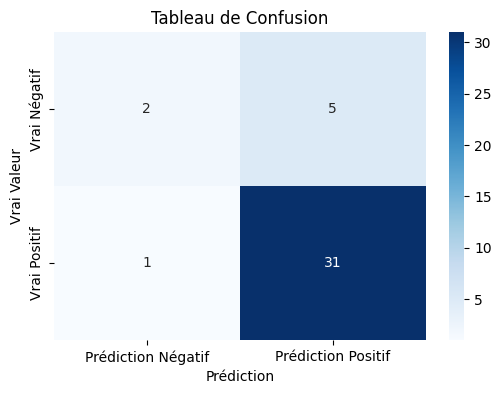

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Prédiction Négatif', 'Prédiction Positif'],
            yticklabels=['Vrai Négatif', 'Vrai Positif'])
plt.xlabel('Prédiction')
plt.ylabel('Vrai Valeur')
plt.title('Tableau de Confusion')
plt.show()

- **Vrai Positif (VP)** : Il y a 31 cas où le modèle a correctement prédit la classe positive.
- **Faux Positif (FP)** : Il y a 5 cas où le modèle a prédit positivement à tort (faux alarmes).
- **Faux Négatif (FN)** : Il y a 1 cas où le modèle a manqué de prédire positivement (faux négatifs).
- **Vrai Négatif (VN)** : Il y a 2 cas où le modèle a correctement prédit la classe négative.

Nous remarquons que le modèle ce qui pourrait être dû au déséquilibre de la base de données.


# **Conclusion**


Dans ce projet, nous avons diagnostiqué la maladie de Parkinson en nous basant sur les métriques biomédicales des enregistrements. Nous avons commencé par nettoyer les données. Ensuite, nous avons procédé à la phase de sélection des variables pour identifier les caractéristiques les plus pertinentes pour la prédiction de la maladie. Une fois les variables sélectionnées, nous avons créé plusieurs modèles prédictifs, dont les résultats ont été évalués pour déterminer leur précision dans la détection de la maladie de Parkinson. Après une évaluation de nos quatre modèles, les résultats révèlent que le modèle K plus proches voisins (KNN) et le réseau de neurones surpassent les autres modèles, démontrant une précision d’environ 89.7%. La régression logistique suit de près avec une précision de 87.2%, indiquant également une performance solide. Cependant, le classifieur naïf bayésien présente une performance légèrement inférieure, avec une précision d’environ 82.0%.

Il est important de noter que ces résultats sont basés sur un ensemble de données relativement petit, ce qui peut limiter la capacité des modèles d’apprentissage automatique à capturer les schémas sous-jacents et à généraliser correctement, ce qui peut entraîner des performances moins précises. La taille restreinte de l’ensemble de données peut rendre plus difficile pour les modèles d’extraire des informations significatives, ce qui peut affecter la précision des résultats obtenus.


### **Sources de données**

Le jeu de données utilisé dans cette étude a été créé par Max Little de l’Université d’Oxford, en collaboration avec le National Centre for Voice and Speech, Denver, Colorado, qui a enregistré les signaux vocaux. L’étude originale a publié les méthodes d’extraction des caractéristiques pour les troubles vocaux généraux.

### **Article**
Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM. "Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection". BioMedical Engineering OnLine 2007, 6:23 (26 June 2007)
